In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/train_data.csv')
test_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/test_data.csv')

<ipython-input-3-df0e4e520ad4>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/train_data.csv')


In [ ]:
train_data.columns
test_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
print (train_data.shape)

(982644, 9)


In [ ]:
print (test_data.shape)
test_data.dtypes

(34565, 8)


Store             int64
DayOfWeek         int64
Date             object
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

In [ ]:
train_data.iloc[:,7] = train_data.iloc[:,7].astype(str)
train_data.iloc[:,7]

0         0
1         0
2         0
3         0
4         0
         ..
982639    a
982640    a
982641    a
982642    a
982643    a
Name: StateHoliday, Length: 982644, dtype: object

In [ ]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [ ]:
test_data.describe()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565.0,34565.000000
mean,558.000000,4.000000,643.827224,0.873369,0.419355,0.0,0.369651
std,321.877302,1.917688,435.207851,0.332564,0.493461,0.0,0.482717
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,279.000000,2.000000,445.000000,1.000000,0.000000,0.0,0.000000
50%,558.000000,4.000000,610.000000,1.000000,0.000000,0.0,0.000000
75%,837.000000,6.000000,812.000000,1.000000,1.000000,0.0,1.000000
max,1115.000000,7.000000,4783.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
train_data_cat=train_data.select_dtypes(exclude=['int64', 'float64'])
train_data_cat
# y=train_data['Sales']
# y.tail()

,Date,StateHoliday
0,2015-06-30,0
1,2015-06-30,0
2,2015-06-30,0
3,2015-06-30,0
4,2015-06-30,0
...,...,...
982639,2013-01-01,a
982640,2013-01-01,a
982641,2013-01-01,a
982642,2013-01-01,a


In [ ]:
train_data_cat=train_data_cat.drop(columns=['Date'])

In [ ]:
#One Hot encoding

ohe=OneHotEncoder(sparse=False,dtype=int)
ohe_data=ohe.fit_transform(train_data_cat)
ohe_data_df=pd.DataFrame(ohe_data)
ohe_data_df.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RangeIndex(start=0, stop=4, step=1)

In [ ]:
ohe_data_df.rename(columns={" 0 ":"State_Holiday"},inplace=True)
ohe_data_df

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
982639,0,1,0,0
982640,0,1,0,0
982641,0,1,0,0
982642,0,1,0,0


In [ ]:
# #Label encoding
# enc=LabelEncoder()
# enc_data=enc.fit_transform(train_data_cat.iloc[:,1])
# enc_data_df=pd.DataFrame(enc_data)
# enc_data_df

In [ ]:
#drop the sales column and Stateholidays column
train_data_1=train_data.drop(columns=['Sales','StateHoliday'])

In [ ]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
train_data_upd=pd.concat([train_data_1,ohe_data_df],axis=1)
train_data_upd.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,SchoolHoliday,0,1,2,3
0,1,2,2015-06-30,568,1,1,0,1,0,0,0
1,2,2,2015-06-30,877,1,1,0,1,0,0,0
2,3,2,2015-06-30,1072,1,1,1,1,0,0,0
3,4,2,2015-06-30,1488,1,1,0,1,0,0,0
4,5,2,2015-06-30,645,1,1,0,1,0,0,0


In [ ]:
train_data_upd.tail()

,Store,DayOfWeek,Date,Customers,Open,Promo,SchoolHoliday,0,1,2,3
982639,1111,2,2013-01-01,0,0,0,1,0,1,0,0
982640,1112,2,2013-01-01,0,0,0,1,0,1,0,0
982641,1113,2,2013-01-01,0,0,0,1,0,1,0,0
982642,1114,2,2013-01-01,0,0,0,1,0,1,0,0
982643,1115,2,2013-01-01,0,0,0,1,0,1,0,0


<ipython-input-19-0f36db63a8b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr=train_data.corr()


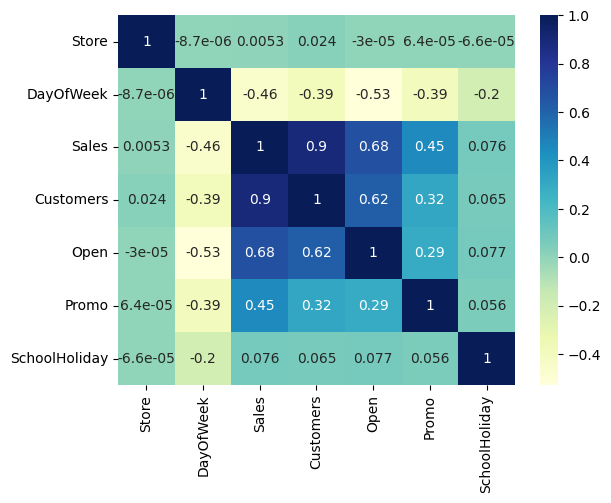

In [ ]:
#EDA using heatmap by correlation values
data_corr=train_data.corr()
sns.heatmap(data_corr,cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
train_data['Date'].dtype
train_data['Date']=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
test_data['Date']=pd.to_datetime(test_data['Date'],format='%d-%m-%Y')

In [ ]:
test_data.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object

In [ ]:
y=train_data['Sales']
y.tail()

982639    0
982640    0
982641    0
982642    0
982643    0
Name: Sales, dtype: int64

In [ ]:
# Sales for all the stores vs date
sales_by_date=train_data.groupby('Date')['Sales'].sum().reset_index()
sales_by_date.columns

Index(['Date', 'Sales'], dtype='object')

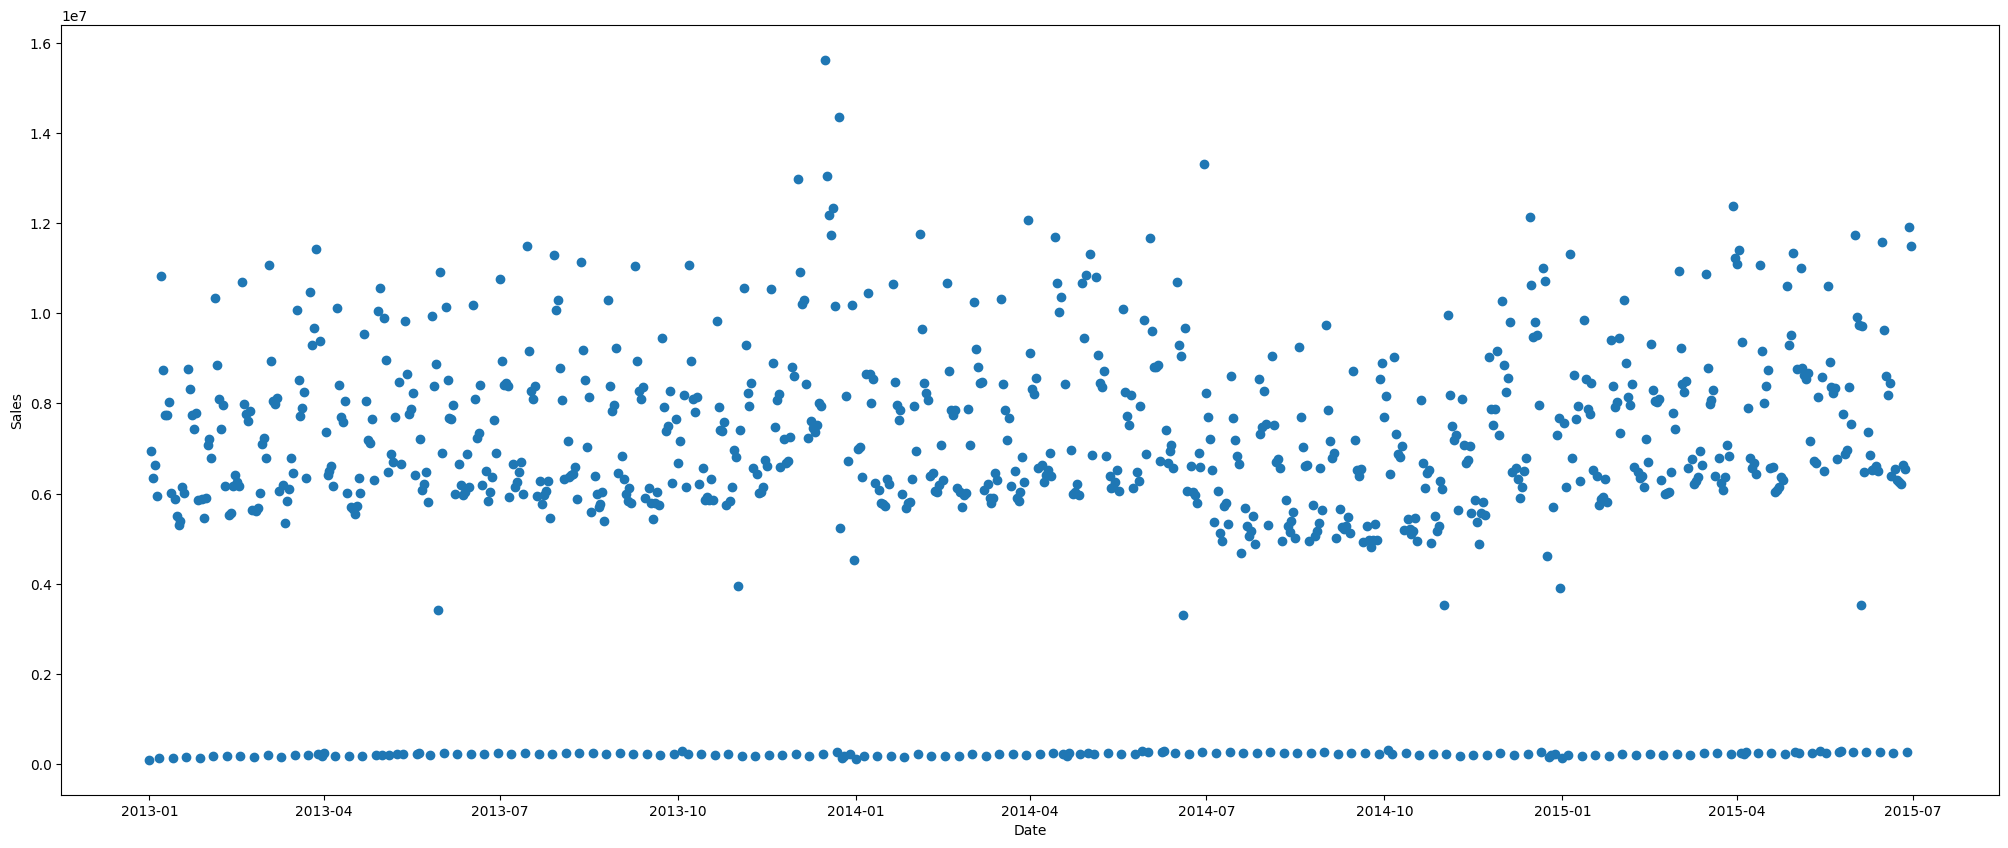

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(sales_by_date['Date'],sales_by_date['Sales'],label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Average sales for all stores vs date

avg_sales_by_date=train_data.groupby('Date')['Sales'].mean().reset_index()
avg_sales_by_date.columns

Index(['Date', 'Sales'], dtype='object')

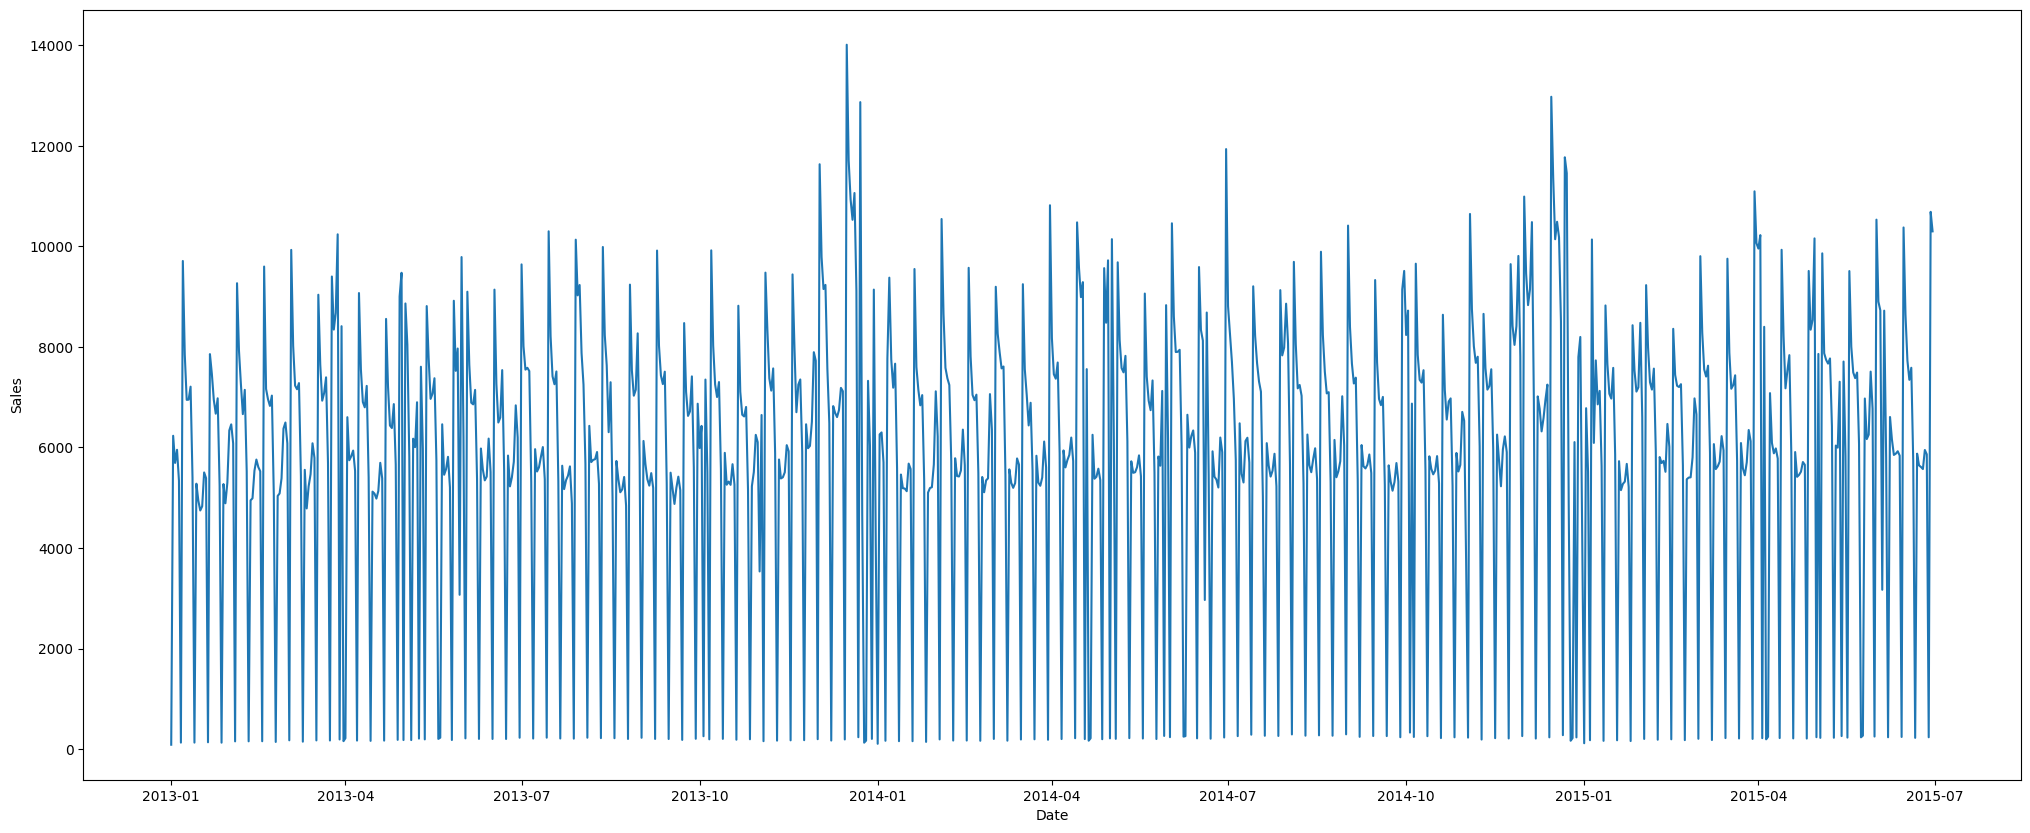

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(avg_sales_by_date['Date'],avg_sales_by_date['Sales'],label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# sales by date vs store
sales_by_store=train_data.groupby('Store')['Sales'].sum().reset_index()
sales_by_store.columns

Index(['Store', 'Sales'], dtype='object')

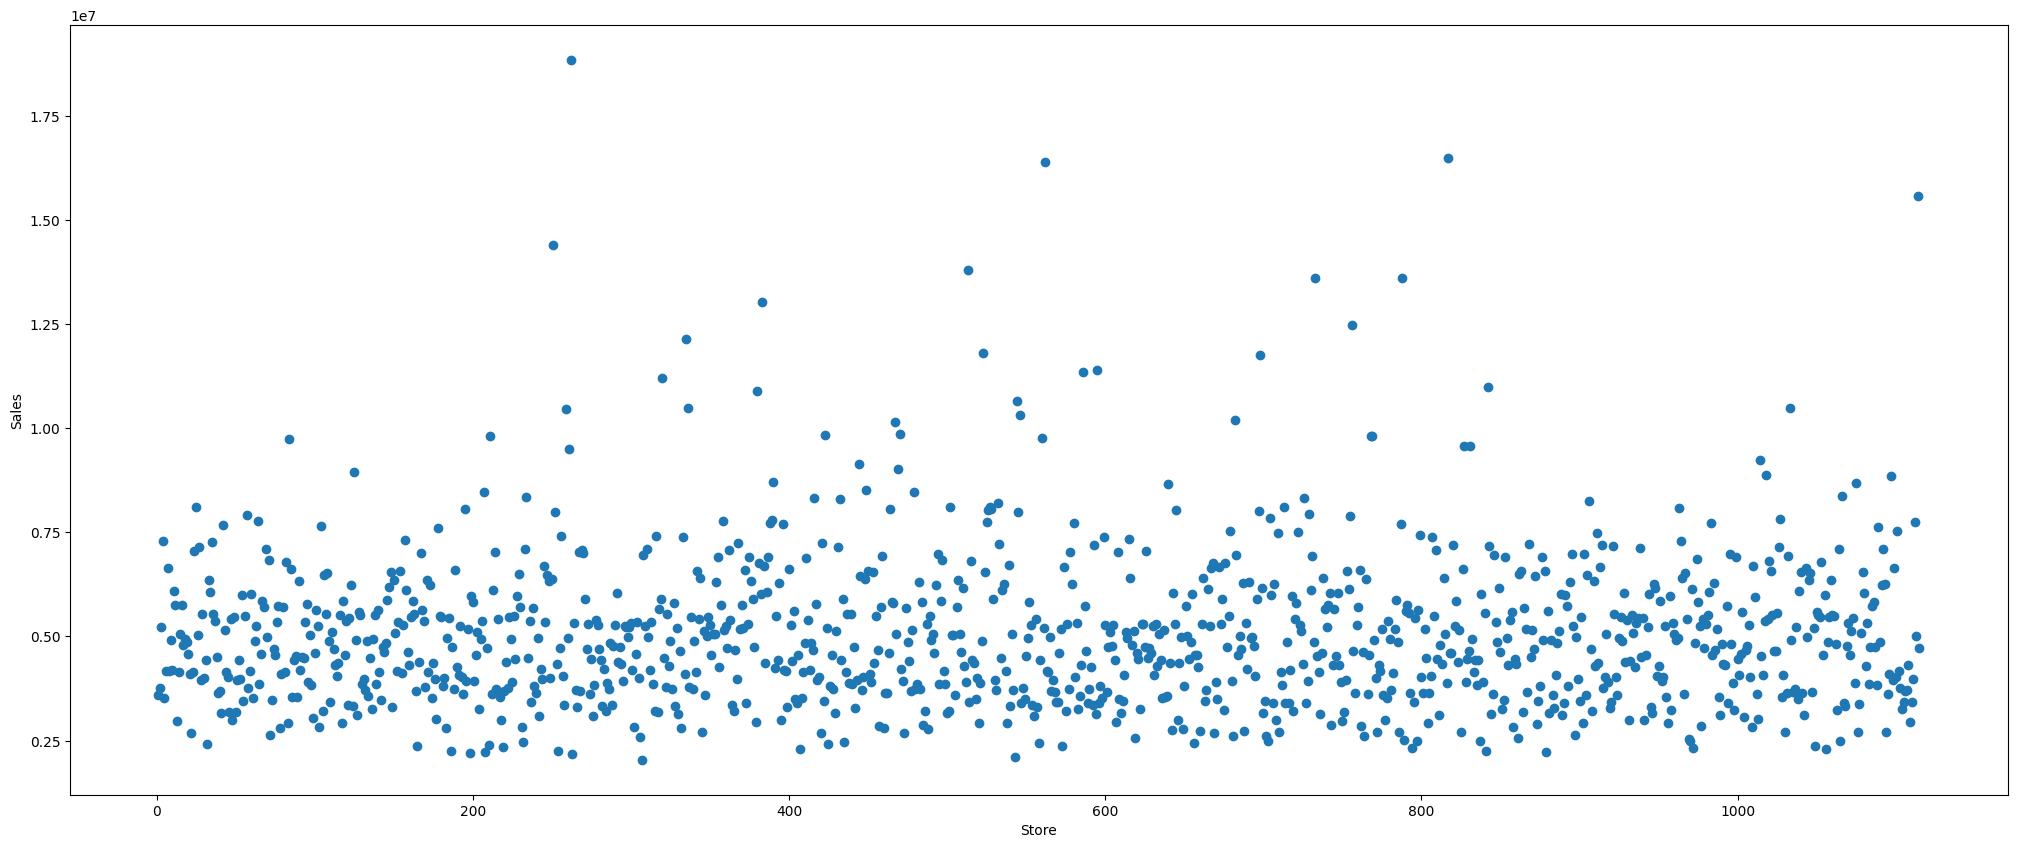

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(sales_by_store['Store'],sales_by_store['Sales'],label='Total Sales')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

In [ ]:
train_data_upd['Date']=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data_upd['year']=train_data_upd['Date'].dt.year
train_data_upd['month']=train_data_upd['Date'].dt.month
train_data_upd['datee']=train_data_upd['Date'].dt.day

In [ ]:
test_data['Date']=pd.to_datetime(test_data['Date'],format='%d-%m-%Y')
test_data['year']=test_data['Date'].dt.year
test_data['month']=test_data['Date'].dt.month
test_data['datee']=test_data['Date'].dt.day


In [ ]:
train_data_upd=train_data_upd.drop(columns=['Date'])
test_data=test_data.drop(columns=['Date'])

KeyError: ignored

In [ ]:

columns_to_zero = ['0', '1', '2']
test_data[columns_to_zero] = 0
test_data.shape, train_data_upd.shape

((34565, 13), (982644, 14))

In [ ]:
test_data.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'year', 'month', 'datee', '0', '1', '2'],
      dtype='object')

In [ ]:
#MinMaxScaling
def Scaling(x):
  x.columns=x.columns.astype(str)
  scaler=MinMaxScaler()
  model=scaler.fit(x)
  x=model.transform(x)
  return x

In [ ]:
#Linear regression for every storewise data
def lin_reg_call(X_train,X_test,y_train,y_test):
  lin_reg=LinearRegression()
  lin_reg.fit(X_train,y_train)
  train_score =lin_reg.score(X_train,y_train)
  test_score=lin_reg.score(X_test,y_test)
  #print(train_score,test_score)
  y_pred=lin_reg.predict(X_test)
  print(y_pred.shape)
  return [y_pred,train_score,test_score]

In [ ]:
#train_test_split
train_data_scaled = Scaling(train_data_upd)
X_train_full,X_test_full,y_train_full,y_test_full=train_test_split(train_data_scaled,y,test_size=0.2,random_state=30)

In [ ]:
#Calculate MAE,MSE and RMSE
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
    print("MAE:{}".format(mae))
    print("MSE:{}".format(mse))
    print("RMSE:{}".format(rmse))
    return [mae, mse, rmse]

In [ ]:
#Linear Regression for full data
import joblib
lin_reg=LinearRegression()
lin_reg.fit(X_train_full,y_train_full)

#Save model
joblib.dump(lin_reg, 'linear_regression_model.pkl')

#Use saved model
loaded_model = joblib.load('linear_regression_model.pkl')
y_pred_full=loaded_model.predict(X_test_full)

print(lin_reg.score(X_test_full,y_test_full))
print(lin_reg.score(X_train_full,y_train_full))


0.8565126461130257
0.8551438975627743


In [ ]:
metrics(y_test_full,y_pred_full)

MAE:979.0617407406729
MSE:2116533.271937682
RMSE:1454.8310114709825


[979.0617407406729, 2116533.271937682, 1454.8310114709825]

In [ ]:
y_target=train_data[['Store','Sales']]
y_target.shape

(982644, 2)

In [ ]:
#Linear regression on test data :
test_data_scaled = Scaling(test_data)
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns)
y_pred_test_full = loaded_model.predict(test_data_scaled_df)
print("Test Data:")
print(test_data)
print("\nPredictions on Test Data:")
print(y_pred_test_full)


Test Data:
       Store  DayOfWeek  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
0          1          5        555     1      1             0              1   
1          2          5        625     1      1             0              1   
2          3          5        821     1      1             0              1   
3          4          5       1498     1      1             0              1   
4          5          5        559     1      1             0              1   
...      ...        ...        ...   ...    ...           ...            ...   
34560   1111          3        351     1      1             0              1   
34561   1112          3        716     1      1             0              1   
34562   1113          3        770     1      1             0              0   
34563   1114          3       3788     1      1             0              0   
34564   1115          3        447     1      1             0              0   

       year  month  datee  0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#Separate models for each store
#extract data for each store
train_data_each =train_data_upd.loc[train_data_upd['Store']==1]
train_data_each.shape
y_each=y_target.loc[y_target['Store']==1]
y_each.shape


(911, 2)

In [ ]:
#initialisation of lists
mae_list=[]
mse_list=[]
rmse_list=[]
train_score_list=[]
test_score_list=[]
ypred_list=[]
y_test_list=[]

In [ ]:
#Separate models for each store
#extract data for each store
from statistics import mean
store_numbers = list(range(1, 1116))
for i in store_numbers:
  train_data_each =train_data_upd.loc[train_data_upd['Store']==i]
  train_data_each.shape
  y_each=y_target.loc[y_target['Store']==i]
  y_each.shape
  #Scaling of training data
  train_data_scaled=Scaling(train_data_each)
  #train_test_split
  X_train_each,X_test_each,y_train_each,y_test_each = train_test_split(train_data_scaled,y_each.iloc[:,1],test_size=0.2,random_state=30)
  #Linear regression
  print("Model for Store : ", i)
  lin_reg=lin_reg_call(X_train_each,X_test_each,y_train_each,y_test_each)
  y_pred_each=lin_reg[0]
  print(lin_reg[1])
  print(lin_reg[2])
  print(len(y_pred_each))
  ypred_list.append(y_pred_each)
  y_test_list.append(y_test_each)
  #y_pred_each.shape
  metric=metrics(y_test_each,y_pred_each)
  mae_list.append(metric[0])
  mse_list.append(metric[1])
  rmse_list.append(metric[2])
  train_score_list.append(lin_reg[1])
  test_score_list.append(lin_reg[2])
len(ypred_list)
len(y_test_list)
print(mean(mae_list),mean(mse_list),mean(rmse_list),mean(train_score_list),mean(test_score_list))

Streaming output truncated to the last 5000 lines.
(183,)
0.9818575133149157
0.9763397618278262
183
MAE:330.91621393330064
MSE:198343.95487891242
RMSE:445.35823207718124
Model for Store :  492
(146,)
0.9742890052919583
0.9785278494296406
146
MAE:379.8192530133998
MSE:297613.2112705098
RMSE:545.5393764619653
Model for Store :  493
(183,)
0.9808817452662025
0.9790135556218958
183
MAE:388.14207650273227
MSE:282274.1420765027
RMSE:531.2947788906858
Model for Store :  494
(183,)
0.9216958358010913
0.9250253924383229
183
MAE:364.4192699819727
MSE:208444.62035718252
RMSE:456.55735713838027
Model for Store :  495
(183,)
0.9831150267766366
0.979036125041463
183
MAE:247.45986850367257
MSE:114024.05167281139
RMSE:337.674475897737
Model for Store :  496
(183,)
0.9820718085941011
0.9830693884761763
183
MAE:336.4470051110554
MSE:186795.72939112035
RMSE:432.1987151659759
Model for Store :  497
(183,)
0.9813969616778866
0.9799789327190688
183
MAE:399.6417601342083
MSE:270272.2145580659
RMSE:519.877114

In [ ]:
print(y_pred_each[0:10])

[6306.80123728 4154.03700997 4597.15518159 6665.22448335  -40.14984617
 6583.79026438 5555.18583504 3544.51305792  -58.85244004 -247.73617148]


Text(0, 0.5, 'Test score')

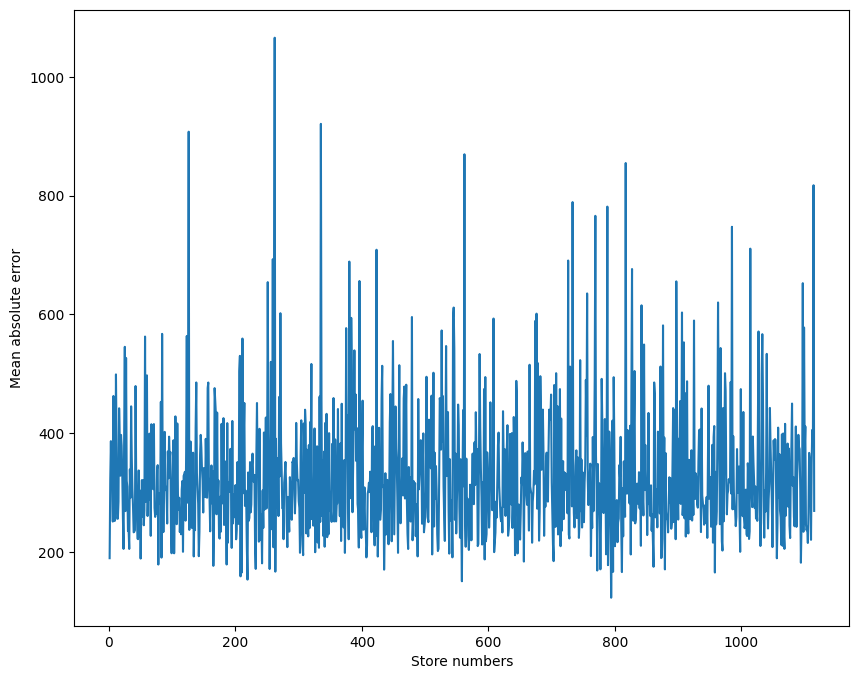

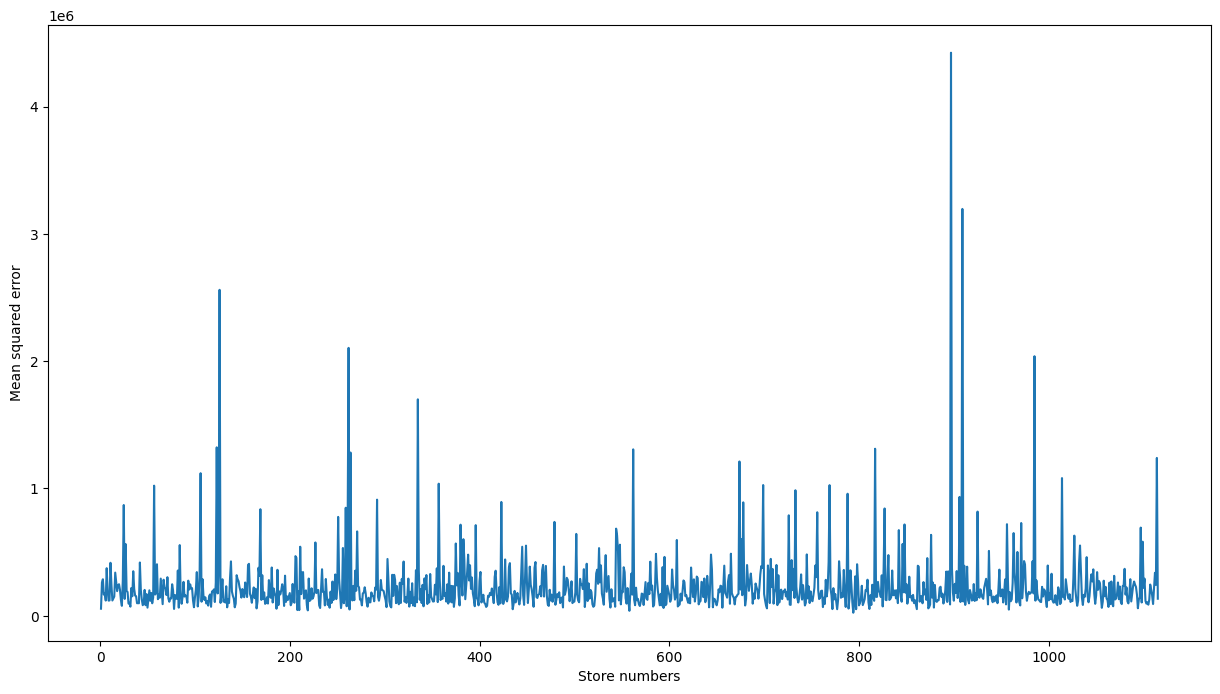

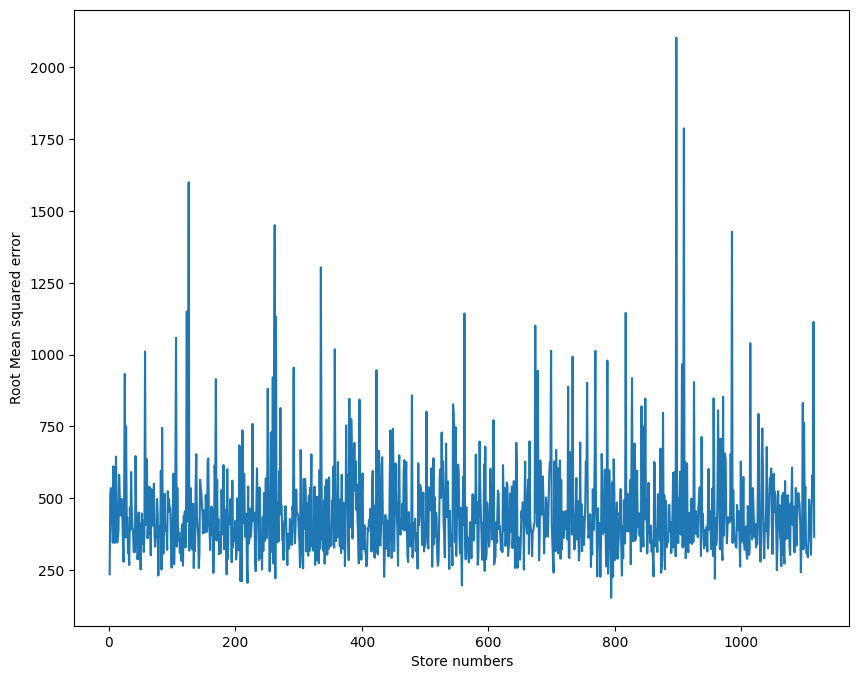

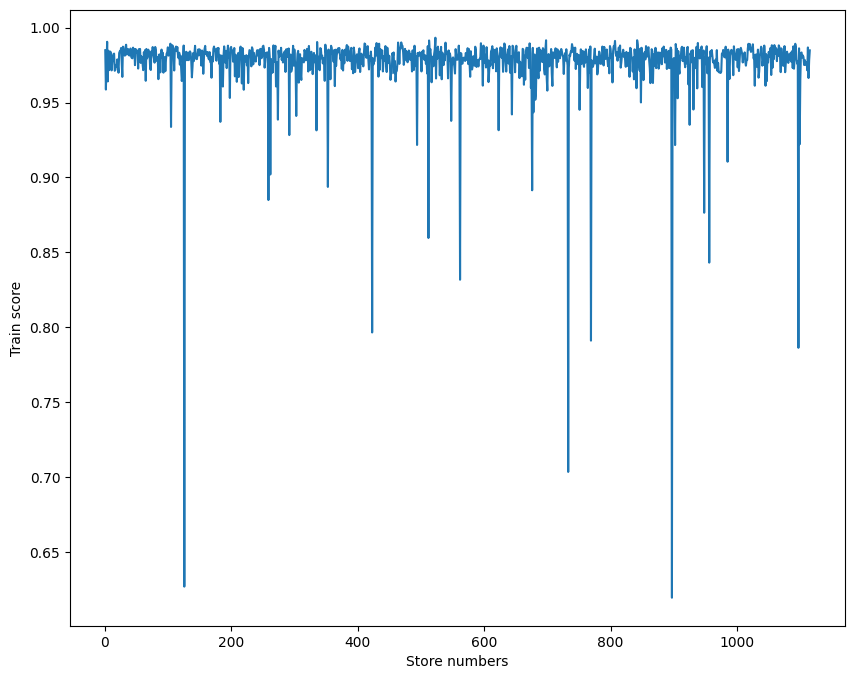

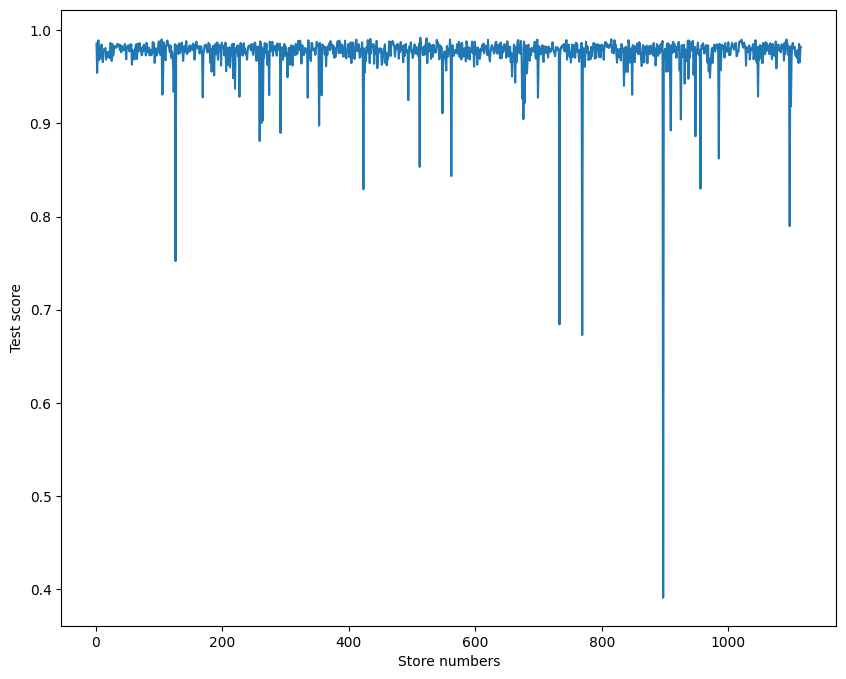

In [ ]:
#Data Visualisation of separate models:
plt.figure(figsize=(10,8))
plt.plot(store_numbers,mae_list)
plt.xlabel('Store numbers')
plt.ylabel('Mean absolute error')
plt.figure(figsize=(15,8))
plt.plot(store_numbers,mse_list)
plt.xlabel('Store numbers')
plt.ylabel('Mean squared error')
plt.figure(figsize=(10,8))
plt.plot(store_numbers,rmse_list)
plt.xlabel('Store numbers')
plt.ylabel('Root Mean squared error')
plt.figure(figsize=(10,8))
plt.plot(store_numbers,train_score_list)
plt.xlabel('Store numbers')
plt.ylabel('Train score')
plt.figure(figsize=(10,8))
plt.plot(store_numbers,test_score_list)
plt.xlabel('Store numbers')
plt.ylabel('Test score')

In [ ]:
#Ensemble by Model stacking
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
len(y_pred_each)

183

In [ ]:
# for i in range(len(ypred_list)):
#   print(len(ypred_list[i]))
len(ypred_list)

1115

In [ ]:
#Ensemble by Model stacking
max_length = 183
def model_stack(y):
  for i in range(len(y)):
    if len(y[i])<=max_length:
      padding=max_length-len(y[i])
      padded_pred=list(y[i])
      padded_pred+=[np.nan]*padding #adding padding to match the length of every store size to 183 values
      y[i] = np.array(padded_pred)
      #print(len(ypred_list[i]))
  y = [np.array(padded_pred) if np.array(padded_pred).ndim > 0 else np.array([padded_pred]) for padded_pred in y]
  #ypred_list = [np.concatenate(store_predictions) for store_predictions in ypred_list]
  print(len(y))
  stacked = np.column_stack(y)
  return stacked

In [ ]:
stacked_predictions = model_stack(ypred_list)
stacked_predictions = np.nan_to_num(stacked_predictions)

1115


In [ ]:
stacked_actuals = model_stack(y_test_list)
stacked_actuals  = np.nan_to_num(stacked_actuals)
stacked_actuals.shape

1115


(183, 1115)

In [ ]:
max_length = 183
for i, pred_array in enumerate(ypred_list):
    if len(pred_array) < max_length:
        padding = max_length - len(pred_array)
        padded_pred = list(pred_array)
        padded_pred += [np.nan] * padding
        ypred_list[i] = np.array(padded_pred)
        print(f"Store {i + 1}: Original Length = {len(pred_array)}, Padded Length = {len(ypred_list[i])}")

# Check the lengths to identify any discrepancies
lengths = [len(pred_array) for pred_array in ypred_list]

# If there are any discrepancies, you'll need to investigate further and address them before stacking.
print(lengths)

[183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183,

In [ ]:
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, stacked_actuals)
meta_predictions = meta_model.predict(stacked_predictions)

In [ ]:
# Calculate metrics for the meta-model
meta_mae = mean_absolute_error(stacked_actuals, meta_predictions)
meta_mse = mean_squared_error(stacked_actuals, meta_predictions)
meta_rmse = np.sqrt(meta_mse)


print("Meta-Model Metrics:")
print("Mean Absolute Error (MAE):", meta_mae)
print("Mean Squared Error (MSE):", meta_mse)
print("Root Mean Squared Error (RMSE):", meta_rmse)


Meta-Model Metrics:
Mean Absolute Error (MAE): 7.131235921585449e-12
Mean Squared Error (MSE): 9.740274064239342e-23
Root Mean Squared Error (RMSE): 9.869282681248593e-12


In [ ]:
#lasso regression
from sklearn.linear_model import Lasso
LR=Lasso(alpha=0.1)
LR.fit(X_train_full,y_train_full)
train_l1score =LR.score(X_train_full,y_train_full)
test_l1score=LR.score(X_test_full,y_test_full)
y_pred_LR=LR.predict(X_test_full)
metrics(y_test_full,y_pred_LR)
print(train_l1score,test_l1score)

MAE:979.1529201889432
MSE:2116584.5525155156
RMSE:1454.8486356028643
0.8551433537902865 0.8565091696194044


In [ ]:
#initialisation of lists
LR_mae_list=[]
LR_mse_list=[]
LR_rmse_list=[]
LR_train_score_list=[]
LR_test_score_list=[]

In [ ]:
def LR_call(X_train,X_test,y_train,y_test):
  LR=Lasso(alpha=0.1)
  LR.fit(X_train,y_train)
  train_score =LR.score(X_train,y_train)
  test_score=LR.score(X_test,y_test)
  #print(train_score,test_score)
  y_pred_LR=LR.predict(X_test)
  #print(y_pred_LR.shape)
  return [y_pred_LR,train_score,test_score]

In [ ]:
#Separate models for each store
#extract data for each store
store_numbers = list(range(1, 1116))
for i in store_numbers:
  train_data_each =train_data_upd.loc[train_data_upd['Store']==i]
  train_data_each.shape
  y_each=y_target.loc[y_target['Store']==i]
  y_each.shape
  #Scaling of training data
  train_data_scaled_LR=Scaling(train_data_each)
  #print(train_data_scaled_LR.shape)
  #train_test_split
  X_train_each,X_test_each,y_train_each,y_test_each = train_test_split(train_data_scaled_LR,y_each,test_size=0.2,random_state=30)
  #Lasso regression
  print("Model for Store : ", i)
  LR_1=LR_call(X_train_each,X_test_each,y_train_each,y_test_each)
  y_pred_each_LR=LR_1[0]
  print(LR_1[1])
  print(LR_1[2])
  print(y_pred_each_LR.shape)
  metric=metrics(y_test_each,y_pred_each_LR)
  LR_mae_list.append(metric[0])
  LR_mse_list.append(metric[1])
  LR_rmse_list.append(metric[2])
  LR_train_score_list.append(LR_1[1])
  LR_test_score_list.append(LR_1[2])
print(mean(LR_mae_list),mean(LR_mse_list),mean(LR_rmse_list),mean(LR_train_score_list),mean(LR_test_score_list) )
print(len(LR_mae_list),len(LR_mse_list),len(LR_rmse_list),len(LR_train_score_list),len(LR_test_score_list) )

Model for Store :  1
0.9924572280834834
0.9929367861307334
(183, 2)
MAE:94.6394553821358
MSE:27630.652710707185
RMSE:117.5386164430805
Model for Store :  2
0.9793336855638304
0.9771168631012167
(183, 2)
MAE:160.73985531124515
MSE:130558.47226132722
RMSE:255.4980159035753
Model for Store :  3
0.9882793740613673
0.9871620968727763
(183, 2)
MAE:193.54929657007017
MSE:142113.26387394717
RMSE:266.56449864333695
Model for Store :  4
0.9952684724495783
0.9945983991786986
(183, 2)
MAE:154.34824612987384
MSE:82760.59982443252
RMSE:203.42148340874976
Model for Store :  5
0.9820392007643031
0.9839764257731981
(183, 2)
MAE:164.16679902269584
MSE:89327.73174969095
RMSE:211.33827356833754
Model for Store :  6
0.9922836319271503
0.9909608860167027
(183, 2)
MAE:125.44427588193157
MSE:59537.31201793393
RMSE:172.53595569899906
Model for Store :  7


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.985808847029358
0.9873532792418209
(183, 2)
MAE:231.30851530402467
MSE:186808.74174881072
RMSE:305.6212866840354
Model for Store :  8
0.9867676266883301
0.9849530724667411
(183, 2)
MAE:172.82319275287026
MSE:99312.89914319263
RMSE:222.8372715045585
Model for Store :  9
0.9920028517683901
0.9924001673442086
(183, 2)
MAE:125.94719241522354
MSE:59279.78675500482
RMSE:172.16240407679723
Model for Store :  10
0.9911570177391642

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


0.9881810995644946
(183, 2)
MAE:136.03873805142476
MSE:60221.87646235728
RMSE:173.52503632380729
Model for Store :  11
0.9857274922271086
0.9828982526226833
(183, 2)
MAE:249.27176143433672
MSE:207958.68562317733
RMSE:322.458280730374
Model for Store :  12
0.9883727789989161
0.989025698049133
(183, 2)
MAE:185.64410299251634
MSE:121975.48354473898
RMSE:246.9569634012564
Model for Store :  13
0.9904695755171375
0.9899365988300787
(146, 2)
MAE:128.3370519207218
MSE:59956.46500474574
RMSE:173.14223200124476
Model for Store :  14
0.9912073761691493
0.9889777691661014
(183, 2)
MAE:128.17095500404065
MSE:67321.16840755366
RMSE:183.46821033567866
Model for Store :  15
0.9913229304163782
0.99052444625812
(183, 2)
MAE:142.40454917454562
MSE:75341.81543660144
RMSE:194.08994749419847
Model for Store :  16
0.9855978303167132
0.9842797845794504
(183, 2)
MAE:220.85551188434906
MSE:169439.06164392034
RMSE:291.0661966322441
Model for Store :  17
0.9859176832023381
0.9879180190461497
(183, 2)
MAE:196.62

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9870439354365818
0.9856162554459884
(183, 2)
MAE:198.41523845286113
MSE:120006.07852264821
RMSE:244.95517806595578
Model for Store :  20
0.9893928660557987
0.9885684706390094
(146, 2)
MAE:189.5240248127855
MSE:123720.09890078686
RMSE:248.71680572569565
Model for Store :  21
0.9873279701607649
0.9852705605131016
(183, 2)
MAE:165.1555390973738
MSE:102341.6040382147
RMSE:226.20964174656072
Model for Store :  22
0.9849517010550883
0.985238073162542
(146, 2)
MAE:128.900428091691
MSE:61617.68154896214
RMSE:175.5244734345643
Model for Store :  23
0.9915284683368167
0.9933083487202389
(183, 2)
MAE:102.5027383757982
MSE:38766.61533028107
RMSE:139.22394788663527
Model for Store :  24
0.9920925344363684
0.992187036361309
(183, 2)
MAE:199.71858711309625
MSE:139695.62429327567
RMSE:264.2873666043041


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  25
0.9918512475682085
0.9835456624914724
(183, 2)
MAE:272.6672786338259
MSE:434759.3978294522
RMSE:466.23995851355994
Model for Store :  26
0.9931984728771353
0.9926918498205944
(183, 2)
MAE:134.2211597625941
MSE:65884.3102071957
RMSE:181.49973857721628
Model for Store :  27
0.9881864683842041
0.9862279370980747
(183, 2)
MAE:263.9256807717312
MSE:281155.0916017898
RMSE:374.93672239578626
Model for Store :  28
0.9835593876095721
0.9870650162388407
(183, 2)
MAE:159.58371008746926
MSE:96024.75886011498
RMSE:219.11727323526435
Model for Store :  29
0.9936420396342137
0.9915277741946456
(183, 2)
MAE:154.73233308494497
MSE:93330.96851184532
RMSE:216.02195318051048
Model for Store :  30
0.9920080328845842
0.9914012309721238
(183, 2)
MAE:117.57448179396376
MSE:47863.89009314507
RMSE:154.69953150081784


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  31
0.9913099557303633
0.9914521606773807
(183, 2)
MAE:119.05293630237547
MSE:50705.62658862178
RMSE:159.22566782498006
Model for Store :  32
0.9906254899586364
0.9905726990383443
(146, 2)
MAE:102.68982381740038
MSE:35763.11742702226
RMSE:133.72194551946637
Model for Store :  33
0.9934656162554718
0.9910419900842546
(183, 2)
MAE:169.49085839814126
MSE:108952.87321602555
RMSE:233.4018779016415
Model for Store :  34
0.9942862810049113
0.9927505776871849
(183, 2)
MAE:145.630490564881
MSE:76516.94333906601
RMSE:195.59772920341638
Model for Store :  35
0.9910207056559375
0.991467799124276
(183, 2)
MAE:221.63051457007006
MSE:174957.9192325918
RMSE:295.76842227711853
Model for Store :  36
0.9920257684472061
0.9924402572802253
(146, 2)
MAE:179.776696127371
MSE:105280.77153650348
RMSE:229.4349270888191


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  37
0.9928674640804719
0.9916736440051773
(183, 2)
MAE:152.92515545337736
MSE:78797.35350696936
RMSE:198.49099917498697
Model for Store :  38
0.9913495724841266
0.9894651174342954
(183, 2)
MAE:137.897891177044
MSE:76282.27352295586
RMSE:195.29755953794694
Model for Store :  39
0.9906793762728275
0.9920732619043109
(183, 2)
MAE:116.35925829662715
MSE:48916.13519782854
RMSE:156.39075292009522
Model for Store :  40
0.9914673103162693
0.9882103238341078
(183, 2)
MAE:117.00444438931727
MSE:49629.40728500065
RMSE:157.52683467428756
Model for Store :  41
0.9930293046010887
0.9916098302781648
(146, 2)
MAE:118.43826479877207
MSE:48841.98429017408
RMSE:156.27217329098306
Model for Store :  42
0.9902653224564222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9892760587394627
(183, 2)
MAE:240.41954823338605
MSE:209370.19487712084
RMSE:323.5507648554712
Model for Store :  43
0.9898865082167674
0.9894916518041164
(183, 2)
MAE:162.0533697239206
MSE:100879.83646955667
RMSE:224.5883305846017
Model for Store :  44
0.9897684788405093
0.9893095908310761
(183, 2)
MAE:135.15841239120388
MSE:64187.96110480466
RMSE:179.14792924396957
Model for Store :  45
0.9933135042863663
0.9918115799092109
(183, 2)
MAE:110.54281983712319
MSE:41071.35613336601
RMSE:143.30274968291084
Model for Store :  46
0.9907902606863017
0.9926640113571477
(146, 2)
MAE:111.19205330393756
MSE:47261.2654536308
RMSE:153.72258365905577
Model for Store :  47
0.9928024089133616
0.9893776022397485
(183, 2)
MAE:168.44673550227904
MSE:101478.5767764263
RMSE:225.25383101783896
Model for Store :  48


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9874784196588378
0.9844674246197734
(183, 2)
MAE:112.68121763494418
MSE:41299.706630704255
RMSE:143.7005682499277
Model for Store :  49
0.9928664076477526
0.9912028221779642
(183, 2)
MAE:151.68433489165048
MSE:84928.6050346757
RMSE:206.06868398021533
Model for Store :  50
0.9915952344812573
0.9908447160606786
(183, 2)
MAE:93.7543532786684
MSE:31655.894635890087
RMSE:125.8091702458332
Model for Store :  51
0.991697452304043
0.9919883571017654
(146, 2)
MAE:134.49361549281153
MSE:67154.48025028255
RMSE:183.24093463290694
Model for Store :  52
0.9921433878214663
0.9914146334192019
(146, 2)
MAE:160.6736830063302
MSE:99998.61367995599
RMSE:223.6052477916786
Model for Store :  53
0.9863347397805138
0.9886571942445087
(183, 2)
MAE:129.71278322075744
MSE:58530.81212682695
RMSE:171.07134787396012
Model for Store : 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

 54
0.992792342401045
0.9923605186471215
(183, 2)
MAE:160.33539966763158
MSE:89309.48824323327
RMSE:211.3166915357531
Model for Store :  55
0.990598445124784
0.9895856325987287
(183, 2)
MAE:122.45803246131123
MSE:48943.03038090651
RMSE:156.4337405755333
Model for Store :  56
0.9928878749458627
0.9925019695884387
(183, 2)
MAE:135.5433920777978
MSE:71457.17473028926
RMSE:189.0200713288
Model for Store :  57
0.9882360141594995
0.981438394995706
(183, 2)
MAE:280.7375191491826
MSE:512968.3038688151
RMSE:506.44264426922774
Model for Store :  58
0.990440839554368
0.989502599955237
(146, 2)
MAE:142.65284422209933
MSE:83048.37468661951
RMSE:203.7748447265014
Model for Store :  59
0.9897568584819738
0.9880542215591581
(183, 2)
MAE:151.14205621515467

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


MSE:88588.44872264494
RMSE:210.46193090752178
Model for Store :  60
0.9879650767878612
0.9862826422055911
(183, 2)
MAE:248.5219489267294
MSE:202125.7485905637
RMSE:317.90387587332407
Model for Store :  61
0.9858041313026198
0.9843458082379682
(183, 2)
MAE:130.17751419931852
MSE:65005.9677259688
RMSE:180.28583933017146
Model for Store :  62
0.9917640785208068
0.9900490301795457
(183, 2)
MAE:158.32057268973853
MSE:82797.54844519577
RMSE:203.46688728782846
Model for Store :  63
0.990860086819662
0.9919153044101224
(183, 2)
MAE:143.54678220347034
MSE:70522.67007306812
RMSE:187.78001767103459
Model for Store :  64
0.9925079813720572
0.9926269046345189
(183, 2)
MAE:199.2906341407465
MSE:145628.5701934335
RMSE:269.84122201160585
Model for Store :  65


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9822551897819936
0.9846141257707894
(183, 2)
MAE:167.8231199700711
MSE:93472.0218968938
RMSE:216.185131191872
Model for Store :  66
0.9928739251164206
0.9926448314057673
(183, 2)
MAE:113.68146419981049
MSE:45577.14237452882
RMSE:150.95883938101937
Model for Store :  67
0.9896912755672638
0.9885378341337969
(183, 2)
MAE:207.3386018419919
MSE:141333.99131804885
RMSE:265.8326459617487
Model for Store :  68
0.9902530434030469
0.9894383271599115
(183, 2)
MAE:178.59606311145848
MSE:110296.01895872346
RMSE:234.83613324904184
Model for Store :  69
0.9926479955825662
0.9932258133800838
(183, 2)
MAE:172.55110538762037
MSE:105724.5483947217
RMSE:229.91797275846196
Model for Store :  70
0.9919622789815874
0.9895762822156251
(183, 2)
MAE:152.77543278402098
MSE:81426.48928132912
RMSE:201.7752329714045
Model for Store :  71
0.9911705327551695
0.9906456780021634
(183, 2)
MAE:207.61118178431636
MSE:151282.35312890584
RMSE:275.02941036269726
Model for Store :  72
0.9863574423762558
0.9870264428251826


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9910601760078228
0.9887679608564229
(183, 2)
MAE:131.8939398141139
MSE:67561.6993549871
RMSE:183.7956737181089
Model for Store :  76
0.9935168914007981
0.9922798580329003
(146, 2)
MAE:170.14870079347673
MSE:123677.13087226752
RMSE:248.67361226341197
Model for Store :  77


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9907455949607228
0.9907603908673209
(183, 2)
MAE:173.05265796598857
MSE:98705.57261345263
RMSE:222.15487009454984
Model for Store :  78
0.9897295162782842
0.9906802028182072
(183, 2)
MAE:89.18421780069306
MSE:26548.1735862937
RMSE:115.21322316968157
Model for Store :  79
0.9883038294606669
0.9865089712212275
(183, 2)
MAE:149.38583850289837
MSE:81544.08767501527
RMSE:201.92088509489957
Model for Store :  80
0.99355580036861
0.9932889901029205
(183, 2)
MAE:139.97202554832595
MSE:67986.54362569716
RMSE:184.37264388419607
Model for Store :  81
0.9924889398799266
0.9920847450156902
(146, 2)
MAE:145.22543715175135
MSE:66661.86834911065
RMSE:182.56761534991722
Model for Store :  82
0.9889400957455741
0.9893609353651995
(183, 2)
MAE:227.27122815690305
MSE:178250.6104368285
RMSE:298.5386159584958
Model for Store :  83
0.9897227384211962
0.9881192147236397
(183, 2)
MAE:95.1417303109898
MSE:31455.102383696714
RMSE:125.40953389534768
Model for Store :  84
0.9901491918546552
0.9906104265473819
(1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


Model for Store :  87
0.991060017534967
0.988896642555634
(183, 2)
MAE:144.1539916267806
MSE:74419.1286445485
RMSE:192.89780797685145
Model for Store :  88
0.9850764724864254
0.9866952642366558
(183, 2)
MAE:200.88020497041808
MSE:132921.23428293978
RMSE:257.79956776819836
Model for Store :  89
0.9906935258986429
0.9881227573264575
(146, 2)
MAE:152.15777148631483
MSE:75328.45546941334
RMSE:194.07273825735203
Model for Store :  90
0.9926861573746378
0.9936842353385035
(183, 2)
MAE:155.88786194182848
MSE:81603.83317910512
RMSE:201.99484297761802
Model for Store :  91
0.9899459010285021
0.9884120534685084
(183, 2)
MAE:150.67431892937915
MSE:75347.29387689618
RMSE:194.09700393990653
Model for Store :  92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9916101451633736
0.9931110856966292
(183, 2)
MAE:123.87210611607411
MSE:51207.5585950993
RMSE:160.0118098689895
Model for Store :  93
0.9849672652968228
0.9825074938998468
(183, 2)
MAE:184.72970231384514
MSE:137809.3022186237
RMSE:262.49695447626027
Model for Store :  94
0.9900773698178867
0.9893894290271787
(183, 2)
MAE:162.6595080413783
MSE:102723.26597913093
RMSE:226.6310503650492
Model for Store :  95
0.990193137659109
0.9903758975849235
(183, 2)
MAE:195.7290791949919
MSE:122626.62055923558
RMSE:247.6152464603458
Model for Store :  96
0.9854527008295721
0.9864326381733604
(183, 2)
MAE:179.18174195316612
MSE:106435.72797690232
RMSE:230.6899737492966
Model for Store :  97
0.9893349280573522
0.9880630280522762
(183, 2)
MAE:184.02436560920307
MSE:108191.91694563057
RMSE:232.58537888873258
Model for Store :  98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.991285583845648
0.9879582499433383
(183, 2)
MAE:121.13109010861231
MSE:60195.92466922351
RMSE:173.48764317556382
Model for Store :  99
0.9917727639354742
0.9937821809996725
(146, 2)
MAE:98.95469296898568
MSE:33385.971847046814
RMSE:129.20133870639037
Model for Store :  100
0.9934233015667593
0.994098594455061
(146, 2)
MAE:146.81620813087244
MSE:71331.87579506595
RMSE:188.85427688440888
Model for Store :  101
0.9906540343804767
0.9895127534328254
(183, 2)
MAE:170.23833242019924
MSE:101565.1370881076
RMSE:225.34988028409023
Model for Store :  102
0.9920949448614143
0.9867736131622511
(183, 2)
MAE:192.8016669655326
MSE:170904.4776501664
RMSE:292.3221490497824
Model for Store :  103
0.9916913567369008
0.9932525139137549
(183, 2)
MAE:98.47267319733952
MSE:36349.742000754755
RMSE:134.81420919316102
Model for Store :  104
0.9946347737841834
0.9950602030979836
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:144.98685889607506
MSE:73752.96061621889
RMSE:192.03249805204703
Model for Store :  105
0.9668561181151345
0.965472419878171
(183, 2)
MAE:213.9377802103854
MSE:175389.69749321952
RMSE:296.13316049812755
Model for Store :  106
0.9900212710848375
0.9665187632194774
(183, 2)
MAE:181.7796510970278
MSE:561409.2839191653
RMSE:529.815667906851
Model for Store :  107
0.9941294635776349
0.99340536647421
(183, 2)
MAE:123.49839158875004
MSE:55087.02981446569
RMSE:165.96239003832417
Model for Store :  108
0.9936112607867433
0.9934810642786813
(146, 2)
MAE:208.56328911177758
MSE:144072.31833461672
RMSE:268.39552747262456
Model for Store :  109
0.9910640803254662
0.9890016235620425
(183, 2)
MAE:148.81166547614984
MSE:79407.23127630228
RMSE:199.25766142899283


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  110
0.985692408010358
0.9839776383590801
(183, 2)
MAE:135.3226980565888
MSE:62180.2743345651
RMSE:176.32395517139057
Model for Store :  111
0.9924129209413732
0.9914141684698388
(183, 2)
MAE:145.41711590523167
MSE:72249.34317932707
RMSE:190.06491414688702
Model for Store :  112
0.9932469769276271
0.9916762936238501
(183, 2)
MAE:116.59225632430214
MSE:48070.74388696121
RMSE:155.03345427191064
Model for Store :  113
0.9936896819606529
0.9945381289551689
(146, 2)
MAE:129.06322606841726
MSE:58159.43029933929
RMSE:170.52775477812884
Model for Store :  114
0.9921519115366201
0.9921253487946595
(183, 2)
MAE:114.73953165277173
MSE:39764.70922333723
RMSE:141.00480350565584
Model for Store :  115
0.9934920442925299
0.9924282051206488
(146, 2)
MAE:153.09420051100273
MSE:77857.97534407277
RMSE:197.30430221370335


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  116
0.9907374717071451
0.989987304728848
(183, 2)
MAE:159.62122562021176
MSE:83499.57273401486
RMSE:204.32764464704093
Model for Store :  117
0.9898297341173814
0.9884506101118213
(183, 2)
MAE:99.70061992316644
MSE:34955.20867969413
RMSE:132.20289081501608
Model for Store :  118
0.9916152468461994
0.991886030477883
(183, 2)
MAE:163.91151815390987
MSE:95319.04580051129
RMSE:218.31061105740062
Model for Store :  119
0.9876526815452198
0.9852879582311382
(183, 2)
MAE:165.09707506493723
MSE:94024.38877022332
RMSE:216.8229563148507
Model for Store :  120
0.990653833546373
0.9889626721777718
(183, 2)
MAE:167.60513478051917
MSE:103584.74478212021
RMSE:227.57937602309244
Model for Store :  121
0.9863903127806526
0.9872165135349569
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:126.35211971590104
MSE:53929.64584772293
RMSE:164.20969193035307
Model for Store :  122
0.9821915956038068
0.982467020490593
(183, 2)
MAE:184.09869438120722
MSE:129596.5305353771
RMSE:254.5550338682945
Model for Store :  123
0.983838675485712
0.966940562074369
(183, 2)
MAE:281.5496502125001
MSE:661553.4870137572
RMSE:575.1319357389908
Model for Store :  124
0.9869816209199728
0.9788549456573803
(183, 2)
MAE:141.73425405897362
MSE:87792.5743760066
RMSE:209.5144080678064
Model for Store :  125
0.9940216417679475
0.9925876087569216
(183, 2)
MAE:223.80070116672482
MSE:183960.30044253447
RMSE:303.2822946056483
Model for Store :  126
0.8135347811445927
0.8757926444931774
(183, 2)
MAE:453.1623416246912
MSE:1282789.3274309041
RMSE:800.871190464142
Model for Store :  127
0.9895158056086234

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


0.9915925606152909
(146, 2)
MAE:118.30291097018011
MSE:50374.435027533546
RMSE:158.70481250978742
Model for Store :  128
0.9914546311664094
0.9920005618513845
(183, 2)
MAE:157.87569821021154
MSE:86440.29384918061
RMSE:207.89455722695172
Model for Store :  129
0.991944371522389
0.9911139950742518
(146, 2)
MAE:193.09552521830344
MSE:143554.3795039944
RMSE:267.9126532136868
Model for Store :  130
0.9891147797466612
0.9872864679202313
(183, 2)
MAE:121.04307579950839
MSE:55101.39548474438
RMSE:165.98402857616207
Model for Store :  131
0.9905386430561898
0.9883650889815341
(183, 2)
MAE:120.36132663638396
MSE:58938.86721063395
RMSE:171.66663509638957
Model for Store :  132
0.9916916297715375
0.9930436972757053
(146, 2)
MAE:121.18243586783312
MSE:51629.3582880629
RMSE:160.6694717238824
Model for Store :  133
0.989140596861551
0.9877383589598516
(183, 2)
MAE:183.4650300020294
MSE:115698.12403883567
RMSE:240.5183195089676
Model for Store :  134
0.9907092250883249
0.9910755853330804
(183, 2)
MAE

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9915434046932496
0.9934714286391866
(146, 2)
MAE:118.70417527676668
MSE:50192.77981920619
RMSE:158.41840142358177
Model for Store :  137
0.9886531398923681
0.9880973829627651
(146, 2)
MAE:204.49063084018857
MSE:146984.32692488644
RMSE:271.0943810971434
Model for Store :  138
0.9834020607351008
0.98350516344729
(183, 2)
MAE:243.29913273688408
MSE:214167.18119384564
RMSE:327.2362916867914
Model for Store :  139
0.9870058190847396
0.9885708410059726
(146, 2)
MAE:166.40395751876054
MSE:95234.65404576642
RMSE:218.21394781929777
Model for Store :  140
0.99149325852527
0.9915909329023945
(183, 2)
MAE:153.30829640912683
MSE:78482.86269403301
RMSE:198.0945010519386
Model for Store :  141
0.9888875521910827
0.9884985805407294
(183, 2)
MAE:139.2999267102064
MSE:66863.80237462476
RMSE:182.84392575995622
Model for Store :  142
0.9913713401206481
0.9910155280253847
(183, 2)
MAE:96.53051171159204
MSE:33084.48150147379
RMSE:128.6166425884959


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  143
0.9939302553031019
0.9941880273875976
(183, 2)
MAE:117.08710893065702
MSE:47713.81224723023
RMSE:154.45680989718488
Model for Store :  144
0.9901499269066023
0.9872245364195451
(146, 2)
MAE:181.42402314109336
MSE:159416.66163742324
RMSE:282.3266385212554
Model for Store :  145
0.9895130089038835
0.9899370153623459
(146, 2)
MAE:198.84940425571415
MSE:144096.85146635267
RMSE:268.4183781583823
Model for Store :  146
0.9895042192729953
0.9881464945784438
(183, 2)
MAE:187.1392418745516
MSE:135443.56422111642
RMSE:260.2340909845561
Model for Store :  147
0.9913527189102485
0.9906807873234815
(183, 2)
MAE:169.63762691063488
MSE:112702.72763429194
RMSE:237.38442201868673
Model for Store :  148


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9927120388797135
0.9917746231258526
(183, 2)
MAE:159.7873729280256
MSE:97169.95320941626
RMSE:220.42000046435925
Model for Store :  149
0.9907359877001629
0.9887279038062842
(146, 2)
MAE:133.3226524269692
MSE:71264.20128152754
RMSE:188.76467000146974
Model for Store :  150
0.9927643718206092
0.9919209038683032
(183, 2)
MAE:170.6041792031128
MSE:104810.71613449205
RMSE:228.92216595875118
Model for Store :  151
0.9915633600930287
0.9907705229085977
(183, 2)
MAE:153.79043494140495
MSE:83204.12013347956
RMSE:203.96583063528013
Model for Store :  152
0.9911290687225867
0.9897791478344508
(183, 2)
MAE:146.42531288535866
MSE:72553.95773112225
RMSE:190.46516444106288
Model for Store :  153
0.9873371476635495
0.9894147864418643
(183, 2)
MAE:195.1526018140267
MSE:130371.11930361256
RMSE:255.31462874619285
Model for Store :  154


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9923723929321238
0.9929422140474929
(183, 2)
MAE:164.64882887497916
MSE:97574.67838112071
RMSE:220.87856208912706
Model for Store :  155
0.9918803750927575
0.9919311405189463
(146, 2)
MAE:145.87604770504126
MSE:73517.65676517664
RMSE:191.72591995499283
Model for Store :  156
0.9846005829440141
0.9843157440276273
(183, 2)
MAE:237.8674176302209
MSE:199561.5899336129
RMSE:315.8809822809953
Model for Store :  157
0.989751909184742
0.9883944008816388
(183, 2)
MAE:244.25450908496694
MSE:204876.81203415492
RMSE:320.06000377597553
Model for Store :  158
0.9928379949542981
0.9922408124657931
(183, 2)
MAE:156.56259663139312
MSE:86056.71437363396
RMSE:207.43277751314275
Model for Store :  159
0.9939028814965274
0.9939503845492388
(146, 2)
MAE:144.7285968254681
MSE:74856.2953671913
RMSE:193.46355647406995
Model for Store :  160


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9911790996274003
0.9913932824038596
(183, 2)
MAE:117.19000123748434
MSE:50979.854377211246
RMSE:159.65565191563255
Model for Store :  161
0.9917798647856592
0.990247969631461
(183, 2)
MAE:158.58560474973004
MSE:84340.94621083462
RMSE:205.35450592917923
Model for Store :  162
0.9905640112370805
0.9908113704511301
(183, 2)
MAE:172.65290753399336
MSE:110992.67697867042
RMSE:235.57660853602425
Model for Store :  163
0.9918285214569964
0.991602839127627
(183, 2)
MAE:140.86443511158197
MSE:69104.82222273698
RMSE:185.88278863673338
Model for Store :  164
0.9898822050921121
0.9875967040798214
(146, 2)
MAE:168.0078255850351
MSE:105874.12765032808
RMSE:230.080559424659
Model for Store :  165
0.9893809234473132
0.9904761507259001
(146, 2)
MAE:88.49000949719887
MSE:28919.76562467627
RMSE:120.24925285563373


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  166
0.9918299626444398
0.9914348348820325
(183, 2)
MAE:119.08868777963544
MSE:55803.27892874649
RMSE:167.03783842103934
Model for Store :  167
0.9885570272506864
0.9909556942385331
(183, 2)
MAE:237.87605566505513
MSE:188359.45313793767
RMSE:306.8871560834191
Model for Store :  168
0.9885959757231059
0.9862449139870839
(183, 2)
MAE:225.88071903384704
MSE:156263.77897784923
RMSE:279.5208212082324
Model for Store :  169
0.9832711411352139
0.9638722710842702
(183, 2)
MAE:216.2733457199718
MSE:418980.93266921403
RMSE:457.701285048018
Model for Store :  170
0.9903251406944444
0.987334450855627
(183, 2)
MAE:132.13216551959755
MSE:62302.736897148134
RMSE:176.49750266951108
Model for Store :  171
0.9886601339716401
0.9889922857193147
(183, 2)
MAE:217.1758223637253
MSE:158812.73573951304
RMSE:281.7913552076368
Model for Store :  172


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9929254450807978
0.9920037853490571
(146, 2)
MAE:145.4555450258646
MSE:65350.308835738644
RMSE:180.76270195443894
Model for Store :  173
0.9936921410743693
0.9922882699283588
(183, 2)
MAE:160.03288476916646
MSE:91554.65172128876
RMSE:213.95636438452672
Model for Store :  174
0.9922981065896536
0.9922763972415799
(146, 2)
MAE:112.50455917263798
MSE:46587.480237977026
RMSE:152.6228689252974
Model for Store :  175
0.9927273142468017
0.9910020212108417
(183, 2)
MAE:111.28057358876656
MSE:50418.74399599866
RMSE:158.77459493886082
Model for Store :  176
0.9892057470045368
0.9885631550717751
(183, 2)
MAE:146.99102242544365
MSE:72669.79493152478
RMSE:190.6171489288474
Model for Store :  177
0.9889521693912382
0.9880264311993767
(183, 2)
MAE:117.0627757236498
MSE:47889.21303832063
RMSE:154.74044887863133
Model for Store :  178


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9930753068704236
0.9932741152178626
(183, 2)
MAE:207.72275794609186
MSE:139790.29801205936
RMSE:264.3769070967237
Model for Store :  179
0.9922906500426608
0.9928344152968955
(183, 2)
MAE:142.78932588862605
MSE:78792.23320616028
RMSE:198.48455003621854
Model for Store :  180
0.9932203689370439
0.9920171223700023
(183, 2)
MAE:140.7819803294033
MSE:70361.1455146035
RMSE:187.5648494715941
Model for Store :  181
0.9879688350885385
0.9826092331339491
(146, 2)
MAE:212.81127540915452
MSE:189831.63056573935
RMSE:308.0841042359532
Model for Store :  182
0.9908968062058376
0.9900446144997099
(183, 2)
MAE:122.82911294050636
MSE:52034.95485843279
RMSE:161.29934106876073
Model for Store :  183
0.9685547559762513
0.9779220977792392
(146, 2)
MAE:175.6458460007687
MSE:106207.25608781406
RMSE:230.44224448635072
Model for Store :  184


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9899196538141483
0.9891394838608369
(183, 2)
MAE:149.50620314329834
MSE:87316.7555454358
RMSE:208.94587283006547
Model for Store :  185
0.9906646009517426
0.991676506995724
(183, 2)
MAE:144.61586717068326
MSE:78012.15113564974
RMSE:197.49955839906292
Model for Store :  186
0.9893566049312457
0.9898118285061545
(146, 2)
MAE:89.56438936059963
MSE:27563.886349789813
RMSE:117.3965211362539
Model for Store :  187
0.9803339059136289
0.9757945235699224
(183, 2)
MAE:208.47049130274158
MSE:180488.666360557
RMSE:300.4069459587752
Model for Store :  188
0.990516361466772
0.9915457988725844
(183, 2)
MAE:107.81567592944518
MSE:41567.25589861943
RMSE:144.16527997166904
Model for Store :  189
0.9937348681576601
0.9926869317849317
(183, 2)
MAE:158.76178711083708
MSE:95347.96225502169
RMSE:218.3437224366912
Model for Store :  190


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9916326001706333
0.9906798657334315
(146, 2)
MAE:156.69523314322657
MSE:83579.34273634598
RMSE:204.42522194722693
Model for Store :  191
0.9882689099117381
0.9871367224634426
(146, 2)
MAE:150.1620506995691
MSE:98929.31836940348
RMSE:222.40651785570884
Model for Store :  192
0.9922318696651322
0.9934927620504574
(146, 2)
MAE:187.07404286824706
MSE:123588.31801038858
RMSE:248.5843096520661
Model for Store :  193
0.9865020332733287
0.9841695136385784
(183, 2)
MAE:158.50940302459986
MSE:102665.2989261092
RMSE:226.56709704424117
Model for Store :  194
0.9912975465013669
0.9904956839210346
(183, 2)
MAE:103.54179069319055
MSE:38498.54617455176
RMSE:138.7417496187643
Model for Store :  195
0.9939823869987585
0.9921587098365916
(183, 2)
MAE:210.17949493065876
MSE:157799.5075891178
RMSE:280.8909998461305
Model for Store :  196


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9901256261292106
0.9899625789770141
(183, 2)
MAE:123.89604648339905
MSE:54430.4477200568
RMSE:164.9703726734846
Model for Store :  197
0.9915263254622835
0.990953963621705
(183, 2)
MAE:148.3014619026663
MSE:76371.53372895508
RMSE:195.41178793634109
Model for Store :  198
0.9765333008749312
0.9810972997015373
(183, 2)
MAE:128.9988822186053
MSE:61814.495022470765
RMSE:175.80457192927432
Model for Store :  199
0.993117624585002
0.9933631527715745
(183, 2)
MAE:145.8287391479852
MSE:76277.72561944954
RMSE:195.29173768934714
Model for Store :  200
0.9935593477230404
0.9909603974968406
(183, 2)
MAE:156.22647474579216
MSE:89414.4891076464
RMSE:211.44087720642668
Model for Store :  201
0.991926393109386
0.9915040139741786
(183, 2)
MAE:110.38814787077344
MSE:41082.390016065016
RMSE:143.3219976417874
Model for Store :  202


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.992335718980764
0.9917728395572445
(183, 2)
MAE:119.03419831961068
MSE:50586.77307141139
RMSE:159.03894660021393
Model for Store :  203
0.9886586318732891
0.9865381576159589
(183, 2)
MAE:175.48362805928824
MSE:124739.17136300846
RMSE:249.73903515771065
Model for Store :  204
0.9904308046501711
0.989352430785998
(146, 2)
MAE:127.6227673199938
MSE:56229.74884651035
RMSE:167.6749069576458
Model for Store :  205
0.9931916718924505
0.9933986541631279
(183, 2)
MAE:123.48061378138325
MSE:51044.18522899488
RMSE:159.75635390962526
Model for Store :  206
0.9837404517570958
0.9780394057336954
(183, 2)
MAE:252.10651985322488
MSE:234021.95648932215
RMSE:342.0686747491811
Model for Store :  207
0.9909542457284359
0.9907037635707443
(183, 2)
MAE:265.07853195148186
MSE:227456.536111325
RMSE:337.2362199640817
Model for Store :  208


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9903178184359689
0.9856438184108975
(183, 2)
MAE:79.44720100604128
MSE:22289.01969156396
RMSE:105.56756057512166
Model for Store :  209
0.9819175784285656
0.981478302433749
(183, 2)
MAE:172.3393578299316
MSE:95804.39622806285
RMSE:218.86570794446402
Model for Store :  210
0.9880328099027924
0.9885783105456238
(183, 2)
MAE:82.70137867481645
MSE:22297.829456506784
RMSE:105.58842137400006
Model for Store :  211
0.9914768508448198
0.9908349612890002
(183, 2)
MAE:279.69195555962995
MSE:271292.34113907925
RMSE:368.30173848291787


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  212
0.9835048280798848
0.9800423026320373
(183, 2)
MAE:149.0832733812601
MSE:84924.05745997097
RMSE:206.063166844503
Model for Store :  213
0.9903114911488182
0.9870918915945157
(183, 2)
MAE:195.50306545897206
MSE:169766.6870456853
RMSE:291.3474618438312
Model for Store :  214
0.9922801655405268
0.9891238204522126
(183, 2)
MAE:225.47565971880286
MSE:171672.35025629343
RMSE:292.97811373573063


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  215
0.9936571115429487
0.992317247826068
(146, 2)
MAE:138.97750829235724
MSE:67182.13886961143
RMSE:183.27866606565456
Model for Store :  216
0.9904671330071375
0.9925891342876976
(183, 2)
MAE:151.41165640814722
MSE:74357.32344660848
RMSE:192.8176903795506
Model for Store :  217
0.9813673852383238
0.9743183198130277
(183, 2)
MAE:141.62897912594795
MSE:99687.47449697401
RMSE:223.25711018573855


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  218
0.9931865979990602
0.9928141110904999
(146, 2)
MAE:102.59641229315068
MSE:41212.55863986965
RMSE:143.5488743248613
Model for Store :  219
0.9909593035782427
0.9885121694292818
(183, 2)
MAE:76.46502070218351
MSE:21031.12105254661
RMSE:102.54540714372978
Model for Store :  220
0.9792651012138552
0.9685767242020557
(183, 2)
MAE:166.79805697291474
MSE:146065.59274505847
RMSE:270.2458073172075
Model for Store :  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

221
0.9904882815155436
0.9904155523019654
(183, 2)
MAE:126.37881866683448
MSE:58349.98025462837
RMSE:170.80687962524865
Model for Store :  222
0.9895623583022451
0.9877653418012566
(183, 2)
MAE:128.83572452753435
MSE:62473.653557275546
RMSE:176.73943187256705
Model for Store :  223


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9887280727002666
0.9899969002442228
(183, 2)
MAE:175.6220132409765
MSE:107868.73183174663
RMSE:232.23773577063938
Model for Store :  224
0.9908019078643393
0.991982836729669
(183, 2)
MAE:133.21344681238045
MSE:66577.68940830266
RMSE:182.45230802637528
Model for Store :  225
0.9873899815393445
0.9860440923149909
(183, 2)
MAE:139.91605267659654
MSE:74952.33154488336
RMSE:193.58761781798358
Model for Store :  226
0.9904578464042813
0.9895720807899444
(183, 2)
MAE:172.34447946022811
MSE:94873.246440606
RMSE:217.79950234172483
Model for Store :  227


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9814949948972674
0.9643084708490697
(183, 2)
MAE:182.63755478203228
MSE:288043.0317790874
RMSE:379.50166783499606
Model for Store :  228
0.990476694251121
0.9913981828677192
(183, 2)
MAE:162.0604077151099
MSE:89139.69923524254
RMSE:211.11572565212018
Model for Store :  229
0.99248645763824
0.9931969673214671
(183, 2)
MAE:159.1683564384473
MSE:96308.08912396111
RMSE:219.44029840022674
Model for Store :  230
0.9923277541950755
0.9898225092508004
(183, 2)
MAE:164.79212725448807
MSE:101265.12481444488
RMSE:225.0168047218306


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  231
0.9912527095291337
0.9913618676576128
(146, 2)
MAE:104.44533074281077
MSE:40828.26741355919
RMSE:142.87803787419392
Model for Store :  232
0.9870793172970613
0.9864786191246229
(183, 2)
MAE:85.46809832420902
MSE:30109.122494122217
RMSE:122.69703031068482
Model for Store :  233
0.9934346551619773
0.9921358437091268
(183, 2)
MAE:180.72510578236137
MSE:110829.74161305626
RMSE:235.40363380060242
Model for Store :  234


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9928135591390306
0.9931015743704661
(183, 2)
MAE:225.51552837367888
MSE:182420.86924302898
RMSE:302.01065315898126
Model for Store :  235
0.9877510858875609
0.9880557201367961
(183, 2)
MAE:163.84687768966168
MSE:93220.16013302853
RMSE:215.89367769000154


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model for Store :  236
0.99157441298636
0.9902481663363224
(183, 2)
MAE:169.45236466368584
MSE:93970.15979125978
RMSE:216.76042050067602
Model for Store :  237


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9893396077342047
0.9870861639260815
(183, 2)
MAE:108.59275959287294
MSE:40470.719867430365
RMSE:142.25104545737153
Model for Store :  238
0.9898722541214734
0.9882956836001712
(183, 2)
MAE:203.5885424390521
MSE:144106.39192220249
RMSE:268.42726381852725
Model for Store :  239
0.9886896745640816
0.9842077292724751
(183, 2)
MAE:137.9799570644932
MSE:78942.242140843
RMSE:198.67340302723335
Model for Store :  240
0.990865057302888
0.9891267758272133
(183, 2)
MAE:109.90956187969789
MSE:42527.621730396466
RMSE:145.8211605535981
Model for Store :  241
0.9924202464293705
0.9914893792701442
(183, 2)
MAE:131.8558875208631
MSE:63091.44942423221
RMSE:177.61116156400786
Model for Store :  242


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9907329525788187
0.9918121668017814
(183, 2)
MAE:90.25294327977272
MSE:31538.615842722334
RMSE:125.57590501908066
Model for Store :  243
0.9924553809945584
0.9917426720226602
(146, 2)
MAE:151.92022669271273
MSE:94848.77876647223
RMSE:217.7714154411366
Model for Store :  244
0.9903753704778169
0.9915767971653852
(183, 2)
MAE:120.19366709250103
MSE:50092.99048278588
RMSE:158.26084557272193
Model for Store :  245
0.9874832218076139

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


0.9892820684318693
(183, 2)
MAE:200.72837745421563
MSE:134420.85919908405
RMSE:259.249743682693
Model for Store :  246
0.9928824153725647
0.9927262328392636
(183, 2)
MAE:135.62294935314264
MSE:61573.6830211701
RMSE:175.46179501699237
Model for Store :  247
0.9928937503177737
0.9922082949305235
(183, 2)
MAE:170.2940447296132
MSE:108830.97482855245
RMSE:233.27127430156554
Model for Store :  248


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9897798568420542
0.9877349440836533
(183, 2)
MAE:213.13410520515086
MSE:162277.3238547239
RMSE:284.84848942439896
Model for Store :  249
0.9902027991258904
0.9867637708432841
(183, 2)
MAE:136.60130020645516
MSE:65299.925170115006
RMSE:180.69300646416147
Model for Store :  250
0.9936701276936757
0.9923444704179848
(183, 2)
MAE:171.20518577359732
MSE:105096.85542046135
RMSE:229.23443831638969
Model for Store :  251


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9939602396919573
0.9933528466490444
(183, 2)
MAE:329.56091268668604
MSE:391199.62044266704
RMSE:442.26667319766875
Model for Store :  252
0.992683076906156
0.9932741358526482
(183, 2)
MAE:200.53764140604315
MSE:146173.64941902104
RMSE:270.3457503078429
Model for Store :  253
0.9866445539151241
0.9882154850946794
(183, 2)
MAE:161.65668944495354
MSE:90699.51066344266
RMSE:212.9548199307105
Model for Store :  254


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9893029581617682
0.983611172050765
(183, 2)
MAE:85.6419574278486
MSE:30124.197195552326
RMSE:122.72774176108743
Model for Store :  255
0.9915720659177947
0.9911224371922148
(183, 2)
MAE:136.13633702457682
MSE:61058.70423432725
RMSE:174.7265066243918
Model for Store :  256
0.9904371157318645
0.9859630997251342
(183, 2)
MAE:260.9266862816571
MSE:266160.06508812966
RMSE:364.80136039228915
Model for Store :  257
0.9917680104619214
0.9912895114295326
(183, 2)
MAE:119.21447418178879
MSE:49183.19384778676
RMSE:156.8170810973517
Model for Store :  258
0.9896149679171156
0.9856741853378663
(146, 2)
MAE:155.0416086004048
MSE:81598.40735768863
RMSE:201.9881275690339
Model for Store :  259
0.9424734954605195
0.9405337904488427
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:346.5002656059332
MSE:424255.44188609376
RMSE:460.5732525267255
Model for Store :  260
0.9932286086648112
0.9940666507350433
(183, 2)
MAE:103.90548952364428
MSE:37162.736842516984
RMSE:136.31349317385457
Model for Store :  261
0.9902607649485707
0.9911123014861386
(183, 2)
MAE:317.6684400451406
MSE:354734.1492050892
RMSE:421.1497056897281
Model for Store :  262


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9509937255223883
0.9503444831864617
(183, 2)
MAE:532.726914882543
MSE:1051362.5487487214
RMSE:725.0388088746428
Model for Store :  263
0.9895515801107309
0.9907862964912687
(146, 2)
MAE:83.50498286189479
MSE:24495.683040304797
RMSE:110.6699666583143
Model for Store :  264
0.9848107462384312
0.9515414866755687
(183, 2)
MAE:195.11248824682264
MSE:641844.1170468376
RMSE:566.4998310003444
Model for Store :  265


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9887341652210402
0.9860573518854041
(183, 2)
MAE:144.8475322457601
MSE:77385.83919779529
RMSE:196.70515905511385
Model for Store :  266
0.985069424051093
0.9851319207841793
(183, 2)
MAE:137.32298529768852
MSE:60116.589002283574
RMSE:173.37328081668693
Model for Store :  267
0.9940674039418238
0.9931355109323337
(183, 2)
MAE:179.03879614421714
MSE:117097.72805209324
RMSE:241.9687253056614
Model for Store :  268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9886073576398748
0.9877612826444331
(183, 2)
MAE:130.17709700929896
MSE:61032.021063503256
RMSE:174.68832397087
Model for Store :  269
0.9916487526842245
0.9908698421183522
(183, 2)
MAE:230.42368629910456
MSE:176985.12683646142
RMSE:297.4769964522143
Model for Store :  270
0.9939234842386835
0.9927933840176772
(183, 2)
MAE:163.59926790593482
MSE:97981.21564007617
RMSE:221.33822042303964
Model for Store :  271


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9803762135087276
0.9815357514901426
(183, 2)
MAE:300.3108453440633
MSE:330536.31776439975
RMSE:406.5318669947042
Model for Store :  272
0.9862805539239154
0.9872534149880432
(183, 2)
MAE:191.58348548783843
MSE:116867.68903832269
RMSE:241.7309341378578
Model for Store :  273
0.9884377055562421
0.9885350809158457
(183, 2)
MAE:169.08997418538507
MSE:111617.67413967087
RMSE:236.23894062968415
Model for Store :  274


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9692964876601355
0.9653096678189712
(183, 2)
MAE:136.70295835252756
MSE:62841.26404215475
RMSE:177.25865852216464
Model for Store :  275
0.9923269535923525
0.9938994572045123
(146, 2)
MAE:137.26582372544775
MSE:63497.80737788032
RMSE:178.18222046248093
Model for Store :  276
0.990166069746351
0.988724774954411
(183, 2)
MAE:110.45931458110273
MSE:40487.64538879318
RMSE:142.28078821259246
Model for Store :  277
0.9913071048360261
0.9899595819613327
(146, 2)
MAE:158.7025855375541
MSE:88347.60923283662
RMSE:210.17565181632793


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  278
0.9908227191392887
0.9900187389799869
(183, 2)
MAE:165.25900768941244
MSE:90544.26875070791
RMSE:212.77249440506625
Model for Store :  279
0.993271225443457
0.9938613068360842
(146, 2)
MAE:175.93017467370782
MSE:111666.6032973654
RMSE:236.29071426673266
Model for Store :  280
0.9892369760233353
0.9863666273610795
(183, 2)
MAE:157.05524013252676
MSE:88244.11978261855
RMSE:210.05251698398968
Model for Store :  281
0.990391848553067
0.9907296731721649
(183, 2)
MAE:124.77182038111357
MSE:53664.0431226611
RMSE:163.80482764964697
Model for Store :  282


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9883640364721475
0.9897097148423349
(183, 2)
MAE:103.9150804492197
MSE:35655.58082800771
RMSE:133.52074900180816
Model for Store :  283
0.9913075292489464
0.9917451630214263
(146, 2)
MAE:146.24987518367053
MSE:70560.012874134
RMSE:187.82972724536177
Model for Store :  284
0.9916641460354509
0.9910587323933562
(146, 2)
MAE:128.52448332559646
MSE:52518.356992457644
RMSE:162.0468404388954
Model for Store :  285
0.9921536495174262
0.9886518464716596
(183, 2)
MAE:117.17482608322493
MSE:52721.10306550282
RMSE:162.35932844389143
Model for Store :  286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9852119287280945
0.986386046488563
(183, 2)
MAE:162.69860768091195
MSE:91492.05617097869
RMSE:213.88321132218243
Model for Store :  287
0.9927468164290101
0.9930071347491847
(146, 2)
MAE:153.05540512088766
MSE:78528.60779059674
RMSE:198.15222404832699
Model for Store :  288
0.9921280977743263
0.9894276047515733
(146, 2)
MAE:141.7868392131601
MSE:77791.53173523898
RMSE:197.22009498937854
Model for Store :  289
0.9927827304329598
0.9915411710437673
(183, 2)
MAE:126.86335599217823
MSE:56752.733610907744
RMSE:168.45286226554262
Model for Store :  290
0.9901832957169787
0.9895665761758801
(183, 2)
MAE:176.1392850903662
MSE:110806.35419063183
RMSE:235.3787949143166
Model for Store :  291
0.9930427891594151
0.9927964558494395
(183, 2)
MAE:174.67629213844936
MSE:102040.19234384659
RMSE:225.8762851029813
Model for Store :  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

292
0.9641479029216755
0.9448655428438186
(183, 2)
MAE:178.8276667778532
MSE:456532.44534404174
RMSE:477.7721451403596
Model for Store :  293
0.9908766702825706
0.9902127138542467
(183, 2)
MAE:147.84865006954718
MSE:74008.84735989694
RMSE:192.3653390815208
Model for Store :  294
0.9910193679347139
0.9909870663132103
(183, 2)
MAE:132.40067257992322
MSE:58814.59476787681
RMSE:171.48556027822985


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  295
0.9852952270633489
0.9840853437608226
(183, 2)
MAE:149.70255915002633
MSE:80988.97976770776
RMSE:201.23242751568117
Model for Store :  296
0.9862467991962752
0.9844398535810841
(183, 2)
MAE:208.682155137778
MSE:140523.84302910828
RMSE:265.0696540808739
Model for Store :  297
0.9898078571622687
0.9890433457388452
(183, 2)
MAE:174.90379171586505
MSE:101927.2462672482
RMSE:225.75124171003822
Model for Store :  298


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9939259003364748
0.992684771552037
(146, 2)
MAE:160.49341204602615
MSE:100266.9599977375
RMSE:223.90506916742362
Model for Store :  299
0.9873013994315383
0.9862200842177173
(183, 2)
MAE:160.78291676879925
MSE:96674.32310494929
RMSE:219.85713896181457
Model for Store :  300
0.9926988209962408
0.9911552459579647
(183, 2)
MAE:142.9377889493671
MSE:76855.131679361
RMSE:196.0295024726648
Model for Store :  301


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9885927112642647
0.987880663730977
(183, 2)
MAE:136.68248438793424
MSE:61098.266537647774
RMSE:174.78310349923385
Model for Store :  302
0.9865583468093047
0.9877260749953198
(183, 2)
MAE:99.16153851205772
MSE:33656.757142572285
RMSE:129.72424049223085
Model for Store :  303
0.9705236579132224
0.9748410475574287
(183, 2)
MAE:181.8343166901538
MSE:222714.81693614775
RMSE:333.7025748598202
Model for Store :  304


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9872334989492115
0.9848221177511084
(183, 2)
MAE:210.7502397466078
MSE:143176.8577545274
RMSE:267.56014067357586
Model for Store :  305
0.9912218816838615
0.9905925399805191
(183, 2)
MAE:122.47253655579729
MSE:55510.74716629846
RMSE:166.59944052471855
Model for Store :  306
0.992234073867803
0.9895431117654929
(146, 2)
MAE:106.3368432516096
MSE:37665.035483141386
RMSE:137.2316207787793
Model for Store :  307


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9816434120599418
0.9816113213244535
(183, 2)
MAE:97.18248522424753
MSE:32693.941733694315
RMSE:127.8552731288278
Model for Store :  308
0.9878080672934378
0.9906767000625025
(183, 2)
MAE:208.80208306810405
MSE:161095.80036857698
RMSE:283.8096196119654
Model for Store :  309
0.9911329609129057
0.9919875713173015
(183, 2)
MAE:149.31293959901498
MSE:77478.02946258818
RMSE:196.8222922620659
Model for Store :  310
0.9846291740433525

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


0.9863815286645969
(183, 2)
MAE:219.55461235216782
MSE:160524.26367865593
RMSE:283.3057215082815
Model for Store :  311
0.9825319394695498
0.9811275291587072
(183, 2)
MAE:207.2126965692715
MSE:140983.20798628902
RMSE:265.5025498806829
Model for Store :  312
0.9898379140981836
0.9916181570776588
(183, 2)
MAE:115.37115083780635
MSE:49366.0150596282
RMSE:157.1082669047498
Model for Store :  313


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9890448265727761
0.9889567680637492
(183, 2)
MAE:185.79486342508378
MSE:116190.65002347413
RMSE:241.02971810906857
Model for Store :  314
0.9888071575025601
0.9893210190975502
(183, 2)
MAE:133.06710490662326
MSE:55827.78402175203
RMSE:167.07451035653528
Model for Store :  315
0.9883933160111396
0.9866761702702227
(183, 2)
MAE:113.05371705843108
MSE:45033.90534465581
RMSE:150.0564982675789
Model for Store :  316


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9925539467669557
0.992753617498172
(183, 2)
MAE:190.03079437117276
MSE:129936.42127194145
RMSE:254.88862398304622
Model for Store :  317
0.9917687666359966
0.990580426762097
(146, 2)
MAE:120.3627589373965
MSE:50093.98885550193
RMSE:158.26242266486054
Model for Store :  318
0.9890825889617723
0.9870596529936071
(183, 2)
MAE:208.97034195301666
MSE:143461.8993197309
RMSE:267.82634235613466
Model for Store :  319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.98923972707035
0.9879432305292792
(183, 2)
MAE:186.6691304605352
MSE:125863.85382000142
RMSE:250.86236646815064
Model for Store :  320
0.9929337082261255
0.9944229480903799
(183, 2)
MAE:258.3996723223985
MSE:213036.99206499697
RMSE:326.37171451046197
Model for Store :  321
0.9925214682828144
0.991714983335017
(183, 2)
MAE:127.59319127194419
MSE:55032.862792369306
RMSE:165.88077464306903
Model for Store :  322
0.9853494677506476
0.9893860509700054
(183, 2)
MAE:148.4521368689402
MSE:72903.21326349948
RMSE:190.9230385043925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  323
0.993889791742325
0.994388907920921
(183, 2)
MAE:121.82747523504753
MSE:50370.11321146491
RMSE:158.69800441635192
Model for Store :  324
0.9901897588235653
0.991473560674023
(183, 2)
MAE:158.2435361310983
MSE:81084.14693128694
RMSE:201.35062320649388
Model for Store :  325
0.9860206648336405
0.9825235452713159
(183, 2)
MAE:199.55173950136697
MSE:143068.8799527182
RMSE:267.4592304938439
Model for Store :  326


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9916312657887667
0.992033279152953
(183, 2)
MAE:100.07146879069084
MSE:35890.39198164201
RMSE:133.959680467001
Model for Store :  327
0.9919429369467043
0.9918062736177792
(183, 2)
MAE:157.70934367729677
MSE:93943.30059995901
RMSE:216.72944031667572
Model for Store :  328
0.9903690141222966
0.9870328592592539
(183, 2)
MAE:119.50707506008001
MSE:49696.443177376124
RMSE:157.63318682526236
Model for Store :  329
0.9844827819706763
0.9867416959053065
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:189.76117466796808
MSE:127923.66541245917
RMSE:252.90676682570117
Model for Store :  330
0.9886950827169274
0.9877093679073217
(183, 2)
MAE:108.12304415457074
MSE:39990.07236227125
RMSE:141.4038053983542
Model for Store :  331
0.9915565793305667
0.9906323797693256
(183, 2)
MAE:147.40521463997072
MSE:70922.66655852075
RMSE:188.31179803522767
Model for Store :  332


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9884301365457355
0.9887313883836594
(183, 2)
MAE:103.34195060120855
MSE:37570.62933671951
RMSE:137.059529651753
Model for Store :  333
0.9907367781090156
0.9888586211161299
(183, 2)
MAE:230.51334475868788
MSE:178605.19318766883
RMSE:298.835400503077
Model for Store :  334
0.9891562369642424
0.9897069013939359
(183, 2)
MAE:125.77182753117994
MSE:53090.597462780206
RMSE:162.92728050081146
Model for Store :  335
0.965754054333147
0.9638539404354106
(183, 2)
MAE:460.75078354904736
MSE:849930.3109579892
RMSE:651.8935154448114
Model for Store :  336
0.9952017701513078
0.9946724199330603
(183, 2)
MAE:227.44895165139525
MSE:178093.80654627338
RMSE:298.4072775136972
Model for Store :  337
0.986264300242039
0.9851828666483178
(183, 2)
MAE:130.2927308994481
MSE:62555.89187562853
RMSE:176.85572068161738
Model for Store :  338
0.9902956854049009
0.9890246976948595
(183, 2)
MAE:176.9892894317146
MSE:104717.38085298771
RMSE:228.82021419991253
Model for Store :  339
0.987724318168355
0.9891501162106

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9897537385870243
0.9897952349028603
(183, 2)
MAE:170.6254740754268
MSE:104323.3183106081
RMSE:228.38927110375403
Model for Store :  344
0.9906530456195881
0.9895216133546543
(183, 2)
MAE:216.30906076097284
MSE:159861.10108297423
RMSE:282.7199153605687
Model for Store :  345
0.9880552100445941
0.9890099246278157
(146, 2)
MAE:112.5418685354168
MSE:46092.59611713294
RMSE:151.81007232251247
Model for Store :  346
0.9898194809279081
0.9903465841333876
(183, 2)
MAE:154.51676923202785
MSE:81324.11743270165
RMSE:201.64835411267512
Model for Store :  347
0.9887590326187876
0.9868171981274405
(183, 2)
MAE:115.08589475998807
MSE:52396.08052772161
RMSE:161.85808680402968
Model for Store :  348
0.9822425015833587
0.9898007048382715
(146, 2)
MAE:199.59421560004168
MSE:163356.3302711431
RMSE:285.793920746351
Model for Store :  349
0.9942996014171465
0.9938703610958666
(183, 2)
MAE:152.4189038377331
MSE:76496.19314538897
RMSE:195.57120588853178
Model for Store :  350
0.9914464657582058
0.99279321464

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  356
0.991876790537018
0.9905171850449299
(183, 2)
MAE:125.72558264853039
MSE:53570.70599047985
RMSE:163.66231391264125
Model for Store :  357
0.9827643076017738
0.9651029474329463
(183, 2)
MAE:194.64790355316163
MSE:518612.0361527706
RMSE:509.22099139409534
Model for Store :  358
0.9939350135286384
0.9924478453012483
(183, 2)
MAE:194.33399954056026
MSE:147508.0160720581
RMSE:271.57689157221944
Model for Store :  359
0.9932598009315416
0.9918133646704252
(183, 2)
MAE:125.45318229391572
MSE:61531.816492890735
RMSE:175.40213295865408
Model for Store :  360
0.9911427506967643
0.9916058448589944
(183, 2)
MAE:139.4410204786598
MSE:72858.1385740616
RMSE:190.86400731156934
Model for Store :  361


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9918159091812249
0.9910226925691177
(183, 2)
MAE:140.91223592431024
MSE:66034.35284176277
RMSE:181.70629163813064
Model for Store :  362
0.9885891156541137
0.9869944653522895
(183, 2)
MAE:220.14822871596087
MSE:195814.43335304412
RMSE:312.9012890298186
Model for Store :  363
0.9925253891706647
0.9909542791805412
(183, 2)
MAE:149.4839735842256
MSE:77955.24264339542
RMSE:197.42750902976442
Model for Store :  364
0.9804848176679691
0.9807616730184062
(183, 2)
MAE:152.36746187825122
MSE:88438.13936115587
RMSE:210.28330813590017
Model for Store :  365
0.9926312163993586
0.9907376578996334
(146, 2)
MAE:130.34563435798344
MSE:55472.27881106096
RMSE:166.54170470344803
Model for Store :  366
0.9872148377273905
0.9867023313479897
(183, 2)
MAE:191.09634978402934
MSE:123013.82998970177
RMSE:248.00587693611394
Model for Store :  367


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9906680256899792
0.9913983189064369
(183, 2)
MAE:109.1849447396931
MSE:47895.15221844926
RMSE:154.75004397164037
Model for Store :  368
0.9924167174185063
0.9917264133387654
(183, 2)
MAE:224.78877643206454
MSE:169155.0212163045
RMSE:290.822128814422
Model for Store :  369
0.9930646146940539
0.9929701205368053
(183, 2)
MAE:124.10102336516513
MSE:55010.89837137062
RMSE:165.84766861697307
Model for Store :  370
0.9917714777518163
0.9892808774410027
(183, 2)
MAE:166.37831870148807
MSE:117581.61061139163
RMSE:242.46815317830055
Model for Store :  371
0.9931916657535822
0.994216159928329
(183, 2)
MAE:120.66276763514666
MSE:52261.7648239282
RMSE:161.65049462332027
Model for Store :  372
0.991082346015601
0.9917494369752935
(183, 2)
MAE:176.92957067214016
MSE:116819.39098743667
RMSE:241.68097875860718
Model for Store :  373
0.9893866736687462
0.9903642543397031
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:99.52911530880014
MSE:34931.34979652434
RMSE:132.15776518336776
Model for Store :  374
0.9906367657949731
0.9923309121978365
(183, 2)
MAE:142.17215180298638
MSE:68524.17899907847
RMSE:185.10021474741524
Model for Store :  375
0.9862284460269795
0.9874050744090153
(183, 2)
MAE:288.2968579746543
MSE:283592.2463715797
RMSE:376.5582600153525
Model for Store :  376
0.9925753728521232
0.9914134452569665
(183, 2)
MAE:196.99248753868838
MSE:119058.75121108937
RMSE:243.98642504357633
Model for Store :  377
0.9856940093618048
0.9852514409700244
(183, 2)
MAE:215.24645364562107
MSE:168151.03282310168
RMSE:289.9577838437017
Model for Store :  378
0.99133898767341
0.99010480776983
(183, 2)
MAE:149.7646130105445
MSE:80189.10595034168
RMSE:200.23624291114444
Model for Store :  379
0.9881015960972617
0.9858706922076845
(183, 2)
MAE:110.61115863261871
MSE:40492.34566047595


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

RMSE:142.28904676832286
Model for Store :  380
0.9926188776987066
0.9904951854573758
(183, 2)
MAE:344.80699348457216
MSE:357636.6745102416
RMSE:422.8691727415476
Model for Store :  381
0.9909382243520144
0.9912750387688708
(183, 2)
MAE:202.5229698094629
MSE:141786.78964585165
RMSE:266.2581356934015
Model for Store :  382
0.9927171201605942
0.9941135946623443
(183, 2)
MAE:145.05534627531733
MSE:79306.90268886536
RMSE:199.13174368852566
Model for Store :  383
0.9941794535078536
0.993415453675348
(183, 2)
MAE:297.22614755446574
MSE:301033.15304785623
RMSE:387.9646588594483
Model for Store :  384
0.9889017929450016
0.9877282373796284
(183, 2)
MAE:249.99060412509846
MSE:220510.7189335019
RMSE:332.04722475387587
Model for Store :  385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9936941662091149
0.994468400097041
(146, 2)
MAE:133.75681636378886
MSE:64987.511073306996
RMSE:180.26024391599358
Model for Store :  386
0.9916395480901741
0.9914484482387534
(183, 2)
MAE:174.1054509242757
MSE:119652.0705485468
RMSE:244.593612496879
Model for Store :  387
0.9899438360018824
0.9909654174664735
(183, 2)
MAE:208.97057297416677
MSE:172887.15248536415
RMSE:294.0128844841363
Model for Store :  388
0.98884089845912
0.9877140893563834
(183, 2)
MAE:269.74583421959284
MSE:239850.31214146747
RMSE:346.30211675751235
Model for Store :  389
0.992144225124044
0.9924039382584727
(183, 2)
MAE:203.11249802149848
MSE:138623.12989163256
RMSE:263.2708965036133
Model for Store :  390
0.9932463943106784
0.9918326863662655
(183, 2)
MAE:232.40159860315416
MSE:198066.3568278546
RMSE:314.6953739951182
Model for Store :  391


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9861345620089399
0.985889466750317
(183, 2)
MAE:176.27540659584136
MSE:105392.29648230872
RMSE:229.55641624915293
Model for Store :  392
0.9879026670053102
0.9866948374215023
(183, 2)
MAE:204.11029766806016
MSE:150121.76881431162
RMSE:273.9724154128583


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  393
0.9847856995919682
0.9860764592111771
(183, 2)
MAE:140.71486628018144
MSE:87772.83944901977
RMSE:209.49085833159853
Model for Store :  394
0.9933492690141397
0.9944558123720583
(183, 2)
MAE:134.91106666570064
MSE:66317.4728348784
RMSE:182.09540471258245
Model for Store :  395
0.9913733660408848
0.9877036136718653
(183, 2)
MAE:103.65719221528717
MSE:37371.38702978891
RMSE:136.69562361280794
Model for Store :  396
0.9851788735364422
0.9849416713038535
(183, 2)
MAE:327.7538916323956
MSE:355339.37026704446
RMSE:421.5088197576917
Model for Store :  397
0.987715662426331
0.9891589956816506
(183, 2)
MAE:144.0304664537145
MSE:70647.69023914752
RMSE:187.94638895060942
Model for Store :  398
0.9905452509987778
0.9892748623341908
(183, 2)
MAE:119.00814180249121
MSE:63203.26034933538
RMSE:177.76847351166543


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  399
0.991084826379848
0.9926442799488473
(146, 2)
MAE:111.95902543098713
MSE:40930.64314971955
RMSE:143.05705706066993
Model for Store :  400
0.9906189943442882
0.9919591416321032
(183, 2)
MAE:189.49631619735
MSE:135733.178233505
RMSE:260.5121669265228
Model for Store :  401
0.986458114471749
0.9856124331682707
(183, 2)
MAE:226.5449652299282
MSE:171610.71907084226
RMSE:292.9255187507929
Model for Store :  402
0.9920619008055156
0.9924974710676071
(183, 2)
MAE:118.58687764157206
MSE:52024.410989122545
RMSE:161.28299815715627
Model for Store :  403
0.9930617834686096
0.9935778557600938
(183, 2)
MAE:134.19300501423436
MSE:63349.76149248912
RMSE:177.97438227521556
Model for Store :  404
0.9851859040124313
0.9824121172524798
(183, 2)
MAE:154.57069049372487
MSE:82302.17186162499
RMSE:202.8573043565661
Model for Store : 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

 405
0.9897000169856953
0.9891814398793841
(183, 2)
MAE:119.05304953593723
MSE:51547.131168238506
RMSE:160.54147621134936
Model for Store :  406
0.991294568038425
0.9934987722976074
(183, 2)
MAE:119.0606798379817
MSE:46517.63793515815
RMSE:152.50842261193011
Model for Store :  407
0.987897793487545
0.9880041049374995
(146, 2)
MAE:95.68765956606214
MSE:34654.85019070872
RMSE:131.6336776640171
Model for Store :  408
0.9907744032729526
0.9902118331626728
(183, 2)
MAE:105.29877492012807
MSE:39174.72074477758
RMSE:139.95485119276427
Model for Store :  409
0.9870737951601634
0.9846290267885394
(183, 2)
MAE:149.02005651706367
MSE:78399.8107759439
RMSE:197.98965980063693
Model for Store :  410


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9914394833955261
0.9914792392347156
(183, 2)
MAE:152.3314726260036
MSE:74188.53687252491
RMSE:192.59872386976622
Model for Store :  411
0.9947050063603708
0.9939542692408485
(183, 2)
MAE:158.20045595674242
MSE:89522.34878780982
RMSE:211.56836813168673
Model for Store :  412
0.9944700623959218
0.9950386059479497
(146, 2)
MAE:150.41790974739786
MSE:81331.06905486381
RMSE:201.65697242454056
Model for Store :  413
0.990693218358383
0.9889084287379468
(146, 2)
MAE:167.39490081074726
MSE:107072.39611907446
RMSE:231.3789058223269
Model for Store :  414
0.9899194932970552
0.9887312742212131
(183, 2)
MAE:155.81878350371534
MSE:79869.045606643
RMSE:199.83623996493105
Model for Store :  415
0.992161440148481
0.9924106408245255
(183, 2)
MAE:116.50965443359605
MSE:49318.97824947889
RMSE:157.03340130284207
Model for Store :  416
0.993816019447789
0.9924601493480758
(183, 2)
MAE:203.28026570410336
MSE:152844.93764629905
RMSE:276.4461409084047
Model for Store :  417
0.9893275017911045
0.985238499100

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  423
0.8982862671196646
0.9146259267870553
(183, 2)
MAE:354.42886211814147
MSE:446894.5130938198
RMSE:472.70208011696957
Model for Store :  424
0.9898170807245148
0.9902708096989041
(183, 2)
MAE:152.151130490755
MSE:85671.62508426477
RMSE:206.96814378578262
Model for Store :  425
0.9876818770601319
0.9773080803126156
(183, 2)
MAE:95.8629154468881
MSE:46137.027891246
RMSE:151.8832247011598
Model for Store :  426
0.9889243877564251
0.9885004975260381
(183, 2)
MAE:130.03116067179204
MSE:59260.409444888195
RMSE:172.13426365033806
Model for Store :  427
0.9888375141569071
0.9834350672133365
(146, 2)
MAE:204.53582078508074
MSE:221012.5685499297
RMSE:332.4248550800088
Model for Store :  428
0.9933325716047428
0.9910852431875197
(146, 2)
MAE:128.14600630470068
MSE:66854.97528478187
RMSE:182.831856202334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  429
0.9906747103243438
0.9903196553056675
(146, 2)
MAE:127.38871528674711
MSE:56353.02058101865
RMSE:167.85860207480977
Model for Store :  430
0.9948358088852545
0.994715235622366
(146, 2)
MAE:135.9442329312722
MSE:75434.49200233338
RMSE:194.20928402413384
Model for Store :  431
0.9913921838581343
0.9878466048486383
(183, 2)
MAE:229.34958800010136
MSE:189607.4604173933
RMSE:307.9021438845411
Model for Store :  432
0.9898573872762351
0.9896833426268647
(183, 2)
MAE:256.7185251488125
MSE:206539.4544003321
RMSE:321.35607540571885
Model for Store :  433
0.9836392347816079
0.9823806215043136
(183, 2)
MAE:154.5871111990721
MSE:87920.96804073337
RMSE:209.6675559555333
Model for Store :  434
0.9946375785631683
0.9953651904239201
(146, 2)
MAE:156.5258951517907
MSE:83156.55807671828
RMSE:203.90752570309695
Model for Store :  435
0.9859516793880855
0.9876429223507865
(183, 2)
MAE:84.96761514182381
MSE:25403.32503417947
RMSE:112.70165268127055


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  436
0.9928329155247113
0.9923468227980857
(183, 2)
MAE:119.75733793537985
MSE:47775.655852679694
RMSE:154.55687602413502
Model for Store :  437
0.9897864118059538
0.9921507485056863
(183, 2)
MAE:166.20783828203133
MSE:97612.12753429652
RMSE:220.92094460948755
Model for Store :  438
0.9919691753183468
0.991405399281484
(183, 2)
MAE:114.4447908346446
MSE:52303.13037814536
RMSE:161.71445572079412
Model for Store :  439
0.9924011084762435
0.9926786798319042
(183, 2)
MAE:147.5469880322572
MSE:73418.92635458903
RMSE:191.5971377064243
Model for Store :  440
0.9853827560332841
0.9820730032408866
(183, 2)
MAE:160.39918811868077
MSE:89396.1676485116
RMSE:211.41921346995832


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  441
0.9893311837198691
0.9911420798391575
(183, 2)
MAE:132.5881632926517
MSE:63444.65580575148
RMSE:178.10763010852662
Model for Store :  442
0.9905045630892317
0.9885981397115633
(183, 2)
MAE:106.45376702034312
MSE:44228.630013237256
RMSE:148.70882625661002
Model for Store :  443
0.9889549614202315
0.9871762565030002
(183, 2)
MAE:143.5175504246166
MSE:68381.37780608241
RMSE:184.9072440523659
Model for Store :  444
0.993836490154602
0.9943679460536418
(183, 2)
MAE:208.80645611004996
MSE:167159.8815667637
RMSE:289.1019556893067
Model for Store :  445
0.9878703006246214
0.9796877852459711
(183, 2)
MAE:232.92817352357855
MSE:270692.5494716183
RMSE:367.8943798643969
Model for Store :  446
0.9852210737128434

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


0.9851843999304042
(183, 2)
MAE:156.45118199699698
MSE:80078.175823628
RMSE:200.09769591830386
Model for Store :  447
0.9932859280229372
0.9903314925562114
(183, 2)
MAE:108.74013836727154
MSE:42578.2012755003
RMSE:145.90784981538914
Model for Store :  448
0.9899148468662031
0.9891733533321043
(183, 2)
MAE:209.36034618984382
MSE:147757.61145356053
RMSE:271.8065593888055
Model for Store :  449
0.9881461198985397
0.9882679486455557
(183, 2)
MAE:277.45357429164017
MSE:275257.3426293972
RMSE:370.9833841490729
Model for Store :  450
0.990622646317333
0.990335826765925
(183, 2)
MAE:195.6405558227332
MSE:131289.11245033352
RMSE:256.21193614889756
Model for Store :  451
0.9879659687241489
0.9900268541397386
(183, 2)
MAE:114.9446755253234
MSE:49962.64151664804
RMSE:158.05480302200252
Model for Store :  452


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9825703012108669
0.9814830561258024
(183, 2)
MAE:167.20947004399252
MSE:105270.35156749612
RMSE:229.42357285978278
Model for Store :  453
0.984697965378797
0.9826486537193909
(183, 2)
MAE:222.581504322633
MSE:192906.32051105765
RMSE:310.5690909532512
Model for Store :  454
0.9847898460869028
0.9861363424031595
(183, 2)
MAE:186.7595865134764
MSE:121171.06190374112
RMSE:246.1412825022868
Model for Store :  455
0.9914598580217687
0.990057237936842
(183, 2)
MAE:175.13353911937222
MSE:104410.28443010963
RMSE:228.48444633071813
Model for Store :  456
0.990584147969898
0.9899643427141706
(183, 2)
MAE:143.0529326244692
MSE:74729.85642207318
RMSE:193.30009883866222
Model for Store :  457
0.9917053439462364
0.992520541986404
(146, 2)
MAE:99.56693901546407
MSE:35274.67160026474
RMSE:132.80563165819575
Model for Store :  458


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9847843259029583
0.9822517663057049
(183, 2)
MAE:186.62385442392917
MSE:187875.56357206425
RMSE:306.4927108203915
Model for Store :  459
0.9888645499076304
0.9880715740795263
(183, 2)
MAE:257.15441609203316
MSE:210891.11570508877
RMSE:324.7238178091413
Model for Store :  460
0.9820086018601197
0.9812101069186738
(183, 2)
MAE:143.8155007237675
MSE:73228.82802435114
RMSE:191.34893261310754
Model for Store :  461
0.9854975914800358
0.9844605797344637
(183, 2)
MAE:124.47317008399837
MSE:69665.24132908747
RMSE:186.6349931404712
Model for Store :  462
0.9855860228264681
0.984733335722904
(183, 2)
MAE:154.65717168852836
MSE:82268.0576194319
RMSE:202.8152578326294
Model for Store :  463
0.988146416333779
0.9888141245158786
(183, 2)
MAE:156.39123094589598
MSE:85180.02640205789
RMSE:206.37347988786968
Model for Store :  464


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.99502018735214
0.9940964100723529
(183, 2)
MAE:178.87570611529338
MSE:115714.4918508457
RMSE:240.53533196897052
Model for Store :  465
0.9931909096614171
0.9931272613479987
(183, 2)
MAE:147.61193825302388
MSE:76153.01197445513
RMSE:195.13202194213937
Model for Store :  466
0.987910563098692
0.98626970962094
(183, 2)
MAE:228.6973226403062
MSE:177549.7662854843
RMSE:297.9511422074803
Model for Store :  467
0.9931602971694766
0.9936720728272274
(183, 2)
MAE:240.10950371524982
MSE:200170.18050610457
RMSE:316.3622769121696
Model for Store :  468
0.9929706497630322
0.9924619755017118
(183, 2)
MAE:144.87128674572386
MSE:75255.56054883858
RMSE:193.97881398343296
Model for Store :  469
0.9950539133622818
0.9943001144446906
(183, 2)
MAE:203.20909730458845
MSE:148841.43185267437
RMSE:272.80160543211105
Model for Store :  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

470
0.9939643754265013
0.9936181195677738
(183, 2)
MAE:241.26279028437858
MSE:196036.44105289062
RMSE:313.0786171657932
Model for Store :  471
0.9939048432538572
0.9919149754210623
(146, 2)
MAE:142.7777709668298
MSE:76594.28862799986
RMSE:195.6965618348977
Model for Store :  472
0.9917662869937242
0.9903210115290619
(183, 2)
MAE:114.7253219892471
MSE:43384.327482858935
RMSE:147.2825982301693
Model for Store :  473
0.9875807123198055
0.9858378554080989
(183, 2)
MAE:102.39950041249568
MSE:38604.10133659955
RMSE:138.93182021516805
Model for Store :  474
0.9892478760324144
0.9910450021517985
(183, 2)
MAE:171.44861706477494
MSE:101883.973546452
RMSE:225.70331582239993
Model for Store :  475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9929099375469211
0.9918860818136851
(183, 2)
MAE:127.11451164567431
MSE:60091.83898518147
RMSE:173.33758822768573
Model for Store :  476
0.9893242316969957
0.9898992180159263
(183, 2)
MAE:162.7096540835891
MSE:82600.13919204481
RMSE:203.22418555876268
Model for Store :  477
0.9921876549299599
0.9927489921702366
(146, 2)
MAE:125.8812460688736
MSE:55115.36591004734
RMSE:166.00506906424172
Model for Store :  478
0.9915049175295694
0.9915723461784824
(183, 2)
MAE:148.2685036344733
MSE:77867.51627853749
RMSE:197.31639095439775
Model for Store :  479
0.9884428911467712
0.9847615383883563
(183, 2)
MAE:297.6985339007869
MSE:368466.3085163327
RMSE:429.22389758512554
Model for Store :  480
0.990328376037434
0.9917628395735275
(183, 2)
MAE:109.45475257037175
MSE:43036.025163633756
RMSE:146.69019252089376
Model for Store :  481
0.9923601057360518
0.9884253558811008
(183, 2)
MAE:127.5752686457677
MSE:62338.62538527771
RMSE:176.54832962290766
Model for Store :  482
0.9918985091629353
0.99374051115

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:138.07297228566136
MSE:71784.2866156947
RMSE:189.4522190628744
Model for Store :  488
0.9879135587368766
0.9861561291225545
(183, 2)
MAE:96.29240047597885
MSE:32453.160154937304
RMSE:127.38359422417257
Model for Store :  489
0.9858411249580807
0.987970893576987
(183, 2)
MAE:228.69780207185974
MSE:193238.63348381873
RMSE:310.8364791042219
Model for Store :  490
0.9939525359075019
0.99265710505296
(146, 2)
MAE:152.92921474159965
MSE:82467.82850502084
RMSE:203.06135588169016
Model for Store :  491
0.9909282229815848
0.9881614849698901
(183, 2)
MAE:165.5357978785217
MSE:99242.36070146559
RMSE:222.75812072903827
Model for Store :  492
0.9871439925986798
0.9892423325442995
(146, 2)
MAE:190.05176142648745
MSE:149105.8823744863
RMSE:273.04384480746523
Model for Store :  493
0.9904394270399286
0.9895158621699979


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

(183, 2)
MAE:193.5135834453494
MSE:141014.8836104554
RMSE:265.53237430721646
Model for Store :  494
0.9608470044867397
0.9625109255228154
(183, 2)
MAE:182.1259321674556
MSE:104227.23307368383
RMSE:228.28406982713867
Model for Store :  495
0.9915566833664122
0.9895074969642732
(183, 2)
MAE:123.65716630460491
MSE:57069.49267199438
RMSE:168.92230858000133
Model for Store :  496
0.99103552124071
0.9915451398563979
(183, 2)
MAE:168.05550497065335
MSE:93282.618008317
RMSE:215.96599038774255
Model for Store :  497
0.9906981551411009
0.9899907423778738
(183, 2)
MAE:199.74827661029397
MSE:135118.88180860327
RMSE:259.92199003605225
Model for Store :  498
0.9918029025853102
0.9936127165225064


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

(146, 2)
MAE:116.51566813811151
MSE:49617.826255904736
RMSE:157.50845414755477
Model for Store :  499
0.9907518188669292
0.9881713093918623
(183, 2)
MAE:122.3867157371144
MSE:55601.37183116713
RMSE:166.73537691678862
Model for Store :  500
0.9900068471582396
0.9892785123858234
(146, 2)
MAE:130.4889661674768
MSE:55516.19111041399
RMSE:166.60760953572017
Model for Store :  501
0.985376454351287
0.9850967631576855
(146, 2)
MAE:151.09671279347353
MSE:91423.80166213201
RMSE:213.8034163222515
Model for Store :  502
0.9919792663252743
0.9868979438515739
(183, 2)
MAE:247.58091525623436
MSE:322290.5172721188
RMSE:401.4290206699802
Model for Store :  503
0.9912415008838578
0.9909521177421333
(183, 2)
MAE:154.75332441324304
MSE:81806.55820340438
RMSE:202.2455910562754


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  504
0.9924300815899392
0.9924344793221658
(183, 2)
MAE:128.8903514691004
MSE:59324.636613149676
RMSE:172.2275190164883
Model for Store :  505
0.9894941842467411
0.9876854153254404
(183, 2)
MAE:124.88458263090878
MSE:52763.86036808263
RMSE:162.42515255969843
Model for Store :  506
0.9891672636278108
0.9876206268714789
(183, 2)
MAE:211.04957807110122
MSE:144521.6139383174
RMSE:268.81370309037203
Model for Store :  507
0.9907599506330272
0.99101156285861
(183, 2)
MAE:182.53107322787272
MSE:120676.420935186
RMSE:245.63837336131544
Model for Store :  508
0.9879519484145647
0.9873473142687348
(183, 2)
MAE:185.47644285348292
MSE:121857.42336863183
RMSE:246.8374195382781
Model for Store :  509
0.9896214890719944
0.986953140079329
(183, 2)
MAE:170.36953990560863
MSE:104667.26456003435
RMSE:228.7654525491495


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  510
0.9847004043764727
0.9860311218541564
(183, 2)
MAE:231.88950028853387
MSE:182984.479079058
RMSE:302.4768413276114
Model for Store :  511
0.9938328542603143
0.992897928172016
(183, 2)
MAE:97.89457918889133
MSE:34215.122415234146
RMSE:130.79587611089684
Model for Store :  512
0.9298033982029813
0.9267065445525597
(146, 2)
MAE:161.58482617687258
MSE:79123.88456698823
RMSE:198.9018408248001
Model for Store :  513
0.9957160900920197
0.9960392195855986
(183, 2)
MAE:250.8646823969694
MSE:204063.3297362613
RMSE:319.4239578806365
Model for Store :  514
0.9914357081449939
0.9910550450958419
(146, 2)
MAE:121.43083885916309
MSE:57727.59317747615
RMSE:169.89348601031787
Model for Store :  515
0.9928468533540814
0.9910050030363328
(183, 2)
MAE:182.89268421536073

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


MSE:126274.809226136
RMSE:251.27157541804843
Model for Store :  516
0.9905101326056212
0.9908699327620193
(183, 2)
MAE:144.1028195211986
MSE:66779.94495770331
RMSE:182.72923268829115
Model for Store :  517
0.9817621216687844
0.986683911645273
(183, 2)
MAE:172.03932458372955
MSE:101250.89111072558
RMSE:225.0009901208499
Model for Store :  518
0.9887802473638727
0.9870107530149195
(146, 2)
MAE:152.79627212798403
MSE:93068.26862518395
RMSE:215.71771905105982
Model for Store :  519
0.9903206341613042
0.9914321137174253
(183, 2)
MAE:114.83405467596798
MSE:45404.63035232429
RMSE:150.6728747192478
Model for Store :  520
0.9871152438722317
0.9869416988899063
(183, 2)
MAE:100.6065768613763
MSE:35151.212910467024
RMSE:132.5730231051307
Model for Store :  521
0.9911510338715321
0.9918226147037754
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:102.44262495468267
MSE:39583.92899620692
RMSE:140.6839169845063
Model for Store :  522
0.992724211833762
0.9933245599182798
(146, 2)
MAE:158.21195504403903
MSE:81122.21447120456
RMSE:201.39788289751777
Model for Store :  523
0.996626314322279
0.9957530587253631
(183, 2)
MAE:229.31044089535462
MSE:166297.5582173194
RMSE:288.35530012236586
Model for Store :  524
0.9830279734688037
0.982358703836693
(183, 2)
MAE:225.42920167603936
MSE:180722.2864113909
RMSE:300.6013027345282
Model for Store :  525
0.9931609435974545
0.9922056446123264
(183, 2)
MAE:186.23843414020408
MSE:125358.68953406316
RMSE:250.35843258622543
Model for Store :  526
0.989647734397843
0.9887337301636929
(183, 2)
MAE:286.42593043318476

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


MSE:265517.92659252154
RMSE:364.36103427268506
Model for Store :  527
0.9936413236102037
0.9931792106421857
(183, 2)
MAE:193.4818313398823
MSE:131226.51225707834
RMSE:256.1508464333842
Model for Store :  528
0.9909544501618504
0.9914551768703976
(183, 2)
MAE:230.84958722100626
MSE:196323.83122743297
RMSE:313.30802034693664
Model for Store :  529
0.9918072824529358
0.9918273599436209
(183, 2)
MAE:155.13531819869982
MSE:86930.0938548395
RMSE:208.4827257290631
Model for Store :  530
0.9840786596140587
0.9846648601651309
(183, 2)
MAE:128.3528379491231
MSE:68719.12011515674
RMSE:185.3633190725133
Model for Store :  531
0.990680279505693
0.9885315225194932
(183, 2)
MAE:109.26671420803893
MSE:43234.5104906958
RMSE:147.02807638457324
Model for Store :  532
0.9935765418632504
0.9920491227289497
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:196.04866079743488
MSE:150559.1853309188
RMSE:274.3712679298971
Model for Store :  533
0.9827598427142462
0.9858785981702853
(183, 2)
MAE:273.1092425935814
MSE:238005.19117810045
RMSE:344.96752831107193
Model for Store :  534
0.9916462942972649
0.9921897808360333
(146, 2)
MAE:164.19446384827822
MSE:94381.48423064988
RMSE:217.23430234501396
Model for Store :  535
0.9904482585657081
0.9900741340688061
(183, 2)
MAE:195.3820503142452
MSE:125743.01286776159
RMSE:250.74191200092736
Model for Store :  536
0.987489939729811
0.9890527289215101
(183, 2)
MAE:217.48817403718957
MSE:155808.41796659044
RMSE:279.1132547610292
Model for Store :  537
0.9906811375599548
0.9879216419628314
(183, 2)
MAE:135.5683192695167
MSE:66506.5283401508
RMSE:182.3547755614736
Model for Store :  538


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9890803637316465
0.9888995516924657
(183, 2)
MAE:98.45199527110871
MSE:32162.43625331225
RMSE:126.81174285789201
Model for Store :  539
0.9949819223761021
0.9948672377469302
(146, 2)
MAE:177.95288680784537
MSE:104089.88431201248
RMSE:228.1336059330283
Model for Store :  540
0.9911868464811322
0.9920638632172597
(146, 2)
MAE:126.41043017135853
MSE:55534.06111195334
RMSE:166.63442188208495
Model for Store :  541
0.9920211482746973
0.9936589918771928
(183, 2)
MAE:128.29116123259487
MSE:59625.6195349107
RMSE:172.66386352521872
Model for Store :  542
0.99073872994987
0.9903722641480349
(146, 2)
MAE:143.8114840186046
MSE:70080.29801976205
RMSE:187.1901413266228
Model for Store :  543
0.9830696849604028
0.9844379691514323
(183, 2)
MAE:95.40952256336762
MSE:35373.33049346552
RMSE:132.99122244243324
Model for Store :  544
0.9923816929949577
0.992037201879173
(183, 2)
MAE:298.0134136207872
MSE:342286.5831885965
RMSE:413.69468402953675


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  545
0.9888577344941911
0.9861325557362065
(183, 2)
MAE:305.84955964810666
MSE:315877.0856945578
RMSE:397.4148246445758
Model for Store :  546
0.9914058532437873
0.9913081690977262
(183, 2)
MAE:271.061828547943
MSE:252554.93789458624
RMSE:355.35541215421654
Model for Store :  547
0.9898299890888203
0.989934034651695
(146, 2)
MAE:127.3696911567406
MSE:60438.17384100439
RMSE:173.83637973825327
Model for Store :  548
0.9688816640343647
0.9554357362199519
(183, 2)
MAE:182.8994692194393
MSE:279268.7978522532
RMSE:373.67686431745625
Model for Store :  549
0.9868686378162934
0.9868606991082692
(183, 2)
MAE:115.43946808139125
MSE:44629.181856264506
RMSE:149.3806912828169
Model for Store :  550


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9897048976908205
0.9853209944880728
(183, 2)
MAE:141.91426297891118
MSE:95511.54521588932
RMSE:218.53094199207732
Model for Store :  551
0.9900638714976728
0.9887089022116289
(183, 2)
MAE:162.12403459763553
MSE:92376.41704523737
RMSE:214.9144213928388
Model for Store :  552
0.9887290824887802
0.9885228543782509
(183, 2)
MAE:223.90092304940183
MSE:190197.57002816602
RMSE:308.3809089650055
Model for Store :  553
0.9869668863483732
0.9836543615377177
(183, 2)
MAE:206.68898929149188
MSE:171313.77659755942
RMSE:292.6719807203616
Model for Store :  554
0.984681884836164
0.9784883984610695
(183, 2)
MAE:137.12905879055162
MSE:68960.69525657996
RMSE:185.68884626786277
Model for Store :  555
0.9928175679418958
0.9915927885143169
(146, 2)
MAE:112.4275735752374
MSE:47809.09645007958
RMSE:154.61095764867312
Model for Store :  556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9905560256099425
0.9890507862938185
(183, 2)
MAE:178.13258572531225
MSE:108873.67271837959
RMSE:233.31702972391406
Model for Store :  557
0.9893281942004045
0.9859230766030185
(183, 2)
MAE:127.83297830762
MSE:56463.94763771661
RMSE:168.0237299278239
Model for Store :  558
0.9892830231440686
0.9892024535302265
(183, 2)
MAE:75.42107085955453
MSE:19408.103078938653
RMSE:98.50914444593114
Model for Store :  559
0.990544960798058
0.9902428676973085
(183, 2)
MAE:166.10117787235473
MSE:91667.92732570488
RMSE:214.0886817719527
Model for Store :  560
0.9939824057804614
0.9950932335714835
(183, 2)
MAE:219.2205847807585
MSE:164931.19882445922
RMSE:287.16824234624136
Model for Store :  561
0.9892549237808064
0.9907029747051921
(183, 2)
MAE:154.23184146812588
MSE:82430.41355021065
RMSE:203.01528704781157
Model for Store :  562


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9158848156470778
0.9217382842184189
(183, 2)
MAE:434.85412710094755
MSE:653505.8958078343
RMSE:571.6230820251376
Model for Store :  563
0.9915044216451732
0.9890205598048326
(183, 2)
MAE:129.03828523751733
MSE:63334.095153127964
RMSE:177.95237446171933
Model for Store :  564
0.9913640248775434
0.9919723592116965
(183, 2)
MAE:103.69487042086973
MSE:41357.08322540957
RMSE:143.80035331216953
Model for Store :  565
0.9879261820281965
0.9874788755543911
(183, 2)
MAE:178.64007040044146
MSE:110259.98037025516
RMSE:234.79776443809592
Model for Store :  566
0.988032596691383
0.9862755069764456
(183, 2)
MAE:124.59892367197853
MSE:60531.99301214753
RMSE:173.97125195294126
Model for Store :  567
0.9897974171454544
0.9892139107862526
(183, 2)
MAE:144.36595122247374
MSE:65926.70939010708
RMSE:181.55813034687688
Model for Store :  568
0.9899802254106147
0.9893034937073232
(183, 2)
MAE:113.9201509281478
MSE:45838.04947292792
RMSE:151.39030595273914


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  569
0.9897375720683332
0.988477996752644
(183, 2)
MAE:101.60524964057404
MSE:38253.56965223518
RMSE:138.2996197612907
Model for Store :  570
0.988873608479369
0.9876421484821871
(183, 2)
MAE:120.2819892805345
MSE:55378.2493358012
RMSE:166.40049479463875
Model for Store :  571
0.9915368316979382
0.9924935141795255
(146, 2)
MAE:156.94016656493594
MSE:87202.96475228056
RMSE:208.80967979511937
Model for Store :  572
0.9909598401600557
0.9904657936851191
(183, 2)
MAE:152.23852824378082
MSE:84848.89971511054
RMSE:205.97196376583702
Model for Store :  573
0.9892162258212456
0.9874055271862237
(146, 2)
MAE:109.90811946596459
MSE:42296.38117794251
RMSE:145.42417470617207
Model for Store :  574
0.9931351279118528
0.9938258173118257
(183, 2)
MAE:155.80147734978004
MSE:86547.92008044645
RMSE:208.02394102656362
Model for Store :  575


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9878290824668159
0.9857814674425581
(146, 2)
MAE:182.61934134176224
MSE:132260.2425758986
RMSE:257.1577750874923
Model for Store :  576
0.9928604142232853
0.9926539210775722
(183, 2)
MAE:141.5544481015259
MSE:67841.80056126024
RMSE:184.17627502105182
Model for Store :  577
0.988120544027467
0.9854770140849702
(183, 2)
MAE:139.95271096153814
MSE:62210.603219263
RMSE:176.36695158002675
Model for Store :  578
0.9835937840370241
0.9843381778678479
(183, 2)
MAE:192.32674193174373
MSE:129056.56256775174
RMSE:254.02417460524475
Model for Store :  579
0.9921181648627795
0.9933702085768161
(183, 2)
MAE:157.65202813067665
MSE:85307.76164092567
RMSE:206.5281598728436
Model for Store :  580
0.9881118693366132
0.9880125875587051
(183, 2)
MAE:217.62142242160388
MSE:212314.42534399434
RMSE:325.8177599088134
Model for Store : 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

 581
0.9860703390134054
0.9859833056199581
(183, 2)
MAE:177.72306427195102
MSE:101444.307744472
RMSE:225.21579401151243
Model for Store :  582
0.9873242098238069
0.9869869210747513
(183, 2)
MAE:186.75106990676738
MSE:118633.15628080502
RMSE:243.54994999055637
Model for Store :  583
0.9904577343090446
0.9905172358919581
(183, 2)
MAE:104.90175143393158
MSE:35943.550428851304
RMSE:134.05884981762918
Model for Store :  584
0.9898688141436653
0.989082904032488
(183, 2)
MAE:106.82821687001572
MSE:43105.30676453363
RMSE:146.80821973672596
Model for Store :  585
0.9872859300334358
0.9833368224806469
(183, 2)
MAE:177.5429353481601
MSE:107911.11554986994
RMSE:232.2833566464351
Model for Store :  586
0.9936334033548262
0.9941195409141423
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:266.9785122752573
MSE:242880.020123405
RMSE:348.48243867044795
Model for Store :  587
0.9925226231774554
0.992370224746053
(146, 2)
MAE:205.11765643787444
MSE:147503.9711663057
RMSE:271.5731680103041
Model for Store :  588
0.9868731291036626
0.9849186709494687
(183, 2)
MAE:170.2019199286123
MSE:98503.75814661311
RMSE:221.92764377901764
Model for Store :  589
0.9875363249372322
0.9888445092445733
(183, 2)
MAE:146.1291655924857
MSE:68998.37135420134
RMSE:185.73956411357454
Model for Store :  590
0.9891846306063108
0.9907813479087304
(183, 2)
MAE:106.45679735671082
MSE:41203.40161029981
RMSE:143.53292585727465
Model for Store :  591
0.9870338516770993
0.9843757342754158
(183, 2)
MAE:159.22152220989156
MSE:85815.66691972745
RMSE:207.14206105922506
Model for Store :  592
0.9892333619893703
0.9898893369759814
(183, 2)
MAE:107.66099167637367
MSE:40469.86730548332
RMSE:142.24954710909157
Model for Store :  593
0.9896260369987395
0.9881660040225035
(183, 2)
MAE:236.96210652317518
MSE:190765

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  599
0.9939929188658332
0.9939194464885509
(183, 2)
MAE:168.0139113924654
MSE:98854.51395721304
RMSE:222.32241672536426
Model for Store :  600
0.9900830865980887
0.9905901083312403
(183, 2)
MAE:153.43624055618892
MSE:81690.41211784973
RMSE:202.10196945830307
Model for Store :  601
0.988161730613947
0.9871539501868104
(183, 2)
MAE:120.52940881787596
MSE:55050.90080779074
RMSE:165.90795762679792
Model for Store :  602
0.9909299300817025
0.9906370376711732
(183, 2)
MAE:137.61734586514262
MSE:65353.688123764725
RMSE:180.76737554625936
Model for Store :  603
0.9866950052338179
0.981568397444694
(183, 2)
MAE:225.84119613887862
MSE:181460.04189922148
RMSE:301.2142442674495
Model for Store :  604
0.9934737554411548
0.9907555772978421
(146, 2)
MAE:162.074961918161
MSE:121420.22818931151
RMSE:246.3942249620631
Model for Store :  605


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9887654433509343
0.989307580733016
(183, 2)
MAE:167.23127497009506
MSE:102100.83920443644
RMSE:225.94339911185327
Model for Store :  606
0.9891320004771421
0.9896845610592551
(183, 2)
MAE:135.03805474708207
MSE:63217.080579114474
RMSE:177.78790816463655
Model for Store :  607
0.9818319931594341
0.9847044418853736
(183, 2)
MAE:144.4641877289201
MSE:75220.14434176097
RMSE:193.9331641851916
Model for Store :  608
0.9855629220121861
0.9867924030030675
(183, 2)
MAE:296.3769219565958
MSE:297569.4000746885
RMSE:385.7261982771513
Model for Store :  609


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9889243718982197
0.9903341667632927
(183, 2)
MAE:99.84240864886723
MSE:36403.91350077702
RMSE:134.91462763684487
Model for Store :  610
0.9873180831759254
0.9888457233848387
(183, 2)
MAE:107.92393572140011
MSE:40641.48578395336
RMSE:142.5508431822719
Model for Store :  611
0.9921158090643893
0.9921364627024453
(146, 2)
MAE:116.81155010847542
MSE:44134.65623677851
RMSE:148.55075940024423
Model for Store :  612
0.992491102964823
0.9907441515450071
(146, 2)
MAE:142.61196458325585
MSE:86723.06159849881
RMSE:208.23431705472902
Model for Store :  613


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9937906313077759
0.9929152582269731
(183, 2)
MAE:128.8062817643025
MSE:59561.72692200128
RMSE:172.57132861805474
Model for Store :  614
0.9864473222746908
0.98773216402334
(183, 2)
MAE:160.9835512547316
MSE:95570.98926203977
RMSE:218.59893556698734
Model for Store :  615
0.9926758953451065
0.9918575338312487
(183, 2)
MAE:189.84939718738886
MSE:138632.37152337478
RMSE:263.2796721391293
Model for Store :  616
0.9912942354095657
0.9901397058798942
(183, 2)
MAE:199.874634799302
MSE:132094.51413986285
RMSE:256.9966090630992
Model for Store :  617


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9884775903422377
0.991687681315564
(183, 2)
MAE:155.61183066083444
MSE:76509.01358003127
RMSE:195.58759365055758
Model for Store :  618
0.9925437868191245
0.9899314803175584
(183, 2)
MAE:143.1646332013725
MSE:81237.91494743642
RMSE:201.5414534871628
Model for Store :  619
0.9854149296668695
0.9866848329908418
(146, 2)
MAE:130.0768997600351
MSE:63353.08977421474
RMSE:177.9790574396532
Model for Store :  620
0.993100085361486
0.9949585116386988
(146, 2)
MAE:125.40997649681509
MSE:50508.731173582244
RMSE:158.9162219120223
Model for Store :  621
0.991485670034568

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


0.9891243913995846
(183, 2)
MAE:137.13377348176155
MSE:69475.0828574247
RMSE:186.3800993365771
Model for Store :  622
0.9879796041736311
0.9857182369491397
(183, 2)
MAE:116.35002506074287
MSE:48836.33076896885
RMSE:156.2631286787911
Model for Store :  623
0.9657755375733124
0.9833402513033246
(183, 2)
MAE:218.51634788305975
MSE:188764.86046880175
RMSE:307.217236226096
Model for Store :  624


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.989812634111384
0.9882467827327661
(183, 2)
MAE:180.91884473485834
MSE:113831.5708830767
RMSE:238.5702945497162
Model for Store :  625
0.9910432722207512
0.9905900176779001
(183, 2)
MAE:137.6325739661218
MSE:73345.0291727651
RMSE:191.50069082481807
Model for Store :  626
0.993411718374547
0.9920462363717473
(183, 2)
MAE:186.21081998060254
MSE:142800.39646957195
RMSE:267.2081552550108
Model for Store :  627


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9917782029936821
0.991446013306089
(183, 2)
MAE:130.1374851168561
MSE:55616.47200685884
RMSE:166.75801630934996
Model for Store :  628
0.9898642140311018
0.9897874890639948
(183, 2)
MAE:158.29426554588306
MSE:85991.44863286281
RMSE:207.35410368842813
Model for Store :  629
0.9930965238262235
0.9881552768036965
(146, 2)
MAE:186.29977065971218
MSE:154302.9906366369
RMSE:277.7615799895991
Model for Store :  630


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9852466014043096
0.9875340194602348
(183, 2)
MAE:206.56734405192947
MSE:148072.52458946296
RMSE:272.096053434686
Model for Store :  631
0.9908741461954894
0.9912867769822022
(183, 2)
MAE:113.61626174309012
MSE:44731.09711333804
RMSE:149.5511569887342
Model for Store :  632
0.9947089526034858
0.993340159084706
(183, 2)
MAE:119.082672780761
MSE:54168.05029998658
RMSE:164.57224902757235
Model for Store :  633


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9941176024618534
0.9939042623517931
(146, 2)
MAE:129.56703355881388
MSE:57926.7541801331
RMSE:170.1863011234058
Model for Store :  634
0.9886350799228286
0.9881550033488715
(183, 2)
MAE:198.87241652599963
MSE:132732.65851648914
RMSE:257.6166323400812
Model for Store :  635
0.9853392577753335
0.9874676420118629
(183, 2)
MAE:195.29713292275645
MSE:129687.10843820276
RMSE:254.64397542274858
Model for Store :  636
0.989960089536618
0.9919679887816091
(146, 2)
MAE:140.2977783022538

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


MSE:72888.56332341797
RMSE:190.90385449673084
Model for Store :  637
0.9911611507262688
0.9894391838493264
(146, 2)
MAE:199.89823886148025
MSE:146359.4933197262
RMSE:270.517553330395
Model for Store :  638
0.9927451858704601
0.9923548709395672
(146, 2)
MAE:120.43504513072016
MSE:53285.99137968412
RMSE:163.22682282591322
Model for Store :  639
0.9880224098281141
0.984994402512811
(183, 2)
MAE:143.10971483197716
MSE:71275.2862195716
RMSE:188.7793503267394
Model for Store :  640


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9938653160714993
0.993467272371485
(183, 2)
MAE:213.59347083156638
MSE:156350.01353758917
RMSE:279.59793770483105
Model for Store :  641
0.9849638995410303
0.9849811494149151
(183, 2)
MAE:182.96410896074843
MSE:108772.77007646012
RMSE:233.20888713389562
Model for Store :  642
0.9874818796391501
0.9858809136290876
(183, 2)
MAE:96.12619491386667
MSE:32578.91090885127
RMSE:127.63015103973525
Model for Store :  643
0.990405453453799
0.9909369888913295
(183, 2)
MAE:174.6472953969652
MSE:107579.07536713826
RMSE:231.9257158737882
Model for Store :  644
0.971033251422966
0.988163117601587
(146, 2)
MAE:244.01182690104946
MSE:239492.74032977765
RMSE:346.0438847384661
Model for Store :  645
0.9939501804250646
0.9915750301393887
(183, 2)
MAE:230.63679036767948
MSE:182189.7820770289
RMSE:301.81930196479226
Model for Store :  646


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9936169513121881
0.9925572766502521
(146, 2)
MAE:98.94079677060961
MSE:33274.035725877075
RMSE:128.98456443675164
Model for Store :  647
0.9903023831624849
0.9893633679736861
(183, 2)
MAE:137.60636112145187
MSE:66821.1357640284
RMSE:182.78557897715618
Model for Store :  648
0.9908981024016017
0.9910736362432617
(183, 2)
MAE:140.04478124539963
MSE:65120.84512129705
RMSE:180.44506798648868
Model for Store :  649


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9850978908638173
0.9852571529205225
(183, 2)
MAE:126.32697263235639
MSE:54327.32831757662
RMSE:164.81402901084698
Model for Store :  650
0.9923355875218374
0.9940538554284655
(146, 2)
MAE:110.80770551230879
MSE:41043.3927226645
RMSE:143.25395757650904
Model for Store :  651
0.9939447805890955
0.9940467468798064
(183, 2)
MAE:132.72523824237257
MSE:58892.24950069168
RMSE:171.5987317853656
Model for Store :  652
0.990133556340572
0.9889001095193739
(183, 2)
MAE:162.39581420299362
MSE:103367.00104793202
RMSE:227.34005481649294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  653
0.988363908325161
0.9859831809750179
(183, 2)
MAE:157.21825462861884
MSE:92210.37214484907
RMSE:214.72118216986541
Model for Store :  654
0.9892857467061851
0.9886810987661835
(183, 2)
MAE:191.99772343671944
MSE:117785.5171571429
RMSE:242.6783026530626
Model for Store :  655
0.9918003897697002
0.9912433334943084
(183, 2)
MAE:170.70863695097228
MSE:114968.0609916365
RMSE:239.758275135225


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  656
0.9831560044079708
0.9829779432254787
(183, 2)
MAE:91.91681682095745
MSE:31768.206782208857
RMSE:126.03215221166553
Model for Store :  657
0.9886253757585755
0.987794915917716
(183, 2)
MAE:173.70348721766405
MSE:111525.61016750672
RMSE:236.14149377810193
Model for Store :  658
0.9871035373805314
0.9751962172870805
(183, 2)
MAE:182.77896618871165
MSE:196150.1955031159
RMSE:313.16943936399343


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  659
0.9867706260224459
0.9864376862906974
(183, 2)
MAE:160.66895232438415
MSE:89285.62243677804
RMSE:211.28845500497422
Model for Store :  660
0.9837556422509346
0.9836959604611482
(146, 2)
MAE:147.5632833694419
MSE:81997.4552341227
RMSE:202.48142536307213
Model for Store :  661
0.992921104547979
0.9922746470851289
(183, 2)
MAE:139.79994763807213
MSE:71018.82468941678
RMSE:188.4394129281568
Model for Store :  662


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.992646440992067
0.9910509557988321
(183, 2)
MAE:184.33855838023948
MSE:135265.74331119726
RMSE:260.0632070393631
Model for Store :  663
0.9809398579810507
0.9719226011131096
(183, 2)
MAE:149.42793407739217
MSE:159738.2687921462
RMSE:282.61127789964985
Model for Store :  664
0.9906200987243854
0.9910927596430856
(183, 2)
MAE:117.87856382501597
MSE:46900.706302571685
RMSE:153.1350813866171
Model for Store :  665
0.9826206876556898
0.9827934921699358
(183, 2)
MAE:257.42239067605925

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


MSE:243454.8143766708
RMSE:348.89455024166745
Model for Store :  666
0.9920873757825039
0.9910011984405628
(183, 2)
MAE:155.24006029806057
MSE:89280.64784412454
RMSE:211.28256890255352
Model for Store :  667
0.9932393248059329
0.9943989447368089
(183, 2)
MAE:151.4363038822792
MSE:77533.14627116361
RMSE:196.89228815670208
Model for Store :  668
0.9932834178401034
0.9948136376051848
(183, 2)
MAE:148.60017464227974
MSE:70526.33457964659
RMSE:187.78489633041124
Model for Store :  669
0.9898999931052367
0.9878920941548108
(146, 2)
MAE:108.10098839728659
MSE:44692.39819765188
RMSE:149.4864512215938


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  670
0.9930751810856617
0.9911054530371464
(146, 2)
MAE:142.54071833153887
MSE:73742.19908687065
RMSE:192.0184875042904
Model for Store :  671
0.9865153376557645
0.9874881327906093
(146, 2)
MAE:149.62878006383215
MSE:75344.455395484
RMSE:194.09334789668088
Model for Store :  672
0.994741741626408
0.9942555117767445
(183, 2)
MAE:168.12859554911822
MSE:82661.03398208795
RMSE:203.29908261240132
Model for Store :  673


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9912627823536015
0.9907308220695712
(183, 2)
MAE:156.81723182701413
MSE:86062.70468217417
RMSE:207.43999696559746
Model for Store :  674
0.9799341030215628
0.9634352918274613
(183, 2)
MAE:293.52010473240296
MSE:606205.4742356209
RMSE:550.5476701592792
Model for Store :  675
0.984011867562644
0.9780415490485204
(183, 2)
MAE:160.43545367323878
MSE:102191.8001763911
RMSE:226.0440224562365
Model for Store :  676


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9457252285836119
0.9523092806110788
(183, 2)
MAE:300.61421008454323
MSE:301089.3368260891
RMSE:388.00086135606006
Model for Store :  677
0.9932382048841645
0.9939898899715743
(146, 2)
MAE:136.7401095235579
MSE:80839.8946115897
RMSE:201.04712707670024
Model for Store :  678
0.9717412840523465
0.9609334437328723
(183, 2)
MAE:258.88303703780383
MSE:445375.8004405001
RMSE:471.8981884053488
Model for Store :  679


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9910115868448284
0.9920369922696255
(183, 2)
MAE:197.56644017100598
MSE:131883.64591861793
RMSE:256.7913996988781
Model for Store :  680
0.9909969634236359
0.9917410427741953
(183, 2)
MAE:109.44508784044962
MSE:40289.45308537635
RMSE:141.9321194891705
Model for Store :  681
0.9759306346522597
0.9768096146917435
(183, 2)
MAE:133.7019964216614
MSE:66281.30023756885
RMSE:182.04573633783468
Model for Store :  682
0.978329165086018
0.9788286118058882
(183, 2)
MAE:247.9539591849924
MSE:199059.735109037
RMSE:315.48354561612007
Model for Store :  683


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9898053732482022
0.991184670558926
(183, 2)
MAE:212.84710638897246
MSE:141542.93053829693
RMSE:266.02906846649006
Model for Store :  684
0.9930422676509663
0.9923336133229628
(146, 2)
MAE:169.4868170027909
MSE:97881.9621052847
RMSE:221.22608583221455
Model for Store :  685
0.9866761490793662
0.9885211564459766
(183, 2)
MAE:191.16717200675396
MSE:134702.79203984674
RMSE:259.52147506501916
Model for Store :  686
0.9830967910906898
0.9837087446715967
(183, 2)
MAE:219.68493231921045
MSE:165444.87751622457
RMSE:287.6150878485207
Model for Store :  687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.993294672439758
0.9899414084817924
(183, 2)
MAE:183.961624226072
MSE:121112.67223292569
RMSE:246.08197031977545
Model for Store :  688
0.9856103438339805
0.9865928381501945
(183, 2)
MAE:113.54736311269805
MSE:47424.68203184374
RMSE:153.98811972331458
Model for Store :  689
0.9925667836612324
0.9906265620128005
(183, 2)
MAE:155.85382366668586
MSE:86856.19192333358
RMSE:208.3940881159223
Model for Store :  690
0.9915521408215275
0.9888843332379094
(183, 2)
MAE:137.62098667152148
MSE:66764.74672472643
RMSE:182.70843812578337
Model for Store :  691
0.992029025378107
0.9902021986565211
(183, 2)
MAE:176.67949783751556
MSE:126269.17331376165
RMSE:251.26596796398997
Model for Store :  692
0.9885242712701474
0.9885344286470421
(183, 2)
MAE:183.4771529949266
MSE:111681.35279227288
RMSE:236.30631899324325
Model for Store :  693
0.9931539913422691
0.9915014242834208
(183, 2)
MAE:150.56397638011367
MSE:99706.70270781414
RMSE:223.27864061281605
Model for Store :  694


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9926564222097581
0.9939150070173703
(146, 2)
MAE:142.36694162542145
MSE:67185.77393527802
RMSE:183.2836243848288
Model for Store :  695
0.9860413246869264
0.98576631886315
(183, 2)
MAE:186.73011494144347
MSE:108574.4856647937
RMSE:232.99622922355815
Model for Store :  696
0.9843698680799857
0.9847510604233858
(183, 2)
MAE:219.57799998534736
MSE:162659.82658097567
RMSE:285.1839990085135


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  697
0.9928243261995677
0.9908655745374707
(183, 2)
MAE:210.3578846264688
MSE:193635.2626496147
RMSE:311.1553170440887
Model for Store :  698
0.9957734594184835
0.9950140785100348
(183, 2)
MAE:213.060893120156
MSE:187935.83414753416
RMSE:306.54186838630557
Model for Store :  699
0.9832812588222704
0.9638161138456403
(183, 2)
MAE:232.39876370377007
MSE:513750.88074201084
RMSE:506.8288077556419


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  700
0.9789810538299086
0.9829888275099405
(183, 2)
MAE:158.27423916494033
MSE:85215.36916979769
RMSE:206.41628953379345
Model for Store :  701
0.9907878327729154
0.9915383411723273
(146, 2)
MAE:133.09446765982207
MSE:60535.67464235955
RMSE:173.97654244518074
Model for Store :  702
0.9911687759705565
0.9900097498686475
(146, 2)
MAE:106.08955049377244
MSE:40599.436618408254
RMSE:142.47707994342153
Model for Store :  703


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9870812600262595
0.9870493808616788
(183, 2)
MAE:92.28330382292474
MSE:29073.122659960954
RMSE:120.56766287019283
Model for Store :  704
0.9903905849926422
0.9894751359488145
(183, 2)
MAE:240.42560556831947
MSE:197376.48063024698
RMSE:314.14684514590226
Model for Store :  705
0.988711438572006
0.9883476869770196
(183, 2)
MAE:230.80065426436906
MSE:158461.4687834916
RMSE:281.47954524573504
Model for Store :  706
0.9928637700362042
0.9919792326983035
(146, 2)
MAE:121.44640321525364
MSE:49904.680882261935
RMSE:157.9630983525297


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  707
0.9847965831373989
0.9845593075989212
(183, 2)
MAE:250.4436912914652
MSE:223689.13452062523
RMSE:334.43170791704637
Model for Store :  708
0.9805910905567735
0.9832961439454357
(183, 2)
MAE:145.82502673415556
MSE:110574.6002751566
RMSE:235.13251612139547
Model for Store :  709
0.991748827108283
0.9913280830167721
(183, 2)
MAE:222.67954490643024
MSE:183501.4351773394
RMSE:302.9038091352925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  710
0.9903044173232814
0.9894232964954653
(146, 2)
MAE:115.07256705395997
MSE:47551.152775233626
RMSE:154.19330850467153
Model for Store :  711
0.989955755990634
0.9912953279597086
(146, 2)
MAE:155.2078104614653
MSE:90549.51611471138
RMSE:212.77865977901942
Model for Store :  712
0.9898696578039783
0.9877669376681852
(146, 2)
MAE:153.25136016753544
MSE:105122.09837729941
RMSE:229.26196629325526
Model for Store :  713
0.9930957922116581
0.9909283426700194
(183, 2)
MAE:236.9670320789076
MSE:199232.46009825374
RMSE:315.6203891530566


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  714
0.9899147343615937
0.9895985529924076
(183, 2)
MAE:104.89274465848177
MSE:41666.34686930962
RMSE:144.33701339107307
Model for Store :  715
0.9867373046584202
0.9853690761236881
(183, 2)
MAE:212.07983998384904
MSE:158857.81095555454
RMSE:281.83134225592664
Model for Store :  716
0.9927416012584903
0.9912216219699144
(146, 2)
MAE:118.16732002575118
MSE:51933.18310045617
RMSE:161.1415264611456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  717
0.9885965695910914
0.98827051365691
(183, 2)
MAE:154.77681410391853
MSE:87109.32488350416
RMSE:208.69753817846552
Model for Store :  718
0.9921699833296171
0.9902261287800027
(183, 2)
MAE:176.24161343635964
MSE:102295.02423402571
RMSE:226.1581573081388
Model for Store :  719
0.9909970201234423
0.9885384290651977
(146, 2)
MAE:127.76527346588465
MSE:65499.511204337956
RMSE:180.96893546177748


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  720
0.9897821137684819
0.9896428321598774
(183, 2)
MAE:167.02559110778833
MSE:95420.62883126474
RMSE:218.42690863451867
Model for Store :  721
0.9918761155697524
0.9899116719279735
(183, 2)
MAE:156.74724289177175
MSE:94028.47863488185
RMSE:216.82767193658867
Model for Store :  722
0.9928676823867426
0.9936001481818857
(183, 2)
MAE:165.9801936600382
MSE:103804.02390620163
RMSE:227.82013070205366


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  723
0.9920582002118628
0.9912603064552239
(183, 2)
MAE:151.8226731157689
MSE:75658.30830471631
RMSE:194.4971828905451
Model for Store :  724
0.9906880314617377
0.9884944678824017
(183, 2)
MAE:162.32407692848432
MSE:93731.00896085384
RMSE:216.48442087232726
Model for Store :  725
0.9902009987509495
0.988286531440199
(183, 2)
MAE:132.50285158624692
MSE:63555.582201925885
RMSE:178.26326346435752


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  726
0.9845363426062319
0.986113259641482
(183, 2)
MAE:345.21070922426316
MSE:394540.1691032459
RMSE:444.1509704499394
Model for Store :  727
0.9901634988134016
0.9887881568260168
(183, 2)
MAE:114.76984516373555
MSE:43663.846038919815
RMSE:147.75629603999928
Model for Store :  728
0.9914675065119318
0.9910611422819583
(183, 2)
MAE:111.44737323693859
MSE:42643.13242121892
RMSE:146.01906112083265
Model for Store :  729


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9890210021041455
0.9898315674875363
(183, 2)
MAE:256.7021295846225
MSE:218747.07123353382
RMSE:330.7166999363154
Model for Store :  730
0.9927871003860981
0.9908334289850391
(183, 2)
MAE:170.34148727752253
MSE:100285.05194976907
RMSE:223.9252687279498
Model for Store :  731
0.9893316284514133
0.9892265972513092
(183, 2)
MAE:230.72679545363707
MSE:184274.328429831
RMSE:303.5410420600738
Model for Store :  732


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9874444177032402
0.9897194235237927
(183, 2)
MAE:138.36901860865595
MSE:69924.83464376368
RMSE:186.9823984279853
Model for Store :  733
0.8518050144430483
0.8415304645833583
(183, 2)
MAE:394.32695613135814
MSE:494442.05215892504
RMSE:497.2132601605296
Model for Store :  734
0.9865938661054638
0.9861354633369819
(183, 2)
MAE:186.3793525043028
MSE:113575.36781608911
RMSE:238.30166576850561
Model for Store :  735
0.9909608016660241
0.990727946346817
(183, 2)
MAE:132.82045139763412
MSE:69664.02816510957
RMSE:186.63336808447409
Model for Store :  736
0.9904512893416595
0.9902946002416958
(146, 2)
MAE:120.63154989560913
MSE:51875.14107921174
RMSE:161.0514530813239
Model for Store :  737
0.9920298503872584
0.9918582877839262
(183, 2)
MAE:138.97799835507098
MSE:69230.07121184355
RMSE:186.05116394669983
Model for Store :  738
0.9917858005422916
0.990914536585553
(183, 2)
MAE:172.7242534507958
MSE:108193.54761695825
RMSE:232.58713164850528
Model for Store :  739
0.9944859278735714
0.9917747725

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9933753185600407
0.9926063618387969
(183, 2)
MAE:128.39777102867237
MSE:63318.19789381326
RMSE:177.93003947312167
Model for Store :  741
0.9918322008352667
0.9887968862464619
(183, 2)
MAE:179.44979122008772
MSE:120261.2609891871
RMSE:245.2154776815557
Model for Store :  742
0.9932336326895832
0.9927217076708366
(183, 2)
MAE:152.4385456845523
MSE:83876.90840861345
RMSE:204.78880390369667
Model for Store :  743


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9889894148379583
0.9887269067977758
(183, 2)
MAE:111.55458444973446
MSE:40065.04178720418
RMSE:141.53628825711831
Model for Store :  744
0.9933141712305515
0.9947771555796879
(146, 2)
MAE:124.77714363465282
MSE:50919.30135725626
RMSE:159.56080558404102
Model for Store :  745
0.9861863126665511
0.9842836810239475
(183, 2)
MAE:261.4315031525553
MSE:240782.87096856994
RMSE:346.9746899764952
Model for Store :  746
0.9909632921752592
0.9907646426137131
(183, 2)
MAE:134.1875286161943
MSE:68022.98313183896
RMSE:184.42204739650703
Model for Store :  747


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9912547837353937
0.9910472009559211
(183, 2)
MAE:177.6938020320394
MSE:115189.10541649658
RMSE:239.98865120719415
Model for Store :  748
0.9907539476606101
0.9922875554756785
(183, 2)
MAE:120.44681072707002
MSE:49879.69717366716
RMSE:157.92355298318734
Model for Store :  749
0.9877292178452934
0.9859955358212209
(183, 2)
MAE:166.4888451300497
MSE:95430.83881325506
RMSE:218.4385941326018
Model for Store :  750
0.9907770841036184
0.9879390977759495
(146, 2)
MAE:128.93572576169066
MSE:61453.81384460508
RMSE:175.29092082108116
Model for Store :  751
0.972624425242316
0.9827641925169825
(183, 2)
MAE:124.58374405881722
MSE:56824.34737686499
RMSE:168.55911036912985
Model for Store :  752
0.987217833337702
0.9874185876916592
(183, 2)
MAE:158.44498589741093
MSE:81336.01259253375
RMSE:201.6631009785054


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  753
0.9927507278452796
0.9924201234668992
(183, 2)
MAE:173.03453540113205
MSE:109601.29348274121
RMSE:234.0953795814232
Model for Store :  754
0.9878992226658025
0.9856509537199187
(183, 2)
MAE:244.59730009931567
MSE:197038.79468116126
RMSE:313.8779975413706
Model for Store :  755
0.9911257275192811
0.9922314314676911
(183, 2)
MAE:197.58619844483923
MSE:151194.60649042134
RMSE:274.9496376524448
Model for Store :  756
0.9922275450798088
0.9918503868252798
(183, 2)
MAE:318.4119476130981
MSE:406997.6727957924
RMSE:451.1084530330774
Model for Store :  757
0.9880892948613101
0.9859201832541014
(183, 2)
MAE:159.5933219237547
MSE:100217.22414732959
RMSE:223.84952998312235
Model for Store :  758


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9869194161603189
0.9852205719262349
(183, 2)
MAE:139.5291941464614
MSE:65678.93230695272
RMSE:181.21662769590532
Model for Store :  759
0.9919262160884448
0.9933605018174348
(183, 2)
MAE:150.24239350501762
MSE:70074.27385163607
RMSE:187.1820956336851
Model for Store :  760
0.9883102828719832
0.9887261111575882
(183, 2)
MAE:164.41665620662977
MSE:96755.14570296361
RMSE:219.94902330195015
Model for Store :  761
0.9927384114333743
0.9927661435061481
(183, 2)
MAE:174.25070271638398
MSE:98620.92909980936
RMSE:222.05959684261495
Model for Store :  762
0.9894080364225937
0.9886416798327222
(183, 2)
MAE:96.40587171405757
MSE:33883.52932529363
RMSE:130.16053419776216
Model for Store :  763
0.9901852429833693
0.9887107919560956
(183, 2)
MAE:140.2144733850433
MSE:70806.30792409589
RMSE:188.15725859516542
Model for Store :  764


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9798551191763498
0.983204703540034
(183, 2)
MAE:119.60748648239846
MSE:45984.90765221062
RMSE:151.6326278414554
Model for Store :  765
0.9888299711138702
0.9895352781191343
(183, 2)
MAE:196.582032771425
MSE:140940.44205426608
RMSE:265.462277973977
Model for Store :  766
0.9927147403301089
0.9893310508874987
(146, 2)
MAE:134.59693273656725
MSE:75949.04989155552
RMSE:194.87053380585215
Model for Store :  767
0.9850280564381297
0.9851809305030301
(183, 2)
MAE:175.1389329811428
MSE:106995.83282139631
RMSE:231.2961660095086
Model for Store :  768
0.9937115672955725
0.9932946457767725
(183, 2)
MAE:246.13739243498472
MSE:210565.0326973755
RMSE:324.4726742711746
Model for Store :  769
0.8955912202450667
0.8363283581571773
(183, 2)
MAE:383.0012047268589
MSE:512959.85393830866
RMSE:506.43847303414293
Model for Store :  770


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9890778163497722
0.9875982668667675
(183, 2)
MAE:181.6093801756184
MSE:108094.00453825913
RMSE:232.48011155608467
Model for Store :  771
0.9886293246514823
0.9904447595220077
(146, 2)
MAE:153.19827860922962
MSE:80579.81083314776
RMSE:200.7234550733269
Model for Store :  772
0.9869014541156937
0.9883065565397698
(183, 2)
MAE:84.60639038327729
MSE:26105.01983927804
RMSE:114.2475816796094
Model for Store :  773
0.9877275939795536
0.9803559652744056
(183, 2)
MAE:173.83298196165444
MSE:108325.92482837176
RMSE:232.72937591586043
Model for Store :  774
0.99066370033436
0.9871126495308198
(183, 2)
MAE:132.33806915561948
MSE:64236.479396936964
RMSE:179.21562347761002
Model for Store :  775
0.9929716012953547
0.9938354997400743
(146, 2)
MAE:158.16630733347833
MSE:85563.82845830082
RMSE:206.8378936006418
Model for Store :  776


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9880709821847906
0.9880148862837805
(183, 2)
MAE:127.45127909828135
MSE:55154.75939102675
RMSE:166.06438418731867
Model for Store :  777
0.9896012495477182
0.9914494984903212
(183, 2)
MAE:85.2884527486479
MSE:25643.325655827502
RMSE:113.23278159576294
Model for Store :  778
0.9902976106304587
0.990698210024824
(146, 2)
MAE:131.30482547138217
MSE:63486.07113694093
RMSE:178.1657530741261
Model for Store :  779
0.9843859521415104
0.9840619046098189
(183, 2)
MAE:245.48200764599756
MSE:213715.23176006007
RMSE:326.8908317466705
Model for Store :  780
0.9858067078426773
0.9859455316826757
(183, 2)
MAE:207.6241650735387
MSE:155725.9286234791
RMSE:279.0393597895099
Model for Store :  781
0.9899457694774119
0.9883163080915296
(183, 2)
MAE:142.40639997583918
MSE:70530.93477654752
RMSE:187.7910205208805
Model for Store :  782


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9920006622560777
0.9844048015055549
(183, 2)
MAE:133.10044325071843
MSE:88290.53773485018
RMSE:210.10775537191645
Model for Store :  783
0.9911575515174031
0.9911065715018142
(183, 2)
MAE:146.98066883999408
MSE:73541.70308095729
RMSE:191.7572724578618
Model for Store :  784
0.9879149023900972
0.9861160204931236
(183, 2)
MAE:212.03976364985894
MSE:179292.84342519278
RMSE:299.4101229293966
Model for Store :  785
0.9902786896147974
0.9900153429787637
(183, 2)
MAE:160.8202706003776
MSE:88651.87582552157
RMSE:210.53726015306836
Model for Store :  786
0.9880315043569745
0.9904065371315374
(183, 2)
MAE:97.91178639427739
MSE:34456.116130823735
RMSE:131.2556972683924
Model for Store :  787
0.9936740806973385
0.9932686015130634
(183, 2)
MAE:201.02074263186708
MSE:134527.73606674568
RMSE:259.3527868239955
Model for Store : 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

 788
0.9921353320170774
0.9906191927320755
(183, 2)
MAE:390.5904601335652
MSE:479028.91918223526
RMSE:489.40214506182707
Model for Store :  789
0.9873819273684509
0.9847420775959852
(183, 2)
MAE:88.77323396524234
MSE:28169.772289249864
RMSE:118.67976299531834
Model for Store :  790
0.9935521236379388
0.9925866793086604
(183, 2)
MAE:137.36219408934363
MSE:69626.2007522555
RMSE:186.58269045152005
Model for Store :  791
0.9902465879038777
0.9852615662537927
(183, 2)
MAE:201.16362814162767
MSE:178715.45856355876
RMSE:298.9276321817362
Model for Store :  792
0.9895369150693344
0.9895244781149428
(183, 2)
MAE:184.07445496232376
MSE:122417.00635491997
RMSE:247.4035229689747
Model for Store :  793
0.9917596600678626
0.9903346798291892
(183, 2)
MAE:119.36583458996265
MSE:53519.0165330448
RMSE:163.5833373743255


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  794
0.9926859826036746
0.9925578172958659
(183, 2)
MAE:61.43665759137904
MSE:11738.21284461409
RMSE:76.6100934753838
Model for Store :  795
0.9894756736687971
0.9904691392695496
(183, 2)
MAE:112.23566646350524
MSE:46505.3375057786
RMSE:152.48825775412774
Model for Store :  796
0.987140860992052
0.9856509516130988
(183, 2)
MAE:210.62833250722787
MSE:153903.04109143026
RMSE:277.40137084325147
Model for Store :  797
0.9898495073935183
0.9920018450127728
(146, 2)
MAE:83.51361862141354
MSE:25659.35690399517
RMSE:113.26817051580548
Model for Store :  798
0.9847455462185347
0.9855318346258465
(183, 2)
MAE:246.25133815489116
MSE:201648.764407063
RMSE:317.5285533673019
Model for Store :  799


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9938462607699843
0.9917213722237599
(183, 2)
MAE:192.05721996607141
MSE:136894.0378835133
RMSE:261.6238118783469
Model for Store :  800
0.9929512542463912
0.9922276658299354
(183, 2)
MAE:105.00323406505424
MSE:40563.48337353896
RMSE:142.41397995551378
Model for Store :  801
0.9898020242192855
0.9897763215344328
(183, 2)
MAE:119.19106121902014
MSE:48707.70765434012
RMSE:156.0572133134834
Model for Store :  802
0.9910809649740746
0.9917130898411826
(183, 2)
MAE:137.91189726401794
MSE:66450.33629815659
RMSE:182.27772258034796
Model for Store :  803
0.9817079758715948
0.9842111268069336
(183, 2)
MAE:143.58142653382617
MSE:117744.92266725816
RMSE:242.63647980802284
Model for Store :  804
0.9921548643588312
0.9909534622513458
(146, 2)
MAE:108.45859206540189
MSE:41815.62688088696
RMSE:144.59534377165636
Model for Store :  805


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9938506468216023
0.993489373087652
(146, 2)
MAE:125.05414212114364
MSE:52127.04093277117
RMSE:161.44200341418457
Model for Store :  806
0.9934877651833123
0.9937194433809278
(146, 2)
MAE:128.38460460485922
MSE:65508.56822834508
RMSE:180.98144687832655
Model for Store :  807
0.9955576590114013
0.9933253033565849
(183, 2)
MAE:173.2987939102819
MSE:101359.5090691357
RMSE:225.12164386075332
Model for Store :  808
0.9915813900674298
0.9908880937987825
(183, 2)
MAE:162.88737809435173
MSE:96649.16044600174
RMSE:219.82852458905526
Model for Store :  809
0.9905118364946135
0.9924377390877088
(183, 2)
MAE:196.98508517966377
MSE:141524.05679549734
RMSE:266.01133133336384
Model for Store :  810
0.9917883892515269
0.9912282337162583
(183, 2)
MAE:118.05294024828493
MSE:52275.339717391784
RMSE:161.67148746360903
Model for Store :  811


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9889622476191786
0.9905207203539145
(183, 2)
MAE:83.21017125846517
MSE:26645.79900524079
RMSE:115.42486518346207
Model for Store :  812
0.991148965516784
0.9910636464310743
(183, 2)
MAE:153.60710084982742
MSE:80442.04440266654
RMSE:200.55179431092924
Model for Store :  813
0.9933668376122915
0.9924469133962561
(183, 2)
MAE:113.07284298533162
MSE:42225.28233582005
RMSE:145.3018966425078
Model for Store :  814
0.9902596249597211
0.9917112515693997
(183, 2)
MAE:176.04020381688323
MSE:121532.13762528509
RMSE:246.50774594856557
Model for Store :  815
0.9940287219204076
0.9952256681345251
(146, 2)
MAE:150.4893362168033
MSE:73094.249389897
RMSE:191.17302292674168
Model for Store :  816


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9866430472233947
0.988100020858973
(183, 2)
MAE:129.41105557105865
MSE:58551.62956748396
RMSE:171.1017673308548
Model for Store :  817
0.9883688061925024
0.991758150044376
(183, 2)
MAE:427.3488290038401
MSE:655845.0635271898
RMSE:572.6452058330664
Model for Store :  818
0.9907675572408785
0.9905720203478018
(183, 2)
MAE:150.54784399745196
MSE:74165.42427206643
RMSE:192.56872055459374
Model for Store :  819
0.9915562128326496
0.9876069017254026
(183, 2)
MAE:148.87427755481332
MSE:73928.13772241586
RMSE:192.26041938269023
Model for Store :  820
0.9926120715923442
0.9946772578486893
(146, 2)
MAE:202.84326308022992
MSE:133092.70111245205
RMSE:257.96579338397953
Model for Store :  821
0.990273034099082
0.9899955623311906
(183, 2)
MAE:179.31581131531559
MSE:97139.9832555455
RMSE:220.38600597082555
Model for Store :  822


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9915241193460718
0.9922736292485201
(183, 2)
MAE:162.8558095965446
MSE:91006.83966998405
RMSE:213.31530614325834
Model for Store :  823
0.9891581213091339
0.9877859408360339
(183, 2)
MAE:140.58337702846953
MSE:73387.41532942725
RMSE:191.55601704126556
Model for Store :  824
0.9869203372678363
0.9826535058146784
(183, 2)
MAE:206.0160166336163
MSE:158495.08458736454
RMSE:281.5094000094531
Model for Store :  825
0.9918942070397285
0.9899758159095586
(146, 2)
MAE:97.92193783902559
MSE:36430.91536050515
RMSE:134.96465344768077
Model for Store :  826
0.9888803464258185
0.9864881569800243
(183, 2)
MAE:235.5635947477662
MSE:189631.44766880796
RMSE:307.92161962811895
Model for Store :  827
0.9872109011567058
0.9855876119302323
(183, 2)
MAE:338.08991352832817
MSE:421116.24187903776
RMSE:458.8661252909381
Model for Store :  828


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9888084109811741
0.9896926438088784
(183, 2)
MAE:140.22659128348815
MSE:62630.684711666625
RMSE:176.96141487859242
Model for Store :  829
0.9916120231342869
0.990135327279513
(183, 2)
MAE:126.2106406513473
MSE:61092.897856743
RMSE:174.77542426889286
Model for Store :  830
0.9835817857865155
0.9837722239761353
(183, 2)
MAE:205.6484143104984
MSE:141262.63820146528
RMSE:265.76553407229585
Model for Store :  831
0.9932586468498639
0.9926748085184569
(183, 2)
MAE:253.5952507325708
MSE:238400.025241535
RMSE:345.2535483101767
Model for Store :  832
0.9929757663713767
0.9916240028859418
(183, 2)
MAE:123.88941039007585
MSE:62177.82671183208
RMSE:176.3204847881154
Model for Store :  833
0.9899927031112936
0.9884136286976031
(183, 2)
MAE:127.7429687568123
MSE:65538.2384861262
RMSE:181.02242745876296
Model for Store :  834


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9894966834314585
0.9893129736774716
(183, 2)
MAE:143.06768990947901
MSE:73498.86358890058
RMSE:191.70141312585645
Model for Store :  835
0.9853783278155037
0.9699891958508559
(183, 2)
MAE:157.44192631046621
MSE:178969.34901447324
RMSE:299.1398912001484
Model for Store :  836
0.9900982775484223
0.9905597643578091
(183, 2)
MAE:156.2482168823137
MSE:80620.47354386545
RMSE:200.7740938765077
Model for Store :  837
0.9827374888772962
0.9774943396267949
(183, 2)
MAE:140.30940017346327
MSE:81388.7799046457
RMSE:201.72850555219716
Model for Store :  838
0.9927462534943626
0.9911733481021876
(183, 2)
MAE:166.96479241235403
MSE:99593.6904074767
RMSE:223.15206744222277
Model for Store :  839
0.9898644356919113
0.9884132570443936
(183, 2)
MAE:136.5531879566985
MSE:68215.98913884349
RMSE:184.6834983679423
Model for Store :  840
0.9904246357417512
0.9900844027903821
(183, 2)
MAE:162.6937826351214
MSE:100238.64509197716
RMSE:223.87345207949195
Model for Store :  841
0.9797692567236287
0.977623300648

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9875675151139793
0.9862861377416702
(183, 2)
MAE:130.7405904318412
MSE:54962.32633843209
RMSE:165.77443460683568
Model for Store :  846
0.9856399992176085
0.9845407444174822
(183, 2)
MAE:274.3231210359208
MSE:281007.63544563774
RMSE:374.8383888061879
Model for Store :  847
0.992980800604875
0.9904455715865672
(183, 2)
MAE:152.24678658571105
MSE:92420.91709849075
RMSE:214.96618001268334
Model for Store :  848
0.9750362608564811
0.9653585858484369
(183, 2)
MAE:190.0086895494078
MSE:358889.0354020608
RMSE:423.608920705207
Model for Store :  849
0.993268355716546
0.9920991140858875
(183, 2)
MAE:159.97805331244894
MSE:90809.57933571126
RMSE:213.08399674272968
Model for Store :  850
0.9906855302707989
0.9866520832614847
(183, 2)
MAE:150.5169754748751
MSE:124465.67493925458
RMSE:249.46510270903082
Model for Store : 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

 851
0.9912522456976248
0.9915443064516358
(146, 2)
MAE:114.57645525839673
MSE:47574.7708724556
RMSE:154.23159675056147
Model for Store :  852
0.9824805632057092
0.9829051034480396
(183, 2)
MAE:147.49417033635478
MSE:74760.3124008274
RMSE:193.3394843285088
Model for Store :  853
0.9905647449751118
0.9896102329420813
(183, 2)
MAE:216.9616901634572
MSE:152867.50529586864
RMSE:276.46654887695604
Model for Store :  854
0.9918489357804837
0.9914998272159552
(183, 2)
MAE:140.223715486356
MSE:72527.98266338809
RMSE:190.43106713898877
Model for Store :  855
0.989380951999937
0.9885447605236981
(183, 2)
MAE:144.74335342558769
MSE:77781.20457783552
RMSE:197.20700365077747
Model for Store :  856


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9938346576169383
0.9929552812969515
(183, 2)
MAE:130.08286730186265
MSE:58895.28985641328
RMSE:171.60316118360595
Model for Store :  857
0.9932823942965017
0.9917746565153718
(183, 2)
MAE:156.1137079415342
MSE:81965.09196556154
RMSE:202.4414631017588
Model for Store :  858
0.9903299501479236
0.9871675140555639
(146, 2)
MAE:118.25100575942105
MSE:49635.236131117534
RMSE:157.53608496328314
Model for Store :  859
0.9929679576610884
0.993637141337106
(146, 2)
MAE:132.04294121776059
MSE:61356.53100040076
RMSE:175.15212102683878
Model for Store :  860
0.9934536202821689
0.9931650767357638
(183, 2)
MAE:107.47032655514319
MSE:43164.20420080045
RMSE:146.9084820573687
Model for Store :  861
0.9890789276829903
0.9888518186899689
(183, 2)
MAE:87.63100206238873
MSE:25998.78469149953
RMSE:114.01487773860816
Model for Store :  862
0.9864716358196643
0.9850338306446882
(183, 2)
MAE:242.41369123328192
MSE:196353.84847600778
RMSE:313.3319712988189


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  863
0.9814762223527929
0.9808091757309703
(183, 2)
MAE:233.30079632960513
MSE:192814.03912046793
RMSE:310.49479796002055
Model for Store :  864
0.9879615432981083
0.9838489888845237
(183, 2)
MAE:129.16384056918807
MSE:55366.685274178206
RMSE:166.3831200485467
Model for Store :  865
0.9928082709408985
0.992111262124894
(183, 2)
MAE:152.6007171305336
MSE:76968.73655749379
RMSE:196.17433134522696
Model for Store :  866
0.9921211720562673
0.9910139316205939
(183, 2)
MAE:146.8297266138809
MSE:76052.51714260007
RMSE:195.00322707919486
Model for Store :  867
0.9815194209181812
0.982776015925846
(183, 2)
MAE:120.37354364300391
MSE:48853.164950245075
RMSE:156.290058785332
Model for Store :  868


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.991068687611997
0.9910175576416704
(183, 2)
MAE:201.24896638710587
MSE:132090.62307806208
RMSE:256.99282390570954
Model for Store :  869
0.9893807676890308
0.9901155713221239
(183, 2)
MAE:158.59405292569653
MSE:83606.94949648152
RMSE:204.45898060061035
Model for Store :  870
0.9871349974004505
0.987520995106842
(183, 2)
MAE:166.75563032378378
MSE:102297.6169071099
RMSE:226.16102328552316
Model for Store :  871
0.9932554610346132
0.9917440463954637
(183, 2)
MAE:132.32525065396445
MSE:62227.18209510494
RMSE:176.39045055657766
Model for Store :  872
0.9865271223925016
0.9823651874828395
(183, 2)
MAE:255.49521817285955
MSE:226058.97162854773
RMSE:336.198580922457
Model for Store :  873
0.9910877491989148
0.9900014122900296
(183, 2)
MAE:94.8599052002186
MSE:28894.01799120158
RMSE:120.1957112196637
Model for Store :  874


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9903622588601899
0.9906391204533671
(183, 2)
MAE:95.43842723967687
MSE:33805.71493000404
RMSE:130.01098978548706
Model for Store :  875
0.9917390315880568
0.9915878066189472
(183, 2)
MAE:110.79963982683987
MSE:43616.98511272095
RMSE:147.6769872267188
Model for Store :  876
0.986312722625194
0.9872230807891673
(183, 2)
MAE:290.67032480285064
MSE:317617.62433900294
RMSE:398.50823350277403
Model for Store :  877
0.9876325880088039
0.9891158440697684
(183, 2)
MAE:145.5710812475498
MSE:71284.48758104612
RMSE:188.79153527243497
Model for Store :  878
0.991668708920018
0.9917703953730966
(183, 2)
MAE:196.03747227732993
MSE:130021.33649691776
RMSE:254.971896977802
Model for Store :  879
0.9895164683139719
0.9891502457824125
(146, 2)
MAE:85.69094086290637
MSE:32235.66312205473
RMSE:126.9560221534503
Model for Store :  880


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9908663294761311
0.9874336632070337
(183, 2)
MAE:183.6355501612296
MSE:119013.9600320187
RMSE:243.94052557131494
Model for Store :  881
0.9877838969750941
0.9865440935286618
(183, 2)
MAE:133.96617551228414
MSE:59741.59249883656
RMSE:172.83169920306366
Model for Store :  882
0.9931500845093499
0.993184087504162
(183, 2)
MAE:127.47738224237644
MSE:54398.58786034457
RMSE:164.92208442222736
Model for Store :  883
0.9904164473814662
0.9861822763077097
(183, 2)
MAE:128.77950423981704
MSE:60553.48053100992
RMSE:174.00212718672424
Model for Store :  884
0.9936663167315993
0.990261874169087
(146, 2)
MAE:116.44880830258917
MSE:60980.345981827566
RMSE:174.61435505396966
Model for Store :  885
0.9921830178879625
0.9811347268171808
(183, 2)
MAE:139.9652774072953
MSE:109146.27371205513
RMSE:233.60894001734516
Model for Store :  886


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9883424047042266
0.9861107184608882
(183, 2)
MAE:162.91891521929605
MSE:113439.9012712623
RMSE:238.1595067084897
Model for Store :  887
0.9920121858335941
0.9926591069370927
(183, 2)
MAE:141.74820112172262
MSE:73683.06070371452
RMSE:191.94147637198498
Model for Store :  888
0.9925791542314957
0.9918941801109684
(183, 2)
MAE:162.12685095833118
MSE:86937.31826138169
RMSE:208.49138862478432
Model for Store :  889
0.9861921417053915
0.9863765609081456
(183, 2)
MAE:119.38779520393487
MSE:47775.938213978916
RMSE:154.5573327506316
Model for Store :  890
0.9910011024442544
0.9906974419131408
(146, 2)
MAE:125.76961700595909
MSE:61733.61941025215
RMSE:175.68952645256368
Model for Store :  891
0.9919924146742578
0.991382413019302
(183, 2)
MAE:174.94153002638885
MSE:101346.6842163205
RMSE:225.10740127361484


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  892
0.9865483604179301
0.9876752272921747
(183, 2)
MAE:221.52947341844154
MSE:173445.67934121005
RMSE:294.48741852684475
Model for Store :  893
0.992302015759488
0.9925242001390906
(146, 2)
MAE:125.37775320906754
MSE:54254.29435954888
RMSE:164.7032093790963
Model for Store :  894
0.9864904628590331
0.9889682845182366
(183, 2)
MAE:221.13087937172872
MSE:175222.04445731785
RMSE:295.9915914830334
Model for Store :  895
0.9933365623271766
0.9918805735457563
(183, 2)
MAE:177.5153453229395
MSE:112988.05119695407
RMSE:237.6847188998002
Model for Store :  896
0.9926435820081447
0.9942767927774032
(183, 2)
MAE:110.93198196818267
MSE:44412.87538388804
RMSE:149.01824617121227
Model for Store :  897


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.8097436430775373
0.6946464073219409
(183, 2)
MAE:326.35314527545916
MSE:2215880.01980921
RMSE:1052.5872932467905
Model for Store :  898
0.9843781377754899
0.9848751136422169
(183, 2)
MAE:227.345157043336
MSE:186699.0282035922
RMSE:305.531527181396
Model for Store :  899
0.9892957410590292
0.9884166658567595
(183, 2)
MAE:153.0736715847899
MSE:91128.87260219785
RMSE:213.458277658888
Model for Store :  900
0.9898388942862235
0.9900768944431118
(146, 2)
MAE:127.36019582364523
MSE:59163.252680259895
RMSE:171.99309968754545
Model for Store :  901
0.9878844287954075
0.9870562817501715
(183, 2)
MAE:195.27226915683065
MSE:125273.5528307826
RMSE:250.2734033320187
Model for Store :  902
0.9608178978043249
0.9777334809984001
(146, 2)
MAE:141.5478502541461
MSE:89592.94272712266
RMSE:211.65176910094877
Model for Store :  903
0.9945260360414028
0.9927976969365455
(146, 2)
MAE:227.39684054491028
MSE:175654.54283178135
RMSE:296.35666251307845


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  904
0.9925156866338573
0.990091023674301
(146, 2)
MAE:140.83116215325842
MSE:69752.31352126793
RMSE:186.75159105248332
Model for Store :  905
0.9929108942193895
0.9930923915756086
(183, 2)
MAE:179.378268035493
MSE:106593.20096995065
RMSE:230.86056502784385
Model for Store :  906
0.9764275962984701
0.977902348139996
(183, 2)
MAE:301.6077472140677
MSE:466528.1762887992
RMSE:482.9742106411062
Model for Store :  907
0.9921819288363742
0.9921185546213607
(183, 2)
MAE:130.9008490946197
MSE:54011.09003334654
RMSE:164.33363933374466
Model for Store :  908
0.9863053735708558
0.9744535896384148
(183, 2)
MAE:141.60581817409783
MSE:119433.57777606916
RMSE:244.37018821459088
Model for Store :  909
0.9846545844794026
0.9461920926140397
(146, 2)
MAE:276.32718834843666
MSE:1599669.654112453
RMSE:894.3348517508565
Model for Store :  910


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9906308488383226
0.9918262391608517
(183, 2)
MAE:127.94746498669677
MSE:55768.04504748967
RMSE:166.9850967114875
Model for Store :  911
0.9898748462173357
0.9878748517239586
(183, 2)
MAE:233.52097966330717
MSE:196292.17796998288
RMSE:313.28276202975394
Model for Store :  912
0.9932081395260237
0.9927623141417896
(183, 2)
MAE:113.02583013638885
MSE:42465.53384046278
RMSE:145.7146764064327
Model for Store :  913
0.9936100635969891
0.9938890662663742
(183, 2)
MAE:155.08788052461526
MSE:93195.18887330384
RMSE:215.86475959880974
Model for Store :  914
0.9888376697235538
0.9883088893674108
(183, 2)
MAE:243.47698382473686
MSE:192566.11700114762
RMSE:310.2951151735615
Model for Store :  915
0.9908635019603612
0.9924212036392198
(146, 2)
MAE:129.83717569425153
MSE:60779.02603045703
RMSE:174.32588165624895
Model for Store :  916


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9933062467072087
0.9899679956302949
(183, 2)
MAE:115.59619448252737
MSE:48660.00786739129
RMSE:155.98078065484748
Model for Store :  917
0.9885119608480264
0.9889949592833066
(183, 2)
MAE:177.6690775557507
MSE:101122.07588208416
RMSE:224.8578171668534
Model for Store :  918
0.986766950439759
0.9852653701406284
(183, 2)
MAE:158.4065326482039
MSE:84158.86439730802
RMSE:205.1327184986686
Model for Store :  919
0.9902135391496155
0.9911480619199327
(146, 2)
MAE:127.36435515662409
MSE:59540.17178499116
RMSE:172.5400993754657
Model for Store :  920
0.9880429600980994
0.9894960883066808
(146, 2)
MAE:132.52215371935864
MSE:63039.297299915976
RMSE:177.53773866408795
Model for Store :  921
0.9932956973251639
0.9936435019371167
(183, 2)
MAE:185.33613476541032
MSE:124292.15023541945
RMSE:249.29114528540666
Model for Store :  922


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.993557197274523
0.9937553224444489
(183, 2)
MAE:126.51093635573017
MSE:57978.37004077787
RMSE:170.26210682470992
Model for Store :  923
0.981068745034565
0.978452205038936
(183, 2)
MAE:160.90931716105447
MSE:89282.36941147737
RMSE:211.28460593649194
Model for Store :  924
0.9874488739905019
0.9872909453465923
(183, 2)
MAE:130.7873032263395
MSE:60671.980413198035
RMSE:174.17230034250284
Model for Store :  925
0.967596259398229
0.952282499023885
(183, 2)
MAE:295.0074041980234
MSE:407892.6424077898
RMSE:451.60416428980693
Model for Store :  926
0.9913893712740137
0.9919794748120334
(183, 2)
MAE:146.27412329591988
MSE:83651.21039800327
RMSE:204.51309297695744
Model for Store :  927
0.9909363334668593
0.9919850210981408
(183, 2)
MAE:144.72015303341394
MSE:70789.0232150478
RMSE:188.13429141845432


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  928
0.9923094880495863
0.9919480462190551
(183, 2)
MAE:166.31005597077063
MSE:103683.44350702183
RMSE:227.68777251646807
Model for Store :  929
0.9883572396219759
0.985598340571723
(183, 2)
MAE:158.42321038100246
MSE:84101.59964641074
RMSE:205.06291674314343
Model for Store :  930
0.9924916418397287
0.992185172820266
(183, 2)
MAE:140.71354673429116
MSE:72225.0835829153
RMSE:190.03300184825173
Model for Store :  931
0.9726667465916685
0.9713099402594767
(183, 2)
MAE:137.28446165235766
MSE:66371.72346904092
RMSE:182.16987054537987
Model for Store :  932
0.9899478111765481
0.9898618856425828
(146, 2)
MAE:176.5377621385005
MSE:109779.95035122674
RMSE:234.28609684659773
Model for Store :  933
0.9884504919669526
0.9892266086137129
(183, 2)
MAE:201.87491511410568
MSE:127337.54288789468
RMSE:252.32671567621875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  934
0.9864905950862973
0.9843092471589103
(183, 2)
MAE:203.09011490635856
MSE:144959.4824404203
RMSE:269.22061811869116
Model for Store :  935
0.9870628449371306
0.9834207694731016
(183, 2)
MAE:167.33750805606968
MSE:106215.4359465962
RMSE:230.4511184032269
Model for Store :  936
0.9936121840468186
0.994515067453754
(183, 2)
MAE:116.76985177056092
MSE:44522.68123918426
RMSE:149.20234790241113
Model for Store :  937
0.9797268129513745
0.973993060391608
(183, 2)
MAE:220.79221609451452
MSE:254457.87298567916
RMSE:356.69165464423133
Model for Store :  938
0.9948766998122383
0.9945088709294155
(183, 2)
MAE:147.74624672837993
MSE:80629.56891865897
RMSE:200.78541894104134
Model for Store :  939


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9906327186499466
0.9851970602044806
(183, 2)
MAE:141.00679205820805
MSE:99221.11216666402
RMSE:222.73427235908716
Model for Store :  940
0.9925414279424061
0.9936347051565985
(183, 2)
MAE:135.24043087495846
MSE:65081.391199586964
RMSE:180.39039774831
Model for Store :  941
0.9897199050983191
0.9889881714899844
(146, 2)
MAE:123.1443479101626
MSE:53224.36300191097
RMSE:163.13240481570634
Model for Store :  942
0.9910013100721511
0.9895295117280489
(183, 2)
MAE:138.98747917356354
MSE:75463.74154057709
RMSE:194.24693246043435
Model for Store :  943
0.9928766293944353
0.9931650252949198
(183, 2)
MAE:124.60229783499938
MSE:56729.76235921873
RMSE:168.4187673022498
Model for Store :  944
0.9936998118601528
0.9943816853514532
(183, 2)
MAE:137.68522299260457
MSE:66451.17574650976
RMSE:182.27887390823676
Model for Store :  945


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9801457941421753
0.9761816153245302
(183, 2)
MAE:146.14158958439975
MSE:79974.44203711627
RMSE:199.9680499943882
Model for Store :  946
0.9894018999013616
0.9857140196279874
(183, 2)
MAE:111.59668329289755
MSE:49188.62271809223
RMSE:156.8257356400604
Model for Store :  947
0.9923618365620688
0.991174458696342
(183, 2)
MAE:172.50530160212537
MSE:105461.04442314355
RMSE:229.63127446315272
Model for Store :  948
0.9382521625476127
0.9430970213313341
(183, 2)
MAE:239.69284986748772
MSE:181052.71338732273
RMSE:300.87598224793777
Model for Store :  949
0.9899415020754112
0.9882646948370775
(183, 2)
MAE:144.74937213804034
MSE:76270.11272246369
RMSE:195.2819919020488
Model for Store :  950
0.9878139467306848
0.9875018530686549
(183, 2)
MAE:157.72423312303258
MSE:79710.985675915
RMSE:199.6384052179277
Model for Store :  951


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9914401210525555
0.9911627430848176
(183, 2)
MAE:162.7726385160812
MSE:103422.52466806179
RMSE:227.40110451365643
Model for Store :  952
0.9937913237758884
0.9934053059981867
(146, 2)
MAE:121.52924270739601
MSE:52191.25924790102
RMSE:161.5414176734577
Model for Store :  953
0.9847778495436328
0.9871909171612824
(183, 2)
MAE:153.18982373340907
MSE:86936.55606727123
RMSE:208.4904746832229
Model for Store :  954
0.9898148832728246
0.9863634674496946
(183, 2)
MAE:190.0308207601372
MSE:142607.00927029568
RMSE:267.02716085662115
Model for Store :  955
0.9900017367831626
0.9896099336082369
(183, 2)
MAE:107.49825868487399
MSE:44481.80403533135
RMSE:149.13383927756192
Model for Store :  956
0.9216142013073927
0.9149872548708543

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


(183, 2)
MAE:194.7950882391414
MSE:359463.60102209676
RMSE:423.9478747570842
Model for Store :  957
0.9892842046279486
0.989525128274401
(183, 2)
MAE:205.9825409577685
MSE:139313.06497816902
RMSE:263.9252403410566
Model for Store :  958
0.9921471045743774
0.9922007219541329
(183, 2)
MAE:82.62299617747632
MSE:24099.750032083906
RMSE:109.77192271269531
Model for Store :  959
0.9905484963116906
0.9902193184536987
(183, 2)
MAE:167.39657282520815
MSE:92483.32319033015
RMSE:215.0387444047353
Model for Store :  960
0.9925176479301729
0.9930799677959341
(183, 2)
MAE:123.11414711467292
MSE:56893.71822626284
RMSE:168.66196700243782
Model for Store :  961
0.9905663583527251
0.9913512806943041
(183, 2)
MAE:134.60040874958239
MSE:64160.61594867052
RMSE:179.109765156273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  962
0.988395880823801
0.9875414927939608
(183, 2)
MAE:198.73763230072973
MSE:128687.93478102972
RMSE:253.66112707806622
Model for Store :  963
0.9886243770376091
0.9898073869041082
(183, 2)
MAE:309.9941432671664
MSE:324451.5962837436
RMSE:402.7726382735945
Model for Store :  964
0.987932041623901
0.9904329268085523
(183, 2)
MAE:215.89773721856238
MSE:169410.54843879055
RMSE:291.04170529220596
Model for Store :  965
0.9865557570963022
0.9921239883976805
(183, 2)
MAE:178.1121944764977
MSE:115334.05452407416
RMSE:240.13959952918444
Model for Store :  966
0.9893090682239106
0.9870959615337902
(183, 2)
MAE:123.28542654222186
MSE:51946.02589555468
RMSE:161.16144994314658
Model for Store :  967


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9869223596528778
0.9827690810472542
(183, 2)
MAE:272.0201448381529
MSE:250121.39596773867
RMSE:353.63922008718055
Model for Store :  968
0.9924874866049556
0.9919490609849511
(183, 2)
MAE:157.1047806484721
MSE:79556.99792948611
RMSE:199.4454786771138
Model for Store :  969
0.9855552536017019
0.9779432963395345
(183, 2)
MAE:109.17962019913338
MSE:52697.935401048206
RMSE:162.3236510817943
Model for Store :  970
0.9881910874393085
0.9847203922628641
(183, 2)
MAE:100.99596393048272
MSE:40434.04396322043
RMSE:142.1865745477055
Model for Store :  971
0.9851611147521477
0.9745466987093192
(183, 2)
MAE:221.1823119625911
MSE:364397.3580575153
RMSE:426.84737205324063
Model for Store :  972
0.985050516393008
0.981515215838443
(183, 2)
MAE:125.66184413911125
MSE:68327.25940453526
RMSE:184.83405990852344
Model for Store :  973


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9852559529869054
0.9864510637800907
(183, 2)
MAE:190.19985156469878
MSE:124484.48157451852
RMSE:249.4839489571609
Model for Store :  974
0.9848722834317754
0.9903946271109372
(146, 2)
MAE:250.71165101981316
MSE:214567.6764620649
RMSE:327.5421167285704
Model for Store :  975
0.9853647305437658
0.9825480483753037
(183, 2)
MAE:235.12150226786298
MSE:201236.44543029473
RMSE:317.20375583392354
Model for Store :  976
0.991342190124143
0.9908066497719976
(183, 2)
MAE:161.07573739817155
MSE:94455.0451254442
RMSE:217.31894202467052
Model for Store :  977
0.9909724732149804
0.9900168343849651
(146, 2)
MAE:131.41093404995436
MSE:58710.34163609248
RMSE:171.33350757527333
Model for Store :  978
0.9925381079369553
0.992330926624406
(183, 2)
MAE:148.66315074310026
MSE:81880.12697400957
RMSE:202.33651051405624
Model for Store :  979


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9909430558443592
0.9886117413845221
(183, 2)
MAE:151.4969778285205
MSE:93828.82870236745
RMSE:216.59735536516536
Model for Store :  980
0.9901068658286037
0.9911467647943467
(183, 2)
MAE:161.40064078201237
MSE:86426.6521398584
RMSE:207.8781519783385
Model for Store :  981
0.9915195114751638
0.9914946705124916
(183, 2)
MAE:158.5578337222971
MSE:89088.3771733692
RMSE:211.05494210438331
Model for Store :  982
0.9936294222413617
0.9925174227404828
(183, 2)
MAE:161.23294276817833
MSE:95939.16670218311
RMSE:219.01959581528672
Model for Store :  983
0.9897089689461054
0.9901950839431755
(183, 2)
MAE:243.45125580496708
MSE:214364.38262421798
RMSE:327.3869137765115
Model for Store :  984
0.9893654523135986
0.98865992621143
(183, 2)
MAE:149.1987894455737
MSE:87686.11096391435
RMSE:209.3873336234959
Model for Store :  985


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9552539618811884
0.9311513037285956
(183, 2)
MAE:373.90261643492096
MSE:1019300.5438359666
RMSE:713.8979422284276
Model for Store :  986
0.9926545494712682
0.9927977693778832
(183, 2)
MAE:135.67381563529997
MSE:59280.896267304764
RMSE:172.16401521122927
Model for Store :  987
0.9878844892131583
0.985933032892278
(183, 2)
MAE:197.41576190843804
MSE:139163.44266172816
RMSE:263.78347433238514
Model for Store :  988
0.9828390504160253
0.9786163870912048
(182, 2)
MAE:150.75973152853803
MSE:86403.83272843956
RMSE:207.85070691296622
Model for Store :  989
0.9908081839002434
0.9881802679695671
(146, 2)
MAE:136.4190573697029
MSE:63951.797025782274
RMSE:178.81805980630463
Model for Store :  990
0.9919572329109896
0.992263760615542
(183, 2)
MAE:135.8375119884895
MSE:61072.82887089505
RMSE:174.74671509200832
Model for Store :  991
0.9925746575319772
0.9903695745378525
(183, 2)
MAE:121.7244545369011
MSE:55208.42048128013
RMSE:166.14514811044006
Model for Store :  992
0.9923704515417036
0.99158472

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MSE:97934.8328136672
RMSE:221.28582513761157
Model for Store :  997
0.9899200592647126
0.9884432669935106
(183, 2)
MAE:131.30347317566043
MSE:63824.81400530796
RMSE:178.64044055771353
Model for Store :  998
0.9892135602540201
0.9889643278672255
(183, 2)
MAE:100.11647084242396
MSE:34380.00043137278
RMSE:131.11064112300872
Model for Store :  999
0.99072290185341
0.9899042182254505
(183, 2)
MAE:237.0066306923052
MSE:197175.95581968233
RMSE:313.98722571124
Model for Store :  1000
0.9927035682786567
0.9936493885375154
(146, 2)
MAE:132.00531329225942
MSE:60528.94400165438
RMSE:173.96687041165967
Model for Store :  1001
0.986735638471603
0.9867850449098148
(183, 2)
MAE:165.70082597044174
MSE:87460.53864186635
RMSE:209.11783597037623
Model for Store :  1002


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9928347473300795
0.9900429727408517
(183, 2)
MAE:130.12172169230826
MSE:65342.21568730368
RMSE:180.75150855152452
Model for Store :  1003
0.9855049928950306
0.9867345751517278
(183, 2)
MAE:217.3439979578593
MSE:164652.9290134739
RMSE:286.92588678391667
Model for Store :  1004
0.989369182504796
0.9893038195781458
(146, 2)
MAE:129.27293810802573
MSE:60399.23119945626
RMSE:173.78036597880708
Model for Store :  1005
0.9926622052080347
0.992107241886492
(183, 2)
MAE:120.10890664329587
MSE:51541.68845225411
RMSE:160.53300042709927
Model for Store :  1006
0.9932482888344806
0.9932861714264267
(183, 2)
MAE:123.96287159040494
MSE:53293.486749449396
RMSE:163.23830241314292
Model for Store :  1007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9922124258142253
0.9912548445722328
(183, 2)
MAE:152.38665637010226
MSE:80715.56012677315
RMSE:200.8924589510183
Model for Store :  1008
0.99130052157514
0.9908926863462317
(183, 2)
MAE:114.90510943936661
MSE:48533.49048888371
RMSE:155.7778714851434
Model for Store :  1009
0.9883747054764083
0.9895240738440925
(146, 2)
MAE:113.62906873691347
MSE:41821.97746173786
RMSE:144.60632327415328
Model for Store :  1010
0.9907333786147509
0.9925024087246979
(183, 2)
MAE:174.5887663779803
MSE:111712.6098944877
RMSE:236.3393850953409
Model for Store :  1011
0.9905148588933846
0.992115416134385
(183, 2)
MAE:166.46075149515067
MSE:95346.87386060717
RMSE:218.34247623928695
Model for Store :  1012


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9917222543034279
0.9932876945926304
(146, 2)
MAE:111.05814571284508
MSE:45869.11001704325
RMSE:151.441589428141
Model for Store :  1013
0.9886582074284376
0.9860533886179944
(183, 2)
MAE:117.75000174737478
MSE:51593.734381571674
RMSE:160.61403173691218
Model for Store :  1014
0.987315636525923
0.9863864088961176
(183, 2)
MAE:355.7117886500326
MSE:538903.1416924654
RMSE:519.0872478170049
Model for Store :  1015
0.9891542260063995
0.9888121997692016
(183, 2)
MAE:147.83250045860356
MSE:74036.1141976984
RMSE:192.4007720848573
Model for Store :  1016


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9891946195245895
0.9883514283240031
(183, 2)
MAE:150.76673216503258
MSE:78513.91449949196
RMSE:198.1336852979472
Model for Store :  1017
0.9930531055084665
0.9935997515485215
(183, 2)
MAE:137.59936660445396
MSE:63440.96825601497
RMSE:178.10245402017202
Model for Store :  1018
0.9945961412595202
0.9941064407194864
(183, 2)
MAE:197.23062059983351
MSE:143256.21128242073
RMSE:267.6342759087676
Model for Store :  1019
0.9927095552906773
0.9936194014099731
(146, 2)
MAE:175.81999922063102
MSE:111931.30778921538
RMSE:236.57061080068186
Model for Store :  1020


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9945568159942826
0.9940403113078569
(183, 2)
MAE:159.79216682880156
MSE:79681.03912978643
RMSE:199.60090071162807
Model for Store :  1021
0.9931955869336466
0.9950153479209649
(183, 2)
MAE:136.8016334549622
MSE:66467.24321541816
RMSE:182.30090950872702
Model for Store :  1022
0.9918781729394568
0.9922135778251653
(183, 2)
MAE:155.25424778863118
MSE:84461.46199503588
RMSE:205.50117030693022
Model for Store :  1023
0.992881619846208
0.9932593188570723
(183, 2)
MAE:128.05365811114973
MSE:54148.75927274261
RMSE:164.54294161820283


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  1024
0.9930840913502976
0.990607661961193
(183, 2)
MAE:134.39693261498712
MSE:60280.73333880513
RMSE:173.6098115585711
Model for Store :  1025
0.9944304514130446
0.9934413292241302
(183, 2)
MAE:126.28015504860596
MSE:57761.86607314896
RMSE:169.94391144308312
Model for Store :  1026
0.9897284446270527
0.991427066438315
(183, 2)
MAE:211.86026579901522
MSE:149260.60569970813
RMSE:273.18547335071474
Model for Store :  1027


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9900303411359752
0.9913808057341691
(146, 2)
MAE:285.86908281863657
MSE:315049.1552409047
RMSE:396.8936603429845
Model for Store :  1028
0.9806135003395238
0.9810416484152709
(183, 2)
MAE:178.96833565000682
MSE:106600.96945957487
RMSE:230.86897740880528
Model for Store :  1029
0.9909849877375092
0.9909672840140945
(183, 2)
MAE:136.93841777840842
MSE:68189.65685020867
RMSE:184.6478497711369
Model for Store :  1030
0.987079173210058
0.9886256043395122
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:104.88854089061823
MSE:39001.39029423755
RMSE:139.64488944146424
Model for Store :  1031
0.9910346943129829
0.9882968912511445
(183, 2)
MAE:124.80768122507598
MSE:58316.07517527016
RMSE:170.7572475405805
Model for Store :  1032
0.9868473168093321
0.9888288294294841
(183, 2)
MAE:249.18598987186832
MSE:205870.10682248682
RMSE:320.83493171916837
Model for Store :  1033
0.9926567141726955
0.9918999498332903
(183, 2)
MAE:283.38202027209746
MSE:275761.3674731304
RMSE:371.32288340010126
Model for Store :  1034
0.9832893920340717
0.9843492322487797
(183, 2)
MAE:232.54738339099615
MSE:176774.14802831292
RMSE:297.29963675416167
Model for Store :  1035
0.9854241830739209
0.9883923299795377
(183, 2)
MAE:146.32527053425866
MSE:70481.89446782641
RMSE:187.72572342093451
Model for Store :  1036
0.9905477881113648
0.9900613220024154
(183, 2)
MAE:112.03432094593794
MSE:42265.03785059175
RMSE:145.3702821256665
Model for Store :  1037


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9917301444462697
0.9907022673726622
(183, 2)
MAE:152.04864570886144
MSE:82341.31023347298
RMSE:202.90553249415476
Model for Store :  1038
0.9936347361446431
0.9893322232851044
(146, 2)
MAE:134.21022119064185
MSE:74473.58472735209
RMSE:192.96837140753416
Model for Store :  1039
0.9930637764331787
0.9925573948275935
(183, 2)
MAE:167.51256014178009
MSE:107755.23031685385
RMSE:232.115521149334
Model for Store :  1040
0.987304921165307

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


0.9844279430247176
(183, 2)
MAE:266.7962044159347
MSE:230206.0040059199
RMSE:339.26833333360184
Model for Store :  1041
0.9888846673363387
0.9877650461751344
(146, 2)
MAE:151.9345141413953
MSE:77390.09115585205
RMSE:196.71056295462637
Model for Store :  1042
0.987597864346448
0.9854726425632739
(183, 2)
MAE:119.53991999926039
MSE:52853.92002515147
RMSE:162.5637106262518
Model for Store :  1043


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9940070719756525
0.9947040527590935
(183, 2)
MAE:144.41039543577511
MSE:77770.61532608222
RMSE:197.1935791628143
Model for Store :  1044
0.9905949772131096
0.9845759753606903
(183, 2)
MAE:157.37718964566292
MSE:129803.05029244481
RMSE:254.7577774008527
Model for Store :  1045
0.9806041252707818
0.9826941619792549
(183, 2)
MAE:221.23007470527713
MSE:162479.4574660309
RMSE:285.02583871118674
Model for Store :  1046


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9911758392184393
0.9911311603245141
(183, 2)
MAE:189.53631363997258
MSE:134452.4798332129
RMSE:259.28023433460265
Model for Store :  1047
0.982150395371199
0.9644761363817567
(183, 2)
MAE:165.6207115058176
MSE:181739.25535896892
RMSE:301.4458951113524
Model for Store :  1048
0.9904706142307307
0.9908625422240133
(183, 2)
MAE:144.05221659181575
MSE:86546.47524317921
RMSE:208.0222046359225
Model for Store :  1049
0.988367477790951
0.9842516318320444
(146, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


MAE:104.27966458546297
MSE:46951.36877263766
RMSE:153.217767854511
Model for Store :  1050
0.9919046947010175
0.9920860057478709
(183, 2)
MAE:150.55018306985107
MSE:79357.88388900802
RMSE:199.1957377669111
Model for Store :  1051
0.9913506413117609
0.9855632627484274
(183, 2)
MAE:193.9261825501416
MSE:171411.37431639273
RMSE:292.75533668610785
Model for Store :  1052


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.990162312030112
0.9900468794140775
(183, 2)
MAE:178.04800895689863
MSE:101581.14109780737
RMSE:225.36763420887144
Model for Store :  1053
0.9932398833821561
0.9918529571309876
(183, 2)
MAE:195.04534761213816
MSE:136419.68225352516
RMSE:261.1701382753445
Model for Store :  1054
0.9841931696177678
0.9823271473531272
(183, 2)
MAE:194.35044173660523
MSE:128142.43121555737
RMSE:253.12292588341083
Model for Store :  1055


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9941181182719824
0.9932119076282838
(183, 2)
MAE:139.8792473248221
MSE:75807.91627908785
RMSE:194.68938887249075
Model for Store :  1056
0.986583764908029
0.9896714635644859
(146, 2)
MAE:94.87442238667668
MSE:31132.421779221364
RMSE:124.76462194713164
Model for Store :  1057
0.9921005835684913
0.9918711753550895
(183, 2)
MAE:124.12142929460094
MSE:55924.1516988738
RMSE:167.21864683532425
Model for Store :  1058
0.9894709402810264
0.9871360625825139
(183, 2)
MAE:205.24824932594183
MSE:137559.28477803903
RMSE:262.2587317688765
Model for Store :  1059
0.9941605476682098
0.9936468520211778
(183, 2)
MAE:145.55569557555478
MSE:76275.52027322886
RMSE:195.28891452566995
Model for Store :  1060
0.991301289173979
0.9887762430875844
(183, 2)
MAE:182.02667264254188
MSE:112968.46751067304
RMSE:237.66411962123462
Model for Store :  1061


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9933188356257241
0.9929832647015198
(183, 2)
MAE:133.96313581418696
MSE:66874.47297425126
RMSE:182.8585149429078
Model for Store :  1062
0.9925057067244719
0.9923183645498421
(183, 2)
MAE:129.01158984881454
MSE:60948.640064923326
RMSE:174.5689549503624
Model for Store :  1063
0.9888041518617493
0.9893468012563073
(183, 2)
MAE:106.08516551099758
MSE:34746.39789238947
RMSE:131.80743130110204
Model for Store :  1064
0.992655432361021
0.9915914242368639
(183, 2)
MAE:199.2107710695537
MSE:130012.66577489383
RMSE:254.96339519124487


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  1065
0.9905787886264968
0.9871651552724966
(146, 2)
MAE:105.36687898912844
MSE:45741.492107825616
RMSE:151.23077085670366
Model for Store :  1066
0.9940902935650368
0.9930952383626064
(183, 2)
MAE:199.86915858467955
MSE:134432.92373892007
RMSE:259.2613775120776
Model for Store :  1067
0.9933762953418035
0.9923201311849363
(146, 2)
MAE:115.99105457569564
MSE:47194.640078261065
RMSE:153.6141921800539
Model for Store :  1068


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


0.9902034324324109
0.9900715200848006
(183, 2)
MAE:102.40138446447017
MSE:37072.83370054865
RMSE:136.14851027563367
Model for Store :  1069
0.985143350698562
0.9845914088133276
(183, 2)
MAE:207.693472216339
MSE:156732.1040808268
RMSE:279.9393720797655
Model for Store :  1070
0.9930711370322896
0.9927504778784179
(183, 2)
MAE:130.3428483962586
MSE:63812.025254807595
RMSE:178.62254232712007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  1071
0.9905041671474745
0.9889836747512535
(183, 2)
MAE:146.21403216703482
MSE:67515.9233301989
RMSE:183.73339833873277
Model for Store :  1072
0.9896381210979153
0.9909397586905411
(183, 2)
MAE:158.76857499452416
MSE:84706.50561128343
RMSE:205.799059292412
Model for Store :  1073
0.987245169485179
0.9862167182866031
(183, 2)
MAE:191.34344292024838
MSE:130843.81266762315
RMSE:255.77706373678538
Model for Store :  1074
0.9899524519889713
0.9879598502447411
(183, 2)
MAE:137.60913782168814
MSE:64871.797043560095
RMSE:180.09969050995076
Model for Store :  1075
0.9938255922897188
0.9940600076650667
(183, 2)
MAE:186.93069528027794
MSE:114583.945405166
RMSE:239.35741622641024
Model for Store :  1076
0.9851134357497437
0.9795001503230709
(183, 2)
MAE:122.2532354724939
MSE:54763.68658290061
RMSE:165.47460013987134


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  1077
0.9879414573145597
0.9884925268489713
(183, 2)
MAE:111.36255361766362
MSE:45583.74964312636
RMSE:150.96978115359107
Model for Store :  1078
0.9898257354328523
0.9890036813182512
(183, 2)
MAE:165.53409469973886
MSE:117295.81057230382
RMSE:242.1732959806921
Model for Store :  1079
0.9919664499759964
0.9923932461451365
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:189.0638733928388
MSE:118456.39729780969
RMSE:243.36844217955795
Model for Store :  1080
0.9906860893001701
0.9895605216016867
(146, 2)
MAE:224.944390329741
MSE:184435.97521550255
RMSE:303.6741470849161
Model for Store :  1081
0.9882156230438239
0.9908778269989333
(183, 2)
MAE:155.85908658778206
MSE:82842.40600735876
RMSE:203.52199636324173
Model for Store :  1082
0.9910461345604515
0.9889011318895331
(183, 2)
MAE:163.22959756889443
MSE:111424.71959562601
RMSE:236.03465804371402


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  1083
0.9894049126665877
0.9881335623171574
(183, 2)
MAE:129.50707246099654
MSE:56090.95826303204
RMSE:167.46784506739203
Model for Store :  1084
0.9907603027796617
0.9925210118826961
(183, 2)
MAE:121.79519563704486
MSE:48745.54302012678
RMSE:156.11781291724333
Model for Store :  1085
0.9916525041863107
0.9920550180707158
(183, 2)
MAE:153.90930059183026
MSE:83207.88267686145
RMSE:203.9704423156226


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  1086
0.9885485033198619
0.9902836474565794
(183, 2)
MAE:205.5027652022356
MSE:143344.4485837324
RMSE:267.71668661453697
Model for Store :  1087
0.9921441546372706
0.9917701875883503
(183, 2)
MAE:121.20544169820282
MSE:56228.74786797533
RMSE:167.67341451162633
Model for Store :  1088
0.9865242807459815
0.98379427825422
(183, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

MAE:161.3859288930434
MSE:88938.08314276724
RMSE:210.87683981742427
Model for Store :  1089
0.9937552760663602
0.9933754472184917
(183, 2)
MAE:178.47288738072535
MSE:118291.7070009184
RMSE:243.1992053861591
Model for Store :  1090
0.986282435899609
0.9873690918156648
(183, 2)
MAE:198.31511787403556
MSE:134214.6023133775
RMSE:259.05076945782025
Model for Store :  1091
0.9894594453339489
0.9902064174765342
(183, 2)
MAE:188.23175298590257
MSE:121936.10390311251
RMSE:246.9170953003381
Model for Store :  1092


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9946047757183056
0.9950775193295884
(146, 2)
MAE:186.77061718741314
MSE:112941.38124606448
RMSE:237.63562574460977
Model for Store :  1093
0.9934387048257989
0.9932603295309103
(183, 2)
MAE:152.61778918265685
MSE:82915.59320417486
RMSE:203.61187736005832
Model for Store :  1094
0.9895681945257473
0.9923859975376335
(146, 2)
MAE:91.28414053065752
MSE:29466.98865099317
RMSE:121.38160620743402
Model for Store :  1095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9879623787495039
0.9866607588426518
(183, 2)
MAE:123.23338955297092
MSE:63432.44507162982
RMSE:178.09048973994908
Model for Store :  1096
0.9886913160500886
0.9876973925592263
(183, 2)
MAE:149.29303495620277
MSE:73346.74489484575
RMSE:191.50293064969756
Model for Store :  1097
0.8931633316047112
0.8949384908678992
(183, 2)
MAE:326.33990422088175
MSE:345807.05963853997
RMSE:415.8167021889212
Model for Store :  1098


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.993091378667905
0.9914806071550751
(183, 2)
MAE:116.41620960404413
MSE:51759.05051582846
RMSE:160.87114488905158
Model for Store :  1099
0.9610976902692738
0.9592026904046274
(183, 2)
MAE:288.82556995160314
MSE:290838.6357693445
RMSE:381.33884916786576
Model for Store :  1100
0.9825183973457172
0.9848316386930893
(183, 2)
MAE:185.81603612393766
MSE:109155.32464309395
RMSE:233.61862580185462
Model for Store :  1101


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9915409480754109
0.9918563836431349
(183, 2)
MAE:205.68239639143246
MSE:145761.04497368954
RMSE:269.96392812160065
Model for Store :  1102
0.9916937270549273
0.993218390835441
(146, 2)
MAE:123.19219633047561
MSE:58317.524869645626
RMSE:170.7593699766511
Model for Store :  1103
0.990000170253061
0.9902023140560521
(183, 2)
MAE:118.24301418578817
MSE:47437.30762747425
RMSE:154.008616037341
Model for Store :  1104
0.990731367996173
0.9906972253572865
(146, 2)
MAE:121.07399931952958
MSE:52702.413316994396
RMSE:162.33054752109103
Model for Store :  1105
0.9901845378084779
0.9910835019608499
(183, 2)
MAE:107.64152325953172
MSE:43491.64012253252
RMSE:147.46464003708232


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Model for Store :  1106
0.9875420089237696
0.9864821770999264
(183, 2)
MAE:132.87763690357568
MSE:63007.40927227612
RMSE:177.49282981613106
Model for Store :  1107
0.9892216729233567
0.9861593439032985
(146, 2)
MAE:183.14887190295002
MSE:122145.81623882527
RMSE:247.12933480146106
Model for Store :  1108
0.9875929719948927
0.9888088834000146
(183, 2)
MAE:177.88451025674368
MSE:102578.95365533794
RMSE:226.47180139626428
Model for Store :  1109
0.9877855363290683
0.9850035520478417
(146, 2)
MAE:157.21067452587542
MSE:80341.61717401227
RMSE:200.4265665699189
Model for Store :  1110


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9884683903540723
0.9894928113809178
(183, 2)
MAE:110.1351951603046
MSE:45905.4246158099
RMSE:151.5015257609802
Model for Store :  1111
0.9857617078613793
0.9824756407212902
(183, 2)
MAE:175.19197481735029
MSE:108607.15051458131
RMSE:233.031275277141
Model for Store :  1112
0.9933826125944634
0.9927136792863294
(183, 2)
MAE:202.02627419359683
MSE:168160.1164185868
RMSE:289.96561556379993
Model for Store :  1113


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

0.9831845726820698
0.982859959601495
(183, 2)
MAE:190.5598533537309
MSE:121338.19636628736
RMSE:246.31097860863548
Model for Store :  1114
0.9891991563916134
0.9902103626520615
(183, 2)
MAE:408.6012756125793
MSE:619828.2274333857
RMSE:556.6993027808575
Model for Store :  1115
0.9924062208228094
0.9909625385059582
(183, 2)
MAE:134.4916282835989
MSE:66804.5270702032
RMSE:182.76286147656367
164.30235761903862 115522.37052595196 224.30500818421527 0.9884220736453596 0.987469938750994
1115 1115 1115 1115 1115


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


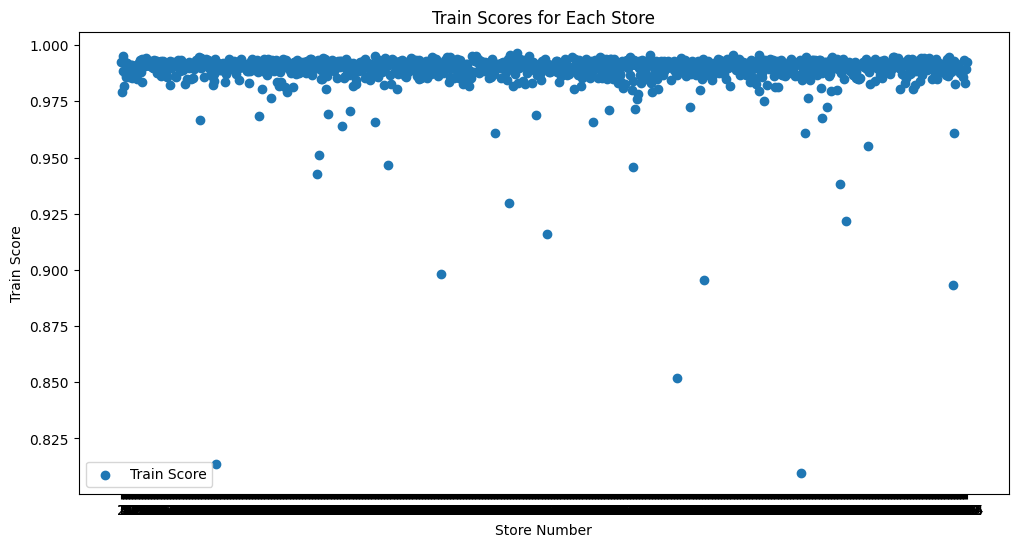

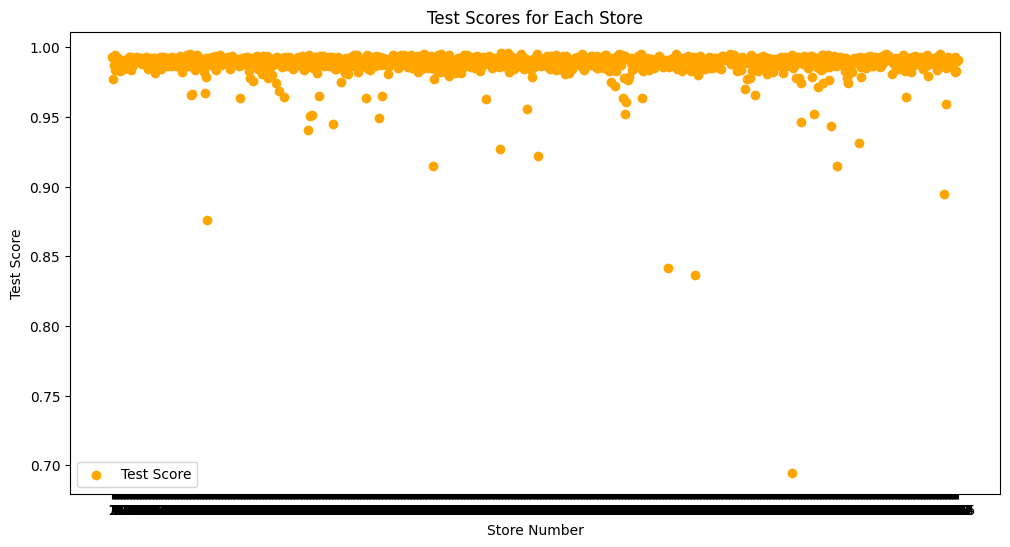

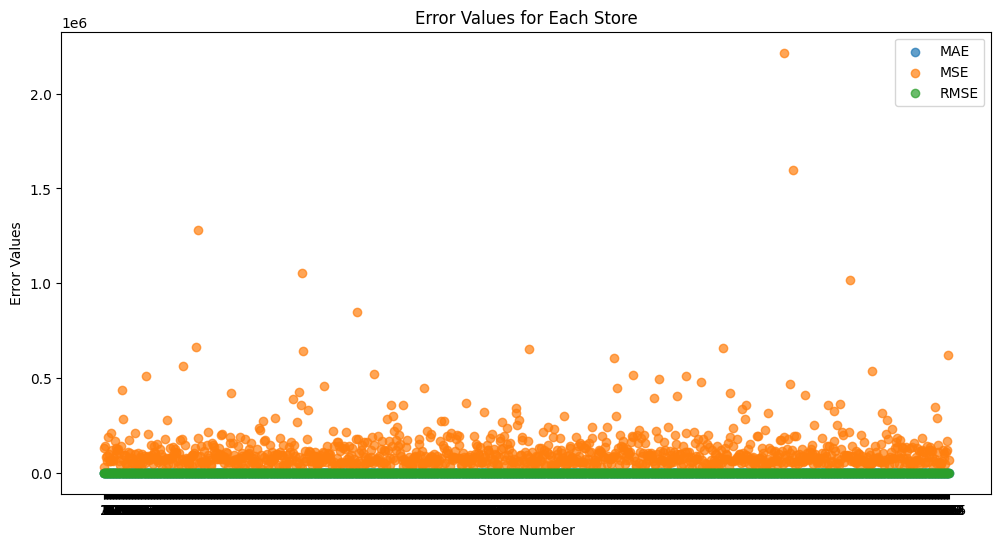

In [ ]:
# Plot train scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, LR_train_score_list, label='Train Score')
plt.xlabel('Store Number')
plt.ylabel('Train Score')
plt.title('Train Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot test scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, LR_test_score_list, label='Test Score', color='orange')
plt.xlabel('Store Number')
plt.ylabel('Test Score')
plt.title('Test Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot MAE, MSE, RMSE
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, LR_mae_list, label='MAE', alpha=0.7)
plt.scatter(store_numbers, LR_mse_list, label='MSE', alpha=0.7)
plt.scatter(store_numbers, LR_rmse_list, label='RMSE', alpha=0.7)
plt.xlabel('Store Number')
plt.ylabel('Error Values')
plt.title('Error Values for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

In [ ]:
#When Sales =0

train_data_upd1 = pd.concat([train_data_upd,train_data['Sales']],axis=1)

In [ ]:
#When sales =0

train_data_upd1.drop(train_data_upd1[train_data_upd1['Sales']== 0].index,inplace=True)
train_data_upd1.shape

(814150, 14)

In [ ]:
y=train_data_upd1[['Sales','Store']]
train_data_upd1=train_data_upd1.drop(columns='Sales')

In [ ]:
train_data_upd1_scaled = Scaling(train_data_upd1)
X_train_full,X_test_full,y_train_full,y_test_full=train_test_split(train_data_upd1_scaled,y['Sales'],test_size=0.2,random_state=30)

In [ ]:
#Linear Regression for full data
lin_reg_upd=LinearRegression()
lin_reg_upd.fit(X_train_full,y_train_full)
y_pred_upd=lin_reg_upd.predict(X_test_full)
print(lin_reg_upd.score(X_test_full,y_test_full))
print(lin_reg_upd.score(X_train_full,y_train_full))

0.7320004965398414
0.7339966120622974


In [ ]:
metrics(y_pred_upd,y_test_full)

MAE:1150.1274937937037
MSE:2590415.8521776185
RMSE:1609.476887742604


[1150.1274937937037, 2590415.8521776185, 1609.476887742604]

In [ ]:
from xgboost.core import Objective
import xgboost as xgb
#Train the full model
xgb_reg=xgb.XGBRegressor(learning_rate=0.02,objective='reg:linear',n_estimators=50,seed='123')
xgb_reg.fit(X_train_full,y_train_full)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:58:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
y_pred_xgb=xgb_reg.predict(X_test_full)
xgb=metrics(y_test_full,y_pred_xgb)
print(xgb)
print(xgb_reg.score(X_train_full,y_train_full))
print(xgb_reg.score(X_test_full,y_test_full))

MAE:1306.6983958028263
MSE:3136808.0399010032
RMSE:1771.1036220111469
[1306.6983958028263, 3136808.0399010032, 1771.1036220111469]
0.675275524569257
0.6754717986934016


In [ ]:
#initialisation of lists
XGB_mae_list=[]
XGB_mse_list=[]
XGB_rmse_list=[]
XGB_train_score_list=[]
XGB_test_score_list=[]

In [ ]:
def XGB_reg_call(X_train,X_test,y_train,y_test):
  XGB_reg=xgb.XGBRegressor(objective='reg:linear',n_estimators=50,seed='123')
  XGB_reg.fit(X_train,y_train)
  train_score_xgb =XGB_reg.score(X_train,y_train)
  test_score_xgb=XGB_reg.score(X_test,y_test)
  #print(train_score,test_score)
  y_pred_xgbr=XGB_reg.predict(X_test)
  return [y_pred_xgbr,train_score_xgb,test_score_xgb]

In [ ]:
import xgboost as xgb
#Train separate models:
store_numbers = list(range(1, 1116))
for i in store_numbers:
  train_data_each =train_data_upd1.loc[train_data_upd1['Store']==i]
  train_data_each.shape
  y_each=y.loc[y['Store']==i]
  y_each.shape
  #Scaling of training data
  train_data_scaled=Scaling(train_data_each)
  #train_test_split
  X_train_each,X_test_each,y_train_each,y_test_each = train_test_split(train_data_scaled,y_each,test_size=0.2,random_state=30)
  #XGB regression
  print("Model for Store : ", i)
  XGB_R=XGB_reg_call(X_train_each,X_test_each,y_train_each,y_test_each)
  y_pred_each_XGB=XGB_R[0]
  print(XGB_R[1])
  print(XGB_R[2])
  #y_pred_each.shape
  metric=metrics(y_test_each,y_pred_each_XGB)
  XGB_mae_list.append(metric[0])
  XGB_mse_list.append(metric[1])
  XGB_rmse_list.append(metric[2])
  XGB_train_score_list.append(XGB_R[1])
  XGB_test_score_list.append(XGB_R[2])
  print(mean(XGB_mae_list),mean(XGB_mse_list),mean(XGB_rmse_list),mean(XGB_train_score_list),mean(XGB_test_score_list))

Model for Store :  1
0.4985836489255251
0.4623565617379351
MAE:109.12519113117496
MSE:42520.79023518388
RMSE:145.80947014387195
159.4754731903129 111088.91766072823 220.9134559876925 0.49904651444889336 0.4674114747480815
Model for Store :  2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49946136187939033
0.47033809303010937
MAE:139.26125026376624
MSE:68273.32115210032
RMSE:184.7611135433865
159.4573763031808 111050.58677755129 220.8810904170172 0.49904688584319107 0.46741409481816387
Model for Store :  3
0.4993533300676126
0.4826487538892569
MAE:145.96156860108408
MSE:81530.69820241806
RMSE:201.90433885942258
159.4453049188319 111024.18258383471 220.8641165784147 0.4990471599435707 0.46742772152574086
Model for Store :  4


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4988332383377141
0.4798140816894334
MAE:155.4567403793335
MSE:80587.7225749776
RMSE:200.73335368668484
159.44174051799232 110996.98288766952 220.84612662051325 0.4990469687714475 0.46743879065904176
Model for Store :  5
0.4995694539147582
0.48297541884429246
MAE:119.25745885419529
MSE:47659.43002259389
RMSE:154.36878452616497
159.40586169507822 110940.43150118284 220.78677185078612 0.49904743527603973 0.46745266264849283


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  6
0.49938394534524777
0.47814456594110316
MAE:119.07597022182894
MSE:48588.44167086375
RMSE:155.8660604107341
159.36988498546782 110884.8097439747 220.72885863808315 0.4990477354634342 0.4674622004748021
Model for Store : 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991583354455813
0.479305237467996
MAE:197.70060687316092
MSE:144327.28111012452
RMSE:268.6329509406252
159.40404783920016 110914.61586818697 220.771553907515 0.49904783403739333 0.46747275576623987
Model for Store :  8


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995496216758435
0.4842463469629215
MAE:126.16590517445614
MSE:50162.42848648318
RMSE:158.370522029944
159.37445020548267 110860.5177494143 220.71598753896865 0.4990482808652103 0.4674876921787035
Model for Store :  9
0.4990512102058121
0.4698207270224459
MAE:150.33073920445727
MSE:75739.56809604276
RMSE:194.60163392315246
159.366404199254 110829.27135292553 220.6927541282784 0.4990482834713852 0.4674897678324791
Model for Store :  10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49860439363514103
0.4511817631695331
MAE:125.8142311949479
MSE:49742.94619282688
RMSE:157.70694774952267
159.3365800454724 110774.97239722767 220.63676674483062 0.4990478889026419 0.4674752718283342
Model for Store :  11
0.49878027259424856
0.478617083079434
MAE:174.45544538999857
MSE:110476.7248534527
RMSE:235.02846616886922
159.35000710172864 110774.70752374297 220.64954800542034 0.49904765123274103 0.4674851668649693
Model for Store :  12


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49924677011951724
0.47954310545752366
MAE:167.81197793860184
MSE:87667.97762249345
RMSE:209.36571731441748
159.3575155053106 110754.20465781461 220.63953573328993 0.4990478279132084 0.46749586601190146
Model for Store :  13
0.4994877608266822
0.47364407649585577
MAE:132.56496011910318
MSE:62040.156989592346
RMSE:176.12520232237955
159.33376323989728 110711.0184453428 220.6000726717554 0.49904821792465653 0.46750131655311067
Model for Store :  14


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991115287607425
0.4753069840019362
MAE:125.57189639198859
MSE:50384.77630189643
RMSE:158.72112705454444
159.30385901771137 110657.585104206 220.5452640396764 0.4990482740015707 0.46750823034181643
Model for Store :  15
0.498729698580781
0.4675697801829249
MAE:153.43133303993628
MSE:77058.23034634764
RMSE:196.28837753077423
159.2986620920673 110627.8511619424 220.5237977684296 0.49904799207641953 0.4675082848107024
Model for Store :  16


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49898938451552566
0.4758192757597404
MAE:166.10845650990805
MSE:91611.53108714671
RMSE:214.0228507603101
159.3046831304562 110611.03743950668 220.51804980467352 0.49904794025717913 0.46751563316697914
Model for Store :  17


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49964876266220887
0.48980714519262564
MAE:124.7003752411596
MSE:61860.911803353076
RMSE:175.87059532655684
159.27411395387557 110567.97195749595 220.47860859047023 0.49904847101902106 0.4675353253154117
Model for Store :  18
0.49933836870871184
0.47829053659377246
MAE:136.91226196289062
MSE:65658.38603858136
RMSE:181.18831109689637
159.25437710304504 110528.33419410767 220.44393048147325 0.49904872688635527 0.4675448179996821
Model for Store :  19


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49931916317595804
0.4714533740720356
MAE:166.95185720683722
MSE:95038.44869834608
RMSE:217.98907691480449
159.26116500437112 110514.67468308848 220.44176570760493 0.4990489653663285 0.4675482646981586
Model for Store :  20
0.4992660770639284
0.4593810974238344
MAE:183.13047701571168
MSE:101621.24033659347
RMSE:225.412149042452
159.28219523521813 110506.83905811359 220.44614489997045 0.49904915665416777 0.4675410689560667
Model for Store :  21


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49901892049055463
0.47293334465674564
MAE:161.54812375386555
MSE:97625.25363774225
RMSE:220.9358227524738
159.28418989060427 110495.49963432805 220.44657595441808 0.4990491300378266 0.4675458156776342
Model for Store :  22


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49866241232171254
0.45420965345826414
MAE:131.13343870339273
MSE:57296.479089075154
RMSE:169.25792934714184
159.25943109448534 110448.71069805254 220.40155515705018 0.4990487899167042 0.4675340864232636
Model for Store :  23
0.49903685286779775
0.47657126184839943
MAE:132.90852637006748
MSE:61282.45135585415
RMSE:175.04637869015306
159.23627564217918 110405.50660372725 220.3616999931953 0.49904877942720605 0.46754202770219605
Model for Store :  24
0.4994949653376209
0.482467619860267
MAE:184.5014172168757
MSE:109546.86010480611
RMSE:234.03728365365328
159.25845750484353 110404.75274376331 220.3737066513695 0.49904917116198255 0.4675551318217378
Model for Store :  25


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49928253102168973
0.4697780100091455
MAE:211.03809629637618
MSE:233192.93109661603
RMSE:341.4622986057512
159.30387824062558 110512.461672143 220.4799247144874 0.49904937586361386 0.46755708171488464
Model for Store :  26
0.4993777992239472
0.48072827751088043
MAE:139.90674307488447
MSE:65516.43486106179
RMSE:180.9923446520334
159.28687812216305 110473.02606582304 220.44531684414343 0.4990496637017912 0.4675686252694824
Model for Store :  27
0.49948927329655274
0.47774441571693077
MAE:214.02446924929586
MSE:170137.75128165606
RMSE:291.6657354421381
159.33480946290484 110525.27188475108 220.5076814838965 0.49905004864889696 0.4675775357689985
Model for Store :  28


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993923900108732
0.44744293288595255
MAE:161.3192336127262
MSE:308107.87994036224
RMSE:392.49708111768075
159.33654561701667 110698.13505890298 220.6581533995866 0.49905034816014976 0.4675599201934228
Model for Store :  29
0.4995630182142199
0.47952219726433176
MAE:171.81225785514377
MSE:110900.81605877622
RMSE:235.47913750150977
159.34745095988217 110698.31222760916 220.6711088052701 0.4990507962983089 0.46757037672932394
Model for Store :  30
0.4992905489052672
0.47911770590893105
MAE:123.29204939524332
MSE:50747.11048992529
RMSE:159.29081216611124
159.31596152620125 110645.95309945398 220.61750155929704 0.499051005689232 0.46758046173297424
Model for Store :  31


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4988100654012163
0.459288685415532
MAE:139.3891894189935
MSE:71895.90719003462
RMSE:189.59948333883435
159.29857341790526 110612.1397958681 220.59043522577133 0.4990507954446526 0.4675732263260655
Model for Store :  32
0.49951445947050716
0.4733701059681289
MAE:107.2448869913566
MSE:44057.08564307657
RMSE:148.42017545912663
159.25319095371472 110554.11446530769 220.5275143366984 0.49905119968530287 0.4675782802751867
Model for Store :  33
0.4992000063560586
0.4641961635765031
MAE:172.6614910908882
MSE:106985.75921088946
RMSE:231.2853156841373
159.26487065766696 110551.00614191534 220.53688524379547 0.49905132930783835 0.46757533418050146
Model for Store :  34


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989074799395582
0.46601555142000334
MAE:136.0858343024003
MSE:67935.52663053627
RMSE:184.3034925781544
159.24469743194436 110513.91695174007 220.50535052433017 0.4990512041125657 0.46757397666721995
Model for Store :  35
0.4992781642418231
0.4781284600433745
MAE:224.39992710138787
MSE:178757.88249674405
RMSE:298.96315595615164
159.30135415339606 110573.25953047485 220.57357470296654 0.49905140146919985 0.46758315447885135
Model for Store :  36
0.4976390650603636
0.4339037758896126
MAE:203.79401995554693
MSE:135856.90319416785
RMSE:260.63091617136496
159.34000981438837 110595.22620611664 220.608376911019 0.49905017441758487 0.46755389350701015
Model for Store :  37
0.49912908513685783
0.4770834387356962
MAE:151.08574224307836
MSE:91064.3157503818
RMSE:213.38269031722118


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.33284465156606 110578.27229079048 220.60210461362854 0.49905024291647315 0.46756216568168785
Model for Store :  38
0.49901577080613535
0.4707085770880557
MAE:164.53928241350792
MSE:92402.20499684208
RMSE:214.94444393305767
159.3373602090352 110562.50813875756 220.5971977093089 0.49905021301871916 0.4675648945727601
Model for Store :  39
0.4995507765044188
0.48260374925753197
MAE:125.40239493262689
MSE:49649.46204564317
RMSE:157.55868187848176
159.30795382664664 110509.72387004603 220.54257161240176 0.4990506467825716 0.46757792650922875
Model for Store :  40


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49838597239852206
0.4581871139951574
MAE:121.0070150756836
MSE:48068.01975908504
RMSE:155.0290842913347
159.27479284071507 110455.66178856468 220.48584997835755 0.49905007130691437 0.4675697959356235
Model for Store :  41
0.4992651070387341
0.47169756773368277
MAE:136.90275834989146
MSE:61923.49022556827
RMSE:175.959523296703
159.25543986970226 110413.67894119184 220.4473323947229 0.49905025732398345 0.467573366672473
Model for Store :  42
0.49905462597084776
0.4699209080899196
MAE:226.9347732114476
MSE:179020.47636310133
RMSE:299.18266446074114
159.31393540413765 110472.97608675962 220.51538367567883 0.4990502610998234 0.46757539566246215
Model for Store :  43


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991935005215038
0.470753429383826
MAE:186.1270389051627
MSE:113574.41405474441
RMSE:238.30069760941834
159.33709007037342 110475.65435788914 220.53074232329 0.49905038479535163 0.46757814007845644
Model for Store :  44
0.49911101123851165
0.48011760845685975
MAE:123.35999890377647
MSE:47683.609030334235
RMSE:154.40794076866652
159.30604857670076 110421.4765793494 220.47369072574503 0.499050437104621 0.4675889592918977
Model for Store :  45
0.49812942446529135
0.47679076560962375
MAE:113.5229441030136
MSE:41387.39681237802
RMSE:143.85306927561405
159.26658038318897 110361.96444161925 220.40763846587424 0.49904964312820776 0.4675968918835509
Model for Store :  46
0.4994213820936393
0.4638432719713678


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:152.8033120772418
MSE:100620.45597362716
RMSE:224.29944072614265
159.26101339929065 110353.57382278377 220.41099057807085 0.4990499633168085 0.4675936587914646
Model for Store :  47
0.4992249414431839
0.4727419997395205
MAE:154.92739767777292
MSE:77007.47533139586
RMSE:196.22372725873305
159.2572839537472 110324.87666401321 220.3901753772797 0.499050113900394 0.46759808937747843
Model for Store :  48
0.4983003751286231
0.45497967330519107
MAE:100.5620046916761
MSE:33329.427736104706
RMSE:129.09190056900096
159.20681509797583 110258.6724946857 220.31167299137402 0.49904946924108895 0.46758723949263553
Model for Store :  49
0.4985899809587637

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



0.4504516407568579
MAE:196.03268732706707
MSE:191599.0430133414
RMSE:309.51501217126383
159.23845244525168 110328.5525380866 220.38830816249077 0.49904907449170555 0.4675725181878797
Model for Store :  50
0.4985857408987765
0.4679896290688436
MAE:111.05413340890644
MSE:43532.627123386
RMSE:147.53412889793552
159.1970925147484 110271.21697979073 220.325772386298 0.49904867678046694 0.46757287622297067
Model for Store :  51
0.49915244972383893
0.45786510837736044
MAE:160.10782168091845
MSE:119833.48140756608
RMSE:244.77899346942598
159.19787358607442 110279.41789267903 220.3467442740194 0.49904876577956075 0.4675645505215593
Model for Store :  52


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992447985682054
0.42694392062136033
MAE:211.50003946128012
MSE:385125.6552832073
RMSE:438.8198466033287
159.24269120893237 110514.93309181402 220.53395344482428 0.49904893375967097 0.4675297427838557
Model for Store :  53
0.49928752772247476
0.47917953657559115
MAE:113.7920836398476
MSE:42847.691757995686
RMSE:146.36889402323797
159.20377801752048 110456.99880985013 220.4704559624428 0.4990491380353241 0.46753971692237595
Model for Store :  54
0.49914193900217324
0.47843875878616954
MAE:176.1934373755204
MSE:111767.39617957987
RMSE:236.39736720972743
159.21831151568813 110458.11976568395 220.4840803518759 0.4990492174202401 0.46754904031148103
Model for Store :  55


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499405653577997
0.4847416507422814
MAE:106.66190197925694
MSE:39414.45936160702
RMSE:140.3824617660096
159.17339150753733 110397.3986884155 220.41561743000761 0.4990495220665288 0.4675637348503108
Model for Store :  56
0.49907681122894426
0.4757431863743637
MAE:160.0631681278052
MSE:84831.1508602042
RMSE:205.95045416700387
159.17415135093637 110375.56585508655 220.40326460057722 0.49904954537068114 0.46757071986442184
Model for Store :  57
0.4994913497841451
0.48583439091884606
MAE:213.25599717773846
MSE:206283.1806456072
RMSE:321.15669220909587
159.22029627058382 110457.39829091464 220.4892316889804 0.49904992233690426 0.46758630320149897
Model for Store :  58
0.499407022458678
0.4601444402880271
MAE:183.72516390482585

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MSE:141271.60028732606
RMSE:265.77399299286463
159.2411870358304 110483.66785783399 220.52783762359581 0.49905022677008565 0.46757995890234
Model for Store :  59
0.49949601934188115
0.4803205926561224
MAE:131.5459102984296
MSE:64926.52171450976
RMSE:180.17566370727374
159.2175965105004 110444.86279297597 220.49346609555806 0.499050606491186 0.4675908112309207
Model for Store :  60
0.499543972117971
0.48404838269876643
MAE:182.47919697793114
MSE:113069.89767717276
RMSE:237.770826789231
159.2373936172812 110447.09686521784 220.50817023231863 0.4990510263768258 0.46760481767472317
Model for Store :  61


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4978808419242052
0.43212167005188123
MAE:157.79925926208497
MSE:106510.53385935037
RMSE:230.7710480394212
159.23617071391794 110443.74944769584 220.51689716922942 0.49905003132201914 0.4675746449301459
Model for Store :  62
0.4995217548761607
0.48110819581207753
MAE:138.07860955497287
MSE:59816.253497043646
RMSE:172.93969077169263
159.2181948760599 110400.73543244465 220.47647473388741 0.4990504321066871 0.4675861432741408
Model for Store :  63
0.4992728373615762
0.47560007270099625
MAE:161.69108451040168
MSE:90753.40934226304
RMSE:213.01811773960247
159.22029410325374 110384.05688737659 220.47014336122675 0.499050620905715 0.46759294627025866
Model for Store :  64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994477657338774
0.4810006599030225
MAE:197.40219932202473
MSE:133696.73058853735
RMSE:258.55055779838983
159.2526790949575 110403.83014751328 220.50244227084266 0.49905095775459385 0.4676043183768174
Model for Store :  65
0.4992410137146139
0.4766518779275272
MAE:131.09632989744478
MSE:69991.36434397008
RMSE:187.07135199017216
159.22881778207827 110369.5822951374 220.4741108384014 0.49905111881896674 0.46761198580016544
Model for Store :  66
0.49782877353778776
0.45474149718090556
MAE:127.5478145345052
MSE:57671.85527931658
RMSE:169.81147783388056
159.2019922077789 110324.96101908674 220.43121275795727 0.4990500838102612 0.46760108784197807
Model for Store :  67


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991246797261151
0.4784838240734213
MAE:176.39799982706705
MSE:101674.16025732753
RMSE:225.4708309527304
159.21654043757525 110317.64223671639 220.43547639433189 0.49905014692017313 0.46761029489462735
Model for Store :  68
0.49905005759002125
0.4689144720308563
MAE:196.9275599027935
MSE:142117.64382413108
RMSE:266.5686407210705
159.2484178842914 110344.52304955444 220.47447315200452 0.4990501468446616 0.46761139732669516
Model for Store :  69
0.4992363141102419
0.4728842867161315
MAE:198.44100196787852
MSE:152864.71093269883
RMSE:276.4640639723968
159.2815197289566 110380.4353704017 220.52176165776498 0.4990503040805278 0.4676158507805714
Model for Store :  70


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989021085940232
0.4685029255013311
MAE:150.56767283054378
MSE:95535.92711600769
RMSE:218.55886369071462
159.27416627165834 110367.90835921656 220.52010520378434 0.49905017902104554 0.46761659936683364
Model for Store :  71
0.49913743728508747
0.47891026493637984
MAE:198.01192886150437
MSE:152310.79210303514
RMSE:275.9627134437307
159.306828803353 110403.27335394152 220.5668527655381 0.499050252594624 0.46762612185045044
Model for Store :  72
0.4993963125658596
0.48029477852133046
MAE:126.91859944661458
MSE:63487.82258324746
RMSE:178.16823355333904
159.27954301619482 110363.74896407573 220.53113362551096 0.4990505441363015 0.46763679468673597
Model for Store :  73


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989107205690366
0.45430976237737297
MAE:147.41019479851974
MSE:70519.1759074157
RMSE:187.7753885613925
159.26955198234157 110330.20976116609 220.50356144953108 0.49905042643969605 0.4676255766460715
Model for Store :  74
0.4992621877059877
0.48157762872089893
MAE:130.08441853841146
MSE:58869.63517149436
RMSE:171.56581261222033
159.2450060332718 110286.92921062809 220.46240270366286 0.4990506045400041 0.4676373109203144
Model for Store :  75
0.4984583007585053
0.462700560537296
MAE:137.50470854106703
MSE:61885.77404981155
RMSE:175.90593441197515
159.22673687571535 110246.25597099715 220.4249602933337 0.499050106805734 0.4676331623905808
Model for Store :  76


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49887634053924096
0.4485194753291914
MAE:200.73107833862304
MSE:273450.3881338363
RMSE:369.7637422716333
159.26158518928622 110383.28714829593 220.55034969885705 0.49904996090626585 0.46761711395476097
Model for Store :  77
0.498958438047398
0.47321108958718106
MAE:173.3646324865076
MSE:97573.34875897874
RMSE:220.87709149188214
159.27341660480403 110372.54055568745 220.5506238110995 0.499049884125344 0.4676218068873385
Model for Store :  78
0.499037392145097
0.4739779826991769
MAE:95.36540323219552
MSE:34930.91098744079
RMSE:132.15695035385005
159.2198474402 110309.3036490921 220.47653020384283 0.4990498736542793 0.46762713477988826
Model for Store :  79


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49908564291815016
0.4609730009290992
MAE:144.56713958740235
MSE:94227.57370360261
RMSE:217.05712793614276
159.20757549057453 110295.8348635431 220.47366638284808 0.4990499036117867 0.4676215618034638
Model for Store :  80
0.4990006743425309
0.4727452012529495
MAE:160.89883238432424
MSE:89835.37724598669
RMSE:211.93797011299438
159.2089907683099 110278.71314168742 220.46652354078128 0.49904986241574545 0.46762584936785667
Model for Store :  81
0.4989160885540719
0.4428371932914403
MAE:183.04341135105165
MSE:113413.33220754687
RMSE:238.13164941891662
159.22891921361318 110281.33406063881 220.48129371292018 0.49904975056469053 0.4676051230667895
Model for Store :  82


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49952065672380624
0.48049797642269554
MAE:197.49275169625187
MSE:154321.27515635858
RMSE:277.7780784911578
159.26088565678998 110318.12599137875 220.52916070103902 0.4990501439700031 0.4676158940386824
Model for Store :  83
0.49814536107126256
0.4644110059038909
MAE:91.87155525258045
MSE:28010.004381072515
RMSE:118.34274714603266
159.20463412890666 110249.42138235513 220.44386319389793 0.49904938872551335 0.4676132188399055
Model for Store :  84
0.49927548132117117
0.47723519633538813
MAE:239.13007907993747
MSE:204866.6359849547
RMSE:320.05211234973643
159.2712942164388 110328.33482239065 220.52693929828146 0.4990495772931494 0.4676212438419868
Model for Store :  85


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49909926695717044
0.48828890325670204
MAE:136.70807549731978
MSE:68116.1542876774
RMSE:184.54834005150306
159.2524915341729 110293.1580052784 220.49695713224247 0.49904961870120274 0.46763846689149907
Model for Store :  86
0.4992578068747845
0.4769638088914393
MAE:114.29399689933322
MSE:46294.151138921756
RMSE:152.1416528566454
159.21505731715803 110239.86990630557 220.44004180811623 0.49904979204689265 0.4676462315392925
Model for Store :  87
0.49892488547368424
0.4750792268961304
MAE:130.39034893638208
MSE:57015.18465398336
RMSE:168.8419418986964
159.19107669454507 110195.5898021023 220.3971149363114 0.49904968813127437 0.4676524153956626
Model for Store :  88
0.4995701451674276
0.4814337588948692


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:145.48436977058057
MSE:109057.32957950086
RMSE:233.51376246536168
159.17968292320344 110194.64361737862 220.40801821771544 0.4990501207638896 0.4676638712090451
Model for Store :  89
0.4993220530335959
0.4503814861185926
MAE:158.7364530162651
MSE:98371.58222534212
RMSE:221.77872902730905
159.1793147920515 110184.82379894669 220.409156681843 0.49905034662125647 0.4676495170686046
Model for Store :  90
0.49924471828462635
0.47703778491062443
MAE:165.18632067749832
MSE:90381.28710734345
RMSE:212.58094875201797
159.18429985917635 110168.38932866321 220.40266024372696 0.49905050792554145 0.4676573081622494
Model for Store :  91


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990650061702451
0.4690946110426278
MAE:149.9618714692577
MSE:73961.60347542746
RMSE:192.30395352329361
159.17665273779167 110138.3671181713 220.3793611502606 0.4990505199473032 0.46765849995568254
Model for Store :  92
0.4994122364002155
0.47651334983879884
MAE:149.7587945192855
MSE:76315.67061828313
RMSE:195.34033692959497
159.1688500383563 110110.34500011009 220.35861630832136 0.4990508196295343 0.4676658362024788
Model for Store :  93
0.4994566453728221
0.4785664601631615
MAE:141.19871028369624
MSE:76293.45225921909
RMSE:195.3118955936598
159.15397409485078 110082.35088360272 220.33788226799464 0.4990511555779973 0.4676748598978105
Model for Store :  94


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990178685592974
0.4752838750796318
MAE:167.33880127660487
MSE:109674.93631189942
RMSE:234.17404688693213
159.16074400980673 110082.01389884533 220.3493265728904 0.49905112804531016 0.46768115354146794
Model for Store :  95
0.4995667445314245
0.4675710239574768
MAE:196.8148488177369
MSE:213955.38273019053
RMSE:327.0744774871848
159.19186310468933 110167.85965821007 220.43752917695178 0.49905155417463753 0.4676810625252828
Model for Store :  96
0.4996743508626258
0.48425321650171205
MAE:124.31629372906211
MSE:81208.00359738832
RMSE:201.50436973631895
159.16306412089443 110143.94565650831 220.42189485866885 0.4990520684576169 0.46769474721064735
Model for Store :  97


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49954995478355846
0.4723982729098083
MAE:167.94467526871637
MSE:115437.23813999715
RMSE:240.24702648214299
159.17030967464675 110148.3130595475 220.43825222799515 0.4990524792549155 0.46769862800742884
Model for Store :  98
0.4986529579608569
0.46122683578178064
MAE:141.13610703424112
MSE:64283.86008260312
RMSE:179.28172870698998
159.15544223636118 110110.50229864317 220.40432269500175 0.4990521498886385 0.467693292646979
Model for Store :  99
0.49915038163766157
0.4710268705657467
MAE:132.2169664527188
MSE:59136.64023449771
RMSE:171.9544357924424
159.13325238810447 110068.51394438934 220.36441339771793 0.49905223080441197 0.4676960385925463
Model for Store :  100


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498662111637433
0.4598663519876363
MAE:176.50573546310952
MSE:104867.72443551835
RMSE:228.98445293924127
159.1475507280839 110064.23345919685 220.37150808046815 0.49905190971867786 0.46768959440604024
Model for Store :  101
0.49829702570528284
0.4671419436931133
MAE:152.62090964066354
MSE:87807.23627282836
RMSE:209.53193676341593
159.14218342455806 110045.93000756334 220.36259395931924 0.49905128892590367 0.46768914403538814
Model for Store :  102
0.4993986887405596
0.4782147226944266
MAE:185.61170409029762
MSE:124315.47963165492
RMSE:249.31457425288707
159.16393323611578 110057.65519213531 220.38638358979875 0.4990515743817908 0.46769779282639806
Model for Store :  103
0.4986314303990947
0.4509794757865067


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:130.80917755631376
MSE:75191.21551631705
RMSE:193.8958912251804
159.1406534695478 110029.02921538996 220.36463441708563 0.4990512294359922 0.46768406678613544
Model for Store :  104
0.4983197983352889
0.46709249426132765
MAE:138.94738428216232
MSE:64294.88620802546
RMSE:179.29713016966807
159.1240880313301 109991.51146066695 220.33094491401144 0.4990506294104789 0.4676835814928419
Model for Store :  105
0.49914254516226
0.3402712935289537
MAE:182.6235793649334
MSE:792588.5573519275
RMSE:629.5191081238603
159.1433499094724 110551.01723598766 220.66634504779 0.49905070475125907 0.46757914519123217
Model for Store :  106


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987561684230771
0.477447760780881
MAE:159.20884892781575
MSE:83671.8837245873
RMSE:204.53840477483973
159.14340355322204 110529.00320362778 220.65313625149767 0.49905046352576504 0.4675872275954825
Model for Store :  107
0.4988150741530178
0.4648203950753886
MAE:131.3424062226948
MSE:56146.745588439866
RMSE:167.55113935464985
159.12065314624127 110484.50053782157 220.60968126222036 0.4990502708994371 0.4675849634117508
Model for Store :  108
0.4994089454637668
0.4643336670540046
MAE:242.84427761430499
MSE:224872.73778242015
RMSE:335.31537714291915
159.18911072961663 110578.03139411315 220.70347169221276 0.49905056417381516 0.46758230495193254
Model for Store :  109
0.49876115959298456
0.46326988349519554
MAE:138.9797009919819
MSE:70719.35992028163
RMSE:188.04172791509654
159.17259977394863 110545.46712003322 220.67678726102233 0.4990503277321641 0.46757878173178813
Model for Store :  110
0.4990266533223256
0.4681128599571977
MAE:110.70380722848992
MSE:43341.02235253083
RMSE:147.2090

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4962166954980448
0.44138623519322595
MAE:115.4411685341283
MSE:44028.994014408534
RMSE:148.37286161277336
159.10850078639768 110436.6625149905 220.56992867291558 0.4990478851526771 0.46755552846407156
Model for Store :  113
0.4990223409422432
0.457403972123516
MAE:184.25696874666616
MSE:145661.95098167344
RMSE:269.87218089585747
159.12897999483437 110465.34760331841 220.61007708677792 0.49904786435120285 0.46754726172438055
Model for Store :  114
0.49820359506805956
0.46459962836967045
MAE:130.6563620316355
MSE:55601.31243492905
RMSE:166.73531074730477
159.1058126897382 110420.70640301867 220.56624082450006 0.4990471773949106 0.4675448633245801
Model for Store :  115
0.4990206351574395
0.4761187261378693


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:164.79434995891668
MSE:83889.54014342432
RMSE:204.8042580966084
159.1104375167863 110399.13634914908 220.5534262043961 0.4990471558158558 0.4675518339447535
Model for Store :  116
0.4986680012742791
0.4693325314443154
MAE:126.47120325188888
MSE:57700.50742133903
RMSE:169.8536586994591
159.08392311039728 110356.32673994696 220.5122403656431 0.4990468478105417 0.46755328049024464
Model for Store :  117
0.4989111473162936
0.468842531185704
MAE:98.3468913905668
MSE:35400.07018104568
RMSE:133.0414940934841
159.03462357166364 110295.48562261018 220.44124138327933 0.4990467376640367 0.467554326959965
Model for Store :  118
0.4994735168338516
0.4789309801083055


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:163.47049897553904
MSE:97454.43595700961
RMSE:220.74245884216344
159.03822119972844 110285.07114599575 220.44148567967744 0.4990470837947502 0.46756355376706016
Model for Store :  119
0.49899298350262117
0.4704444941871759
MAE:126.60172311883224
MSE:50684.39315656563
RMSE:159.19235626942424
159.01193554488168 110236.77237939168 220.39185105292685 0.49904703995334654 0.4675658884027329
Model for Store :  120
0.49894685201152583
0.4733266282052433
MAE:146.75197452267275
MSE:68222.1949703117
RMSE:184.69193313986975
159.00200845093656 110202.75247865557 220.36294423680292 0.499046958829507 0.46757055296937455
Model for Store :  121


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499481025597012
0.47321615341817874
MAE:115.54417717535765
MSE:52260.00647088956
RMSE:161.64779811396346
158.96684839327025 110155.87323431272 220.3154400732731 0.4990473100162121 0.4675751206072781
Model for Store :  122
0.49936532052540156
0.4846485242531116
MAE:148.2130774782415
MSE:78693.08740928711
RMSE:198.35966276326118
158.958154964883 110130.43848425207 220.29769085960294 0.4990475670982729 0.4675889228737663
Model for Store :  123
0.4996142072207467
0.47830146027213377
MAE:209.41234004897558
MSE:233421.324201833
RMSE:341.6294603297159
158.99890955703492 110230.02724492863 220.39569713542693 0.49904802480434923 0.46759757597344187
Model for Store : 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 124
0.499117974384553
0.46347965519469986
MAE:130.69633862830156
MSE:54587.21745267457
RMSE:165.20779730069955
158.97606648122482 110185.11779392601 220.35115484338922 0.4990480812608304 0.4675942523892782
Model for Store :  125
0.499280095176159
0.4840678626198517
MAE:184.36781913355776
MSE:108233.28367680724
RMSE:232.6298920731192
158.99654370110574 110183.54373415414 220.36105705083256 0.49904826836882665 0.467607537558819
Model for Store :  126
0.4966972461716321
0.011767832162286718
MAE:619.1185466437939

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MSE:3945776.6317327665
RMSE:1404.5954583423957
159.36731082676462 113274.27144406438 221.31531523076129 0.49904637391097234 0.4672402211161143
Model for Store :  127
0.49913189038727124
0.467815490025963
MAE:159.32791392008463
MSE:85059.0388362592
RMSE:206.2268868466143
159.36727910622784 113251.55386547517 221.30316673769835 0.49904644276481797 0.46724068429559085
Model for Store :  128
0.4992584413747911
0.483533552640999
MAE:154.330933223497
MSE:75863.91376235498
RMSE:194.76131229908765
159.3632273396287 113221.47531350162 221.2818136770076 0.4990466133188083 0.46725379199337475
Model for Store :  129


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499169486221214
0.45776136208167156
MAE:199.86207349761193
MSE:224602.61554614955
RMSE:335.1139186212148
159.39578268219944 113311.00999214522 221.373318584519 0.4990467120912379 0.4672461614227062
Model for Store :  130
0.4978668068118566
0.4403906960721844
MAE:125.26459048441704
MSE:50880.34433205383
RMSE:159.49977889434928
159.36836806999236 113260.86487916524 221.32362096227791 0.49904576437615406 0.46722459076780615
Model for Store :  131
0.49820531750851565
0.4716846767728051
MAE:119.98341081631894
MSE:49351.786219876
RMSE:157.0856463867631
159.33675895502154 113209.57348377255 221.27206560547575 0.4990450898602089 0.46722817029108465
Model for Store :  132


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49940804170175557
0.4683858469639673
MAE:146.950209417263
MSE:85209.72003141558
RMSE:206.40947801382734
159.32682587600166 113187.11971195831 221.2601469305827 0.4990453809202262 0.4672290986605096
Model for Store :  133
0.49974653633137095
0.48199532766148745
MAE:154.08635928930826
MSE:85928.4815258951
RMSE:207.27820294040373
159.32262678418542 113165.27785443742 221.24894344982133 0.4990459427434723 0.4672409305747732
Model for Store :  134
0.4986400997815465
0.46046185484154567
MAE:106.5441087421618
MSE:36222.069499298996
RMSE:134.57726743438826
159.280370164456 113103.67400467349 221.1795505947249 0.4990456178091553 0.4672355029721045
Model for Store :  135


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49898448662772127
0.4544037540878579
MAE:140.63006046118326
MSE:91662.16834874016
RMSE:214.0819871939154
159.2654499166934 113086.52080014875 221.17387254400424 0.49904556890421015 0.46722523757299705
Model for Store :  136
0.4996508785084246
0.47486527936026707
MAE:163.01820008093569
MSE:93048.24343684646
RMSE:215.6945330603776
159.26844971698455 113070.50299250423 221.16949257639143 0.49904605276480507 0.4672313447207087
Model for Store :  137
0.4993887939261204
0.45566922634260665
MAE:187.13370821656298
MSE:157143.32156402414
RMSE:280.306407646509
159.29070631323023 113105.70492427061 221.21672653411517 0.49904632651972625 0.4672221098018764
Model for Store :  138


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49941901917728726
0.48423220234006376
MAE:180.18687408649367
MSE:117761.80897358898
RMSE:242.6539084729769
159.3073832228657 113109.42088919425 221.23383521882297 0.49904662395999566 0.4672356852947241
Model for Store :  139
0.4993256680298094
0.46611310631326275
MAE:178.419691839138
MSE:117882.71055852802
RMSE:242.77843828742712
159.32262429831727 113113.22734028622 221.2510159230244 0.4990468464831773 0.4672347900961743
Model for Store :  140
0.49888666988373054
0.4599733745960108
MAE:176.53486986981324
MSE:116888.39371492087
RMSE:241.75237664364886
159.33633923502762 113116.23544098315 221.26735166861852 0.4990467188524208 0.46722900410772794
Model for Store :  141


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49877020248896664
0.4713848678956164
MAE:136.34923543294272
MSE:61079.329713238156
RMSE:174.7560457405688
159.3180374007903 113074.8047835566 221.2303203740898 0.4990464986960805 0.46723231291647627
Model for Store :  142
0.4988867896201879
0.46545408985341225
MAE:105.88695788857163
MSE:39936.265232257014
RMSE:141.30866599301277
159.2755305754027 113016.61978789128 221.166739105688 0.49904637164033194 0.4672308982601015
Model for Store :  143
0.4992894969361581
0.4830022848104992
MAE:137.454695543706
MSE:58720.87172084621
RMSE:171.34890229799626
159.25818491957463 112973.45941581891 221.12713828151655 0.49904656490368315 0.467243435133353
Model for Store :  144


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49919974504455694
0.4696713620696599
MAE:188.01947631835938
MSE:123164.75681580888
RMSE:248.1580011892926
159.2810294719168 112981.554171498 221.1486083870827 0.4990466865717855 0.4672453635900141
Model for Store :  145
0.4995982873968561
0.46993189771264554
MAE:191.4989544469067
MSE:119312.03358456325
RMSE:244.24585800715965
159.306599253643 112986.57836150838 221.16693953757482 0.4990471243502181 0.46724749575995267
Model for Store :  146
0.4991906448880406
0.47624607487276793
MAE:162.8359045066581
MSE:89909.8087358346
RMSE:212.02575443609604
159.30939806827664 112968.27798908517 221.15969038206217 0.4990472381650776 0.4672546318258629
Model for Store :  147


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49906151051130837
0.47557382965391715
MAE:160.93997793639733
MSE:92074.08230171037
RMSE:214.56247929372537
159.310690128394 112951.72157411894 221.1544627979985 0.4990472494743852 0.46726122390021163
Model for Store :  148
0.49888504964079666
0.4608450196449811
MAE:174.89302223607115
MSE:91997.81824612095
RMSE:214.4736085365787
159.32302768350695 112935.13099349504 221.14917312716602 0.4990471210501306 0.46725614377016
Model for Store :  149
0.4992312994907553
0.4729152024409663
MAE:142.26024134018843
MSE:78184.12393453378
RMSE:197.71715665303955
159.3095286436784 112907.63810816358 221.13063513944914 0.49904726676092226 0.46726062087353876
Model for Store :  150


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994604488075177
0.4778992835152112
MAE:168.4757618151213
MSE:97908.38170782856
RMSE:221.25598547949062
159.31677467780602 112895.78098847951 221.13073423062704 0.499047593387046 0.4672690308835322
Model for Store :  151
0.4990851755675812
0.4724954604470192
MAE:159.32650958939104
MSE:101683.41714198492
RMSE:225.48109085522938
159.31678236730963 112886.92446095464 221.1341705312784 0.49904762307281264 0.4672731591849252
Model for Store :  152
0.49948108621620524
0.48610583461280965
MAE:114.37922501721918
MSE:45350.90032060559
RMSE:150.58372107727135
159.28131468195045 112833.62057449817 221.07848746146465 0.49904796519052647 0.4672880231750024
Model for Store :  153


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49956231490014436
0.4849465215553585
MAE:167.3665284415744
MSE:106390.13429744165
RMSE:230.64058885179628
159.2876910334959 112828.538960715 221.0860285508892 0.4990483708290987 0.46730194943555475
Model for Store :  154
0.49930950671651825
0.4811023498827841
MAE:186.59440693634235
MSE:119283.42758619336
RMSE:244.21657632476104
159.3092093281396 112833.62555537652 221.1042559329017 0.49904857660993984 0.46731282445560773
Model for Store :  155
0.49894683428557296
0.4699999129389692
MAE:185.72174377441405
MSE:94244.63953164034
RMSE:217.0767905952503
159.33000659935712 112818.98855850745 221.10108470035237 0.4990484964978734 0.46731494027331116
Model for Store :  156
0.49960144104037885
0.4889283667811316


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:152.94637697737738
MSE:84124.47118510482
RMSE:205.09082892782246
159.3249840740841 112796.41222697841 221.08848811831263 0.4990489315447204 0.46733194532957223
Model for Store :  157
0.4991439630572651
0.474720060547063
MAE:209.7388104571412
MSE:154277.2604460245
RMSE:277.7384662784831
159.36461758539156 112829.02295671037 221.13302426466495 0.499049006255029 0.4673377535962526
Model for Store :  158
0.4986476202419579
0.4555012605326282
MAE:186.55964888010593
MSE:137875.55297281308
RMSE:262.5600817301597
159.38598053220593 112848.69815703723 221.16556712206128 0.49904869094787024 0.4673284554870118
Model for Store :  159


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49940212426280434
0.48141265322314036
MAE:169.04082234700522
MSE:93249.15240462807
RMSE:215.92727799300235
159.39355890097738 112833.31389820488 221.16145543514676 0.4990489683680547 0.46733951058727563
Model for Store :  160
0.4987496085892808
0.4723373349239636
MAE:122.87046460284303
MSE:63463.287332029424
RMSE:178.13381076718093
159.36491333682199 112794.59230874122 221.12770826285816 0.4990487335760713 0.46734343044950044
Model for Store :  161
0.4982838123939551
0.46085460279473567
MAE:150.90969525267747
MSE:81137.55263469736
RMSE:201.416952143711
159.35828699036105 112769.78271652019 221.11226096182435 0.49904813410806026 0.4673383451613698
Model for Store :  162
0.4993167308195785
0.4772606216664675
MAE:163.50513483514848
MSE:100631.08418072562
RMSE:224.31129213937427
159.36153432618312 112760.27707945222 221.11476607629385 0.4990483444422118 0.4673461151508021
Model for Store :  163


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990012390035483
0.4729348596363789
MAE:128.83206337376646
MSE:54619.48821754469
RMSE:165.2566313200012
159.33764585125948 112714.7835044429 221.0710586156082 0.4990483075834961 0.46735048819030567
Model for Store :  164
0.49946154207056426
0.4810584620151267
MAE:145.1010986328125
MSE:80809.57789969233
RMSE:201.00945554497636
159.3265148526524 112689.83807394661 221.05537323400486 0.49904863067535465 0.46736120591808117
Model for Store :  165


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991517468957485
0.457446998436068
MAE:114.07101344260849
MSE:46073.3696446552
RMSE:151.77842985810497
159.2911589921758 112637.79395798623 221.00125062199245 0.4990487112349018 0.46735346044348586
Model for Store :  166


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990735528882197
0.47658740759612517
MAE:123.28738403320312
MSE:55378.44296287729
RMSE:166.40081621715862
159.26305300079488 112593.09501107357 220.95862733205894 0.49904873062729316 0.4673606688331444
Model for Store :  167


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4998075534688006
0.4816030173910899
MAE:196.36522032882993
MSE:195160.5142954772
RMSE:312.3784335494916
159.29199384894466 112657.50017432193 221.02993763332057 0.4990493225327858 0.4673717783093987
Model for Store :  168
0.4995319928641398
0.4817452703057071
MAE:172.00722371419272
MSE:100568.02052156336
RMSE:224.2409952425381
159.3019043944359 112648.0773530805 221.03244040620385 0.4990496987372529 0.467382981342911
Model for Store :  169


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49862707702112713
0.45024347522016545
MAE:181.91525763434333
MSE:185798.62820805272
RMSE:304.7939184222168
159.31951604026136 112705.04818707971 221.09767520216647 0.4990493695926142 0.4673696328178933
Model for Store :  170
0.4990437794894434
0.46715091914022344
MAE:133.1083057226724
MSE:56514.32608966249
RMSE:168.0986934505373
159.29911821122045 112661.31999867705 221.05643085839088 0.49904936524233934 0.46736946261269663
Model for Store :  171
0.4995379651639743
0.48582240645078234
MAE:159.1954783761738
MSE:92098.46499316795
RMSE:214.5908871983302
159.29903762036892 112645.33022029018 221.05140321946394 0.49904974518007 0.4673838117136594
Model for Store :  172


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993767554684961
0.46040222402972025
MAE:146.60179407456343
MSE:71269.0194343858
RMSE:188.77108157465088
159.28917185226808 112613.1807946601 221.02632138446407 0.4990499992673182 0.46737838701460427
Model for Store :  173


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991151878329692
0.47713816770944706
MAE:139.02638284783615
MSE:75513.42061376863
RMSE:194.31089812881427
159.27343987322737 112584.37663302898 221.0055795962221 0.49905004987955864 0.4673859644840878
Model for Store :  174
0.49864175084740564
0.4297963588853859
MAE:149.02344852736016
MSE:98443.91682707623
RMSE:221.86025321091535
159.26548797924298 112573.40653232615 221.00624264790147 0.4990497331231334 0.46735680264886775
Model for Store :  175


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4984691146544963
0.4688971970561069
MAE:120.07589801989104
MSE:47014.434193266556
RMSE:153.32066545179808
159.2351084521427 112522.58562353617 220.95377320821456 0.4990492830312972 0.4673579967530594
Model for Store :  176
0.49945259355955446
0.48008300064096987
MAE:121.87318051571877
MSE:57421.32460579618
RMSE:169.4422322189686
159.20616815164973 112479.90455380904 220.91387271170856 0.49904959543294575 0.46736785345630333
Model for Store :  177


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995469801298073
0.4821607340658701
MAE:96.19583741244891
MSE:32836.01380339192
RMSE:128.13279348843025
159.15739854581446 112418.26067551924 220.8420607308856 0.4990499804056213 0.46737930305429837
Model for Store :  178


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49946431166384553
0.4786274025484778
MAE:213.46679414660724
MSE:208989.96267062885
RMSE:323.2568807161907
159.19940117195583 112492.9487667761 220.92126786157803 0.4990503008474297 0.46738800228051197
Model for Store :  179


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49937597441162795
0.48336748005183966
MAE:145.9933805149912
MSE:67226.32305928205
RMSE:183.338955816163
159.18919559184997 112457.96683037153 220.8922243437686 0.49905055252715474 0.46740035118141715
Model for Store :  180


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992063423429433
0.47771678583416943
MAE:131.35432353772615
MSE:52717.96801599262
RMSE:162.354531557726
159.16770148215568 112411.8355571558 220.84702149219635 0.4990506728281708 0.4674083175402224
Model for Store :  181


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996365557691931
0.4802339120973771
MAE:158.08706970214843
MSE:118476.44424653612
RMSE:243.38906503488568
159.16686766133776 112416.51503916922 220.8644150443126 0.49905112489834136 0.4674182138323189
Model for Store :  182
0.49879197664851804
0.46604793838932845
MAE:144.9246044537879
MSE:74386.40848276933
RMSE:192.85542011985078
159.1558867336527 112387.19344583352 220.84281982848805 0.49905092509244325 0.4674171573362179
Model for Store :  183


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992786804673793
0.45158741876094755
MAE:135.69507455418253
MSE:94229.86706161349
RMSE:217.05976934248642
159.13781214799823 112373.20475062224 220.83990530577157 0.4990511005588338 0.46740496185195346
Model for Store :  184
0.49877638209740793
0.46094892220647476
MAE:152.93790812174478
MSE:94058.9307303622
RMSE:216.86281055412604
159.13303931964853 112359.10600233875 220.8368436469943 0.49905088907425993 0.4673999918445282
Model for Store :  185
0.49914377590131187
0.461049617817088
MAE:187.26724243164062
MSE:135179.65885521265
RMSE:259.9804709887901
159.15468101435007 112376.66027376404 220.86695412956493 0.4990509605256654 0.4673951069414301
Model for Store :  186


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49856967209437125
0.4631830709186619
MAE:105.70482667554326
MSE:36792.86282117423
RMSE:135.63346028834982
159.11359734460464 112318.56358087197 220.80144029878767 0.4990505905883623 0.46739186940413363
Model for Store :  187
0.49922550060911475
0.4687902877643031
MAE:155.73742756090667
MSE:74886.03837777213
RMSE:193.50201807554905
159.11100428025463 112289.81356151475 220.78047300061314 0.49905072492785596 0.46739294345817367
Model for Store :  188
0.4991968110453494
0.4714783594524705
MAE:136.0629974264183
MSE:63223.21972814465
RMSE:177.7965635296477
159.0933158636362 112252.1569277209 220.74748458198616 0.4990508370430651 0.46739607885034123
Model for Store :  189


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991444307934773
0.4737019104653326
MAE:181.55444548145826
MSE:108966.04751842015
RMSE:233.41603443011812
159.1105406562879 112249.63690516776 220.7571997275752 0.4990509088174136 0.46740091461078215
Model for Store :  190
0.499188489854991
0.46959675600339607
MAE:159.28625154895943
MSE:87219.90369128266
RMSE:208.82998968445725
159.1106753006501 112230.45703297322 220.7480601030211 0.499051014243496 0.46740259724786465
Model for Store :  191
0.4991321476710923
0.4359054624050284
MAE:179.03214629357603
MSE:112542.66540158282
RMSE:237.21582404910183
159.1259291069234 112230.69608991702 220.76066941691548 0.4990510763671006 0.4673784799930079
Model for Store :  192


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49967422682541024
0.4845266975457874
MAE:212.11597564440817
MSE:170971.7020522323
RMSE:292.3796808847551
159.1664723712979 112275.63947626922 220.81546590617933 0.4990515531463342 0.4673916002818777
Model for Store :  193
0.4992999005838165
0.46978246597206463
MAE:150.024812113444
MSE:94779.82171952809
RMSE:217.69226174791768
159.15948333440352 112262.26346880994 220.81307813541613 0.4990517430144057 0.4673934281608457
Model for Store :  194
0.49744121429263305
0.4546036338651003
MAE:128.83101084391276
MSE:55098.7115568096
RMSE:165.9800089660366
159.1363141422794 112218.5938340414 220.7711888541561 0.4990505126639689 0.467383657500574
Model for Store :  195


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49931342466012063
0.48012714981512866
MAE:209.51343632375958
MSE:136013.19175843158
RMSE:260.7807886988723
159.17476996073853 112236.75764925087 220.80173053342688 0.4990507133601491 0.4673933853573026
Model for Store :  196
0.49923304730356277
0.4738605512120423
MAE:117.08004361588434
MSE:44728.11843464712
RMSE:149.54620042984808
159.14266109243582 112185.26364527328 220.74737848910684 0.4990508524401975 0.46739831835948015
Model for Store :  197
0.49910602531040016
0.4760628488208244
MAE:145.11537411338404
MSE:70148.40969717219
RMSE:187.28111565055454
159.13196956272617 112153.22336025187 220.72187066682136 0.49905089449269 0.4674049224223318
Model for Store :  198


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994763860772265
0.4880030631390046
MAE:82.68238264677541
MSE:29598.25490981715
RMSE:121.65167967365987
159.0737444394086 112090.34828907865 220.6464173606575 0.4990512185533028 0.46742061026750825
Model for Store :  199
0.4994293801278061
0.471710556253884
MAE:197.7846915642947
MSE:121402.56031243113
RMSE:246.37633602526716
159.10320482534843 112097.43520842672 220.66599872950422 0.4990515063474995 0.4674238750665846
Model for Store :  200
0.49892305586460767
0.4593421258413338
MAE:152.90015921687447
MSE:77313.64646402602
RMSE:196.61341569776386
159.09848768039902 112070.98365805074 220.6477077918375 0.4990514086665239 0.4674177292496833
Model for Store :  201


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4986715448539952
0.4680487327545737
MAE:128.3122059904187
MSE:54600.83966279095
RMSE:165.22840976947876
159.0750938493276 112027.3133358659 220.60559586324908 0.49905112001621044 0.4674182087356293
Model for Store :  202
0.49898304963049805
0.4706129786295441
MAE:137.29642774569277
MSE:60498.58077115539
RMSE:173.92326181684064
159.05855727673563 111988.18749489042 220.5701498996603 0.4990510683302684 0.4674206345290187
Model for Store :  203
0.49937280879167534
0.468363953633907
MAE:147.23463834042582
MSE:94384.93166021667
RMSE:217.23830023566302
159.04958616980366 111974.83145859704 220.5676219408864 0.49905131244290984 0.4674213502491287
Model for Store :  204


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4986651391730135
0.4499730741065624
MAE:126.72844619109851
MSE:67628.27451902282
RMSE:183.88623025434492
159.02508189385316 111941.2101114101 220.53981193960774 0.49905101966560134 0.4674081218365869
Model for Store :  205
0.4989244805203255
0.4769174613902763
MAE:139.10716970343339
MSE:62485.819474510754
RMSE:176.7566703850933
159.00999256643618 111903.74390638214 220.50664289297555 0.49905092380261246 0.4674153258817033
Model for Store :  206
0.4993334704268376
0.4717096565201512
MAE:173.43869382340387
MSE:108605.9224536554
RMSE:233.02998830589934
159.0209151260554 111901.24744805305 220.51612309389373 0.4990511376910487 0.46741857669974907
Model for Store :  207


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993998805020917
0.48609591668441454
MAE:190.9400237234015
MSE:137551.00999308986
RMSE:262.25089705844107
159.04505968626518 111920.64968900997 220.5476925144418 0.4990514014904519 0.46743270479353477
Model for Store :  208
0.4979714863500405
0.4437049275601927
MAE:94.94792657149465
MSE:31172.886995962454
RMSE:124.84569399049765
158.9966113619154 111859.61585477485 220.47535540293467 0.49905058522806306 0.467414769965694
Model for Store :  209
0.4992113786621754
0.47968763667175446
MAE:144.16959675571374
MSE:84236.68106799354
RMSE:205.2275564551888
158.98541271040014 111838.75261097819 220.46383893847263 0.499050706673255 0.46742403950248107
Model for Store :  210


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498164869024445
0.45318819589989734
MAE:102.33329874000802
MSE:35221.44994827125
RMSE:132.70542198411957
158.94265639796964 111780.92823161012 220.3976061709599 0.4990500381165389 0.46741329546957344
Model for Store :  211
0.4993075924226107
0.47694985894345043
MAE:240.78044369346216
MSE:190736.04986347142
RMSE:308.81719937390193
159.00437418627695 111840.47206391167 220.46428761379772 0.49905023235055557 0.46742048744806053
Model for Store :  212
0.4986445173441853
0.4597411313599028
MAE:127.97301965010793
MSE:58831.39704836186
RMSE:171.51007659985498
158.98098959355943 111800.52551152617 220.4273967238098 0.49904992661204284 0.46741470044271904
Model for Store :  213


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989581538948675
0.46995365864797894
MAE:186.51506977207615
MSE:144160.35260432184
RMSE:268.4775535968879
159.00172308766975 111824.89285120448 220.4635790708528 0.4990498575060811 0.46741661230883746
Model for Store :  214
0.4988474793205082
0.47187601847730426
MAE:212.43486346314285
MSE:146453.8512067213
RMSE:270.60478631754575
159.04192861090186 111850.94925327785 220.501307593988 0.49904970522753667 0.46741996776870837
Model for Store :  215
0.4996436347453917
0.47500138404222125
MAE:160.78226528648568
MSE:79021.00375895025
RMSE:198.7725182503481
159.04323713471808 111826.26508373325 220.4849701583913 0.4990501517910839 0.467425668081696
Model for Store :  216


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49897246868343914
0.46905699717200056
MAE:184.45933553059896
MSE:110405.55123540667
RMSE:234.9527398394806
159.0623326256241 111825.19768039115 220.49584000788872 0.4990500934266154 0.4674268937233867
Model for Store :  217
0.4972102484003511
0.36897374454652726
MAE:170.08252716064453
MSE:120221.8164323816
RMSE:245.1752830923695
159.07060604494467 111831.50144822297 220.51436811831252 0.49904871216158064 0.4673529799477284
Model for Store :  218
0.49959279031899523
0.47238585307858877
MAE:124.23691674240497
MSE:72947.4192091696
RMSE:190.98093712985403
159.0444742450178 111802.33109395513 220.49221250616813 0.49904912032223886 0.4673567555464762
Model for Store :  219
0.4988901996007014
0.46317232241242534


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:80.81360702009391
MSE:23150.533212284103
RMSE:107.58842823222137
158.98583041651335 111735.87547335417 220.4075769857229 0.4990490011912632 0.4673536187900039
Model for Store :  220
0.4971706069101677
0.398824560979838
MAE:194.92097910563152
MSE:213984.0759794927
RMSE:327.0963970499065
159.01274813088722 111812.46588571832 220.4874937048721 0.4990475941543485 0.46730228616243075
Model for Store :  221
0.4988741984871466
0.46508392491624856
MAE:142.65523569207443
MSE:75855.52936346289
RMSE:194.7505495970674
159.00050448385218 111785.55201107591 220.4682295251507 0.49904746436717246 0.46730062571239617
Model for Store :  222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991730120043097
0.4789009026478161
MAE:111.15505379124691
MSE:39194.72121673574
RMSE:139.99059617212777
158.9647188064456 111731.25819597169 220.40803683004745 0.49904755826966846 0.46730930206014143
Model for Store :  223
0.49938645939528037
0.4780486711000332
MAE:149.58909980824453
MSE:81066.47279315544
RMSE:201.3287080490634
158.95771161735874 111708.33982123117 220.3937772420198 0.499047811559 0.46731732849440144
Model for Store :  224
0.4987880882576099
0.4672598830904035
MAE:155.67286173502603
MSE:112993.42689418283
RMSE:237.69040358113003
158.95525840609486 111709.29955765608 220.4066948121013 0.49904761759088845 0.46731728559268076
Model for Store :  225


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49902454585982037
0.4673733783418585
MAE:132.89629303382722
MSE:62624.70993676768
RMSE:176.95299677781145
158.93581141701108 111672.66926689423 220.3742666792399 0.4990476003731787 0.46731732745294136
Model for Store :  226
0.49868029639770073
0.47697354985818763
MAE:143.07665025319486
MSE:63225.03291636063
RMSE:177.79912066761062
158.92398504776142 111636.54127558137 220.3425178753535 0.49904732647013955 0.46732452821536136
Model for Store :  227
0.49904985035142546
0.4456523733345127
MAE:190.64668645085516
MSE:279781.2650593413
RMSE:374.0195922114416
158.9476234243658 111761.83540656778 220.45703134356222 0.49904732835082605 0.4673083790686543
Model for Store :  228


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49786260712490304
0.45484026475408623
MAE:178.39778364573093
MSE:112432.87267064233
RMSE:237.10009368327934
158.9621060455284 111762.33506201385 220.46942379504375 0.4990464462054605 0.4672990952903114
Model for Store :  229
0.4993943576324133
0.4783785479225551
MAE:176.8883037440824
MSE:107847.17609665355
RMSE:232.21457600289
158.97544399024457 111759.42199730748 220.47816274757938 0.49904670506812937 0.46730733893066273
Model for Store :  230
0.4991883233482464
0.46949641637434525
MAE:157.15448158665708
MSE:83882.09228247748
RMSE:204.79516264048237
158.97409011485158 111738.6953581143 220.4665025244514 0.49904681036053095 0.4673089664975354
Model for Store :  231


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49896477497932584
0.46922960033694194
MAE:129.85892499394777
MSE:55617.71644510822
RMSE:166.75990482191963
158.95245923437543 111697.00072296348 220.42660163462784 0.49904674941299665 0.46731039341717834
Model for Store :  232
0.49874070937034287
0.4717304615207382
MAE:87.56600312928896
MSE:24423.833170753955
RMSE:110.5075561117858
158.89946260771984 111632.20995269458 220.3449987797482 0.49904652221177714 0.46731367483373626
Model for Store :  233
0.49894282889687436
0.46679959704422047
MAE:182.10971827222812
MSE:115921.17577200323
RMSE:240.75009849910185
158.91668089827215 111635.39167807982 220.36013609408008 0.49904644528795306 0.46731329347039097
Model for Store :  234


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994514016020026
0.4862290331925861
MAE:224.96557829395826
MSE:182662.55753031417
RMSE:302.21069874074396
158.96564227514068 111688.04339479757 220.4208110849227 0.499046745477956 0.467327315516145
Model for Store :  235
0.4992496286326957
0.4820525336095359
MAE:143.0607374582859
MSE:66400.81343631189
RMSE:182.20981817497872
158.95386086416525 111654.49729853202 220.39250664573012 0.49904689576177436 0.46733822308510303
Model for Store :  236
0.4995995992836092
0.4828373430191772
MAE:128.1597755833676
MSE:55989.39774919213
RMSE:167.31619493272103
158.9310673147346 111613.29441211504 220.35321996052434 0.4990473048687483 0.4673496954166605
Model for Store :  237


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4980836256882429
0.4365853048181166
MAE:97.41851124010589
MSE:34723.732112801066
RMSE:131.7644568466688
158.8855698620167 111556.423434083 220.28769572745196 0.4990465920882894 0.4673269406898864
Model for Store :  238
0.49928657986488617
0.467873488924923
MAE:187.35552731075802
MSE:131094.46898439553
RMSE:256.02197194486445
158.90661195917022 111570.86397033601 220.31410687025863 0.4990467694628471 0.4673273446427578
Model for Store :  239
0.4990292477078737
0.46574498246389295
MAE:141.70005490132516
MSE:65282.80274226281
RMSE:180.66933785652813
158.89390401451894 111536.67780990168 220.2848271294804 0.4990467565221123 0.46732617598531406
Model for Store :  240


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49754296021494493
0.46165291330249136
MAE:110.0600670262387
MSE:36666.47431484165
RMSE:135.40030781188787
158.85786428242426 111481.4230471747 220.22218172777 0.49904564670933943 0.46732198907558503
Model for Store :  241
0.4986580239029782
0.4731259372661322
MAE:128.10462294824865
MSE:55008.11925694671
RMSE:165.84350982403873
158.83518490090938 111439.77606797837 220.18207946235427 0.4990453608518126 0.4673262692733657
Model for Store :  242
0.4990397463201837
0.4774382756338156
MAE:120.1747523933057
MSE:45821.244737395056
RMSE:151.3625756173742
158.80669526752132 111391.42048114669 220.13136501589517 0.4990453567143538 0.4673337210098141
Model for Store :  243


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996865565313302
0.4740253622136507
MAE:160.94806722005208
MSE:144733.7988103021
RMSE:269.0109957311733
158.8082721246292 111415.97304250837 220.1673588529462 0.4990458288791675 0.4673386485806563
Model for Store :  244
0.4992929833803246
0.47716500096428166
MAE:129.75344247375892
MSE:57026.470596191764
RMSE:168.8586480694143
158.78689255902887 111375.95133357069 220.12960409887444 0.49904601074414257 0.4673458791563617
Model for Store :  245
0.49767251383680655
0.40326564082000876
MAE:209.6297006164955
MSE:233833.9810771234
RMSE:341.93131158655837
158.82427697671818 111465.99400249976 220.21916417790948 0.499045000819946 0.46729876133405557
Model for Store :  246


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49896854849261013
0.46398167306841276
MAE:148.83479068153784
MSE:71122.72553247164
RMSE:188.57723689797524
158.81693716312878 111436.35163036895 220.19591514978316 0.49904494464630356 0.46729632409065686
Model for Store :  247
0.499135018514498
0.4829716730829709
MAE:177.39093027683285
MSE:107553.23868279469
RMSE:231.89790980576106
158.83057445616382 111433.50059296252 220.20450692265834 0.4990450107798338 0.46730783315746477
Model for Store :  248
0.49923428585169594
0.48053488009440093
MAE:165.55113260369552
MSE:93883.85899479978
RMSE:216.66090101195442
158.83550516647014 111420.62484710914 220.20190706505693 0.49904514964635754 0.46731753752058797
Model for Store :  249


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49852494987276796
0.46183363269932437
MAE:128.89231591475638
MSE:60755.75216119979
RMSE:174.292524392406
158.8135526816815 111383.48051229541 220.1682491598717 0.4990447682682244 0.46731351706250784
Model for Store :  250
0.49936555372072117
0.4777260815110652
MAE:177.4850857463104
MSE:129254.28592403336
RMSE:254.218729359903
158.82723146048343 111396.57267743222 220.19319456661165 0.49904500327588197 0.46732114531485114
Model for Store :  251
0.49912809299827804
0.47466103938557347
MAE:325.63661628369465
MSE:329617.27206900046
RMSE:405.96639068911816
158.949346676313 111556.32428752854 220.3291925139927 0.4990450641029115 0.4673265185901591
Model for Store :  252


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49928645686943307
0.4804688737428138
MAE:229.05031287591189
MSE:166855.37518725594
RMSE:288.8385605101642
159.00062755868288 111596.7771411494 220.3793090962869 0.4990452406886954 0.4673361326027068
Model for Store :  253
0.49944092202875623
0.4778264304492434
MAE:155.5885719147739
MSE:99584.07337940064
RMSE:223.14132362510537
158.9981333659607 111587.9959249493 220.38132811275534 0.499045529929441 0.46734380094908584
Model for Store :  254
0.498006767479754
0.45555470575839885
MAE:96.65717674406949
MSE:28563.306011376124
RMSE:119.50588543129494
158.95259577894691 111527.34969418701 220.307642617736 0.49904477115482476 0.46733518948437386
Model for Store :  255
0.49841748483825166
0.46542312357778537


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:144.72339736231115
MSE:71537.89241389534
RMSE:189.12682980035228
158.94220950273038 111498.16030931089 220.28488290035105 0.499044313281601 0.4673337938158289
Model for Store :  256
0.4990394012263755
0.47261517082901405
MAE:244.2336232503255
MSE:222182.08533073685
RMSE:333.3032750817046
159.00442059955577 111578.89256680281 220.3673179055891 0.4990443096987744 0.46733764602371597
Model for Store :  257
0.49923918904604925
0.47652833150771795
MAE:114.49936716180099
MSE:41946.48667828413
RMSE:144.82143404462278
158.97198251395974 111528.14008437678 220.3122553080228 0.499044451739115 0.4673443447740688
Model for Store :  258


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985003097294884
0.4254877926769261
MAE:173.90111971302193
MSE:146460.5878404315
RMSE:270.61099467131453
158.98285588409743 111553.5825080884 220.34888949546874 0.49904405542301183 0.46731385930276714
Model for Store :  259
0.49790428345758314
0.4617902514604584
MAE:284.101081000434
MSE:272860.9445445069
RMSE:369.36501913520357
159.07391718330874 111670.98233489801 220.45734373829242 0.4990432258946527 0.46730983920972324
Model for Store :  260
0.49762389834290427
0.41304234670262974
MAE:136.8994863409745
MSE:61371.41699811375
RMSE:175.17339749742453
159.05779032451431 111634.4008328349 220.42440995920816 0.49904219365643326 0.46727037194244536
Model for Store :  261


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49970058054847
0.48885438025079975
MAE:261.6970113792167
MSE:265131.37178543897
RMSE:364.095770832341
159.13238278167617 111745.95386405045 220.5288222854241 0.4990426721352792 0.467286057994995
Model for Store :  262
0.4986543150831262
0.47493215275589395
MAE:377.2408889186838
MSE:530764.7057460916
RMSE:515.152838680261
159.29077675853674 112050.25215880865 220.742783081644 0.499042390104014 0.4672916107145018
Model for Store :  263
0.499195189903444
0.4571150684059244
MAE:99.44264477641643
MSE:39517.988159863664
RMSE:140.56670434241087
159.24734560325217 111997.6162633087 220.68460015077375 0.49904250098920955 0.46728422570556966
Model for Store :  264


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991749001801304
0.43764997949491624
MAE:190.77353445040126
MSE:330346.1313034647
RMSE:406.41492400910784
159.27020723403328 112155.9545628302 220.81928493964853 0.49904259700022546 0.46726273604189256
Model for Store :  265
0.4995498649439553
0.48552673234264365
MAE:110.24220356720173
MSE:41511.59983802855
RMSE:144.0687485738774
159.23467969514428 112104.7630014354 220.7636686089487 0.4990429645856919 0.46727597082182065
Model for Store :  266
0.49939453473911627
0.472601277501065
MAE:122.74735962318269
MSE:52302.95450503174
RMSE:161.71419909099234
159.20825875374533 112061.45973677473 220.72091012269385 0.49904321916219696 0.4672798269454117
Model for Store :  267


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992695200926148
0.481482736930101
MAE:179.22863046746505
MSE:141647.22231303575
RMSE:266.1271040709265
159.22274527452225 112082.86766917435 220.75376554523237 0.4990433829110612 0.4672901040148652
Model for Store :  268
0.4992161078861366
0.46747325492033454
MAE:121.82737972861842
MSE:65897.40934924573
RMSE:181.5177958606426
159.19570596465536 112049.47254385262 220.72539535746333 0.49904350780258333 0.467290236445021
Model for Store :  269
0.49938553597259006
0.4820735266896586
MAE:204.4996577382877
MSE:162159.92160697118
RMSE:284.7454773525094
159.22844003385597 112085.67951571904 220.77165264214182 0.4990437549327639 0.4673009180131168
Model for Store :  270


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49881708591763674
0.4727271533172698
MAE:146.97374283640008
MSE:69456.71310093164
RMSE:186.35550330434978
159.2195918770347 112054.90047859645 220.74680343684378 0.4990435912728252 0.4673048358725422
Model for Store :  271
0.49958992887154113
0.49025393277708434
MAE:173.66839286349466
MSE:115409.34862475388
RMSE:240.21801827712503
159.23001669737124 112057.32071535414 220.76085193239953 0.49904398545579687 0.4673213936625166
Model for Store :  272
0.4994820295531563
0.4783775164701292
MAE:157.85535779536164
MSE:104042.34561464495
RMSE:228.0815352638454
159.22902559506267 112051.54207432983 220.76613000257362 0.4990443012770639 0.4673293649118372
Model for Store :  273


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49932385611856
0.47191783291821165
MAE:183.5424438880769
MSE:115380.5881605461
RMSE:240.1880695209226
159.2465424670317 112053.94052251875 220.78012275438797 0.49904450268545114 0.4673326707245219
Model for Store :  274
0.4993355748522262
0.485584596253185
MAE:86.95188381131841
MSE:29028.233010799733
RMSE:120.4745623855562
159.19449447663882 111994.16679500851 220.70790852806053 0.49904471224064684 0.4673458110596757
Model for Store :  275
0.4991663757296454
0.46529187801664096
MAE:182.20128240505187
MSE:111151.05545621044
RMSE:235.74465448195252
159.21104612263048 111993.56024008851 220.71872633090507 0.49904479976833677 0.4673443334100045
Model for Store :  276


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49921002424634314
0.47252323130710105
MAE:107.54617723881803
MSE:42657.194805490624
RMSE:146.04315067687395
159.17390387325318 111943.71382352877 220.66504151735077 0.4990449185494137 0.4673480565573065
Model for Store :  277
0.49925596768997293
0.46144718477383423
MAE:190.07268799853927
MSE:135087.52951828457
RMSE:259.8918633233463
159.19610127564204 111960.3401279072 220.69322170542978 0.4990450701651756 0.4673438174252781
Model for Store :  278
0.4989694656155074
0.47640927245395
MAE:137.98958226254112
MSE:66892.04876179865
RMSE:182.8825730985976
159.18087764390256 111927.98672419858 220.66607838266825 0.49904501589055267 0.4673503252896203
Model for Store :  279


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996821176721658
0.4739355558701931
MAE:207.53520914713542
MSE:253845.2121899699
RMSE:356.26203658507364
159.21556511269972 112029.79248134763 220.7633495148077 0.4990454729219599 0.46735504927138544
Model for Store :  280
0.4976553348737022
0.44415316168198593
MAE:169.5100118001302
MSE:103833.24586067724
RMSE:227.8522258775037
159.2229446443753 112023.91682068765 220.76843114660892 0.49904447640722993 0.467338417093902
Model for Store :  281
0.49874129180856974
0.4531763010371624
MAE:152.79172074167352
MSE:74469.45379069752
RMSE:192.9630500196263
159.21833775046218 111997.01534287246 220.7485132518188 0.49904425922628537 0.4673282723116264
Model for Store :  282


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987082683178774
0.46797924849474687
MAE:102.79802101536801
MSE:33579.85482409016
RMSE:129.57596754950097
159.17795098114573 111940.88280134147 220.68325015539625 0.49904401871740317 0.46732873829314614
Model for Store :  283
0.49891071478931037
0.4556321896061497
MAE:160.3930107565487
MSE:90416.91467166334
RMSE:212.62283582272582
159.17882012261597 111925.48654373799 220.67748447990792 0.49904392336409265 0.4673203716631841
Model for Store :  284
0.49924344884530897
0.4723700820808752
MAE:125.56201569372867
MSE:62840.10993029361
RMSE:177.25704605064954
159.15479095576185 111890.40049898214 220.64644771190987 0.499044065984165 0.46732398117742113
Model for Store :  285


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49810572354651833
0.43871859704862987
MAE:149.92325081730522
MSE:79756.96802404411
RMSE:199.69599421685876
159.14819699852012 111867.44804721432 220.63148310227055 0.4990433957395667 0.4673035487601863
Model for Store :  286
0.4996377101006241
0.4865607696545209
MAE:127.99842147321891
MSE:55473.14963646334
RMSE:166.54302717532502
159.12596304025794 111827.1951575564 220.5928760673477 0.4990438199468194 0.4673172940998682
Model for Store :  287
0.4987167937000648
0.4669986025123803
MAE:159.98020883768547
MSE:75929.4959416241
RMSE:194.84549214555992
159.12657234539162 111801.59052188169 220.57451131419378 0.49904358668986737 0.4673170667877516
Model for Store :  288


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499369099024353
0.45313383199259705
MAE:190.44352016929818
MSE:152671.8715839838
RMSE:276.2896173499287
159.14889376222976 111830.72115699368 220.6142227226298 0.49904381870150993 0.467306957568368
Model for Store :  289
0.49894345648549154
0.4566085395775838
MAE:154.88567650397093
MSE:103548.03821100037
RMSE:227.5390801453272
159.1458572827011 111824.82181016605 220.61915495726134 0.4990437472184501 0.4672993376125341
Model for Store :  290
0.49942968063033166
0.48288978671979715
MAE:147.66658131176274
MSE:77621.06213620077
RMSE:197.00391643889554
159.13768697951892 111800.47749723084 220.60234695831588 0.4990440219041525 0.46731043401759265
Model for Store :  291


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499519671842895
0.4753820253758067
MAE:169.21026540592015
MSE:189813.42126501616
RMSE:308.0693734162768
159.14485097555476 111855.9632324853 220.664556792212 0.49904436020425114 0.46731617483648186
Model for Store :  292
0.49906857280309636
0.4779442704409925
MAE:126.57495920281661
MSE:48567.936163907674
RMSE:155.83317231338773
159.12170250947608 111810.98240301225 220.61847904915672 0.49904437741292124 0.4673237285647011
Model for Store :  293
0.499191844808274
0.4798804671100052
MAE:127.2497020520662
MSE:52350.858843548616
RMSE:161.78825450737713
159.09906614551483 111768.75220162059 220.57669621922648 0.4990444821482873 0.4673326467028725
Model for Store :  294


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994298621471673
0.48157682325821083
MAE:129.89198373958766
MSE:53353.40691025495
RMSE:163.3300750749912
159.0783372012949 111727.29347536697 220.53606696362374 0.4990447556614164 0.467342756125552
Model for Store :  295
0.49903100286623153
0.4728332382423111
MAE:125.31135803222656
MSE:52312.61496226596
RMSE:161.72913286329697
159.05438898911822 111685.15540549952 220.49435991816253 0.4990447459076609 0.46734665008450005
Model for Store :  296
0.4992540193919342
0.48066521911447296
MAE:146.74188575997258
MSE:73175.85023485438
RMSE:191.2797344002072
159.04566290603591 111657.86319772442 220.47365500992868 0.4990448942233833 0.46735608918374166
Model for Store :  297
0.4994398748733477

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



0.4804328022404545
MAE:151.62935994466145
MSE:79262.90493886339
RMSE:199.07652955609035
159.04041056682814 111634.92059272523 220.4585012383608 0.4990451739547218 0.4673653503119688
Model for Store :  298
0.4991721586274446
0.4386757395395126
MAE:208.85687679002265
MSE:279464.0842954032
RMSE:373.8075392107545
159.07566638156501 111753.69565550137 220.5670285122266 0.49904526382356307 0.4673450462703747
Model for Store :  299
0.4992490592063605
0.488408006999398
MAE:129.068233199984
MSE:58996.65965721916
RMSE:171.7508087650395
159.05444471736305 111716.38516328193 220.53250501877034 0.499045407950425 0.46735994228220573
Model for Store :  300


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49882401527652703
0.46598203056460036
MAE:142.14425618759054
MSE:70232.59526383747
RMSE:187.3934605836234
159.04249405409112 111687.06799727526 220.50908519938153 0.4990452514891714 0.467358968493006
Model for Store :  301
0.4984242762962832
0.45240023938856944
MAE:130.6452411852385
MSE:59677.68275484705
RMSE:172.7392446695494
159.02243949698035 111650.3382054374 220.4753494362955 0.49904481294736847 0.4673484044187797
Model for Store :  302
0.4989003895133789
0.4524276008904413
MAE:129.212942262359
MSE:58919.32061300597
RMSE:171.63818207055255
159.00140244882607 111613.1250666989 220.44088425113972 0.4990447110253967 0.4673378745644901
Model for Store :  303


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498967157777005
0.41745688455787316
MAE:172.0916467615076
MSE:258759.61226741492
RMSE:359.6940756916768
159.01063393282655 111716.89550901252 220.5390881943277 0.4990446563334021 0.46730269756166454
Model for Store :  304
0.4991802342350885
0.4722756665596661
MAE:156.84865851151315
MSE:84725.43884855146
RMSE:205.82208818942922
159.0091103419729 111697.87404554497 220.5287168060226 0.4990447518780826 0.4673062021205074
Model for Store :  305
0.49912610704988425
0.48056931311733747
MAE:126.18643198581721
MSE:54520.01977226717
RMSE:165.10607173805136
158.98599577975025 111657.60795098632 220.4896867742846 0.4990448091704571 0.4673155423395193
Model for Store :  306


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49938806920010265
0.4648878567932866
MAE:125.27273572392825
MSE:51833.38824523819
RMSE:160.98664241340356
158.96227075508043 111615.50786674583 220.44781271069496 0.49904505073275807 0.4673138339049336
Model for Store :  307
0.49927356074602725
0.4778959195907088
MAE:79.2950042320403
MSE:21259.96363652796
RMSE:103.10181843537636
158.9062459544313 111551.96669640108 220.36529091443947 0.49904521142896996 0.46732127559669573
Model for Store :  308
0.4991991658621332
0.47622458562876246
MAE:217.70516322603163
MSE:181293.45630272542
RMSE:301.0759965784208
158.94756634604875 111600.97687883701 220.4220096113221 0.4990453196190143 0.46732753231491925
Model for Store :  309


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49912024729689164
0.4816907437964658
MAE:154.1261978654672
MSE:81310.66369029573
RMSE:201.6317042326642
158.94418055357644 111579.70559148552 220.4088141721517 0.49904537223676565 0.4673376188398361
Model for Store :  310
0.49953273668574616
0.4864583381929295
MAE:184.54877954241874
MSE:138758.55087294074
RMSE:263.3995056020629
158.96214869321773 111598.77846536723 220.4389830784183 0.4990457142469053 0.46735103688850493
Model for Store :  311
0.4985158879539991
0.4626174664411098
MAE:158.93784741534301
MSE:79017.24275028023
RMSE:198.76778790075932
158.96213165164838 111575.9302636035 220.4237858868491 0.4990453426997153 0.4673477174141379
Model for Store :  312


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992989733910379
0.4721596588983633
MAE:136.50711069675472
MSE:76994.26718166715
RMSE:196.2068795394083
158.94639582757347 111551.69644224264 220.4068153848537 0.4990455204367099 0.46735108948245196
Model for Store :  313
0.4993585886069722
0.4780699645180426
MAE:165.04913269447175
MSE:93253.40426205452
RMSE:215.93220072624882
158.95066945283043 111538.88251214447 220.4036819011992 0.4990457396721233 0.4673585956974629
Model for Store :  314
0.4990268357560461
0.4794930859027361
MAE:112.52179712964998
MSE:42194.283499227524
RMSE:145.24856688534928
158.91817898934323 111490.35585083383 220.35108909852892 0.49904572644335066 0.46736708729312787
Model for Store :  315


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987544212930273
0.46656669107565785
MAE:116.01636464972245
MSE:40029.683837057804
RMSE:141.4738358706912
158.88817772057428 111440.3833529221 220.29593018018778 0.4990455227334553 0.4673665275754933
Model for Store :  316
0.4994838257159783
0.4830015044723615
MAE:181.8638896815824
MSE:111604.7415692706
RMSE:236.22530010924584
158.90423342425072 111440.49820841919 220.3070618153583 0.49904582902484773 0.4673774534852745
Model for Store :  317


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991011336535795
0.4464665501339
MAE:142.99602899631532
MSE:95087.71454463834
RMSE:218.04555470483905
158.8931243429463 111429.07866675455 220.30548255061635 0.49904586764539854 0.46736285089913526
Model for Store :  318
0.4992804311899815
0.468735766448577
MAE:194.9657764561129
MSE:178938.2482888749
RMSE:299.1139287978762
158.91829716368125 111476.18904332267 220.3604779771671 0.49904603133244985 0.4673638089700002
Model for Store :  319


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49903265204375546
0.46263578801284844
MAE:173.70618639494242
MSE:103059.92534738887
RMSE:227.00215093431234
158.92860949926788 111470.3199612474 220.36510954826693 0.49904602200240195 0.467360511884256
Model for Store :  320


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49924351321570026
0.4819063739128532
MAE:224.8244853772615
MSE:186041.41220257903
RMSE:304.9930217757048
158.974529970263 111522.28587918561 220.42408370312927 0.4990461596269408 0.46737064837347453
Model for Store :  321


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4988996469975958
0.4636665135806204
MAE:162.0325367908604
MSE:89664.05122467213
RMSE:211.73577528528412
158.97665950147513 111507.06426730921 220.41803334907783 0.49904605759864745 0.467368068892421
Model for Store :  322
0.4996909221654536
0.48943472005036465
MAE:109.43112920293744
MSE:42770.44176846143
RMSE:146.2368809398836
158.94218105311148 111459.23084872962 220.36641111358082 0.4990465063561748 0.46738342494750656
Model for Store :  323


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985847375601007
0.47605562913508603
MAE:130.40500080032854
MSE:58532.23955408596
RMSE:171.0734643904096
158.92233600425698 111422.42487425491 220.33213229110297 0.49904618523740146 0.4673894556875536
Model for Store :  324
0.4997618145659403
0.4876956372585233
MAE:127.99118365357253
MSE:68415.44554457851
RMSE:184.95332941297042
158.90084111033713 111392.5381617256 220.30754660459974 0.49904668254756723 0.4674035670020574
Model for Store :  325
0.49877385631370896
0.47131881348600496
MAE:160.42351264195727
MSE:88503.91918236086
RMSE:210.36152792425543
158.90189852112297 111376.64328743437 220.30063964718283 0.4990464930849048 0.46740628592322675
Model for Store :  326


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49847243600375446
0.47261696119459
MAE:119.72291201155707
MSE:46459.59226918943
RMSE:152.41325659494885
158.87470977267773 111331.59328672776 220.25352834735477 0.4990460947108027 0.46740990193660037
Model for Store :  327
0.49938581657500136
0.4743872869025486
MAE:167.70146606445311
MSE:96399.02238006936
RMSE:219.54390128156405
158.88083096289395 111321.23782840137 220.25303623427172 0.49904633030155454 0.46741474062242977
Model for Store :  328


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49904230000848915
0.47141594305814416
MAE:106.39220372888425
MSE:37703.851793303074
RMSE:137.30233095903975
158.84445630784614 111270.22092886214 220.19555133803107 0.49904632750855865 0.46741751345849053
Model for Store :  329


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499071128067804
0.4465270525738685
MAE:204.69065988300653
MSE:188880.52361682046
RMSE:307.31137396003766
158.87620575630538 111323.96767587596 220.25588085508232 0.4990463446834612 0.4674030463803156
Model for Store :  330
0.4981290976513699
0.45605382257849186
MAE:118.02984568614833
MSE:46215.77878559037
RMSE:152.01280877563406
158.8479383790942 111278.91010570967 220.208653815581 0.4990457099104286 0.4673951922461967
Model for Store :  331
0.4992675797320481
0.4799265530484517
MAE:130.4431020976692
MSE:56966.29146345788
RMSE:168.76953526214982
158.828294647226 111241.34951190453 220.173080427923 0.499045863347373 0.4674038584708179
Model for Store :  332


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49946165344084836
0.4786613850879129
MAE:91.80905686940578
MSE:32041.92537659246
RMSE:126.57395684352441
158.78197865705474 111186.6159776023 220.10839547727727 0.4990461506936712 0.46741163837863897
Model for Store :  333


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49896227704438756
0.46823928629927575
MAE:200.41145003469367
MSE:125844.25114998092
RMSE:250.84287620009758
158.81072829198405 111196.73865382632 220.1296209473897 0.49904609276988027 0.46741220995869465
Model for Store :  334


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4986348799533469
0.4508449357222832
MAE:145.88980678533088
MSE:70127.03384521374
RMSE:187.25256376643057
158.80181116188973 111168.39517224688 220.10693146693356 0.4990458089791166 0.4674007763670891
Model for Store :  335
0.4995421831986761
0.49063515409161634
MAE:244.5428443450094
MSE:220202.879397232
RMSE:331.8154309302415
158.86094290891256 111243.59136826411 220.18397181139102 0.4990461513061646 0.46741680007586467
Model for Store :  336


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49941670840779406
0.4855978927585457
MAE:205.2626803568657
MSE:158418.37569136213
RMSE:281.44132994516764
158.8929220525707 111276.10328027175 220.22618914987052 0.4990464066866619 0.4674293301190643
Model for Store :  337
0.4981241711428236
0.43959601866326403
MAE:159.88355290495008
MSE:100585.82466694443
RMSE:224.26082845064383
158.89360430522387 111268.74082943614 220.2289678270749 0.4990457715382157 0.4674101611717807
Model for Store :  338


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990616503541416
0.46422536237050155
MAE:171.62844525267747
MSE:94202.10438163261
RMSE:217.02779876582642
158.9023688206729 111256.99503697378 220.2267646825042 0.499045782466513 0.4674079692937344
Model for Store :  339


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985246379261339
0.46410967149869586
MAE:113.4913357251311
MSE:47184.78503170064
RMSE:153.5981679685469
158.87113702349578 111212.92886778171 220.1809403381342 0.4990454240452335 0.4674057008633389
Model for Store :  340
0.4990024700005021
0.47363695076495227
MAE:141.6490831877056
MSE:68315.45002391572
RMSE:184.81811678609495
158.8593005603784 111183.44606445258 220.15663599205033 0.4990453945235533 0.4674099835093194
Model for Store :  341
0.49899536019756585
0.4769363827577405
MAE:110.80000264755148
MSE:38724.58601987527
RMSE:139.14847198733997
158.82629280082287 111133.68036387253 220.10099851677236 0.4990453601593184 0.46741652636594605
Model for Store : 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 342
0.49916888891006356
0.46289639965054225
MAE:225.51653129513525
MSE:165316.68407380025
RMSE:287.5036993371722
158.8720650990345 111170.86842407151 220.14725980765803 0.4990454449422633 0.467413424014048
Model for Store :  343


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49950530607825694
0.47460293635546363
MAE:168.5099707597139
MSE:102364.12776607738
RMSE:226.2345634320688
158.87867545956993 111164.82813555436 220.15143491302456 0.49904576034770637 0.4674183550924715
Model for Store :  344
0.49961292568676186
0.4796443504086342
MAE:181.38219331440172
MSE:107508.97557921891
RMSE:231.8501865777205
158.89409939230114 111162.32241070423 220.15945324864123 0.499046149083374 0.4674267348013928
Model for Store :  345
0.4993492814140848
0.4657876995567614
MAE:125.33416889094505
MSE:55790.356072509705
RMSE:167.01851134905633
158.87111313853308 111124.39640636301 220.12305534323056 0.4990463567082581 0.4674256121745129
Model for Store :  346


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49887016033643716
0.46412755001285294
MAE:154.59335933457936
MSE:84118.4041448031
RMSE:205.08343324047186
158.86818517562827 111105.91181207036 220.1127612829275 0.49904623610841425 0.4674233547739916
Model for Store :  347
0.49685086724317223
0.4407157491340563
MAE:149.78276672363282
MSE:86777.24533311353
RMSE:208.29937355486382
158.8619707991221 111089.27113732415 220.10468099036385 0.49904473448812336 0.4674050869178767
Model for Store :  348
0.4989465777211634
0.44218018648176133
MAE:229.71214508592035
MSE:243955.68341147195
RMSE:349.25330876145927
158.9103988061534 111180.08891741585 220.19295756437006 0.499044667395323 0.46738784501737357
Model for Store :  349
0.4981372662532636
0.4406553216940541
MAE:164.9186565257885
MSE:102044.36941376593
RMSE:225.880954015379
158.91450280732803 111173.84867185324 220.19684280784753 0.49904404758579973 0.4673695850970707
Model for Store :  350
0.4991129783816412
0.4753351514728649
MAE:148.15392803672134
MSE:77106.58546500598
RMSE:196.349954

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4986496107397141
0.45788384099734125
MAE:151.27365112304688
MSE:79815.31384562691
RMSE:199.76903943240586
158.8933084176 111100.36985150284 220.14299771327018 0.49904390874207905 0.46737142168485085
Model for Store :  353
0.49883473860534094
0.4690850454076483
MAE:129.89309997558593
MSE:59430.90472374324
RMSE:172.38172067404298
158.87355350721714 111065.17266817331 220.11046278340694 0.49904376625560987 0.46737258900346307
Model for Store :  354
0.49911733083728455
0.4770622184357764
MAE:166.89861585604433
MSE:95443.23646112412
RMSE:218.45282838753002
158.87901644959211 111054.5382663986 220.10933437333486 0.4990438163336096 0.46737918507523457
Model for Store :  355


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49907118458859406
0.46516874407278086
MAE:203.2641930831106
MSE:149396.2056529956
RMSE:273.30958243122984
158.909210447302 111080.62103332825 220.14552501827222 0.49904383495147014 0.46737768137387237
Model for Store :  356
0.4982931518717227
0.45995754318802295
MAE:141.22729858398438
MSE:69788.28722324816
RMSE:186.7997725185326
158.89719011292857 111052.550106197 220.12285625382643 0.499043324629866 0.4673726370923048
Model for Store :  357
0.4992813474747112
0.4792573104786615
MAE:159.54777320655617
MSE:96713.96757023585
RMSE:219.90224466085817
158.8976320851389 111042.80922132202 220.12270638182034 0.4990434863301682 0.4673807109193336
Model for Store :  358


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993380798369673
0.48456221350352335
MAE:172.68911733058903
MSE:102841.45852053979
RMSE:226.7614385668239
158.9069949400238 111037.24143401667 220.1272133283139 0.49904368632576007 0.46739237521165145
Model for Store :  359
0.49834422187804883
0.46028344729513276
MAE:144.40010424481324
MSE:74206.12688578546
RMSE:192.62158549752266
158.89715308744903 111012.25424639914 220.10855279382895 0.4990432117908566 0.4673875523297542
Model for Store :  360
0.4991903063071024
0.4791594263677387
MAE:129.9024658203125
MSE:59155.710486577824
RMSE:171.98216692507825
158.87749567235267 110977.09726757892 220.07592473561286 0.4990433115159523 0.4673955332613054
Model for Store :  361


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49893544249581523
0.47284916275382877
MAE:152.74160928284095
MSE:89520.83390801522
RMSE:211.56660858227784
158.8733385677527 110962.5605037852 220.07015961626777 0.49904323843396037 0.4673992281322353
Model for Store :  362
0.4987934150261076
0.4589902640727305
MAE:229.9004832893018
MSE:171896.4147711229
RMSE:293.16929277468273
158.9214273590334 111003.81565223972 220.11965124332156 0.49904306929150416 0.46739353485934465
Model for Store :  363
0.499064786330674
0.47062914780658993
MAE:134.8403898540296
MSE:58017.40924457765
RMSE:170.31944991034112
158.90513437019374 110967.96558024535 220.08595692577555 0.4990430839850354 0.46739572404266483
Model for Store :  364


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989149234483512
0.46744709182044436
MAE:130.86367296052458
MSE:62954.075407059114
RMSE:177.41770801666854
158.88617462617097 110935.50182759276 220.0571075350324 0.4990429973315285 0.46739575877408995
Model for Store :  365
0.499289658396493
0.46776942406340116
MAE:134.9259421725233
MSE:59341.74873788564
RMSE:172.25237190142715
158.86998527991852 110900.64118361323 220.02480703798267 0.49904316399441023 0.4673960112506368
Model for Store :  366
0.49958089333370864
0.47947404533559645
MAE:152.22162047127225
MSE:95545.12283012971
RMSE:218.5693820174257
158.86549617471348 110890.27283901263 220.02382430670613 0.499043527079717 0.46740416657412426
Model for Store :  367


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49894899547841826
0.47625293210070874
MAE:122.99079252544202
MSE:51724.842000613164
RMSE:160.81799000137295
158.8412892221836 110850.35014613922 219.98387435103453 0.49904346329321136 0.4674101374010653
Model for Store :  368
0.49946151052190224
0.482070156865795
MAE:221.42480489095053
MSE:175387.4435048638
RMSE:296.1313034180248
158.88348983962715 110893.86807827592 220.03522123509856 0.49904374518615047 0.4674200227816888
Model for Store :  369
0.498874692874103
0.45408413224191685
MAE:176.35883154458557
MSE:118806.1461995085
RMSE:243.72748711562602
158.89526567635556 110899.19980207729 220.05118637383208 0.4990436312694982 0.46741103633253805
Model for Store :  370


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49901658208744665
0.4715227438094986
MAE:163.95223231031406
MSE:94866.55010782595
RMSE:217.79184637371182
158.89867104109223 110888.40340497678 220.04966493275455 0.49904361305456074 0.46741380515912184
Model for Store :  371
0.4990733751123067
0.4798505471041434
MAE:155.1203077707859
MSE:75732.6120524512
RMSE:194.59269745604388
158.89612840093724 110864.74540272071 220.03253372987655 0.4990436330828634 0.4674221744336475
Model for Store :  372
0.4993599720106582
0.4742840243345571
MAE:173.1047465343349
MSE:110420.44560594931
RMSE:234.96860282809817
158.90568362496776 110864.4466133483 220.04257816101187 0.4990438458191968 0.4674267889930966
Model for Store :  373


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49843183187422485
0.4628280233794895
MAE:119.79553202311197
MSE:47990.22166405347
RMSE:154.90356858157924
158.87939992093428 110822.19242991463 219.99880194489668 0.4990434345195026 0.4674236984248079
Model for Store :  374
0.4993023063453273
0.4730376152619576
MAE:151.5958251953125
MSE:78127.12982873099
RMSE:197.645078303665
158.87450833280423 110800.23469814756 219.98378937025515 0.499043608375665 0.4674274686846045
Model for Store :  375


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49953182153997944
0.4780781289106239
MAE:253.586365655558
MSE:288600.3166866129
RMSE:379.8686524593943
158.93807333771883 110919.56361223377 220.0910946474962 0.49904393603550684 0.46743461677871595
Model for Store :  376
0.4994062263670376
0.4296267771277933
MAE:214.3675978597005
MSE:509988.684361853
RMSE:504.9696905877404
158.97524941050352 111187.21560468824 220.28216010419655 0.49904417902030335 0.46740925940805805
Model for Store :  377
0.49861981349332113
0.46638044660292466
MAE:222.20034308182565
MSE:159110.01278209794
RMSE:282.05500103050497
159.01762547864786 111219.33544193851 220.3235628125922 0.4990438945930064 0.4674085698552396
Model for Store :  378


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49942418617913126
0.4753787772707298
MAE:149.22657765773747
MSE:85105.68408474671
RMSE:206.2834327640323
159.01106750957825 111201.84471765373 220.31415884069094 0.49904414930940705 0.4674139082393089
Model for Store :  379
0.4985058286204438
0.4632312175274213
MAE:105.34487111944901
MSE:35330.29154704773
RMSE:132.91030746192746
158.97514636072273 111151.06054551812 220.25565559344946 0.4990437889876607 0.46741110858019785
Model for Store :  380
0.49930638296637625
0.4771335439003674
MAE:281.10103824438636
MSE:245926.23446266653
RMSE:350.6610329600763
159.05683592051113 111241.2111635229 220.3428832706178 0.499043964635807 0.46741761188141534
Model for Store :  381


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996369603928208
0.4857203659616215
MAE:163.26977023699425
MSE:82372.39737884222
RMSE:202.94387714213946
159.05965205307564 111221.91382810533 220.33125291892762 0.49904436102334515 0.4674298463426989
Model for Store :  382
0.49941085147017517
0.4822981547904054
MAE:155.562681589695
MSE:116102.20745220035
RMSE:240.9380123281294
159.05731606746215 111225.17387728642 220.34501828927446 0.4990446058399429 0.46743977841247025
Model for Store :  383
0.4985720543387077
0.4753621625521412
MAE:242.99193305211352
MSE:207351.21767269637
RMSE:321.98706153186225
159.11334718694457 111289.3434659349 220.41287012054454 0.49904429038500214 0.467445067053418
Model for Store :  384


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49947214127451195
0.48227086380542084
MAE:181.26652122649136
MSE:152842.87868116493
RMSE:276.44432468367313
159.128125822061 111317.0643033033 220.4502493430683 0.4990445758092113 0.4674549575115581
Model for Store :  385
0.4996374815698965
0.4693374647896794
MAE:192.15191983775932
MSE:155954.15089930416
RMSE:279.2437868482276
159.15014168473814 111346.82236103396 220.48944503473842 0.4990449710797184 0.4674562125164102
Model for Store :  386
0.49937197408294864
0.47986870512456636
MAE:192.8302241445377
MSE:131848.29301411056
RMSE:256.7570252473315
159.17258011409177 111360.48090244173 220.51360731336106 0.49904518893648275 0.4674644819984942
Model for Store :  387


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996368062193608
0.4646756057135058
MAE:222.1227379876214
MSE:317035.52297700755
RMSE:398.1429365687329
159.21449100481982 111497.41501833692 220.6318691837042 0.49904558282282285 0.46746262522333776
Model for Store :  388
0.4993445078798745
0.4774795248087607
MAE:203.10675463139617
MSE:147753.88083409972
RMSE:271.80317382504836
159.24369410769845 111521.53775008394 220.66591529457668 0.499045781708423 0.467469289827187
Model for Store :  389
0.49928834832733515
0.47787473897955185
MAE:165.50644001207854
MSE:104265.75485175404
RMSE:228.32629793733733
159.2478581674753 111516.71342634835 220.6710086340998 0.4990459429894197 0.4674762083439107
Model for Store :  390


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49921758898919255
0.4808293179887582
MAE:197.24455412807845
MSE:144845.70724942783
RMSE:269.11500603953573
159.2731051415355 111538.85893719425 220.70319733669476 0.49904605703991783 0.46748508084201357
Model for Store :  391
0.4990953615739914
0.4774087722620018
MAE:140.97865501610008
MSE:76867.16601440255
RMSE:196.0448799964674
159.26095743228888 111515.83656473555 220.68682395200668 0.4990460897786523 0.4674916702785474
Model for Store :  392
0.4992998532417504
0.4839738951122343
MAE:157.2167384671849
MSE:83486.13868761131
RMSE:204.3112376105928
159.25960094989662 111497.23689792924 220.67595760406945 0.4990462581684752 0.4675026073885897
Model for Store :  393


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4983926082050672
0.4447620660734572
MAE:166.39625296687447
MSE:109152.24582085495
RMSE:233.61536158646697
159.26433347775935 111495.6818640585 220.6845381106891 0.49904582471359227 0.46748752745403055
Model for Store :  394
0.4991350346595332
0.4708867465978912
MAE:178.79167741181834
MSE:133236.3663276444
RMSE:258.1050305477197
159.27727406353407 111510.08920962748 220.70933631641276 0.49904588383217807 0.46748978008434455
Model for Store :  395
0.4988862248314647
0.4658116346470786
MAE:97.42820719535777
MSE:30949.75260940537
RMSE:124.39807113066534
159.2363144166015 111456.73799333593 220.64555402158777 0.4990457780977405 0.46748866872975037
Model for Store :  396


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49971393183037954
0.4794101850416627
MAE:245.11098262963705
MSE:240160.5630462022
RMSE:346.5260643133582
159.29314742005155 111541.91590534974 220.72886342614882 0.4990462202908131 0.46749655854861993
Model for Store :  397
0.4992512222415779
0.47756310506048627
MAE:128.75194979029774
MSE:61466.49502770225
RMSE:175.30902105669693
159.27294821526996 111508.79724074813 220.69882384786214 0.49904635587411383 0.467503216317477
Model for Store :  398
0.498872031598289
0.4672553628589371
MAE:136.47109503495065
MSE:67502.25774256363
RMSE:183.71481834030882
159.25787759188574 111479.71162310227 220.674379693528 0.49904624065648273 0.46750305250157576
Model for Store :  399


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49877505955238693
0.458673555116051
MAE:150.1106345553358
MSE:82333.53031327516
RMSE:202.89596188325308
159.2518358197348 111460.4605125938 220.66263701333628 0.49904606154082615 0.4674972206010569
Model for Store :  400
0.49958327728547636
0.48264386327328324
MAE:183.46322904675213
MSE:121520.78428813662
RMSE:246.4962772771068
159.2678169373764 111467.10099033342 220.67968892110116 0.4990464161386774 0.467507218384999
Model for Store :  401
0.49958418223240003
0.47384363886349185
MAE:198.65152300904128
MSE:158348.02057567623
RMSE:281.37879710780464
159.29379563531285 111498.02507976966 220.7197279106702 0.49904677086565213 0.4675113980818845
Model for Store :  402


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49902026725311055
0.4818133071095314
MAE:132.0682144670297
MSE:54518.61353486074
RMSE:165.1039576890099
159.27584864706745 111460.46449206703 220.68306622957485 0.4990467533945826 0.4675208258399779
Model for Store :  403
0.4990156833085017
0.4740287392315766
MAE:154.71072387695312
MSE:76732.53901838732
RMSE:195.8731259370173
159.2728413184969 111437.58707080636 220.66672239539002 0.4990467329268052 0.46752511300294997
Model for Store :  404
0.49901761214495804
0.47674785004519576
MAE:129.3479895559298
MSE:54012.48242914865
RMSE:164.33577282412872
159.2531409552562 111399.78252528848 220.62963816262422 0.4990467137557836 0.4675311845875729
Model for Store :  405


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994174802468701
0.4867232487830178
MAE:102.01257556637391
MSE:35932.03441729083
RMSE:134.03738769142512
159.215482688553 111350.1326910069 220.57266957678792 0.49904695768110663 0.4675438109455962
Model for Store :  406
0.4992868521185931
0.4813485321965703
MAE:132.64764343665925
MSE:57640.98118021777
RMSE:169.7660182480654
159.1980153386175 111314.82095431343 220.5392661242378 0.4990471154026303 0.467552887027944
Model for Store :  407
0.49890048135330634
0.4146056068979623
MAE:143.64002682982374
MSE:87786.30418773605
RMSE:209.5069413826473
159.18779326995207 111299.36200768624 220.53201755344833 0.4990470190596281 0.4675180990646523
Model for Store :  408


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985389399788022
0.4528545608904659
MAE:121.32387919108074
MSE:55419.20744513002
RMSE:166.462034117641
159.1629318687184 111262.67116424398 220.49651526622847 0.4990466854555041 0.46750847100281767
Model for Store :  409
0.4971776573581536
0.43505801568870917
MAE:169.0489476690229
MSE:92854.29575471597
RMSE:215.46961375787606
159.16941875572647 111250.59217775479 220.4932167744251 0.4990454590591148 0.4674871780531365
Model for Store :  410
0.4992388393748315
0.48556513818480956
MAE:131.07397683250983
MSE:58917.9378350449
RMSE:171.63618322883391
159.15099551512108 111216.27568310383 220.4611793753788 0.4990455858658792 0.46749903245322283
Model for Store :  411


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49937631495321005
0.48041944809510756
MAE:179.2681800892811
MSE:113569.38543623591
RMSE:238.29543540469354
159.16417846700455 111217.8176947376 220.47286630593538 0.49904580259529424 0.46750749930488855
Model for Store :  412
0.49937965588201727
0.4785440359757799
MAE:189.01483987760142
MSE:124686.19995896475
RMSE:249.6860485468074
159.18372703374365 111226.63785339132 220.49199740105055 0.49904602122874986 0.467514726899303
Model for Store :  413
0.4992724756623504
0.46590552147383885
MAE:182.3076969435235
MSE:118123.76983505924
RMSE:243.02654124743387
159.1988605219045 111231.15168322226 220.5067451391699 0.4990461694319132 0.46751367375439107
Model for Store :  414


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4970667018060639
0.4596974132802358
MAE:164.8059395291158
MSE:92325.95270435432
RMSE:214.85574105880676
159.20252767625846 111218.78726269979 220.50304925684136 0.49904487481606896 0.4675085617462327
Model for Store :  415
0.49883248650568046
0.4721648001355317
MAE:137.17948923679378
MSE:69782.63349163739
RMSE:186.79220579753402
159.18813353348756 111191.70480925463 220.48101602582219 0.4990447360001798 0.46751160503929756
Model for Store :  416
0.4994549069069884
0.4745606217799647
MAE:191.4001649555407
MSE:131186.20617292612
RMSE:256.111550958116
159.20917339725116 111204.76457500491 220.50428874622213 0.49904500391063494 0.46751620923050635
Model for Store :  417


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49896946359241445
0.4746300635899699
MAE:179.3269356228658
MSE:110530.6238067147
RMSE:235.08578487831437
159.22230509583184 111204.32453533894 220.51380669408903 0.4990449546023332 0.4675208527385739
Model for Store :  418
0.4993495763692669
0.48324544024570426
MAE:126.55793518066406
MSE:55804.36401358214
RMSE:167.0394776824656
159.20099761382588 111168.18627015839 220.47892454861505 0.4990451533119007 0.46753111013420806
Model for Store :  419
0.4991860637085135
0.4688831371856615
MAE:122.76172276547081
MSE:50408.78256508088
RMSE:158.75892456009475
159.1772431973667 111128.57779316683 220.43868986804887 0.4990452451700471 0.46753199150777486
Model for Store :  420


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985354964751925
0.45048801189535953
MAE:143.0107815526113
MSE:76305.85749098336
RMSE:195.3277622521219
159.16671130052973 111105.89198189504 220.4223309575499 0.49904491308620685 0.46752088793799473
Model for Store :  421
0.4994737283664485
0.48014939378010885
MAE:199.00955119885896
MSE:155715.46355844435
RMSE:279.0300294326404
159.19265064942186 111134.93467172352 220.4604870112446 0.49904519226282157 0.4675291096214857
Model for Store :  422
0.4977328377460171
0.4469381155309614
MAE:109.83587566174958
MSE:39693.34931106559
RMSE:140.87824159463048
159.16053823888987 111088.45348411087 220.40870936295795 0.49904433842123613 0.46751571274829734
Model for Store :  423


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49824285647680217
0.46886499740530246
MAE:219.55268276193755
MSE:162977.60316562746
RMSE:285.46248040273207
159.19980491283204 111122.19155282446 220.45100700342593 0.4990438173016364 0.46751659004651386
Model for Store :  424
0.49853459551832496
0.45725659491738724
MAE:160.10274258038856
MSE:86945.8504545052
RMSE:208.5016497612945
159.2003916169695 111106.48242930378 220.44324263874617 0.49904348642328467 0.46750992338301217
Model for Store :  425
0.4988009462637894
0.4600606633697592
MAE:103.00772603352864
MSE:36332.16467514651
RMSE:134.781625048749
159.16390287308414 111057.92767751537 220.3876182117397 0.49904332892967457 0.46750508620118536
Model for Store :  426


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991127728476857
0.4771057243371325
MAE:125.94592921781224
MSE:51455.52325850653
RMSE:160.39877344990796
159.14234675779844 111019.2499329216 220.3486896946976 0.4990433739938654 0.46751131633625087
Model for Store :  427
0.49896861396438397
0.4559120973271142
MAE:238.06813354492186
MSE:264848.81600278406
RMSE:363.9016765723756
159.19353079592238 111119.00970339491 220.44178501692699 0.499043325511356 0.467503794144935
Model for Store :  428
0.4992605416384315
0.46509125144699887
MAE:163.84204691398043
MSE:87861.28431539862
RMSE:209.59640967928593
159.19654344408704 111103.93664740789 220.43475625779695 0.4990434662865518 0.4675022306046252
Model for Store :  429


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992355547189269
0.448723326919768
MAE:164.26473857975807
MSE:118077.4188264851
RMSE:242.97884028937133
159.19982595388993 111108.45315140988 220.44935734849096 0.4990435906961582 0.46749006810223864
Model for Store :  430
0.4991714195833411
0.4551155960602617
MAE:192.61795338863084
MSE:216219.66426754117
RMSE:328.80064208630165
159.22145580983477 111176.48629776336 220.51948762987467 0.499043673433302 0.4674820587352212
Model for Store :  431
0.49879288000357447
0.46080072188843624
MAE:210.3970394513465
MSE:161037.2978369529
RMSE:283.7581274559457
159.25455773974517 111208.73779293748 220.5603923128152 0.4990435112124549 0.4674777370425648
Model for Store :  432


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989464839694596
0.4701584529302011
MAE:201.97040035850122
MSE:147562.31214274728
RMSE:271.626914976326
159.28216979056532 111232.2371945857 220.59340234685754 0.49904344849284077 0.46747946989058525
Model for Store :  433
0.49922114418915003
0.46835909610293114
MAE:158.93857496798395
MSE:133454.58864504824
RMSE:258.3162832763568
159.2819478300856 111246.59271877851 220.6177711329877 0.49904356328334226 0.46748003812457256
Model for Store :  434
0.49922082424316466
0.4695154315426472
MAE:199.42319482114135
MSE:157437.8114002484
RMSE:280.5689423064746
159.3078621276912 111276.4127437504 220.65647427770915 0.4990436777190813 0.4674813521293615
Model for Store :  435


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498687309301816
0.47138241412373383
MAE:87.68948172259805
MSE:25686.88140062033
RMSE:113.32892022265929
159.26165672097824 111221.19369127098 220.5872306944478 0.4990434478039734 0.46748386894355143
Model for Store :  436
0.49930131000523015
0.468097763027178
MAE:138.31307872241695
MSE:86835.72252540347
RMSE:208.3695458113665
159.24815022323577 111205.47127272432 220.57935339922986 0.4990436140594223 0.46748426474889226
Model for Store :  437
0.49930401876515934
0.48491248748085874
MAE:168.51936613171307
MSE:115645.48638589284
RMSE:240.46363107480485
159.2541239448263 111208.33210720445 220.5921654338146 0.49904378184595954 0.4674954942738484
Model for Store :  438


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49922414588730746
0.4781557856986337
MAE:132.98878559845173
MSE:66435.33823408974
RMSE:182.2571663312357
159.23721129940043 111179.5021047105 220.56748095274406 0.4990438979850718 0.46750235859543554
Model for Store :  439
0.4994568959592603
0.4770749578472812
MAE:152.64981400339227
MSE:77156.5937312217
RMSE:196.41361677272982
159.23297230500145 111157.60834127839 220.5519379256012 0.499044163749534 0.46750851856921405
Model for Store :  440
0.49903855632809546
0.4586690607674784
MAE:147.08734842936198
MSE:72899.9968556975
RMSE:190.91884206182732
159.22516161440618 111133.00537569281 220.5328812723126 0.49904416014347514 0.4675028340304348
Model for Store :  441


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49871447533614877
0.44660737973104286
MAE:170.33001486670892
MSE:121671.13289252366
RMSE:246.64870058547226
159.23229840955548 111139.77795121777 220.5496652178866 0.4990439482637789 0.46748940507522957
Model for Store :  442
0.49881902317386345
0.46729735236580966
MAE:120.18534891764322
MSE:51169.212165974845
RMSE:159.95190203411656
159.2072200861824 111101.26121018677 220.51074565257912 0.4990438038032202 0.46748928172731086
Model for Store :  443
0.49919773284606567
0.4770268577641606
MAE:126.6357849323197
MSE:58668.71250653984
RMSE:171.27276923112902
159.1863141586125 111067.60745620498 220.47914233010064 0.4990439026023491 0.4674954034064102
Model for Store :  444


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993722836996238
0.4792410118826944
MAE:239.04490478515626
MSE:286635.7978420841
RMSE:378.5735663429608
159.23753839891177 111180.22335767122 220.58054991445783 0.4990441132380754 0.4675029374721423
Model for Store :  445
0.49860947707479425
0.4621280240970822
MAE:197.9368572998047
MSE:133364.36651074112
RMSE:258.2289815201534
159.26234565461746 111194.44396225653 220.60468352446148 0.49904383462515023 0.4674994920148506
Model for Store :  446
0.499376679721962
0.4785755156692453
MAE:130.86512352141324
MSE:54581.03879830426
RMSE:165.1984395828482
159.24415396843347 111158.17656625142 220.56918945403123 0.4990440478507087 0.46750658748163754
Model for Store :  447


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49845296068336675
0.45329111726317656
MAE:110.98893255936473
MSE:39472.26971197096
RMSE:140.48536985486518
159.21326074089885 111112.28289989145 220.51791940307146 0.4990436694338282 0.4674974866684375
Model for Store :  448
0.4993644809540832
0.47699990667432635
MAE:186.64404994130925
MSE:113261.96457511013
RMSE:237.97269606953213
159.2308108299586 111113.65825604962 220.5290868865433 0.49904387468752 0.4675035662717682
Model for Store :  449
0.4989985876084665
0.46852712662209667
MAE:244.17451325473405
MSE:260147.1036216687
RMSE:360.6571721681972
159.2851226601535 111208.94818275399 220.61868284899958 0.4990438457315871 0.46750422072212006
Model for Store :  450


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990930234238277
0.466591468665138
MAE:196.59769063313803
MSE:136644.26668478193
RMSE:261.38507469422404
159.30896455662185 111225.20078243579 220.64473166168025 0.4990438771550326 0.4675036374939686
Model for Store :  451
0.4983009379734025
0.4236116041428175
MAE:152.0741741862518
MSE:79940.50801876056
RMSE:199.92563645172183
159.3043446393994 111205.2233285637 220.631501077255 0.49904340273665354 0.467475609375609
Model for Store :  452
0.499188228232978
0.4684983328060146
MAE:159.14330572831003
MSE:81730.02400167275
RMSE:202.15097865208122
159.3042418704708 111186.4133736646 220.61970750838123 0.4990434951587954 0.4674762620389341
Model for Store :  453


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993845221712725
0.48642895937568875
MAE:163.85912340740825
MSE:99778.29914908804
RMSE:223.35882164643226
159.3071467694102 111179.13779061323 220.62145439239785 0.49904371265051256 0.467488349218358
Model for Store :  454
0.49962005624552097
0.48422183187397394
MAE:131.56180092514745
MSE:73308.29213870631
RMSE:191.45275593393836
159.2894633112558 111155.00085903138 220.6028637624052 0.4990440799823131 0.4674990142805987
Model for Store :  455
0.49902283507293155
0.46289336293571687
MAE:182.6397440592448
MSE:120572.55586800602
RMSE:245.53267179771848
159.3043361015411 111160.99930171226 220.61874262102643 0.4990440664505237 0.4674960807447103
Model for Store :  456


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49921217824329195
0.4747897041369603
MAE:141.4186144696166
MSE:62120.028732719096
RMSE:176.23854607634757
159.29295117370413 111129.78289778547 220.59049297332135 0.49904417345993984 0.4675007234075952
Model for Store :  457
0.49930909192719325
0.4624045602001572
MAE:130.7239988952124
MSE:70276.71546367984
RMSE:187.45229647147445
159.27477753993918 111103.79494140245 220.56941269564842 0.4990443419831378 0.4674974815734938
Model for Store :  458
0.49817910671996024
0.4194317897104614
MAE:234.95219027285543
MSE:307653.3201185136
RMSE:392.20745020677253
159.32288778325318 111228.74695995115 220.67852778624672 0.49904379192893367 0.46746692487173724
Model for Store :  459


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995290059529162
0.47866359446488527
MAE:201.61630971808182
MSE:166082.20182284425
RMSE:288.16857443871095
159.34975780989538 111263.59667714486 220.72140583367522 0.4990441001970556 0.46747403838482054
Model for Store :  460
0.4993599594062215
0.4767523751358718
MAE:113.01054321693269
MSE:52316.88165304753
RMSE:161.7357281564776
159.3203360863443 111226.17019141527 220.6839546097532 0.4990443007425852 0.46747992939228156
Model for Store :  461
0.4979415107985425
0.45541716312748587
MAE:143.949633585612
MSE:68025.55798827317
RMSE:184.42555306235994
159.31058310252402 111198.75863544882 220.66094800978658 0.499043601002773 0.4674722753527734
Model for Store :  462


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994418263922582
0.47354284886093095
MAE:124.72233359229486
MSE:66127.62246936646
RMSE:181.83458632458775
159.2886501605391 111170.17833350456 220.63632761556642 0.49904385352362873 0.4674761247969765
Model for Store :  463
0.4993916244072071
0.4804282479013267
MAE:134.88890368733186
MSE:56043.93726678369
RMSE:167.39766680134085
159.2731877103026 111135.2440869477 220.60258955421392 0.49904407391075395 0.4674843327330375
Model for Store :  464
0.49902465865622536
0.48144586078132556
MAE:176.7777991043894
MSE:109308.39212316145
RMSE:233.78241478989787
159.28427359465604 111134.08711926956 220.6109364986317 0.49904406161483594 0.4674931747394012
Model for Store :  465


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49922700516751434
0.48146959752761403
MAE:154.79524503796307
MSE:80565.27698524689
RMSE:200.7053829440207
159.28143243734166 111114.73977108346 220.59833804701486 0.4990441774018946 0.46750202057660895
Model for Store :  466
0.49937769512455427
0.4837298121212589
MAE:166.17632834327142
MSE:97886.59133677026
RMSE:221.23134762341692
159.2857935353214 111106.37282077713 220.59873843257867 0.4990443883555459 0.46751228483438545
Model for Store :  467
0.4991160247630926
0.48033073599927034
MAE:209.44681412652628
MSE:152163.23282643693
RMSE:275.829023280267
159.31750088082785 111132.32532394127 220.6336501170589 0.4990444336377251 0.4675203875215946
Model for Store :  468


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49934940539816347
0.48529031519047555
MAE:145.32375697085732
MSE:74247.89683982974
RMSE:192.67579033160854
159.30866086572362 111109.02499009155 220.6159888032336 0.49904462629202734 0.4675316129970645
Model for Store :  469
0.4994553418707976
0.48395049639133864
MAE:195.71526296515214
MSE:135189.98619677243
RMSE:259.99043219990244
159.33164483169548 111124.22761711596 220.64084640638805 0.4990448855821655 0.46754197845375284
Model for Store :  470


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992465934469683
0.48264456512688675
MAE:223.33097900390624
MSE:171723.9936601459
RMSE:293.02223908669765
159.37202296051078 111162.46090799486 220.68651290019267 0.499045012842648 0.4675515068996034
Model for Store :  471
0.49902300331096866
0.4638869887766598
MAE:155.7437546673943
MSE:101296.85490092196
RMSE:225.0520854969985
159.36973527558447 111156.2404754557 220.68926546803428 0.4990449989652636 0.46754919635854225
Model for Store :  472


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4984023141086424
0.4577561108649723
MAE:123.05561105828536
MSE:50909.2315596933
RMSE:159.5450426957055
159.34685302970084 111118.27764690136 220.65073728733338 0.4990445939968599 0.4675430255422262
Model for Store :  473
0.49928475186162763
0.470952428877043
MAE:92.49241213766945
MSE:36881.508215432994
RMSE:135.7967534659944
159.30475325583936 111071.5290515415 220.59730278870532 0.4990447452297722 0.46754517252165617
Model for Store :  474


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993900377425902
0.4814575875679038
MAE:145.27349792884675
MSE:78094.3653986672
RMSE:197.60363043249026
159.29592301334284 111050.77564458562 220.58283225858813 0.4990449625315424 0.46755392797480044
Model for Store :  475


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49887422910650103
0.47196454917431185
MAE:132.04318888346353
MSE:61477.279350371435
RMSE:175.32441466075653
159.2787829289844 111019.59734502951 220.5543678450046 0.4990448551520298 0.46755670195039767
Model for Store :  476


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49941053461138324
0.48662695157092456
MAE:134.02782455343285
MSE:64122.22758136175
RMSE:179.05620547582956
159.2629118049269 110990.12068270163 220.52828477626218 0.49904508499455613 0.46756868827951176
Model for Store :  477
0.499415742341456
0.45531431836579533
MAE:161.84122114421942
MSE:113241.30277471543
RMSE:237.95097375453355
159.26453134596915 110991.53474180464 220.53922867637417 0.49904531781952277 0.46756099081097297
Model for Store :  478
0.49913122197917764
0.4819795310121779
MAE:135.84966800087378
MSE:61152.316385499056
RMSE:174.86042681344782


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.2498327500212 110960.24835237821 220.51055397338425 0.4990453717455489 0.46757004199753993
Model for Store :  479
0.4994951803988897
0.482172385458009
MAE:217.9212893050238
MSE:177275.4275442381
RMSE:297.72092656546357
159.2866404392025 111001.85135061652 220.5589920992262 0.49904565393416456 0.4675792028152692
Model for Store :  480


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49944305489389135
0.48198304665924374
MAE:104.92166458932977
MSE:36824.5872597701
RMSE:135.69192227569562
159.2525558148452 110955.34522892947 220.5057839049795 0.49904590308837127 0.4675882334383689
Model for Store :  481
0.49933147394753463
0.47090104518860026


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:147.48891898654153
MSE:76659.4073339208
RMSE:195.77974778225575
159.2451851150781 110933.85654603786 220.4902914011432 0.499046082017481 0.46759030913495425
Model for Store :  482
0.4995711018906478
0.4701066361632075
MAE:201.73097532158656
MSE:154063.8869171508
RMSE:277.54633643537295
159.2717886155205 110960.86345297031 220.52601841744516 0.49904641077131523 0.46759188479370706


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  483
0.4997890919433691
0.4881701015117595
MAE:108.7194944470134
MSE:43371.30476297544
RMSE:147.26050684253832
159.2401538882561 110918.5671083583 220.48017016239203 0.4990468755279936 0.4676047622760087
Model for Store :  484


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4986004721582484
0.46005349309564936
MAE:192.52459234940378
MSE:142321.94640688077
RMSE:266.7601722243921
159.26096967215926 110938.20649503655 220.50911325311247 0.49904659635140214 0.4676000397812118
Model for Store :  485


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49888069491602144
0.4336070850884932
MAE:155.2914996748211
MSE:100506.58231482258
RMSE:224.1724737754656
159.25848875341092 110931.68672992391 220.51140285343894 0.499046492663005 0.4675787941845288
Model for Store :  486


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49952443057182183
0.47336563113219143
MAE:115.98632398188509
MSE:44832.175258162475
RMSE:149.720046079922
159.2314605430602 110890.40033924823 220.46718589105697 0.49904679118762013 0.46758240869854983
Model for Store :  487
0.4992433885877496
0.4773834403128824
MAE:137.64834996273643
MSE:60977.28684374896
RMSE:174.6100056675493
159.2179879397017 110859.24358925104 220.43856093461284 0.49904691390759526 0.46758852669581225

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Model for Store :  488


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49774270163615236
0.44815314052577665
MAE:108.25008432488693
MSE:41062.673809464504
RMSE:143.28761732097732
159.18619261617403 110815.7023729193 220.3904318369125 0.499046100300439 0.46757640231267433
Model for Store :  489


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4997018302579001
0.48449757774722557
MAE:188.6427638578099
MSE:144492.06511243279
RMSE:268.7862514371324
159.20455706208529 110836.69761153495 220.42060379426925 0.49904650910963944 0.46758695167391784
Model for Store :  490
0.4990879107974596
0.45689817828295753
MAE:160.4241180419922
MSE:88596.28805691774
RMSE:210.47128853522196
159.2053169131631 110822.84065854142 220.4144048439521 0.49904653490508355 0.46758029200202317
Model for Store :  491


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987752454631732
0.4586526756757069
MAE:186.55873575846354
MSE:133483.61967815366
RMSE:258.3443934115184
159.22234892987873 110836.95073265077 220.4380225205197 0.4990463659826415 0.4675747330877477
Model for Store :  492
0.49923446021325746
0.4766302634414168
MAE:147.60447925632283
MSE:85387.57447204634
RMSE:206.62478033236252
159.21511939056725 110821.11415750415 220.4294268502097 0.49904648302945587 0.4675803681408614
Model for Store :  493
0.49907559349986114
0.47755158230946804
MAE:173.92496040798972
MSE:93675.90458339042
RMSE:216.42082179311913
159.22426730164773 110810.45171373917 220.426933936617 0.4990465011329822 0.4675865691446976
Model for Store :  494


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49877535178492227
0.47711758858517705
MAE:131.9632560021239
MSE:63617.74626557414
RMSE:178.3504528125257
159.2073244729967 110781.12125665515 220.4007832336188 0.49904633261256703 0.46759249271178305
Model for Store :  495
0.4988165361749812
0.46952043501771856
MAE:135.8328896077474
MSE:68528.32651529199
RMSE:185.1058316386256
159.19280619047169 110754.87728476612 220.37886090343557 0.49904618988186045 0.4675936901914762
Model for Store :  496
0.4993444179977729
0.4757693499177149
MAE:155.1349455180921
MSE:78158.22675176621
RMSE:197.68440869623487
159.1902873446167 110734.64348555259 220.36477372019087 0.49904637500173377 0.46759876508888537
Model for Store :  497


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49927680595552143
0.4701660296378974
MAE:180.7564678065824
MSE:120376.47842774905
RMSE:245.33296084051514
159.2036658684765 110740.62477273756 220.38026267001737 0.49904651794897553 0.46760035768475944
Model for Store :  498
0.4975638794468918
0.43199067244303824
MAE:138.13583835633864
MSE:70618.6671259442
RMSE:187.90780992804096
159.19060459909514 110715.75065144383 220.36013095722012 0.4990455987682551 0.4675782810045104
Model for Store :  499
0.49867344170203887
0.4488772035125204
MAE:145.49894592285156
MSE:77348.9885899608
RMSE:196.65833391065837
159.1821215391966 110695.07731683325 220.3454458289385 0.49904536818766887 0.4675666942154819
Model for Store :  500


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4984099325434956
0.4407855996442769
MAE:166.26582285135734
MSE:88191.38213474707
RMSE:209.98975564477388
159.18650773195952 110681.14314024991 220.33903363687398 0.49904497472906567 0.4675501114943852
Model for Store :  501
0.49863678458973487
0.4724437724882935
MAE:148.88682992117745
MSE:81932.58396374581
RMSE:202.40132943899064
159.1801341689578 110663.35319026445 220.3279335723951 0.49904472213615764 0.4675531397499507
Model for Store :  502
0.49918820359417165
0.47038146568837447
MAE:216.69179707845052
MSE:171192.24626799845
RMSE:292.56819704030283
159.2157010600583 110700.7860245735 220.37260906000665 0.4990448108692795 0.4675548888692695
Model for Store :  503


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49924420940633013
0.472285029241794
MAE:175.18086272991258
MSE:120038.05969980486
RMSE:244.9878462348123
159.22556827987898 110706.5568982912 220.38782243279704 0.49904493410694145 0.4675578123182018
Model for Store :  504
0.49909385330543365
0.471363207689693
MAE:128.59666844418174
MSE:62836.99006811598
RMSE:177.25266105957334
159.20664987355676 110676.98953150294 220.3611793436227 0.49904496432262924 0.46756016277859186
Model for Store :  505
0.49902251151277016
0.4705240417159482
MAE:119.92444396972657
MSE:45296.47521805015
RMSE:150.49332942598005
159.18240159830748 110636.63118933415 220.3180510412044 0.49904495046287006 0.4675619923334915
Model for Store :  506


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49948815462683754
0.481156615875258
MAE:159.03323040892747
MSE:89506.41852044298
RMSE:211.54957379342773
159.1823095741314 110623.5958946587 220.31264174000282 0.4990452238769132 0.46757037889952585
Model for Store :  507
0.49897328723903855
0.4738725808902607
MAE:182.1216391253945
MSE:113778.34313204928
RMSE:238.51455595556476
159.1964521940767 110625.54086829459 220.32386363532683 0.499045179526335 0.46757426435081484
Model for Store :  508
0.49929445159440405
0.4635325537274088
MAE:181.27836791992186
MSE:178298.79392129072
RMSE:298.5789932069217
159.21005781066688 110667.23726573944 220.37207998133522 0.49904533311356114 0.4675717740793279
Model for Store :  509


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991078400140389
0.4748166295506561
MAE:143.4701354172056
MSE:74573.29191398136
RMSE:193.0975342740735
159.20036574022757 110645.0119299317 220.35528531033322 0.49904537160303186 0.4675762351972289
Model for Store :  510
0.4991046205670625
0.4540944482416168
MAE:234.51583892620164
MSE:223277.1908185429
RMSE:334.12366872043464
159.24671372372663 110714.324040017 220.42529662320095 0.4990454080639328 0.46756793871294855
Model for Store :  511
0.49736262116432317
0.4405205678638136
MAE:116.50898019891036
MSE:42174.98913064116
RMSE:145.21535386088146
159.22042975476916 110672.17192752661 220.37904204585635 0.49904437313964034 0.4675513044135333
Model for Store :  512


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989537453251059
0.45007510403848416
MAE:131.44712882942252
MSE:65304.91496498579
RMSE:180.69994054105314
159.2033595022029 110644.28793431055 220.35465415310603 0.4990443174372343 0.4675405630488283
Model for Store :  513
0.4994891869855371
0.47796959870970207
MAE:260.25236912777547
MSE:228297.0613881737
RMSE:337.858835252048
159.2654289184348 110716.55622267287 220.42683116852305 0.49904459069862767 0.46754696909038906
Model for Store :  514
0.4992601623376303
0.4685478547580547
MAE:139.3254084226464
MSE:77868.74531001289
RMSE:197.31797864953472
159.2531882674245 110696.39182063931 220.4126452553745 0.49904472303235325 0.46754758350761905
Model for Store :  515
0.4988949162758378
0.46572732340284334
MAE:185.76658357531818
MSE:125863.92097270596
RMSE:250.86246390757785
159.26945415411646 110705.69705324795 220.4313261257133 0.49904463112636765 0.4675464667836284
Model for Store :  516
0.4992262428532929
0.47859053272767627
MAE:141.72388564356115
MSE:69241.43702576659
RMSE:186.066466

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.24854676665416 110661.31554536887 220.3975502365993 0.4990449092852533 0.4675607785221029
Model for Store :  518
0.49940100040804974
0.4522085231120014
MAE:199.74085286458333
MSE:157856.04149625884
RMSE:280.94134244611683
159.27334303493214 110690.21617363028 220.43462543084885 0.49904512734472833 0.4675513772634317
Model for Store :  519
0.49918946619758897
0.4711139540749558
MAE:125.9009511847245
MSE:57988.0085570223
RMSE:170.27628922239646
159.25291929450972 110657.96268059686 220.40392877466255 0.49904521567939963 0.4675535575429981
Model for Store :  520


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49869504343468063
0.4529964991248566
MAE:108.42854148463199
MSE:42603.89340893934
RMSE:145.95189485808163
159.22183404814282 110616.33939663866 220.35839236248114 0.4990450015067729 0.467544654143354
Model for Store :  521
0.4986345621679849
0.4673120983706437
MAE:131.22867953066793
MSE:62019.15154576429
RMSE:176.09539040216228
159.20472331799766 110586.63451408922 220.33133673781103 0.49904475062698145 0.46754451199434865
Model for Store :  522
0.49917878908544966
0.4170167145778392
MAE:232.34308268229168
MSE:332372.5819586385
RMSE:407.65955877531223
159.2494016071634 110722.11768296189 220.44577059366776 0.4990448325075303 0.4675136458994088
Model for Store :  523


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994591390706478
0.4864230323893875
MAE:220.14660162674753
MSE:152208.61246938875
RMSE:275.87018096926755
159.28657938495314 110747.44521335654 220.4796072300387 0.49904508544194004 0.46752519009140514
Model for Store :  524
0.49930490383736775
0.48515004561033975
MAE:196.643262795841
MSE:144322.20771954412
RMSE:268.6282193953858
159.30937174823006 110767.93012031577 220.5089840525923 0.49904524396445094 0.4675359435114899
Model for Store :  525
0.4985874194452737
0.45814855486628264
MAE:173.66494269120065
MSE:94108.67211397178
RMSE:216.92014497676092
159.3181251451465 110757.77203616555 220.50679573608267 0.4990449648031588 0.46753021949402335
Model for Store :  526


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49957193660496024
0.48465736053695
MAE:202.60813954334387
MSE:151933.83410594586
RMSE:275.620996797308
159.34450540986205 110782.86409105269 220.54038147713155 0.4990452859316181 0.4675406565086747
Model for Store :  527
0.4991439758134461
0.47418530688223387
MAE:196.05696055431238
MSE:141282.5859290996
RMSE:265.7843283317057
159.36686378692931 110801.43883029632 220.56793564695772 0.49904534603507844 0.4675447031897792
Model for Store :  528
0.4991055663287115
0.4754765099743008
MAE:243.49737569038442
MSE:209505.36812217216
RMSE:323.65522368012444
159.41806921109452 110861.51425895844 220.63067897503632 0.49904538268772214 0.4675495308262883
Model for Store :  529


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991694662647385
0.47306319042650247
MAE:155.08428714149878
MSE:88155.67345775948
RMSE:209.9472541926694
159.41543309061424 110847.7029202716 220.62418054147042 0.49904545816435053 0.46755288463383105
Model for Store :  530
0.4994278479161868
0.48379494302488496
MAE:116.7831525530134
MSE:52550.233560459994
RMSE:162.09604151176967
159.38951681065217 110812.2637291714 220.58860112564687 0.4990456906201267 0.46756275822555815
Model for Store :  531
0.4977699032064505
0.44804222591353365
MAE:110.92251586914062
MSE:42438.3848757735
RMSE:145.66812049573986
159.36007148808747 110770.72431310007 220.54308443024598 0.4990449155366433 0.4675508988499129
Model for Store :  532


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985093763298149
0.46129580031388967
MAE:221.76193439407854
MSE:152958.525067067
RMSE:276.54887346133836
159.3979596865732 110796.33924980558 220.57708915946947 0.4990445903762263 0.4675471009758777
Model for Store :  533
0.49911106277434975
0.46653384527920516
MAE:255.94238728841145
MSE:212915.64113003123
RMSE:326.2787772434639
159.45654247031217 110858.30484560669 220.64122853330684 0.4990446307114193 0.46754648613625593
Model for Store :  534
0.49932813177405233
0.4646730677968741
MAE:214.95266520182292
MSE:194544.78110958225
RMSE:311.8852506784415
159.4901968807012 110909.05467960546 220.6965614757842 0.49904480263444095 0.4675447436145219
Model for Store :  535


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49945081270910585
0.47889128404988995
MAE:170.24773624243326
MSE:105324.77958233574
RMSE:229.48290524065402
159.4967166015265 110905.6702704556 220.70188653261138 0.49904504870115285 0.46755162030569486
Model for Store :  536
0.4994529831210145
0.47734634256522246
MAE:185.98263671066587
MSE:120694.42642068259
RMSE:245.6567283915428
159.51275895168345 110911.59925661563 220.71700151859497 0.49904529578438717 0.4675575529054886
Model for Store :  537
0.4988272898503524
0.47013479180720674
MAE:128.4062520345052
MSE:60249.22145048467
RMSE:173.56445868545302
159.49392934701203 110880.93195770151 220.68845881712213 0.49904516381953606 0.46755911297746305
Model for Store :  538


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993368345372823
0.47830828118213203
MAE:76.09842039409436
MSE:19487.04829459005
RMSE:98.709321606584
159.44347834341076 110825.64225191622 220.61466623562757 0.4990453402688511 0.4675656158015433
Model for Store :  539
0.4982517183535003
0.46175067020945576
MAE:215.63560626887474
MSE:150016.57061331556
RMSE:273.87646620116186
159.4774518185773 110849.33688816857 220.6468680493915 0.49904486044907154 0.46756210011497007
Model for Store :  540
0.49938567364047315
0.4748647717831725
MAE:162.02609919700302
MSE:88754.58091810282
RMSE:210.6592113264156
159.4789917867818 110835.98658244648 220.6408332114924 0.49904506637849233 0.46756651260540405
Model for Store :  541


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49903762817349684
0.4781648602511099
MAE:155.5452579725657
MSE:84332.84157454324
RMSE:205.3446695692726
159.47661634365727 110819.98226782818 220.6315963976988 0.4990450618868227 0.46757291257378913
Model for Store :  542
0.4989953856447486
0.45419995419523257
MAE:156.67120284393053
MSE:100907.46953480795
RMSE:224.61911868108004
159.47492327576364 110814.0000634027 220.63400286860005 0.49904503190719557 0.46756484198937237
Model for Store :  543
0.4992881600939566
0.47758010476644414
MAE:93.06695778954108
MSE:30936.255881724905
RMSE:124.37095935893366
159.43487022058497 110765.82289562123 220.57594313186323 0.4990451785466327 0.46757088255799545
Model for Store :  544


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49965006649273747
0.4881974308206182
MAE:234.30652057571916
MSE:205214.00266352983
RMSE:320.3233373229733
159.48000081151633 110822.75368511364 220.6360681434311 0.49904554315660626 0.4675833156793111
Model for Store :  545
0.4994536874264929
0.48119691819749116
MAE:216.92343826799203
MSE:174675.00733152792
RMSE:295.52922309550775
159.5146052919118 110861.21889815365 220.68118450183596 0.49904578902664837 0.4675915166446835
Model for Store :  546
0.49839503299974863
0.4624272477083431
MAE:239.31437281558388
MSE:200004.3998963029
RMSE:316.231305456304
159.56264849933123 110914.88727924826 220.73871016165202 0.49904539724096086 0.4675884075122715
Model for Store :  547


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49873606605625415
0.42018949295229124
MAE:171.94344015682444
MSE:117278.44275331708
RMSE:242.15539671179982
159.5700978324585 110918.71613332411 220.75159625464246 0.4990452111211145 0.46755988830976847
Model for Store :  548
0.49736393477691476
0.4146541385073158
MAE:223.68850380302277
MSE:306540.44002563827
RMSE:391.4974379327719
159.6086536989471 111036.34795767306 220.85426964109956 0.49904420013113 0.4675280748703202
Model for Store :  549
0.4982506233932596
0.451029196739469
MAE:108.01127865439967
MSE:39016.62487704572
RMSE:139.67219108840172
159.57764566105976 110993.06687409096 220.80548233427703 0.4990437232220327 0.46751815967913585
Model for Store :  550


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4984325180145237
0.4640749325490994
MAE:147.48198513005744
MSE:80313.10080983098
RMSE:200.39102433944268
159.57038100008018 110974.64046804636 220.7932213985444 0.499043356131818 0.46751609167485353
Model for Store :  551
0.499217320555795
0.4769257986962774
MAE:131.26541137695312
MSE:60910.91228705517
RMSE:174.51494719671663
159.55339122239522 110944.59021103496 220.765443322793 0.4990434605522405 0.46752173975829975
Model for Store :  552
0.4996047632980446
0.48627943704096926
MAE:184.2694801178989
MSE:119973.47345329366
RMSE:244.92192975618417
159.56821791039494 110950.00645773097 220.7799343164543 0.4990437972665452 0.46753299212619576
Model for Store :  553


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49869500611765477
0.44886761362002775
MAE:220.29421101888022
MSE:193972.01084924745
RMSE:311.4257928183595
159.60462438108345 110999.77984165875 220.83427835632355 0.49904358815914174 0.467521801851312
Model for Store :  554
0.4973553345792286
0.4421843978608164
MAE:118.75115725868626
MSE:48062.48737117266
RMSE:155.02017013042132
159.5801465697459 110962.07025959135 220.79484509794972 0.4990425766231442 0.4675066206625819
Model for Store :  555
0.4993393309603592
0.4683683659360136
MAE:122.38351033528646
MSE:68431.16604610968
RMSE:184.9745774775691
159.55787313487497 110936.60265227788 220.7733958359016 0.4990427543203521 0.4675071366777157
Model for Store :  556


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992226201924832
0.4790672639407123
MAE:142.16248361687911
MSE:68041.0785227472
RMSE:184.44660614687157
159.54746296759907 110910.93208128474 220.75165628492073 0.4990428619600123 0.4675140547670413
Model for Store :  557
0.4993301456123907
0.47819474645921484
MAE:102.91521994483392
MSE:36237.42367655738
RMSE:134.6057950237008
159.5135920088534 110866.27089204747 220.70013364062575 0.49904303378037856 0.46752044274054133
Model for Store :  558
0.49814140279891433
0.4504287511044113
MAE:89.70803190532483
MSE:25684.38966463418
RMSE:113.32343865692133
159.47186722696247 110815.35524277824 220.6359515157102 0.4990424948497261 0.4675102265470948
Model for Store :  559


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996648673564086
0.4877519266578708
MAE:130.99424672916234
MSE:64401.42618488854
RMSE:179.44560191025235
159.454855506235 110787.62888133386 220.6113455720988 0.4990428666373645 0.4675223183631705
Model for Store :  560
0.49961679017957655
0.47311461735970856
MAE:235.42308383517795
MSE:314682.9701549891
RMSE:396.66299738980337
159.50020967240152 110909.35744328829 220.71645103587056 0.49904320927828527 0.46752565704913857
Model for Store :  561
0.4992941660193898
0.47987772061772244
MAE:142.44281106910958
MSE:66339.9412632623
RMSE:182.12627967356943
159.49003222693418 110882.76471287062 220.69342587395988 0.49904335901381097 0.4675330270154683
Model for Store :  562


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4977012202810419
0.4535157263118584
MAE:323.6387340774953
MSE:388155.90246356756
RMSE:440.54288315393103
159.5879145774712 111048.10349507138 220.82452274771063 0.49904255869256303 0.4675246684581018
Model for Store :  563
0.4989808755236658
0.4614006234255875
MAE:144.22579142252604
MSE:82167.96822673011
RMSE:202.69187572444412
159.57875955771257 111030.89244902351 220.81371664102215 0.49904252193262927 0.46752101884842806
Model for Store :  564
0.49868150027935604
0.4550152012165819
MAE:137.94953787089972
MSE:63207.44629493937
RMSE:177.7743907258735
159.56587735301525 111002.40915768694 220.7880827363675 0.49904230691079887 0.4675135704758064
Model for Store :  565


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993345812163763
0.47776444312204774
MAE:140.96675382702557
MSE:70760.97646910198
RMSE:188.09704866127456
159.55480644615454 110978.45592394374 220.76862378751326 0.4990424808835998 0.46751967218571483
Model for Store :  566
0.4992342033821795
0.4711764990989871
MAE:111.542674817537
MSE:46258.71356594788
RMSE:152.08341811455733
159.52624479735704 110939.95518488485 220.72776405778515 0.4990425949362462 0.4675218475735276
Model for Store :  567
0.4990006353731867
0.4756859810132557
MAE:135.4667101727416
MSE:63069.80340311315
RMSE:177.5807211952406
159.51194067451243 110911.49492817749 220.70211183253988 0.4990425699900137 0.4675267013984026


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  568
0.4987182391874924
0.4539460814138796
MAE:133.8859634904672
MSE:66187.47062892698
RMSE:181.9168667765197
159.49671430660746 110884.92093869488 220.6790665294763 0.49904237728008943 0.4675186321054825
Model for Store :  569
0.4988156291320707
0.44478413586601406
MAE:114.05236334549754
MSE:41387.87586331593
RMSE:143.85390753052843
159.46972834997973 110843.65190955272 220.6334458887406 0.49904224263154545 0.4675051318108035
Model for Store :  570


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992053278323188
0.47132580689119546
MAE:133.89711918104564
MSE:69284.75592819936
RMSE:186.12466070955125
159.45455172732755 110818.98787632937 220.61296589753633 0.4990423394180148 0.4675073992737592
Model for Store :  571
0.49891638232672286
0.46206271336483123
MAE:226.48215901350775
MSE:170483.93390033912
RMSE:291.9623002548999
159.4943071290394 110854.37633779082 220.65528460118838 0.49904226471036867 0.4675041699226863
Model for Store :  572
0.49904782141592713
0.4734828710796579
MAE:155.31832153320312
MSE:90477.76453411924
RMSE:212.6943705152816
159.49183173745917 110842.297729727 220.65056562425542 0.4990422680042072 0.4675077139067746
Model for Store :  573


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49883591121640153
0.46981624165352237
MAE:111.02009928727351
MSE:43158.3633395417
RMSE:146.8985726130323
159.46311625614982 110802.20061219727 220.60687368526771 0.49904214575492534 0.46750908151799897
Model for Store :  574
0.4990700875907307
0.4737045662808634
MAE:188.4325516764323
MSE:114759.1855543958
RMSE:239.54040869461318
159.48026808292323 110804.54340967636 220.61808359350297 0.49904216229834497 0.46751274965581
Model for Store :  575
0.4997301393600007
0.48821882862610555
MAE:139.50421600341798
MSE:81003.75194503633
RMSE:201.25080932977858
159.46844793376377 110786.90980525942 220.60662366790314 0.49904256938536373 0.46752500177354395
Model for Store :  576


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499374461748357
0.479534498590665
MAE:153.8932920757093
MSE:82320.29231651725
RMSE:202.87966517383853
159.4651509758347 110770.07561395915 220.59614054638092 0.4990427656552413 0.46753210378230625
Model for Store :  577
0.4983302862810499
0.46397824770913815
MAE:118.00145761590255
MSE:44845.25947115894
RMSE:149.74190754460935
159.44064524689855 110731.11295666435 220.5542645221482 0.4990423445681407 0.4675300033945562
Model for Store :  578
0.4991332406465558
0.4784917671092568
MAE:172.86860288422685
MSE:96796.5426478271
RMSE:219.99610167320722
159.44857670445163 110722.88225949435 220.55393483351918 0.49904239825749597 0.46753647815162336
Model for Store :  579


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499021278268074
0.4826986674699299
MAE:157.26027957335214
MSE:88708.53481920299
RMSE:210.60455898171293
159.4472849115761 110709.886776944 220.54806153018282 0.49904238578996973 0.46754542867660465
Model for Store :  580
0.49909392867395086
0.4666867295933076
MAE:210.23342413651315
MSE:157487.9589200611
RMSE:280.6136072739953
159.47724723560262 110737.48445962429 220.58349843032664 0.49904241619875084 0.46754492206947584
Model for Store :  581
0.49951370621741437
0.48172456584365114
MAE:140.05116949018264
MSE:74899.45809443931
RMSE:193.5193552560102
159.4657931803282 110716.35354785237 220.567540798738 0.49904269408201657 0.4675532827084936
Model for Store :  582


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49910431579294545
0.47850203549288367
MAE:137.98166014816587
MSE:82054.12388725656
RMSE:202.55141151417203
159.45313311372115 110699.46360697989 220.55692434070352 0.4990427303941621 0.4675597345368875
Model for Store :  583
0.49899717211688055
0.47979778948004004
MAE:100.66652957335214
MSE:32464.309017435495
RMSE:127.40550335417497
159.41851202800834 110653.3887220626 220.50206484660072 0.4990427035636101 0.46756694187195413
Model for Store :  584
0.4985855387583495
0.46769081555857883
MAE:120.7043204402292
MSE:48168.63179889981
RMSE:155.191254172297
159.39572557033455 110616.61134894716 220.46362411047693 0.49904243448485475 0.4675670147817167
Model for Store :  585


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992200227576173
0.47130467576639834
MAE:139.10433799342104
MSE:67904.9766009402
RMSE:184.26204043950742
159.38378945999517 110591.48685791892 220.44232906125873 0.4990425389485446 0.46756921340582536
Model for Store :  586
0.49905153412615916
0.47254116829503806
MAE:289.28199788411456
MSE:348330.75326084567
RMSE:417.3313163113686
159.4601552497801 110731.2512708542 220.55807802495661 0.4990425442367149 0.4675721363657837
Model for Store :  587
0.4994151134598185
0.4657494385469207
MAE:269.972504679362
MSE:244008.93789214207
RMSE:349.2914116681443
159.5250861248856 110809.55778473275 220.63371453120996 0.499042763137551 0.4675710654504965
Model for Store :  588


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49878942117592506
0.458568912233094
MAE:157.3821852834601
MSE:83899.41795820282
RMSE:204.81631155768605
159.5238278155248 110793.75617590919 220.62442656704465 0.49904261437538916 0.46756577939458493
Model for Store :  589
0.4995640682170603
0.4337690148182127
MAE:175.04063561844498
MSE:418852.7641673687
RMSE:457.6313035788533
159.53293392339037 110974.54197872107 220.76351510989196 0.4990429203929019 0.4675459456125565
Model for Store :  590
0.49824896550536285
0.4575574966415113
MAE:141.36545043945313
MSE:64996.491483954465
RMSE:180.2727287887703
159.52227850785727 110947.57538019042 220.73976684812004 0.49904245473021125 0.4675400872847143
Model for Store :  591


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49823279758586697
0.4488155300749452
MAE:161.75628540039062
MSE:86854.54660374748
RMSE:208.392144816255
159.52358800779427 110933.45285453014 220.73252908608495 0.49904198013634 0.46752911157708843
Model for Store :  592
0.49927064328776777
0.470256613988225
MAE:115.89785685760296
MSE:48312.049609280075
RMSE:155.42211647912706
159.49803104754227 110896.76779111757 220.69426873892212 0.499042114092492 0.4675307094109555
Model for Store :  593
0.49932090874387186
0.47739799624020396
MAE:186.84958528217516
MSE:121277.73186140654
RMSE:246.2496313917772
159.51404483807775 110902.8456389339 220.70923089504205 0.4990422773212106 0.4675364865109726
Model for Store :  594


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49918516871424495
0.4760069496849937
MAE:94.65540675113076
MSE:27271.839937117344
RMSE:116.77297245430309
159.47609361625976 110853.91000072336 220.64841389185847 0.4990423609323241 0.4675414428966801
Model for Store :  595
0.4993719595580438
0.4835820052094837
MAE:228.99946353310034
MSE:176890.1784800554
RMSE:297.39725207774825
159.5167505577316 110892.52770158846 220.69329625337068 0.49904255368005845 0.46755082334247705
Model for Store :  596
0.49836211684916043
0.4516541483469948
MAE:112.72842407226562
MSE:43661.32557461009
RMSE:147.7520619327303
159.48940495487628 110853.2341877796 220.65066549105586 0.49904215599634666 0.46754153247456615
Model for Store :  597


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987946937411515
0.46983213350141495
MAE:109.31550709301273
MSE:38221.79728468314
RMSE:138.24220440941417
159.46009777154575 110810.80928304647 220.60252970771379 0.49904201145063687 0.4675428704424557
Model for Store :  598
0.4986493236324056
0.45575777638272114
MAE:131.4232882972525
MSE:54182.61435155043
RMSE:164.5944021582095
159.44373069070846 110777.75137590608 220.5698337780293 0.499041782210813 0.46753599064440565
Model for Store :  599
0.4990412877718866
0.4751641717989472
MAE:183.4535763389186
MSE:108117.99247126546
RMSE:232.5059363256496
159.4577387686829 110776.1995912476 220.5767976651633 0.4990417819223422 0.46754044115849813
Model for Store :  600


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49934641897095705
0.47456984552427056
MAE:162.08708271227385
MSE:85860.39454580951
RMSE:207.19606636986904
159.4592719138395 110761.67142504035 220.5689954894809 0.49904195955327435 0.467544539936554
Model for Store :  601
0.49884276411831147
0.44485877814408464
MAE:132.89140653294444
MSE:70593.17585083042
RMSE:187.87389225841284
159.44378947480635 110738.26321083626 220.5499423990199 0.4990418434720186 0.46753131979564927
Model for Store :  602
0.498883663600505
0.46409759394585015
MAE:152.71394216777472
MSE:77291.03237772826
RMSE:196.5846590846744
159.4398699364796 110718.78316958227 220.53598475003076 0.4990417513462926 0.46752931995531744
Model for Store :  603


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49909499993920037
0.4632826303168189
MAE:194.05373568148227
MSE:132436.3592027688
RMSE:257.32896321148155
159.46001770466646 110731.42436634198 220.5574009191003 0.499041782340817 0.4675268480754347
Model for Store :  604
0.49917503743213687
0.4527500516262764
MAE:220.17379093971573
MSE:242895.32786974873
RMSE:348.4934507350529
159.49533694447743 110808.30854522703 220.63182561358312 0.49904185985977645 0.4675182519169419
Model for Store :  605
0.49907355734691805
0.4728722527488994
MAE:182.36326568805617
MSE:115305.25317189284
RMSE:240.1096442067128
159.50863225188647 110810.92304791695 220.64314992671865 0.499041878288548 0.4675213647081233
Model for Store :  606


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498935123846265
0.47256835575250805
MAE:133.42064546283922
MSE:53284.34727325418
RMSE:163.2243351925442
159.49347363085855 110777.49679819315 220.60978629235828 0.49904181625807603 0.46752429730024664
Model for Store :  607
0.4996624840479972
0.48654332469843226
MAE:116.58742679823314
MSE:46315.13765918953
RMSE:152.1761417492489
159.4685572273553 110740.06221100442 220.57004549994068 0.4990421766923327 0.4675353420316045
Model for Store :  608
0.4997102827125308
0.4844470031382326
MAE:214.29959348969112
MSE:163394.67111350418
RMSE:285.82748818522623
159.50038023157023 110770.62205366402 220.60791981374527 0.4990425644497443 0.46754515727310575
Model for Store :  609


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49855919880959787
0.46513241198130184
MAE:111.20350486353824
MSE:43066.917765128084
RMSE:146.74286299181895
159.47236580270246 110731.35076347346 220.5650746531757 0.49904228407524304 0.46754375776887613
Model for Store :  610
0.49892571559508514
0.469950840839697
MAE:116.59367057345561
MSE:47536.6524942528
RMSE:154.16982732332562
159.4475085880768 110694.71615578115 220.52658465472362 0.4990422164993125 0.46754515317935197
Model for Store :  611
0.4983704596938398
0.43304144668762745
MAE:153.8769467137441
MSE:83317.20795966132
RMSE:204.10442532530814
159.44428114782517 110678.85433179731 220.51707007805535 0.49904182730069985 0.46752516261939153
Model for Store :  612


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992245757724127
0.46147438392516904
MAE:193.39022725423177
MSE:137765.76074583046
RMSE:262.4555131673302
159.4639371675741 110694.5387014638 220.54135406363108 0.4990419331191548 0.467521658983784
Model for Store :  613
0.4991641096820324
0.4704763085236474
MAE:136.51796919462697
MSE:64710.80466772023
RMSE:179.87610545212627
159.45065825092308 110667.92774426835 220.51782093364756 0.49904200382318425 0.46752336885041584
Model for Store :  614
0.49906776901943184
0.4657377322849643
MAE:158.80730978858392
MSE:100233.27876156005
RMSE:223.86748992331465
159.45028615811665 110661.8926667769 220.5197582783495 0.499042018724975 0.4675223360935822
Model for Store :  615


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993289972121295
0.48142177514484386
MAE:167.05353611826106
MSE:108701.55846666923
RMSE:233.1325662849688
159.45468110029014 110660.75952562077 220.52704891881578 0.4990421846084936 0.46753037045141527
Model for Store :  616
0.49901881875429227
0.4717508087046798
MAE:188.8389171069821
MSE:120107.59390159187
RMSE:245.05879275797426
159.47165639549908 110666.21696893444 220.54122092565527 0.4990421711100221 0.46753280860176377
Model for Store :  617
0.4993784316856779
0.4752259567494964


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:178.72959465380535
MSE:111134.57178727453
RMSE:235.72717340451072
159.4827752974958 110666.48738164711 220.5499887966015 0.499042365255851 0.46753725037321164
Model for Store :  618
0.49885109430508073
0.4700161467915472
MAE:155.13304107868117
MSE:84559.0130286269
RMSE:205.6198411251957
159.4802653527648 110651.42248011623 220.5413735930981 0.49904225488600057 0.4675386807808391
Model for Store :  619


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49951233043737303
0.48099610291552186
MAE:121.67323085239956
MSE:48887.7315724795
RMSE:156.3453719455811
159.45846198800103 110615.80328120755 220.50435167749973 0.4990425259791675 0.46754644169325815
Model for Store :  620
0.4987744943988669
0.46434899400348684
MAE:162.1027542242483
MSE:93237.63969150698
RMSE:215.91394819254543
159.4599860757453 110605.78704859101 220.50170591180236 0.49904237149410674 0.4675445987839269
Model for Store :  621


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990221386727905
0.46632958911087663
MAE:145.63275732583557
MSE:73914.10341531935
RMSE:192.24219994889395
159.45202108222574 110584.65128612946 220.48542739454263 0.49904235983925577 0.46754389889356224
Model for Store :  622


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49884359608115925
0.4666846494755206
MAE:109.2633161042866
MSE:39318.82404916273
RMSE:140.21205576712808
159.42312718183544 110543.62317603333 220.43921359395114 0.4990422454099189 0.46754340421917073
Model for Store :  623
0.4988608848427002
0.41204770525800183
MAE:248.74958924989443
MSE:364419.8468475701
RMSE:426.8605738145478
159.47452330500465 110689.69695259923 220.55798307624147 0.4990421410597652 0.4675114734372598
Model for Store :  624


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49924977031869416
0.4784024085545676
MAE:152.65176068236497
MSE:84398.93051096075
RMSE:205.42511480739762
159.4705999222429 110674.57862802094 220.54928102433297 0.49904226045554373 0.4675177361946591
Model for Store :  625


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989582204621558
0.4801147171108
MAE:136.62089872044444
MSE:60578.27773738074
RMSE:174.03778179209166
159.45746791005797 110645.78765049759 220.52255027764778 0.499042212156697 0.46752497583886377
Model for Store :  626
0.49951427512257235
0.4812547680748425


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:200.0930529461791
MSE:153396.0317862542
RMSE:276.9440968795895
159.48080828055546 110670.34264425735 220.5549578288264 0.49904248330142176 0.46753286199178506
Model for Store :  627
0.4987328796920641
0.47463040342246177
MAE:137.78775347779128
MSE:61290.69591008994
RMSE:175.05815787830377
159.46835532142643 110641.99611915163 220.5288402628387 0.49904230557259893 0.4675369363554077
Model for Store :  628


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49949271317043714
0.4853671986327252
MAE:127.07724480879934
MSE:51637.39305565497
RMSE:160.6820037685516
159.44977178125856 110608.143793814 220.49450472841858 0.4990425639820068 0.46754716599526847
Model for Store :  629
0.49896866993351097
0.4713437232036145
MAE:182.0226668670398
MSE:136017.24077084695
RMSE:260.7846550363993
159.46271495504627 110622.71323015404 220.51760687882455 0.49904252161156615 0.4675493429202733
Model for Store :  630


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996802501191928
0.4858672047029707
MAE:158.3622066674643
MSE:89681.57974223475
RMSE:211.75647049312278
159.46208429127114 110610.71258059077 220.51258617029404 0.49904288707202893 0.4675598402622691
Model for Store :  631
0.4987934795440578
0.4567187983261351
MAE:135.14153811806128
MSE:62174.81255780131
RMSE:176.31624156721395
159.44815499793026 110582.97151528562 220.48727325815025 0.49904274422693845 0.46755363118899523
Model for Store :  632
0.4985937935459616
0.4648157308935344
MAE:132.96935232062089
MSE:62870.10313479239
RMSE:177.29935811753057
159.43299827058206 110555.66019966999 220.46255207031933 0.49904248724314854 0.46755206398791027
Model for Store :  633


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49928764622886135
0.44888844375679854
MAE:178.2726494284237
MSE:144693.6315333832
RMSE:268.97366447951623
159.44377610305222 110575.18993155427 220.49030442295617 0.4990426274942846 0.4675413868596316
Model for Store :  634
0.49957438506082286
0.48917778549153546
MAE:144.04886430146678
MSE:74272.72426110672
RMSE:192.7080016307431
159.43497398081 110554.43380481302 220.47441974440144 0.49904293152948553 0.4675537575849786
Model for Store :  635


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4997341221263547
0.4800711216687427
MAE:146.51575980281197
MSE:129416.35391055421
RMSE:254.37805031346414
159.4275915727083 110565.21204487345 220.49379324758377 0.4990433264955409 0.467560910364455
Model for Store :  636


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49972576396437995
0.4784747846217365
MAE:168.06590677897137
MSE:125670.96145126484
RMSE:250.67009399870363
159.43252493376272 110573.83897200445 220.51102700015437 0.49904371623709937 0.46756714330235183
Model for Store :  637


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990916389569158
0.44149604554107597
MAE:238.24094192120208
MSE:291063.1420924321
RMSE:381.48603425325274
159.47750690692905 110676.85798063483 220.6029077120568 0.49904374359024994 0.46755226253878945
Model for Store :  638
0.498579764545795
0.45579811547911886
MAE:138.46161529797465
MSE:65060.961741513674
RMSE:180.36211320336855
159.46551837777392 110650.83636270036 220.57995232443065 0.49904347891309964 0.46754555737788833
Model for Store :  639


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992309214480498
0.48095458600439966
MAE:116.94819024698624
MSE:46332.77436287305
RMSE:152.20511315753333
159.44127816789322 110614.16700010069 220.54097009001393 0.49904358577885505 0.4675532022060676
Model for Store :  640
0.4992577579156065
0.47612595156473825
MAE:230.0817770042167
MSE:178432.3167955358
RMSE:298.69080143024144
159.48152916438113 110652.80982049694 220.58549990844142 0.4990437078142606 0.46755808696353696
Model for Store :  641


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995321210212838
0.4778565363175821
MAE:151.30650460956903
MSE:81634.60338240062
RMSE:202.03295281292924
159.47687368342739 110636.28464598778 220.57493467661027 0.4990439859539001 0.46756395168412584
Model for Store :  642
0.498215743118133
0.44883655588746413
MAE:96.04893625019402
MSE:31816.589942562547
RMSE:126.1281200586488
159.4407735482918 110591.424261979 220.5211800866171 0.49904351455786383 0.4675532929500355
Model for Store :  643
0.49922791852056314
0.48094467198233676
MAE:156.45371607730263
MSE:79686.33716326747
RMSE:199.6075669024371
159.4390744257258 110573.84457648486 220.5092838333838 0.49904361945204057 0.46756091034425185
Model for Store :  644


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996203125735974
0.4432610152788701
MAE:241.91347726467436
MSE:527807.8829667408
RMSE:513.7158483423453
159.48596152228006 110811.04414350603 220.6759731821666 0.4990439473048669 0.467547095736483
Model for Store :  645
0.499346100668651
0.47774542046581253
MAE:205.54358032226563
MSE:153200.71045780607
RMSE:276.7677223258925
159.51213062387097 110835.12918118462 220.70784349418008 0.4990441189829145 0.4675528902391701
Model for Store :  646
0.4990014802566578
0.46336046300224243
MAE:107.25173950195312
MSE:45121.75104119233
RMSE:150.20281185199693
159.48245408149623 110797.81323675532 220.66780656536565 0.4990440947701228 0.4675505095309152
Model for Store :  647


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49933127604585276
0.48082270328603116
MAE:117.23542785644531
MSE:45602.08179466632
RMSE:151.0001659391473
159.45847733562502 110760.81225409805 220.62826760927814 0.49904425775609085 0.4675580419904811
Model for Store :  648
0.49887175425966357
0.46959562501531765
MAE:138.97836946186266
MSE:57747.8998270775
RMSE:169.9233953428364
159.44686071176017 110730.74253632891 220.59950704644976 0.4990441599095245 0.4675591977380845
Model for Store :  649
0.4996243386190514
0.4744912717340467
MAE:117.3017078930179
MSE:50997.116661158856
RMSE:159.68271063843062
159.4229689017722 110696.87993662643 220.5649737151527 0.4990444888090197 0.46756312748524775
Model for Store :  650


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990665592208185
0.44919307532240216
MAE:137.59746314297203
MSE:75247.41073471043
RMSE:193.96834073178368
159.41060317612983 110676.79525152619 220.5499048012811 0.4990445013135023 0.46755271952368244
Model for Store :  651
0.4990560444792237
0.4779512607827759
MAE:128.29334850184964
MSE:60004.05366726929
RMSE:173.2109621403649
159.39298298662004 110648.10173987033 220.523099057985 0.4990445078498362 0.46755860771239083
Model for Store :  652
0.49942233202645936
0.4750980359571693
MAE:148.96479100107356
MSE:107865.77368969405
RMSE:232.2345818764276
159.3870813499559 110646.5271342958 220.52972694865758 0.4990447216722339 0.4675628745082283
Model for Store :  653


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49880917805697156
0.46894289103904674
MAE:149.2303893234556
MSE:71577.43764436708
RMSE:189.1790960142197
159.38133661464678 110624.4292330006 220.5119946913417 0.49904458844620714 0.46756365506056474
Model for Store :  654
0.4995523216824268
0.4906847402621198
MAE:123.16924179784509
MSE:53597.33825284488
RMSE:163.70302110242207
159.36086623883176 110592.19232458898 220.47988108275555 0.4990448754632994 0.4675767252048279
Model for Store :  655
0.4991969565456707
0.4846819000311342
MAE:173.4506041672056
MSE:105263.88142146879
RMSE:229.4165528317599
159.3688265427461 110589.18197944597 220.4849300498454 0.4990449613848149 0.46758638914540773
Model for Store :  656


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4971628262524353
0.392544810896967
MAE:111.92835341699866
MSE:42049.07117517094
RMSE:144.99842908661245
159.3420391496768 110550.48061817874 220.44230639035175 0.49904389863205806 0.4675440167127435
Model for Store :  657
0.4994717938640762
0.4642535974811122
MAE:184.50223429361978
MSE:197523.11883651762
RMSE:314.26354958757435
159.35623790540134 110599.56224245545 220.4952529158581 0.4990441401079226 0.4675421598170145
Model for Store :  658
0.49895122197952
0.46412869256770056
MAE:145.9150962576961
MSE:120762.3630762326
RMSE:245.72585646616534
159.34865688924359 110605.29422262115 220.5094833747133 0.4990440877006308 0.4675402345675789
Model for Store :  659


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49921244527214764
0.4744792048623791
MAE:130.4911598053989
MSE:75387.81881778415
RMSE:194.14922420349365
159.3323899799517 110585.4422071731 220.49462415308352 0.4990441826034332 0.4675441460502705
Model for Store :  660
0.49957399224374077
0.47621732596563177
MAE:119.17478904403558
MSE:66326.18148900742
RMSE:182.1073910072156
159.3097659794244 110560.50741240231 220.4729975428605 0.49904448108773763 0.46754903234881434
Model for Store :  661
0.4985861302586727
0.45119675358844624
MAE:159.9739418797845
MSE:92424.40498814514
RMSE:214.97026681570298
159.31013995234127 110550.29564301927 220.46989915844205 0.4990442230073158 0.46753982498464747
Model for Store :  662


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994140377299006
0.48423696808259403
MAE:180.97878707082648
MSE:110788.85222061243
RMSE:235.36023554448
159.32233390119805 110550.42988982715 220.47827863868181 0.4990444311191462 0.4675492212385011
Model for Store :  663
0.49875853441563717
0.4378623671099657
MAE:174.25030308553616
MSE:173960.26998384137
RMSE:294.92397832772076
159.3307298343726 110586.0934669329 220.52014911094787 0.4990442703223501 0.46753252447014987
Model for Store :  664
0.4993891080839818
0.475050210285945
MAE:128.10840955317414
MSE:64258.22388014916
RMSE:179.24598427964676
159.31317934517574 110560.05194383746 220.4969483437577 0.4990444641603274 0.4675367502631886
Model for Store :  665


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49909630885478673
0.47589879572433785
MAE:195.15007283528647
MSE:147767.5970797307
RMSE:271.8157742482613
159.33331243140614 110580.95505908233 220.52577914482765 0.49904449328656025 0.4675414480415375
Model for Store :  666
0.49917960874984424
0.4791593612806524
MAE:158.36893107096355
MSE:86575.5423624401
RMSE:208.05716493314947
159.33277094832897 110567.47644442954 220.51877823847633 0.49904456915150314 0.46754797129433884
Model for Store :  667
0.49917383788918385
0.47406526036416274
MAE:174.60157856188323
MSE:112556.97711579531
RMSE:237.2309065811646
159.3413393027698 110568.59288700606 220.5281565372096 0.4990446416928823 0.4675516285833791
Model for Store :  668


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990891798118932
0.481355563411893
MAE:150.57356503135279
MSE:73264.24383141835
RMSE:191.3952287742435
159.33642187468712 110547.67064973428 220.51181726196398 0.4990446666721975 0.46755937055467944
Model for Store :  669
0.49880380235224325
0.4429422589173354
MAE:134.81611158867844
MSE:71208.79748454977
RMSE:188.6913094423709
159.32267730614114 110525.61971186142 220.49398065444177 0.49904453165856527 0.4675455717252863
Model for Store :  670
0.499438033504906
0.4701157073904998
MAE:152.3296490837546
MSE:69108.65604959201
RMSE:185.8879753251828
159.31875964327148 110502.41693109824 220.47459353661026 0.4990447521077789 0.46754701157719963
Model for Store :  671


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49885504967114785
0.46843206848879626
MAE:133.8414899040671
MSE:63103.982514651994
RMSE:177.6288323975803
159.3044946546157 110475.87805404536 220.45060374873847 0.499044645891409 0.4675475071297817
Model for Store :  672
0.49922052692775626
0.4770579166448951
MAE:188.18100177689104
MSE:131260.13248137635
RMSE:256.18368776504434
159.32065386397343 110487.50886234269 220.47059987857412 0.49904474431392515 0.467552829127272
Model for Store :  673
0.49921120663200536
0.4683379359282498
MAE:167.61692830403646
MSE:123990.34655480413
RMSE:248.98832999649164
159.32529383849248 110495.06078498949 220.48654939206287 0.49904483741365563 0.4675532682250354
Model for Store :  674


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49970755036333253
0.4836761830647423
MAE:165.7431699964735
MSE:116259.20731903323
RMSE:241.10084689843504
159.32888124830689 110498.28277858034 220.4980721967059 0.49904520785130213 0.467562280474806
Model for Store :  675
0.4993437459243346
0.47628936861184057
MAE:133.77273438308413
MSE:62150.97786377601
RMSE:176.282442946859
159.31460407128722 110471.27311103017 220.47337072785123 0.49904537463234855 0.46756715594303905
Model for Store :  676
0.4991891194951018
0.4800516502292365
MAE:166.24767963538008
MSE:103175.0373250834
RMSE:227.12888967585587
159.31847513525378 110467.19927753718 220.47708681883282 0.4990454548919034 0.4675741266266159
Model for Store :  677


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49957998243218993
0.4649420443343459
MAE:191.03950231215532
MSE:195792.6939016722
RMSE:312.8839498084793
159.3361766013123 110514.81395087655 220.52865314862615 0.49904575317736116 0.4675726578306939
Model for Store :  678
0.49831106115102075
0.40929831875196854
MAE:235.8626407850657
MSE:324647.72632913664
RMSE:402.8943878428792
159.37885728406957 110634.24111896257 220.63036298392691 0.49904534342162976 0.46754015680499467
Model for Store :  679
0.4990524883464884
0.47076303631309263
MAE:178.99636519582648
MSE:116831.06409218152
RMSE:241.69308388504632


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.3897923497952 110637.69531237017 220.642103631029 0.49904534740430806 0.4675419532818665
Model for Store :  680
0.4986760527152432
0.4594653906001218
MAE:141.17196735582854
MSE:68140.5380176342
RMSE:184.5813649173927
159.37964314367042 110614.02001582713 220.6220140829991 0.49904514166910524 0.4675374538040494
Model for Store :  681
0.4986741291833144
0.4518670198635916
MAE:116.35677811906145
MSE:49165.915542621166
RMSE:156.78956387777936
159.35568831904646 110579.80614919394 220.58647262965542 0.4990449350919974 0.4675287286181137
Model for Store :  682
0.4992513991836038
0.4842944653997263


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:210.397015847795
MSE:147668.14195707007
RMSE:271.7242859283421
159.3840919515054 110600.44517858063 220.61492995480774 0.49904504998576005 0.4675380584660723
Model for Store :  683
0.4995174736686047
0.4779078961122322
MAE:188.1801886307566
MSE:119813.95064095398
RMSE:244.75904530656615
159.4001075781346 110605.56948640176 220.62835827257845 0.4990453127353056 0.46754382589524146
Model for Store :  684
0.499589517249944
0.47692602513821125
MAE:198.7855632365251
MSE:136949.03675614097
RMSE:261.6763924192019
159.42200054959562 110620.2128812154 220.6511754121819 0.49904561523920477 0.4675490411255044
Model for Store :  685


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49970121969774683
0.4827912587535615
MAE:173.4632436992317
MSE:116520.80176154755
RMSE:241.37194454398852
159.4298012402343 110623.49098614891 220.66268695058847 0.49904597946390394 0.46755750902418663
Model for Store :  686
0.49951230321805534
0.4865528840440702
MAE:148.28850772680826
MSE:84734.60847895932
RMSE:205.8332257011508
159.42361506948836 110609.11625960411 220.6544529354583 0.4990462383888091 0.467568056150794
Model for Store :  687
0.49878426225413286
0.4674843879263019
MAE:187.36239987809137
MSE:112214.28596259771
RMSE:236.86949452950586
159.43911938958195 110610.00703080444 220.6634512937236 0.49904609300804625 0.4675680097200368
Model for Store :  688


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994809509827791
0.4804836897309403
MAE:93.63191536404439
MSE:33722.21530949639
RMSE:129.85035841376506
159.40262066300093 110567.36266490244 220.6130835217436 0.49904633419383365 0.46757517315875613
Model for Store :  689
0.49904629283431334
0.47623767400032724
MAE:147.04963310191172
MSE:95010.33567245027
RMSE:217.95683320156
159.3957731089205 110558.7390357492 220.61161109917143 0.4990463341709071 0.4675799749884909
Model for Store :  690
0.49911931843284524
0.4669961838543439
MAE:142.69116473671616
MSE:68578.52000409161
RMSE:185.17362475294655
159.3865184782434 110535.48129667349 220.5919778657386 0.49904637460540124 0.4675796515584997
Model for Store :  691


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49907186810743953
0.4616919939781357
MAE:201.99931183871843
MSE:158638.74781836153
RMSE:281.6369846077327
159.4101136019203 110562.11654945405 220.6257790876334 0.4990463887214046 0.46757639150446845
Model for Store :  692
0.49942465891203297
0.4837827018257622
MAE:142.3734791736729
MSE:77390.95950672966
RMSE:196.71169705864503
159.40068546997327 110543.759517333 220.61254495258692 0.49904659805742596 0.46758536013220575
Model for Store :  693
0.49956556841458977
0.4882421004835632
MAE:136.93393065597837
MSE:83427.4800126964
RMSE:204.23944886366348
159.3882591675319 110528.7615751291 220.60348903660852 0.4990468850985527 0.4675967853204532
Model for Store :  694


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992569475819553
0.46532313321974983
MAE:172.28830725405396
MSE:97350.67800634535
RMSE:220.62491352756805
159.39539020572235 110521.47684126024 220.60350087988712 0.49904700121932855 0.4675955284646761
Model for Store :  695
0.499503556043646
0.4853005710693183
MAE:130.3204440691613
MSE:62405.907716697504
RMSE:176.6436091111625
159.37932669956956 110494.8936538986 220.57921364686572 0.49904725345956297 0.4676053102561704
Model for Store :  696
0.4987940480625306
0.4474567161839721
MAE:195.76371684827302
MSE:177555.36250372732
RMSE:297.9558682718714
159.39941747270524 110531.92317838773 220.62193957432294 0.4990471136443244 0.46759418458302177
Model for Store :  697


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49923029703898403
0.46631111646232704
MAE:242.9593398744697
MSE:210267.9765248041
RMSE:324.2437479006619
159.44553222016756 110586.96515043323 220.6791260027591 0.49904721473891306 0.4675934764880324
Model for Store :  698
0.4991141345634305
0.47347546670624135
MAE:223.11929481907896
MSE:162987.85649931862
RMSE:285.4714751025819
159.48065288348744 110615.8680138358 220.71486364705024 0.4990472516500132 0.46759672082902426
Model for Store :  699
0.49830958571236617
0.4588219526904369
MAE:211.46655850797086
MSE:231067.03151212455
RMSE:339.90224550898023
159.5093110453532 110682.26887574224 220.78056782668745 0.49904684499844887 0.46759188358087733
Model for Store :  700


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992831434957497
0.46785404050217816
MAE:133.46304906557685
MSE:92112.35142124069
RMSE:214.6070567553493
159.49496048778857 110672.03751626318 220.77716644317707 0.4990469751904584 0.4675920280199524
Model for Store :  701
0.4993213506523279
0.4720500599618286
MAE:141.3332793933003
MSE:93442.59559981273
RMSE:216.1511299825252
159.48495956207574 110662.54993811536 220.77461906627144 0.4990471262782678 0.46759448288335653
Model for Store :  702
0.49914089047177107
0.46220352696744277
MAE:131.02214576015953
MSE:58863.44426204388
RMSE:171.5567911859383
159.4692948324104 110634.04189976859 220.74753165411934 0.4990471778821167 0.4675915159290825
Model for Store :  703


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987209169136147
0.46355046203232236
MAE:100.34119804331799
MSE:33804.17106314392
RMSE:130.00805154540174
159.43677112680587 110591.78124474295 220.69761994888904 0.49904699842063793 0.4675892931271591
Model for Store :  704
0.4993214382490562
0.484313507529981
MAE:161.06635806435034
MSE:97103.95384243238
RMSE:220.34516189382447
159.43766699648015 110584.36627640743 220.69742618415287 0.4990471492946502 0.4675984873076994
Model for Store :  705
0.4995677056650473
0.4826989803090951
MAE:171.6164791284018
MSE:101858.21671783636
RMSE:225.67481501712572
159.4443586514977 110579.57168873788 220.700161013182 0.49904743531463397 0.46760678428187596
Model for Store :  706


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49896602139229035
0.44510569136665035
MAE:156.2544404358423
MSE:117981.08040323488
RMSE:242.87971307998703
159.4426069116758 110583.63621850971 220.71234088801273 0.4990473906062746 0.46759442783326793
Model for Store :  707
0.49950503815842606
0.47754509322846067
MAE:198.73309427223458
MSE:128878.29715822301
RMSE:253.84870311428597
159.4641713943106 110593.67719597388 220.73052769494265 0.4990476417849531 0.46759988923030155
Model for Store :  708
0.49933440223115877
0.477433552461233
MAE:143.06683164654356
MSE:100171.7766167066
RMSE:223.79879795911782
159.4551766934067 110587.96030042847 220.7322107834035 0.49904779908634983 0.4676052834503953
Model for Store :  709


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49946022509142807
0.4856147900059752
MAE:199.20977381656044
MSE:124925.05667460406
RMSE:249.92507595580767
159.4769719769172 110595.82055063362 220.7482156436954 0.4990480251970982 0.4676151570833753
Model for Store :  710
0.4994627709191234
0.47192202046807624
MAE:123.21629961799172
MSE:52747.50652728754
RMSE:162.4000097775609
159.45710311535066 110564.12284431946 220.71624402404274 0.4990482524550281 0.4676175170085176
Model for Store :  711


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49942086066550273
0.4716445768967443
MAE:163.11893107096355
MSE:101978.07734302866
RMSE:225.80755623696908
159.45910849758266 110559.42073834942 220.71903225636086 0.49904845651209845 0.46761972240823735
Model for Store :  712
0.49892265893960713
0.46909073767811055
MAE:168.3105117413176
MSE:127814.13196993811
RMSE:252.79849962878166
159.46395327220978 110568.86502473781 220.73659080445742 0.49904838765737897 0.4676205275616418
Model for Store :  713
0.49947476473058994
0.48470574198369826
MAE:189.59378698487944
MSE:117709.13370425998
RMSE:242.5996324383749
159.4804356757725 110572.77107981413 220.7485508928786 0.49904862090523083 0.467629873959028
Model for Store :  714


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4988157466964075
0.4645705012788841
MAE:134.53659627278645
MSE:64843.395690185105
RMSE:180.06029222207422
159.46679770999722 110547.76868758361 220.72630471536587 0.49904849358198927 0.4676282012566332
Model for Store :  715
0.499557522336175
0.48828742933856634
MAE:144.99216145833333
MSE:71341.99685587636
RMSE:188.86770490347521
159.45888807270123 110526.34476854988 220.7088956444304 0.4990487717397784 0.4676394904523064
Model for Store :  716
0.4989691169284667
0.4560557048292471
MAE:142.787386084805
MSE:89338.74671362113
RMSE:211.35133369976728
159.4497829378089 110514.77316939372 220.70378501529623 0.4990487282363315 0.4676331639719006
Model for Store :  717


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990682275920365
0.480559329283574
MAE:135.42909311458766
MSE:65107.22654887431
RMSE:180.42622948667525
159.43667120755603 110489.98739067074 220.68179945005136 0.4990487388800846 0.46764021973899206
Model for Store :  718
0.4989199215308819
0.4764100399333232
MAE:157.4016709485591
MSE:79882.31538604692
RMSE:199.85287061003848
159.43556100555986 110473.28926082642 220.67043615008407 0.4990486686032984 0.4676450041471723
Model for Store :  719
0.4988654996391318
0.4338873608946616
MAE:164.08957165629923
MSE:136204.8616526654
RMSE:260.964454963386
159.4380986340499 110487.31956202154 220.69240671650354 0.4990485687292721 0.46762659758051334
Model for Store :  720


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498655013844339
0.470358667916724
MAE:154.97590717516448
MSE:86511.10146632898
RMSE:207.9797187882445
159.43566692208321 110474.25350311381 220.6854788211748 0.4990483542579452 0.46762808644718157
Model for Store :  721
0.49808714897937567
0.45660925787067347
MAE:164.03686362818667
MSE:90396.71079848502
RMSE:212.5990789614542
159.438173020507 110463.31802233786 220.68107446395274 0.49904783072565834 0.4676220849065626
Model for Store :  722
0.49867199931114936
0.47581019243082007
MAE:171.01038561369242
MSE:95016.28498677781
RMSE:217.96365705509922
159.4444725374331 110454.90918562825 220.67959519481346 0.49904762613588455 0.4676265422323787
Model for Store :  723


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499072343670327
0.47218840808860296
MAE:149.55725319969733
MSE:86260.35649132915
RMSE:207.67809446671947
159.43909320155836 110441.74566403178 220.67252147298097 0.49904763958394466 0.467629024205097
Model for Store :  724
0.49850211505528413
0.45543588128161494
MAE:158.84540461862323
MSE:96923.44190592451
RMSE:220.1402607186055
159.43877036926747 110434.39476476147 220.67223204353326 0.4990473429420041 0.46762239389355625
Model for Store :  725
0.4987132192471832
0.46864005429487626
MAE:125.5032525313528
MSE:51885.320943584076
RMSE:161.06728501640885
159.4203271530512 110402.57461594562 220.63983805058373 0.4990471613530395 0.4676229469698613
Model for Store :  726


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995248626027884
0.4777320342461007
MAE:248.24742904562035
MSE:381813.0565631858
RMSE:436.92854673229255
159.4685765294187 110550.00019006144 220.75732241162757 0.4990474208322626 0.4676284380547479
Model for Store :  727
0.4990409343056823
0.4794760300239163
MAE:101.12516875614394
MSE:32642.90327851552
RMSE:127.75546734614065
159.4369025838306 110507.7053491757 220.70683280518594 0.4990474173108041 0.46763486997221215
Model for Store :  728
0.4979988041076609
0.4633292171651501
MAE:123.66062622070312
MSE:49767.93354829657
RMSE:157.74655749724684
159.41749060533732 110474.74833788928 220.67267096291357 0.49904684833999396 0.46763253375256647
Model for Store :  729


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49947691332371297
0.4761338253261415
MAE:233.41489657976769
MSE:182308.69768251755
RMSE:301.91781542144537
159.45761935044277 110513.70384187227 220.71673015188242 0.4990470815639547 0.4676371439974545
Model for Store :  730
0.4993021419313089
0.47225715280767855
MAE:166.3968650416324
MSE:97015.91779368203
RMSE:220.24525497622577
159.46138045921847 110506.38796867541 220.71647460978178 0.4990472198080563 0.4676396480672703
Model for Store :  731
0.49936913997986265
0.4722204458064726
MAE:232.24806599934897
MSE:198271.13885603694
RMSE:314.85804522899934
159.50080986633665 110553.93117067289 220.76747221033392 0.499047394196015 0.46764212953950174
Model for Store :  732


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49927072719541077
0.4859892171970579
MAE:135.68728816160683
MSE:68135.80457020615
RMSE:184.57495374687855
159.4879167847423 110530.9652114956 220.74787691067854 0.49904751511263623 0.46765206299248363
Model for Store :  733
0.4946020897475613
0.4117534694608252
MAE:284.44847665588713
MSE:275338.6986399527
RMSE:371.03826569873615
159.55553613532194 110620.14688542875 220.82920287863746 0.49904510957943005 0.46762181483581067
Model for Store :  734
0.49944242957565865
0.48088301683778345
MAE:157.5368892846518
MSE:81096.8850273177
RMSE:201.36646891697455
159.55444438472665 110604.1797346131 220.81867679212493 0.4990453244631489 0.46762898692991667
Model for Store :  735


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995065148103906
0.4834840616540036
MAE:145.72922440080453
MSE:83649.39015318433
RMSE:204.51089838672397
159.54697129284347 110589.60957808261 220.80986177677065 0.4990455737552285 0.4676375572405783
Model for Store :  736
0.49933661053091644
0.4666375087108948
MAE:124.97169994706867
MSE:57423.4616831154
RMSE:169.4453929255141
159.5282920538668 110560.88664567041 220.78211219878511 0.49904573098741417 0.4676370169658459
Model for Store :  737
0.49953789469482374
0.4779580735376464
MAE:143.5470518402706
MSE:72018.34110378241
RMSE:189.76085511499147
159.51966287448582 110540.07533598258 220.76536205997095 0.4990459967345564 0.46764258989056073
Model for Store :  738


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49861037254804097
0.45501254145095493
MAE:193.85450491999947
MSE:128875.10464061756
RMSE:253.845558979885
159.53819220100794 110549.97011704282 220.78321429792018 0.4990457616432523 0.4676357738903235
Model for Store :  739
0.4993261964239956
0.47965207863233045
MAE:197.05007319089745
MSE:177311.5899370156
RMSE:297.7512605209265
159.55842514652568 110585.97962072134 220.82472888595848 0.4990459129025731 0.4676422551765921
Model for Store :  740
0.49898912075234275
0.4717838030401438
MAE:156.3421353978037
MSE:85805.86171564015
RMSE:207.13025732626758
159.55669129760454 110572.62106659461 220.81734642150582 0.4990458822868587 0.4676444878169498
Model for Store :  741


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49919795097524844
0.4750847551941324
MAE:165.27612786543997
MSE:84174.92895773082
RMSE:205.15232633428226
159.5597728905829 110558.39817213941 220.80890621671745 0.49904596422041925 0.46764849658170043
Model for Store :  742
0.4992734948497755
0.4729068003535304
MAE:171.75938223529334
MSE:107133.09139579997
RMSE:231.444507007943
159.56634241634742 110556.55363429539 220.81463351924367 0.49904608674633705 0.46765132819385546
Model for Store :  743
0.4992019432942507
0.47736987756706734
MAE:96.29398876468078
MSE:46776.38857338098
RMSE:152.93202287591222
159.5322884046942 110522.22631187293 220.77809820673383 0.49904617063037787 0.467656558844756
Model for Store :  744


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991435418103947
0.4500817792992064
MAE:154.89440181337554
MSE:78289.97404607803
RMSE:197.85095172604278
159.52979357597377 110504.88782221946 220.7657651532208 0.49904622300863505 0.4676471049558127
Model for Store :  745
0.4995729707602799
0.4878297890304057
MAE:168.84002139868326
MSE:103303.75395994104
RMSE:227.27052349889232
159.53479907480317 110501.01624487416 220.76926233512708 0.499046506206351 0.46765795586122916
Model for Store :  746
0.4989151098676349
0.47846833980244413
MAE:143.38755768024367
MSE:71753.40621963705
RMSE:189.41149561358966
159.52612242708983 110480.19539048123 220.75241237987638 0.49904643560111794 0.4676637647725356
Model for Store :  747


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992648299505992
0.47738279678830764
MAE:164.89620284528922
MSE:125120.25126028642
RMSE:250.12025287103413
159.52900646598252 110488.05793391292 220.76818458207356 0.49904655289131633 0.4676689844460134
Model for Store :  748
0.49890200445077626
0.47723107966938894
MAE:124.79082059544443
MSE:54061.79212876551
RMSE:164.4107846195584
159.51036009675516 110457.7700832392 220.73793369642542 0.49904647530224466 0.46767411707898354
Model for Store :  749
0.4994221758083725
0.488014136982834
MAE:113.16268476271472
MSE:43629.8639213568
RMSE:147.6988184634427
159.48549546406522 110421.91820225106 220.6987496217296 0.49904667685831017 0.46768502910682896
Model for Store :  750


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49901473434948856
0.4692192425596164
MAE:135.68443259872308
MSE:63527.88988773749
RMSE:178.2244534900423
159.47273350006236 110396.77395114409 220.67597520021127 0.49904665973095963 0.4676858517413881
Model for Store :  751
0.4983884889138282
0.44234412052100236
MAE:125.26324887307274
MSE:60449.48412886803
RMSE:173.85267520391324
159.45440044292036 110370.00691479773 220.6508823277588 0.4990463070134799 0.46767227096367087
Model for Store :  752
0.4994753962409687
0.48215814572522064
MAE:126.72855746035545
MSE:61492.48089921661
RMSE:175.34608963955375
159.43687187142461 110343.82720080974 220.62661623633502 0.49904653684166816 0.467680029868203
Model for Store :  753


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992849441840783
0.4791912375277447
MAE:187.03044138523128
MSE:105278.18737357607
RMSE:229.43214179842545
159.45164358957976 110341.11540218703 220.6313301151156 0.49904666446872514 0.46768619218493723
Model for Store :  754
0.4994203195221107
0.4786856380812107
MAE:179.86230852746016
MSE:139405.8721417233
RMSE:264.01316668860414
159.4625642235754 110356.66636887485 220.65454137063912 0.49904686439117213 0.4676920773887341
Model for Store :  755
0.4989148895930697
0.4821406497131907
MAE:193.24628595011123
MSE:108711.47764112646
RMSE:233.14320288289167
159.48063038492649 110355.78658880654 220.66121979925532 0.49904679381641376 0.4676998038979985
Model for Store :  756


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990327135138563
0.47329408248782906
MAE:316.05018565196866
MSE:401159.60334313486
RMSE:447.86145589616495
159.56431266994363 110511.21353522789 220.7826523145396 0.4990467862908646 0.46770279389190006
Model for Store :  757
0.4986336326105632
0.4558735570943643
MAE:168.93263387044271
MSE:123266.96087421782
RMSE:248.2609425377912
159.56931711502935 110518.02750282349 220.7973308883768 0.49904656558911226 0.46769647485514926
Model for Store :  758
0.4987024747792934
0.46346078225810117
MAE:143.31965861002604
MSE:78159.59635761865
RMSE:197.68614074995736
159.56064137637213 110500.7512448709 220.7849917585645 0.4990463818780552 0.467694213406886
Model for Store :  759


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49942807410739265
0.48487670453093884
MAE:139.2712076957652
MSE:74091.75468590746
RMSE:192.4730866655824
159.5498145707795 110481.32275150967 220.76988401838682 0.4990465855558724 0.46770338229222436
Model for Store :  760
0.4963924691286384
0.43252348941268853
MAE:155.7568241373698
MSE:80775.188552089
RMSE:200.96668017876834
159.54779164254833 110465.47947993664 220.75932230967237 0.4990451700271112 0.4676846196826886
Model for Store :  761
0.4993581601549361
0.4853661652337428
MAE:141.28952508223685
MSE:62448.01003289174
RMSE:176.70318560102575
159.53805909107695 110439.88381392008 220.73583822827118 0.4990453368661985 0.46769404481357935
Model for Store :  762


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4986386170552139
0.45572066530048105
MAE:128.33945241915126
MSE:70588.24459708734
RMSE:187.86733022282948
159.52143756381435 110418.65225333573 220.7183270359401 0.49904512018009783 0.467687665815437
Model for Store :  763
0.49877482049091026
0.46471552848981607
MAE:136.51117023668792
MSE:62536.4291576948
RMSE:176.82823691815912
159.5091850253015 110393.155861911 220.6949563809253 0.4990449762505509 0.46768608320770244
Model for Store :  764
0.49913155872914244
0.47585216403967256
MAE:100.28213418496621
MSE:34306.059752869696
RMSE:130.9696066657581
159.47766450862224 110352.66246323669 220.64720473126314 0.4990450223295709 0.4676904291794065
Model for Store :  765


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49884093331240015
0.47390072797218
MAE:191.6324035644531
MSE:123474.291767429
RMSE:248.46963808299762
159.49476809322638 110359.6420532921 220.6620038979396 0.499044913771583 0.4676937325298282
Model for Store :  766
0.4992863415648713
0.4439539297236002
MAE:167.50856928464745
MSE:146353.99389158914
RMSE:270.5125014792579
159.49902848726757 110378.77780652884 220.68850602318219 0.49904504212235035 0.4676811116883576
Model for Store :  767
0.49933765997105545
0.4794906408292518
MAE:136.05016206440172
MSE:66074.88953950384
RMSE:181.76208588049207
159.48656894081546 110355.23695197675 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


220.66782248431787 0.49904519760473537 0.4676873866772741
Model for Store :  768


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994787641253211
0.4863208115089795
MAE:206.26310489052221
MSE:149822.26820986404
RMSE:273.69904551432506
159.51141043627467 110376.19660745094 220.69598564046763 0.4990454278578 0.4676972822826016
Model for Store :  769


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4959357665445868
0.3861363752973759
MAE:290.5384286348937
MSE:356857.5938917671
RMSE:422.4083601535864
159.5809576858493 110507.02537458698 220.80305165666354 0.49904377729447025 0.46765399093069865
Model for Store :  770
0.4994618781063257
0.46988523133212956
MAE:170.0547770317027
MSE:108273.19734940711
RMSE:232.67275920468194
159.5865140886853 110505.84031993173 220.80934858374474 0.49904399909861447 0.4676551746126092
Model for Store :  771


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499399871051682
0.4407540006939958
MAE:180.6341673265986
MSE:185973.41720820786
RMSE:304.9372512763812
159.5976740320776 110545.85494182371 220.85395510691154 0.49904418779 0.46764091099971494
Model for Store :  772


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49832734363012693
0.45583510869501304
MAE:95.29699947959499
MSE:28859.345885573348
RMSE:120.12360415233869
159.56359842288182 110502.56585382357 220.80057389283917 0.49904380790438263 0.467634654612696
Model for Store :  773
0.4980908035017005
0.4476023797748849
MAE:151.78988364516505
MSE:77119.01334608221
RMSE:196.36577771662547
159.55948098920717

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 110484.88388745295 220.78763173384755 0.4990433031351016 0.4676240442976336
Model for Store :  774
0.49885214586490106
0.4651310269052004
MAE:107.15399491159539
MSE:37534.66945615911
RMSE:136.99395274801367
159.53173854025133 110446.26545736755 220.74327298372268 0.49904320194014645 0.46762272454252907
Model for Store :  775


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989164358178023
0.46037036777626306
MAE:210.27925558651194
MSE:160503.87242093292
RMSE:283.28775741457156
159.55858907837103 110472.75096369749 220.77636530352737 0.49904313486812407 0.46761888731672685
Model for Store :  776


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990589401343933
0.4642814573316803
MAE:143.91407389322916
MSE:64926.11784670922
RMSE:180.1751090477502
159.55031593443388 110448.66495993387 220.7548945175645 0.4990431432262765 0.4676171224145666
Model for Store :  777
0.49870767356265583
0.46152005403171487
MAE:117.43306161236289
MSE:51381.878117611755
RMSE:160.2839631459141
159.52805522918968 110417.44572798762 220.72293313734693 0.49904296591672914 0.4676138998625672
Model for Store :  778


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49912286022405233
0.4611695735914456
MAE:157.75418911461068
MSE:90772.18290153157
RMSE:213.0401475161492
159.5271181630964 110407.06788180354 220.7188746135111 0.49904300812185715 0.4676104955697668
Model for Store :  779


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49969803241327426
0.488755007641048
MAE:161.08296718976356
MSE:98156.51574725177
RMSE:221.53616272545287
159.52793962509568 110400.5997972552 220.71930612782577 0.49904335396361604 0.4676216595148942
Model for Store :  780
0.49964981443163536
0.48639807107302196
MAE:144.99118041992188
MSE:89021.11965037511
RMSE:210.9752893162975
159.52026851205866 110389.3177496843 220.71416416644766 0.4990436739955253 0.4676315679114948
Model for Store :  781


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49963831171567624
0.4849198774463261
MAE:107.1658436352054
MSE:46340.54462696912
RMSE:152.2178754421586
159.49265541876917 110355.53675120184 220.6780374318884 0.49904398762301483 0.4676406862182115
Model for Store :  782
0.49841988735679743
0.46512835619124954
MAE:124.82144326721595
MSE:56570.90578544425
RMSE:168.1828265840046
159.47437855416635 110327.18428363951 220.65036467972823 0.49904365862972744 0.46763936184813926
Model for Store :  783
0.49893822239631774
0.455049909936353
MAE:159.8330318627768
MSE:92326.20904769989
RMSE:214.85603933243303
159.4745675179749 110317.70010279866 220.64731182127338 0.49904360307849804 0.4676327288387021
Model for Store :  784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994462943488387
0.47425729756036156
MAE:186.74944360998293
MSE:132454.61196110214
RMSE:257.34669550578064
159.48893027526398 110329.35724437753 220.66663745775813 0.4990438151328795 0.46763621728984567
Model for Store :  785
0.4992512203888883
0.47600602871838016
MAE:161.67332185656818
MSE:90918.9902161339
RMSE:213.21235452364024
159.49007995504363 110319.1412617311 220.66271415095068 0.4990439242935405 0.46764062245375543
Model for Store :  786


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995417814987349
0.4865799913691458
MAE:90.57251926447383
MSE:27734.90992255752
RMSE:117.76018915061424
159.45382663537472 110275.69874130018 220.6085834171262 0.4990441861858105 0.46765058529905545
Model for Store :  787
0.49904568055856485
0.4840008399114813
MAE:184.3765616511667
MSE:119029.8207453729
RMSE:243.95681024030998
159.46693007124003 110280.30132910464 220.62085903585555 0.49904418697149544 0.46765918164743214
Model for Store :  788


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990326222690581
0.4770050153739631
MAE:256.83122654965047
MSE:211770.113204474
RMSE:325.39993267474324
159.51809365320452 110333.63281196084 220.67591897996425 0.49904418089440533 0.46766409275291115
Model for Store :  789


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49663968538297126
0.40323424944178005
MAE:105.17020548502605
MSE:37357.784167673264
RMSE:136.67077385292293
159.48954959429264 110295.30516036195 220.63179863063283 0.4990429180291157 0.4676302535494914
Model for Store :  790
0.49863274136397717
0.47045953601951107
MAE:148.59388076074865
MSE:89765.66180321899
RMSE:211.85571465564547
159.48383008309395 110284.52844468891 220.6271917624045 0.499042702713281 0.4676317387371397
Model for Store :  791


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49928996437748574
0.47309641993551965
MAE:177.18102764609634
MSE:118258.71636299294
RMSE:243.16532035454384
159.49311507656876 110288.71217392202 220.63901659377498 0.49904283244133146 0.46763460583115773
Model for Store :  792
0.49934396181250307
0.47974712796426106
MAE:173.18651676809552
MSE:124077.73935726254
RMSE:249.0760624408251
159.50029567525337 110295.94291707008 220.6539285213298 0.49904299034871014 0.46764095744213474
Model for Store :  793


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49932091257782923
0.4825314850045119
MAE:121.97943701333557
MSE:52357.20739365837
RMSE:161.7980641793883
159.4806306549903 110265.57670348338 220.6230816322617 0.4990431360102558 0.4676487617018634
Model for Store :  794
0.4976253301728003
0.4556113864403176
MAE:68.69499095386227
MSE:15570.823649922682
RMSE:88.23501125062079
159.43307400768745 110215.97232786601 220.553732197803 0.4990423933146888 0.4676424561097935
Model for Store :  795
0.49917606854030255
0.4744658989148509
MAE:130.83326549403714
MSE:63237.39380071701
RMSE:177.8165002282255
159.41810028595256 110191.37621345388 220.53135668368282 0.4990424633017179 0.4676460285929375
Model for Store :  796


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992031518297325
0.4776966919727821
MAE:163.9358199163778
MSE:91464.2603031909
RMSE:213.85074983269877
159.42046434646036 110181.57657142864 220.52786081405904 0.4990425473878132 0.46765128796676264
Model for Store :  797
0.49928352638318063
0.47135562213751614
MAE:110.75804202296153
MSE:41467.0795577152
RMSE:143.99148782965852
159.3950132887598 110145.63802696539 220.4878313302806 0.4990426734228526 0.46765322538003185
Model for Store :  798
0.49961108028508
0.491843014616807
MAE:133.2407774262081
MSE:63676.38303952845
RMSE:178.432627090523
159.3813414456534 110121.34672796517 220.46584742843024 0.49904297055137437 0.4676658703299727
Model for Store :  799


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49871554796430745
0.4729893164189744
MAE:178.39230306259054
MSE:102311.22342813043
RMSE:226.17609404788251
159.39127402748042 110117.26620377507 220.46883083836724 0.499042799484192 0.4676686516497684
Model for Store :  800
0.49880200427768934
0.4793269683388504
MAE:112.23977984497878
MSE:40147.79010965876
RMSE:141.6824043501352
159.3666518373068 110080.72861834733 220.4276891012977 0.49904267374256983 0.46767473954360084
Model for Store :  801
0.4992137901373423
0.47616797898583335
MAE:122.34907210500617
MSE:50042.43258251887
RMSE:158.1809911015198
159.347331597363 110049.39339077123 220.3952012630932 0.4990427630517529 0.46767917234080447
Model for Store :  802


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991571860825633
0.47134261021517393
MAE:146.13540328176398
MSE:78897.95910252111
RMSE:198.617702317596
159.34043961597771 110033.14329463756 220.38384106541687 0.49904282274034484 0.46768108336734304
Model for Store :  803
0.4990964809623951
0.42713731586417947
MAE:194.18701765841286
MSE:381296.9585189082
RMSE:436.63314797370185
159.35860780056709 110174.57385523415 220.49658835786124 0.4990428507164773 0.46765994480243
Model for Store :  804
0.49908380165478045
0.4466996576196507
MAE:150.45226717395943
MSE:67919.54762673214
RMSE:184.28180881745544
159.35396666423222 110152.5545606909 220.47771666451033 0.49904287205620546 0.46764902229738425
Model for Store :  805


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49949242038296454
0.4824674463586039
MAE:133.42784900825563
MSE:57569.57205629335
RMSE:169.6608274865472
159.34046347795308 110125.16759063653 220.45124953473015 0.499043106195959 0.4676567402265828
Model for Store :  806
0.49961924183069206
0.4621291291436772
MAE:186.65543833500197
MSE:189166.17513044353
RMSE:307.5436657390225
159.35468262155382 110166.31335197948 220.4965865551384 0.49904340611039666 0.46765386276115706
Model for Store :  807
0.49898141626682224
0.46683847677045814
MAE:174.90831125019403
MSE:98886.7198700655
RMSE:222.3586596171294
159.36277504019515 110160.44467691085 220.49755537567015 0.49904337385761643 0.46765343852286845
Model for Store :  808


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49939790621528213
0.4800480408704619
MAE:156.95270846537406
MSE:85335.71891343208
RMSE:206.56202958012378
159.36152175544487 110147.53530313888 220.49030861238595 0.49904355822181695 0.46765988397390723
Model for Store :  809
0.4994896169054055
0.47913737712562254
MAE:220.88283089138815
MSE:198009.98145032293
RMSE:314.6506156515653
159.393497487844 110193.20185519043 220.5392484809094 0.4990437900610496 0.4676658494069383
Model for Store :  810
0.49843577473164286
0.46699236950278106
MAE:128.91370740473664
MSE:52811.74261217213
RMSE:162.49886530135475
159.37766383065798 110163.39330493432 220.50909763250445 0.4990434742089304 0.4676654995472478
Model for Store :  811


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49839624733255417
0.45303241036692704
MAE:93.71566210295025
MSE:31731.49298771402
RMSE:125.95933542934746
159.3435714102386 110122.67061525768 220.4600063748704 0.49904313816174645 0.4676579018893141
Model for Store :  812
0.49949156490955493
0.4834394616740842
MAE:138.7610524158604
MSE:68504.87960310714
RMSE:185.07417728463102
159.33289028984711 110101.07342220518 220.4416432046108 0.49904337086893263 0.46766609159340583
Model for Store :  813
0.49862871880809573
0.4544894643307494
MAE:137.5548116048177
MSE:58980.20178388841
RMSE:171.72685105514958
159.32159460588187 110074.55844728905 220.41637619623455 0.49904315580043634 0.46765925724316587
Model for Store :  814


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993612031778512
0.4803801409322657
MAE:181.96602221356324
MSE:118216.86147258167
RMSE:243.12228522966717
159.33333355228294 110078.77944419174 220.42814701481072 0.49904332067725204 0.4676658517914754
Model for Store :  815
0.4996100328164243
0.48126669753276347
MAE:174.23263293354452
MSE:101116.2155038087
RMSE:224.85133194121548
159.34105339652194 110074.13562867859 220.43043882047206 0.4990436143104848 0.4676728988618077
Model for Store :  816
0.4984710829686526
0.4546178699216369
MAE:139.22594467062035
MSE:70239.9400247429
RMSE:187.4032589112494
159.3306364577721 110053.50683758385 220.41333515402502 0.49904331781574535 0.4676661381010929
Model for Store :  817


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993859873406014
0.48050387167520975
MAE:332.4260366339433
MSE:373021.9780807882
RMSE:431.8692720233784
159.42023035020284 110189.61888274079 220.52278439671102 0.49904349518092384 0.46767278289072756
Model for Store :  818
0.49925232558510724
0.4805657882300007
MAE:137.77641872380744
MSE:69403.32727352464
RMSE:186.28385600106284
159.40903334470548 110168.51888708159 220.50507155222286 0.49904360321527674 0.46767945283658335
Model for Store :  819
0.49834117797205435
0.4579264572036534
MAE:125.49597489206414
MSE:56189.865798292485
RMSE:167.61546208384325
159.39149815419222 110140.60851836971 220.47772428776142 0.4990432400171158 0.4676744099226056
Model for Store :  820


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49913111046224723
0.45320371181097774
MAE:264.5645100569525
MSE:290358.0912861017
RMSE:381.0237422454547
159.44585113191974 110233.74416837886 220.56069380608582 0.4990432854281986 0.4676669315256487
Model for Store :  821
0.4992455900357551
0.4773997385376942
MAE:140.15285612407484
MSE:68134.44734490888
RMSE:184.57311542557198
159.43588574193635 110211.99866382129 220.54210518088928 0.49904338992438013 0.4676719588019979
Model for Store :  822
0.4991684745227949
0.4757173164079799
MAE:189.24360415810034
MSE:128948.51713410755
RMSE:253.9178490476152
159.45127434204795 110221.67162121432 220.5593358178881 0.49904345450083776 0.46767611231650796
Model for Store :  823


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49890619417097626
0.46489964578030046
MAE:146.2658731560958
MSE:77338.99146072968
RMSE:196.64564000419725
159.4444707294649 110204.70429399013 220.54699644956318 0.49904338367507417 0.46767467967123644
Model for Store :  824
0.4992673717271871
0.4801440665295422
MAE:154.2963144402755
MSE:82549.59153798723
RMSE:203.16202442636188
159.44181567206977 110190.44172939188 220.53803050215566 0.499043499192378 0.4676811105050984
Model for Store :  825
0.4987277956482805
0.4559388028795778
MAE:121.9358276880088
MSE:44568.4032863893
RMSE:149.27896956523387
159.4224826885728 110156.61593638003 220.5012990274459 0.4990433364585924 0.4676750577692089
Model for Store :  826


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989619990459096
0.4656633128922687
MAE:212.24309529622397
MSE:163147.01846922186
RMSE:285.6107957814421
159.44969578110639 110183.91650440313 220.53484333283177 0.49904329455369145 0.467674021321565
Model for Store :  827
0.4986491429331251
0.4673918295259872
MAE:281.4883438913446
MSE:277919.80945433164
RMSE:372.7733228541366
159.5125375154577 110270.289260814 220.61323595874387 0.4990430915919919 0.46767387601168053
Model for Store :  828
0.4993635691230269
0.4763636140808004

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MAE:133.28326112860876
MSE:66295.98155553165
RMSE:182.06592731806322
159.49903814521227 110247.65709009589 220.59339689099264 0.49904325653153436 0.467678348342133
Model for Store :  829
0.4987482569259853
0.46528658479701096
MAE:133.55263231290098
MSE:73769.90017204794
RMSE:192.0545802841042
159.48569122863188 110228.89281184587 220.57871642977508 0.4990431047827661 0.4676771180110913
Model for Store :  830
0.4994729486988375
0.47312127716370417
MAE:162.20034224150197
MSE:104591.61434875999
RMSE:228.68279588125625
159.4870869360935 110225.99446816304 220.58288305160104 0.4990433257822088 0.4676799170646402
Model for Store :  831


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995776692401616
0.4880978900915333
MAE:200.5182955912407
MSE:158766.87492992028
RMSE:281.7507264557661
159.50817183262748 110250.93839440239 220.6143156535559 0.4990436003677473 0.46769040934266015
Model for Store :  832
0.49912220815566327
0.4680696702812858
MAE:150.98779438347216
MSE:81503.4297938859
RMSE:201.8705704607358
159.50379567574555 110236.1733668726 220.60468866578353 0.49904364074154695 0.4676906041351299
Model for Store :  833
0.499001087092732
0.46437163515961344
MAE:150.7963000164916
MSE:77624.43053951571
RMSE:197.0081909317014
159.49932570877468 110219.43222579079 220.59257547392826 0.499043618896758 0.4676889003522883
Model for Store :  834


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49938837413468296
0.48084711027710236
MAE:123.08289056075246
MSE:46814.39922765829
RMSE:152.9941467895061
159.48064103194142 110186.90014113295 220.55789182657864 0.4990437957850279 0.46769565161443544
Model for Store :  835
0.49896206872933624
0.4590962433900194
MAE:164.49801140862542
MSE:126422.60306188812
RMSE:251.41860885049115
159.48321404239098 110195.22614263077 220.57371783530886 0.4990437538737173 0.46769124166149983
Model for Store :  836
0.4996616160914656
0.4873514174152407
MAE:127.85633839992498
MSE:55980.732238329685
RMSE:167.30324662283988
159.467003444932 110167.4380883487 220.54641364709127 0.4990440705637315 0.4677013186352332
Model for Store :  837


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993830005712483
0.48572923921335
MAE:90.00954610890355
MSE:30296.51854149166
RMSE:123.07829533612721
159.43142073113282 110126.52060907266 220.49648120943198 0.4990442441959075 0.46771055425028346
Model for Store :  838
0.4993836190830234
0.4677858026842547
MAE:165.1135090202685
MSE:103353.72117508197
RMSE:227.32548133103202
159.43433014653945 110123.05271381716 220.49997788128124 0.499044417966971 0.46771059277994753
Model for Store :  839
0.49932391291721073
0.48697763614957185
MAE:93.84559510883533
MSE:28948.681884536178
RMSE:120.30938569109387
159.4007637519449 110081.51004706726 220.44870326910612 0.49904456100430483 0.46772045308873444


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  840
0.49918414951605516
0.47034963610985714
MAE:162.5162851434005
MSE:88851.76488154686
RMSE:210.77451294078915
159.40235736902494 110070.65084237902 220.44375483415556 0.4990446324050781 0.4677217979393846
Model for Store :  841
0.49926316023780426
0.46931338467178413
MAE:103.75062348826832
MSE:36678.90886048779
RMSE:135.4232723567948
159.37390556233746 110033.12950189748 220.40028832982154 0.499044744126874 0.4677226116340331
Model for Store :  842
0.4994632436699048

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



0.4728347079529402
MAE:386.62384007558103
MSE:543902.6083991795
RMSE:521.4895969117409
159.49002714359102 110254.8308196784 220.55414081248986 0.4990449579743666 0.46772522384472237
Model for Store :  843
0.4992246866352246
0.48110815010068364
MAE:177.84527587890625
MSE:96493.80544968293
RMSE:219.6518065742277
159.49940163221987 110247.80271683367 220.55367996762865 0.4990450497663282 0.4677320588428102
Model for Store :  844
0.49934714250827095
0.4812218109167019
MAE:109.13845340147714
MSE:39711.83551513388
RMSE:140.91105832436835
159.47369415481776 110211.79660800176 220.5130252347837 0.4990452039739555 0.46773894488266415
Model for Store :  845


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49803054147538445
0.4268938958283794
MAE:159.34508911132812
MSE:83875.75005245792
RMSE:204.78742033010548
159.47362853999965 110198.35984955507 220.5050019669752 0.4990446862890073 0.46771810557192217
Model for Store :  846
0.4990740842981421
0.4773746945419783
MAE:229.01503465665098
MSE:174635.11624907053
RMSE:295.49547570165254
159.50909075627536 110231.21898081437 220.54324290207703 0.4990447012803429 0.46772302989062187
Model for Store :  847
0.4989354115908179
0.4680188628549667
MAE:158.43278930664061
MSE:105436.4498392831
RMSE:229.60452724976457
159.5085421826517 110228.7751637188 220.54786129369154 0.49904464557713724 0.46772318067194923
Model for Store :  848


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989311939663007
0.40782738547204517
MAE:225.57876669394003
MSE:577372.6295262628
RMSE:537.2954006475751
159.54219996385967 110466.74961831 220.70922020319426 0.49904458778212407 0.4676926682953828
Model for Store :  849
0.4993684457025985
0.47349759609126224
MAE:152.25127531352797
MSE:81459.21571726969
RMSE:201.81580754859698
159.53848768043284 110451.97999819746 220.6996003393172 0.49904475267923226 0.4676956239612666
Model for Store :  850
0.4989314643737983
0.4652848706896732
MAE:155.7258835350907
MSE:98876.64243591258
RMSE:222.34732916983376
159.53654742387033 110446.0892411683 220.70043887816223 0.4990446950261506 0.46769439711481803
Model for Store :  851


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4979874073199982
0.4538966456945785
MAE:158.99905395507812
MSE:95989.69915353788
RMSE:219.07729902521677
159.53627402943044 110438.73604173411 220.69961327294712 0.4990441572399318 0.46768737892996537
Model for Store :  852
0.49903231579733487
0.4707277054353161
MAE:121.42326850133226
MSE:62553.62012900529
RMSE:176.852539870716
159.51689781919757 110414.3918038527 220.67732192907206 0.49904415121987966 0.4676889245967195
Model for Store :  853
0.49897174921628795
0.47447845062650573
MAE:192.1785526529948
MSE:126643.83127424268
RMSE:251.63849267533413
159.53349418852366 110422.63847025025 220.6930542312805 0.49904411443024366 0.46769237455913304
Model for Store :  854
0.4992397967841151
0.4734146597100835
MAE:147.19587333628672
MSE:88056.6641371995
RMSE:209.82932320236708
159.5272282561457 110411.27941777029 220.68753684629885 0.4990442138118353 0.4676952807476302
Model for Store :  855
0.4994077058706764
0.47866775177165377
MAE:132.99724324544272
MSE:58862.316411479784
RMSE:171.55514

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:134.4889269377056
MSE:56879.355909960344
RMSE:168.64070756490037
159.5010647420264 110357.96592892498 220.63620289475003 0.49904435198428143 0.4677027257410863
Model for Store :  857
0.4990467039080601
0.4763160162675718
MAE:153.46897049455453
MSE:78226.18493535314
RMSE:197.77033280706658
159.49800587070413 110341.67192233595 220.6246076259429 0.49904435317694057 0.4677070935354709
Model for Store :  858
0.4989363184632314
0.447618729267104
MAE:131.10534744903822
MSE:51778.18000617985
RMSE:160.90090063048024
159.4836152683617 110311.98946317926 220.59433712062335 0.49904429842037 0.4676969119012751
Model for Store :  859


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49912519545028505
0.44369505194089065
MAE:173.85612295455292
MSE:125994.2408819137
RMSE:250.99230219333296
159.4908961739778 110319.93386612694 220.6097362923927 0.4990443394016415 0.46768475290433464
Model for Store :  860
0.49893629553907104
0.4740593399489563
MAE:127.97469082257605
MSE:64605.57174062027
RMSE:179.7297884051055
159.47493860164798 110296.78735365834 220.58903758460167 0.4990442846958883 0.4676879805433446
Model for Store :  861
0.49928785159208294
0.4641756829508038
MAE:96.53091678103885
MSE:41797.27226911168
RMSE:144.5636363613551
159.443084339593 110262.12160715806 220.55056319127007 0.4990444079584876 0.46768620306480585


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  862
0.49926863316400616
0.4712828794582392
MAE:181.86341135125411
MSE:112808.51391523793
RMSE:237.4958346018146
159.45442491977087 110263.40961540697 220.55913439582775 0.49904452137538463 0.4676880223244889
Model for Store :  863
0.4994620239693448
0.4871005024549806
MAE:161.0964767101199
MSE:91278.38526913043
RMSE:213.63334401190252
159.45525507739998 110253.81152423088 220.555632985118 0.49904473244848574 0.4676978365207126
Model for Store :  864


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990451715832817
0.46326412956117957
MAE:109.15070678710937
MSE:40978.069243354475
RMSE:143.13994326617632
159.4298359019122 110218.80609609502 220.51651439506293 0.4990447326703831 0.4676955961432697
Model for Store :  865
0.4986838562930868
0.46980845090551554
MAE:157.92551508012986
MSE:78619.4496955458
RMSE:198.2668327003237
159.4290761439214 110202.84682518565 220.5052771820858 0.49904455040958645 0.4676966632416345
Model for Store :  866
0.499208120815808
0.4743593825958344
MAE:155.48253565908269
MSE:82311.46122408909
RMSE:202.86878269997712
159.427083947816 110188.76737763335 220.49637435801608 0.4990446329792009 0.4677000265527674
Model for Store :  867


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49915864039575464
0.4755520879185676
MAE:116.66977646771599
MSE:56525.99867659476
RMSE:168.11605990887813
159.40551113879474 110161.69231774383 220.46994634870774 0.4990446905006018 0.46770398823862297
Model for Store :  868
0.498710750817272
0.4558131006798998
MAE:215.05336473477598
MSE:153439.58532448113
RMSE:276.9834102757139
159.4335735964831 110183.51677210932 220.49844532194373 0.49904452209934946 0.4676979918253306
Model for Store :  869
0.499441887623459
0.48510388908220253
MAE:124.24446702161372
MSE:65735.24290818162
RMSE:181.2943256680044
159.41583715163688 110161.11340826661 220.47868518098915 0.49904472238439185 0.46770676495902863
Model for Store :  870


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4977637633905142
0.462460239202725
MAE:136.11376236269138
MSE:59283.0617561399
RMSE:172.16719021439434
159.4040980711387 110135.48214798846 220.45434689637122 0.4990440770649995 0.4677041218730053
Model for Store :  871
0.4987962289871805
0.4837632977714036
MAE:134.950073848497
MSE:55773.006291230675
RMSE:166.99255473831803
159.39178486659554 110108.10930012503 220.4274275649724 0.4990439522673772 0.46771220806429353
Model for Store :  872
0.4985707397548411
0.4678972814097357
MAE:195.44617729944898
MSE:128248.99884184494
RMSE:253.22818736614332
159.40993000621953 110117.23908852047 220.4439352447918 0.49904371411311826 0.46771230120638985
Model for Store :  873


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49889719171385677
0.4616580249021631
MAE:94.8758352923867
MSE:36110.18262411776
RMSE:134.36926550854602
159.377468187953 110080.01219895085 220.40063812721823 0.4990436404096981 0.46770925579577405
Model for Store :  874
0.49886459181432113
0.4581619924526099
MAE:116.83613586425781
MSE:43863.88314304001
RMSE:148.09439763368107
159.35607988613114 110046.72103301021 220.36428506513 0.4990435503902937 0.46770445576392733
Model for Store :  875
0.4992991172996806
0.47812401733055954
MAE:121.86597710413649
MSE:49547.42089033333
RMSE:157.39669644530906


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.337240638502 110016.31937464706 220.3326430607984 0.4990436788158763 0.46770969172451354
Model for Store :  876
0.49977748328704646
0.4899034746839217
MAE:205.7337959744283
MSE:146717.59750045204
RMSE:270.8483252329503
159.3605437803081 110034.75296486595 220.3580150759527 0.4990440473766353 0.46772083877773274
Model for Store :  877
0.4987802255227625
0.47248350091624347
MAE:127.51163267477965
MSE:60098.933519488484
RMSE:173.34785069349874
159.3445553711186 110009.68478241345 220.33441559584102 0.4990439149359456 0.4677232296723806
Model for Store :  878


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993176575471627
0.4790533168595758
MAE:182.41230319193656
MSE:115920.91119982656
RMSE:240.74980850275583
159.35612975537387 110012.65077660182 220.34465914471554 0.4990440522879833 0.4677289146132673
Model for Store :  879
0.4992463432075709
0.4571375827825726
MAE:118.13931479574252
MSE:56446.842363655174
RMSE:167.99830783561094
159.33545933663785 109985.78728191127 220.31840721326662 0.49904415373779254 0.4677236030125498
Model for Store :  880
0.499004092846821
0.4669847045495024
MAE:159.57459269205728
MSE:88432.94967499522
RMSE:210.27716868884173
159.33557920298142 109974.98385453939 220.31337401099876 0.49904413365714545 0.46772323263738036
Model for Store :  881


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993884812630684
0.4821952365159183
MAE:102.3165103331307
MSE:38169.06958458685
RMSE:138.14681764016194
159.30701253521096 109939.00894759051 220.27220840159453 0.4990443061759861 0.4677304831403255
Model for Store :  882
0.4992239750203454
0.4742809520510048
MAE:144.97599823202862
MSE:68839.09692409
RMSE:185.52509206464802
159.29983626365203 109918.42812033788 220.25480874393958 0.49904439614536233 0.46773376329501287
Model for Store :  883
0.49885117725587497
0.46940455649298257
MAE:120.0290436397325
MSE:49328.39523116967
RMSE:157.04842310910993
159.2801812122887 109888.1027785515 220.2231739162945 0.49904429943921147 0.4677345995278447
Model for Store :  884
0.499515091962527
0.4660641497766215
MAE:139.8828532755876
MSE:89360.47388637152
RMSE:211.37703244348498
159.2704776965625 109877.83382963095 220.2187486329164 0.49904453495323015 0.46773376388514776
Model for Store :  885
0.4986419319376112
0.4507575280990979
MAE:134.18700236002604
MSE:99571.4538306388
RMSE:223.12718465915378

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.25750391910015 109862.1430649017 220.21544396574927 0.4990442892245585 0.4677272966148446
Model for Store :  887
0.49936237479503526
0.4720349464015967
MAE:149.95271311510328
MSE:139375.611671376
RMSE:263.9845108108088
159.2528561714458 109876.88505721262 220.23730663650105 0.4990444481084598 0.46772944828806473
Model for Store :  888
0.49946523078669813
0.4663236811244993
MAE:169.53637374074836
MSE:101058.37044082141
RMSE:224.7870079437844
159.25799022914393 109872.48240388442 220.23957807998946 0.49904465818468463 0.46772874645722917
Model for Store :  889


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990536903989504
0.47648064727989814
MAE:101.1637648020359
MSE:35251.49188013137
RMSE:132.7620203341847
159.22900109469924 109835.24638066898 220.1959266040684 0.49904466269177755 0.4677331136732086
Model for Store :  890
0.4990691161295743
0.45538928374406734
MAE:167.86385441627823
MSE:129880.90778792868
RMSE:254.8341999179225
159.23330775471 109845.24421678233 220.21320255085834 0.4990446748880059 0.46772695714955315
Model for Store :  891
0.498744631305995
0.47759315431795135
MAE:154.87610636393228
MSE:88998.51814157116
RMSE:210.9485054368926
159.23113567026795 109834.85203030416 220.2085840577806 0.4990445253149341 0.4677318754931067
Model for Store :  892


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994869922608612
0.4862171483094169
MAE:154.481565563884
MSE:113987.79340347716
RMSE:238.73397595001478
159.22876916797279 109836.92125869139 220.21781444736317 0.4990447457767906 0.4677410858931148
Model for Store :  893
0.4989819851816437
0.47011883220711315
MAE:141.24454248252036
MSE:69118.95454207274
RMSE:185.90182521315236
159.21981287978284 109816.64338682056 220.20072481129037 0.4990447145215141 0.46774227002972535
Model for Store :  894
0.49947496281097226
0.4775747381770731
MAE:198.8185701306234
MSE:141496.02777234046
RMSE:265.9850186018106
159.2395235603457 109832.4121197153 220.22351440501387 0.4990449286819369 0.46774716423985346
Model for Store :  895


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498770499669644
0.46236049884173414
MAE:196.89073038736979
MSE:130147.48197350847
RMSE:255.09558317726936
159.25825550404076 109842.51911964256 220.24086369296026 0.49904479215009 0.46774448430681953
Model for Store :  896
0.4988625389341717
0.46550566265002
MAE:138.75922433953536
MSE:66953.12569029424
RMSE:182.96604606458123
159.2480620524423 109821.19172360608 220.22232822919676 0.4990447015219369 0.46774337101907376
Model for Store :  897
0.4984277403658362
0.09522454326679736
MAE:351.9760230866489
MSE:1593199.194364606
RMSE:892.5243143229557
159.3438512974891 110558.45713247338 220.55647434554555 0.4990443948812032 0.46755822249633405
Model for Store :  898


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49966892844532024
0.49111714457195643
MAE:141.0481504730831
MSE:67708.72428166085
RMSE:183.99557975948096
159.33476252410392 110537.17062832494 220.53831195379888 0.4990447051313593 0.4675699258853433
Model for Store :  899
0.49965334005695644
0.485706213362533
MAE:119.04638449561517
MSE:63338.264756812496
RMSE:177.95826263513237
159.31475836420893 110513.73522322488 220.51716992335267 0.49904500733340773 0.46757893099332604
Model for Store :  900
0.4989416640890584
0.456029436815353
MAE:145.8070599211364
MSE:69647.21989603715
RMSE:186.61088215278622
159.30805479178062 110493.45407417913 220.50034298153105 0.49904495604643784 0.46757319923442875
Model for Store :  901


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49927462563316755
0.4752756034301498
MAE:161.4848986173931
MSE:79175.75221251765
RMSE:198.96705317776141
159.30913457542425 110477.91949984299 220.48966178619187 0.49904506996984394 0.46757701987143063
Model for Store :  902
0.49877238048428413
0.20652303686051326
MAE:202.22803119050354
MSE:235031.5381523219
RMSE:342.80576132755164
159.33041315579862 110539.67141786603 220.55030437396647 0.4990449347742636 0.4674475930082621
Model for Store :  903
0.4992682377651105
0.45093877907732366
MAE:274.0306935029871
MSE:312537.4652728177
RMSE:395.30846296509895
159.3872517486367 110639.76943266035 220.63690405612263 0.49904504542985867 0.46743941222831614
Model for Store :  904


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49898498668698177
0.46223973207399544
MAE:158.6933755313649
MSE:90347.84707001965
RMSE:212.54161123770191
159.38690807542355 110629.7189510543 220.63289450049191 0.4990450156830816 0.4674368368542922
Model for Store :  905
0.4995452567942633
0.4806279817351349
MAE:193.55604138911164
MSE:136508.27758420195
RMSE:261.254961173633
159.4038234879551 110642.53011869447 220.6530044344885 0.49904526332719606 0.46744336712403517
Model for Store :  906
0.4965989449282133
0.3835213574060743
MAE:383.8525016734142
MSE:915239.8393701626
RMSE:676.4761348147516
159.51488171565694 111040.64853000148 220.8785477943996 0.49904405287771614 0.4674018421315968
Model for Store :  907


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4988929119935713
0.4679803223807492
MAE:133.9526373250595
MSE:61415.08254564725
RMSE:175.235704034196
159.5022396561166 111016.10571794196 220.85597467681293 0.49904397812950435 0.4674021282246973
Model for Store :  908
0.49935610679386544
0.4641263162239004
MAE:132.1989162015599
MSE:80476.3111957575
RMSE:200.59453592058716
159.48874320359334 111001.00942801502 220.84595913615243 0.4990441324195016 0.46740050894046553
Model for Store :  909
0.4995011098399922
0.4740647077339007
MAE:223.1874730727252
MSE:183183.58128411014
RMSE:302.6413869810564
159.52021490807414 111036.67275403088 220.88637189694535 0.49904435819885956 0.46740380152880223
Model for Store :  910


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49933233942117844
0.47824724132550467
MAE:131.20772143231324
MSE:57997.03238656613
RMSE:170.28953751458053
159.5062334298145 111010.4803390346 220.86138580589233 0.4990445004118088 0.467409156313887
Model for Store :  911
0.4991727223164299
0.4726734401503903
MAE:192.66663079512747
MSE:126871.95845247756
RMSE:251.86503250522597
159.52260085200862 111018.30930157825 220.87668869172617 0.4990445637000145 0.46741175467708374
Model for Store :  912
0.4980406107108661
0.47225744521715374
MAE:123.54616426166736
MSE:52030.88066430282
RMSE:161.29305681490592
159.5048522399759 110989.2084487725 220.84729370806716 0.499044068409936 0.46741414524962444
Model for Store :  913


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994529381894812
0.48374271419035214
MAE:172.97086710611978
MSE:99073.24268852103
RMSE:222.5682702649859
159.51149228675408 110983.33272601102 220.84814231583684 0.49904427002225327 0.46742219681221847
Model for Store :  914
0.4992457025581295
0.4794063216910348
MAE:178.35388665450247
MSE:105456.16799609314
RMSE:229.6259959440639
159.52077882907432 110980.60864285188 220.85246851279504 0.49904436929900825 0.4674281032315772
Model for Store :  915


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49922929898574997
0.4639889712650714
MAE:177.16006264566374
MSE:111836.80114280587
RMSE:236.47074872894993
159.529468131447 110981.03041255628 220.8601622468917 0.49904446039737616 0.4674264090778991
Model for Store :  916
0.4987342382982676
0.46149459591758224
MAE:122.05662963867188
MSE:47622.25390481837
RMSE:154.3085751688976
159.51101769398133 110949.83456001678 220.82739435566668 0.4990443076538512 0.467423488441188
Model for Store :  917


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993767007446707
0.48095463272032973
MAE:147.48570059466834
MSE:75417.6281394093
RMSE:194.18760496482156
159.5050997229679 110932.34823795939 220.81428422309244 0.4990444712331282 0.4674301474688844
Model for Store :  918


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49918825133142514
0.4779123778298263
MAE:126.78495636996844
MSE:59852.27704380096
RMSE:172.99176015197293
159.4890052107431 110907.2227725417 220.7907610927082 0.4990445419562459 0.46743530350939644
Model for Store :  919


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996865484481108
0.4779863829098084
MAE:123.40146233053768
MSE:57038.29937584421
RMSE:168.8761676356481
159.47126305593474 110880.73854274982 220.76523769376178 0.49904485759365586 0.46744049086406725
Model for Store :  920


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499151585594918
0.4572844549851481
MAE:141.55930539940584
MSE:70937.61212726387
RMSE:188.33166902696667
159.46246111114039 110861.11047080118 220.74929982218103 0.49904491003984813 0.46743550018304564
Model for Store :  921
0.4996459257490387
0.48698030224079947
MAE:172.31612391187656

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MSE:107673.5446161526
RMSE:232.02755541080145
159.46877430505037 110859.54486871147 220.75483924044656 0.4990452052342043 0.467445099791129
Model for Store :  922


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4982962098082706
0.46265103191101786
MAE:164.82987263997396
MSE:89735.98359321224
RMSE:211.82069003077385
159.47140616481224 110849.17493190465 220.75045330563574 0.4990448375388553 0.46744274629683347
Model for Store :  923


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4964949766894642
0.38920469618190434
MAE:138.0157342208059
MSE:63854.465356016924
RMSE:178.68196211114338
159.46087835718515 110826.11570247586 220.72981125892596 0.4990435863804405 0.46740435667459845
Model for Store :  924


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49914094874749065
0.47200259858398463
MAE:129.1252213029672
MSE:54583.67666882502
RMSE:165.20244676628673
159.4460006440639 110798.53235817293 220.70257861326994 0.4990436341304979 0.46740661182021365
Model for Store :  925
0.4971741211303381
0.39389067169180814
MAE:312.2729502428298
MSE:389348.77228064573
RMSE:441.21923470107913
159.52091581543584 110935.07659342905 220.810675013313 0.49904271770255665 0.4673705745946605
Model for Store :  926
0.49896154323125885
0.4743540780512942
MAE:167.84135447116878
MSE:104550.42160935876
RMSE:228.6377588230318
159.52499246347884 110931.9483940248 220.81450993923642 0.49904267793064516 0.46737399620340947
Model for Store :  927


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49924769599794283
0.45806142806347494
MAE:169.47893447363936
MSE:184659.1731264378
RMSE:303.85786991491534
159.5298670677933 110968.05379301227 220.8551775983822 0.4990427783312658 0.46736943569011863
Model for Store :  928
0.4994228537103922
0.4840926754106354
MAE:165.84547818417582
MSE:95107.08323789935
RMSE:218.06777599807953


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.53295840950472 110960.29022445861 220.85381323147064 0.49904296436914103 0.4673776213189588
Model for Store :  929


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49828190863466026
0.47092674912582705
MAE:125.6221923828125
MSE:47785.002776983834
RMSE:154.57202470957589
159.5163680151668 110929.38254958217 220.82138574197853 0.49904259203267604 0.4673793576828565
Model for Store :  930


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49896439456759234
0.47565373443239994
MAE:148.40945353729046
MSE:76731.3956727418
RMSE:195.87166663769116
159.5109367611434 110912.65981761305 220.80918539033829 0.4990425537943068 0.46738340383285626
Model for Store :  931


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49874705915512557
0.46568337392699866
MAE:114.78915188580575
MSE:46953.29453018745
RMSE:153.22094053018964
159.48907860626787 110881.3991307668 220.77615105756206 0.4990424093687744 0.46738257292869895
Model for Store :  932
0.4994905718716344
0.4588091341627104
MAE:191.26146036783854
MSE:187440.042770028
RMSE:306.1372895779758
159.5046000433766 110918.79954290127 220.8178516626038 0.499042628305024 0.46737838463423587


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  933
0.4995621929601531
0.4785372041330661
MAE:170.67730248053343
MSE:127462.52390700212
RMSE:252.45054438811894
159.5100554644885 110926.87753331343 220.83329731334868 0.4990428819987033 0.46738383327656924
Model for Store :  934


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49893433198301185
0.47460848152606394
MAE:148.86239341079005
MSE:77888.75584338071
RMSE:197.34333018009372
159.50485894811283 110910.75351101477 220.8218332005457 0.4990428290216336 0.4673873592151976
Model for Store :  935
0.4992408256012661
0.47352609935604384
MAE:135.5295763517681
MSE:66335.74498887076
RMSE:182.12051946496277
159.49316368830975 110889.0096044186 220.8029545109186 0.49904292560533103 0.46739035372258336
Model for Store :  936


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498835731815191
0.47216547689564364
MAE:132.18644077730494
MSE:56857.65993142472
RMSE:168.6085414703513
159.47984983023514 110862.66569916606 220.77750623542346 0.49904282458446797 0.46739268191525674
Model for Store :  937
0.4971633743739769
0.4285638715412591
MAE:247.55427096537406
MSE:237470.30065334917
RMSE:344.5797024755647
159.52277108809827 110924.3653263367 220.8378386897315 0.4990419086730593 0.4673737594930472
Model for Store :  938
0.4991641954774385
0.4784696060084027
MAE:157.12908935546875
MSE:75319.56567876542
RMSE:194.06131681492744
159.52160514473118 110907.02251111626 220.82479605852117 0.49904196823799085 0.4673791641917882
Model for Store :  939


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987136384174666
0.4577715851443921
MAE:159.9572622539192
MSE:89247.42229089742
RMSE:211.24328164160286
159.521817246537 110896.47742824371 220.82013125111274 0.49904180838900325 0.4673744866946863
Model for Store :  940
0.49921688952059157
0.46559194476053595
MAE:163.94854433173376
MSE:164652.66026493284
RMSE:286.92568313941234
159.5239713716393 110922.63615468492 220.8522994028832 0.4990418935866342 0.4673736192776867
Model for Store :  941
0.4994162099323815
0.4660298514442961
MAE:132.95049766732865
MSE:61091.32092846352
RMSE:174.77319912257548
159.51104653034344 110898.3991336605 220.8298873891282 0.4990420756471136 0.46737296569411013
Model for Store :  942


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4989794675170368
0.4665850722875429
MAE:149.6505343203513
MSE:76369.54779552574
RMSE:195.40927773418744
159.50625289290542 110881.61310967502 220.8175292901224 0.4990420452104923 0.4673725826637715
Model for Store :  943
0.4980803166086218
0.47030104535833733
MAE:143.4892931805541
MSE:67990.00778059245
RMSE:184.37737156114372
159.49847011364773 110860.77170766865 220.79982270230462 0.4990415778982465 0.46737400562912357
Model for Store :  944
0.49951279806475923
0.4848664603693469
MAE:142.5183250025699
MSE:74643.89022293403
RMSE:193.1889150618657
159.49022332146166 110843.18215862314 220.78641283943892 0.4990418067569966 0.46738250123608827
Model for Store :  945


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49809223962276217
0.4431519667466891
MAE:130.646140650699
MSE:61562.22151640793
RMSE:175.4454942896661
159.47622133958265 110819.25936219488 220.76440268480312 0.4990413458020771 0.46737073884070507
Model for Store :  946
0.49946045000289796
0.46875187711387245
MAE:107.7203658148153
MSE:39539.33451467327
RMSE:140.60467929327012
159.4511093281684 110784.67424582053 220.72550907811146 0.4990415491520047 0.46737140897087154
Model for Store :  947
0.4989191396411276
0.46785853414562256
MAE:177.40805012747745
MSE:105700.28030292166
RMSE:229.8916139900052
159.45981783486062 110782.20848736132 220.72995432782625 0.4990414897875474 0.46737164521004454
Model for Store :  948


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4988837941355937
0.47835074722600657
MAE:147.03637288411457
MSE:74006.49183764661
RMSE:192.3623083134661
159.45379580628534 110764.38215839877 220.71620365113483 0.49904141334758045 0.4673769671208618
Model for Store :  949
0.49951394916971
0.4781907451407877
MAE:141.12552682976974
MSE:67223.20509520124
RMSE:183.33470412734482
159.44491583100603 110743.28662687591 220.6980924595051 0.4990416422893547 0.4673822063543986
Model for Store :  950
0.49917686678428147
0.46894596068504557
MAE:154.0836747233073
MSE:82253.920119626
RMSE:202.79786102819298
159.44231958833888 110729.49032348258 220.68942406656015 0.49904170777337165 0.46738296362041826
Model for Store :  951


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985993876160414
0.4712672260522385
MAE:171.99688902595975
MSE:91576.20304948396
RMSE:213.9815753403526
159.44839634024478 110720.21961328218 220.68617728595694 0.49904149367842615 0.4673848437087202
Model for Store :  952
0.49888138841947627
0.41637023459020545
MAE:164.4146079696527
MSE:185328.42977333957
RMSE:304.4080049313061
159.45079895835286 110756.31453837172 220.72668131481296 0.49904141622063275 0.4673601632011641
Model for Store :  953
0.4994337261899521
0.4820876229960248
MAE:127.28874095386227
MSE:59953.2177820208
RMSE:173.13757379173188
159.43524670593288 110731.74824400211 220.70366917384433 0.49904160592564695 0.46736728479680956
Model for Store :  954


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49933610272353796
0.4777871923865694
MAE:154.00647114128466
MSE:92514.9664807968
RMSE:215.0755596704724
159.4326228414744 110722.94361289374 220.70094896625451 0.49904174826339365 0.4673723210015412
Model for Store :  955
0.4990453701292415
0.4727001777772573
MAE:126.19093555172547
MSE:58107.47325983731
RMSE:170.4515973332508
159.41656405534408 110697.52551127391 220.67667391715645 0.49904175001308726 0.4673748948453942
Model for Store :  956
0.4986200404389663
0.24154583500113713
MAE:243.9311543782552
MSE:976125.0087978835
RMSE:698.6147343414676
159.4573726455531 111115.40454714383 220.90745038283694 0.4990415463870254 0.4672658513592309
Model for Store :  957


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993379827325055
0.4894652904077089
MAE:133.26017359683388
MSE:58695.5149630915
RMSE:171.31190249831627
159.4447292097188 111090.10537263415 220.8835143076031 0.49904168945475974 0.4672765653742157
Model for Store :  958
0.4991311992038774
0.4686107805455279
MAE:91.65074719880757
MSE:25975.191922003796
RMSE:113.96316473650424
159.4120258898872 111049.04656247949 220.8319367149494 0.49904173263360635 0.4672772089898313
Model for Store :  959
0.49957903407921433
0.4784147994831654
MAE:149.347217760588
MSE:71304.923514339
RMSE:188.8186253570922
159.4071730412231 111029.8835330445 220.8165011742754 0.49904199169891283 0.4672825790913228
Model for Store :  960


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991528076910365
0.47645394233347094
MAE:153.0035713650533
MSE:86004.48016294136
RMSE:207.3698452965612
159.40408696812617 111017.82309768542 220.81002085818977 0.49904204510421024 0.46728699902541543
Model for Store :  961
0.49880364595545973
0.4674740055685883
MAE:145.42442291461867
MSE:67933.72167643913
RMSE:184.30103658704763
159.39735302590384 110997.06967696227 220.79243464225954 0.49904193026839677 0.46728708910563854
Model for Store :  962
0.4994299286781404
0.4823417510029729
MAE:159.74069048907305
MSE:83412.04254810256
RMSE:204.22055170497092
159.39751833041188 110983.78848912941 220.78445588302156 0.49904211707552715 0.46729433737809756
Model for Store :  963
0.49965781649104324
0.4883368152635858
MAE:241.16007358980494
MSE:241086.87605725287
RMSE:347.1936912152146
159.4368650846272 111046.39825215546 220.84528804631907 0.4990424133697598 0.4673044636908432
Model for Store :  964
0.4987955084302178
0.45501970491283344
MAE:246.91218740988097
MSE:289103.169595409
RMSE:380.19

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992049785448664
0.4475275335489759
MAE:224.65653516756777
MSE:346232.6809448332
RMSE:416.07254880305163
159.51027613866958 111245.07279736504 221.01575987544993 0.49904237282179614 0.467289049417324
Model for Store :  966
0.49793791356214945
0.4679469466860237
MAE:95.73086830795995
MSE:34321.215390420846
RMSE:130.99853316249195
159.47962769665577 111208.10794517526 220.9725031591054 0.4990418420869285 0.46728936556209516
Model for Store :  967
0.4990538284015605
0.47646162688274973
MAE:176.3812569119283
MSE:113832.9971309082
RMSE:238.57181964079606
159.48774567418474 111209.36869886678 220.980956240989 0.49904184784404404 0.4672937710670522
Model for Store :  968


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49930158393311785
0.4830057140341632
MAE:135.68681183871843
MSE:57441.01036154048
RMSE:169.47128230020144
159.47631939773947 111183.55575679411 220.9562276409214 0.49904197253731775 0.4673013140065468
Model for Store :  969
0.49922247224413135
0.4391205848167435
MAE:118.86153046072346
MSE:67755.08743859713
RMSE:184.0585639228447
159.45683053548564 111162.71676048021 220.9385224280049 0.4990420591494611 0.467287791583711
Model for Store :  970
0.4993972250236374
0.47971674343707105
MAE:86.86192877561051
MSE:27533.640529450746
RMSE:117.3321244421495
159.42201283679984 111122.60689178426 220.88883111002605 0.499042229492806 0.4672937527116982
Model for Store :  971


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49928354181269785
0.47129238995008144
MAE:208.2385706549523
MSE:160707.1258128268
RMSE:283.4670707646101
159.44541483000125 111146.37703508294 220.91883026614042 0.49904234517464685 0.4672956696039505
Model for Store :  972
0.4996038963861257
0.47732331392390825
MAE:104.55482946325232
MSE:43386.02983471459
RMSE:147.28551832053978
159.41911363912115 111113.90921179576 220.88354837253928 0.4990426142456634 0.4673004744167536
Model for Store :  973
0.49932332531648294
0.4742097531549958
MAE:170.74055592113774
MSE:100987.08482639983
RMSE:224.70771265861885
159.42453578580796 111109.05920011693 220.88537986884486 0.49904274868583137 0.4673037834582949


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  974
0.4990272349768061
0.4619370575992782
MAE:238.31974574497767
MSE:201468.07311015113
RMSE:317.3863187009094
159.46230276041743 111152.31387408056 220.93157466962614 0.4990427412594508 0.467301214417673
Model for Store :  975
0.49912473353347964
0.4619044339437204
MAE:205.91943258323417
MSE:145925.96789214437
RMSE:270.1166422727074
159.48453105219866 111168.95198605093 220.9551081947951 0.4990427804902039 0.4672986322260587
Model for Store :  976


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993439100395897
0.4842611543295102
MAE:147.9958995288571
MSE:73179.9629223243
RMSE:191.28510955188548
159.47903672817986 111150.78412901424 220.94091881237378 0.49904292450242266 0.46730674438392744
Model for Store :  977
0.49947121243186215
0.48004183166347636
MAE:130.53094685872395
MSE:68977.00266873029
RMSE:185.7108307806867
159.4651992091218 111130.62457764699 220.92407842612536 0.4990431292289664 0.4673128319017475
Model for Store :  978
0.49951214368693986
0.481296431761057
MAE:146.79578344079832
MSE:79675.08736284866
RMSE:199.59347650572525
159.45914597655212 111115.59565398966 220.91388702530338 0.4990433533161417 0.46731951302924835
Model for Store :  979


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993267095723379
0.4804169021274545
MAE:134.61964729763815
MSE:57763.913533667546
RMSE:169.94695389906462
159.4472837517771 111090.117295766 220.88954751569202 0.49904348863431564 0.4673257677518358
Model for Store :  980
0.4992129618222763
0.4718201157147327
MAE:179.96641833576936
MSE:108233.43884200558
RMSE:232.63003593605774
159.45707808809402 111088.75372609834 220.89515156744397 0.49904356952843876 0.46732791302532645
Model for Store :  981
0.49926713453853916
0.46900593298861687
MAE:180.5038672440889
MSE:131680.9877389783
RMSE:256.5940559146793
159.4671194951341 111098.57826522662 220.91218348745696 0.49904367619113443 0.46732871360737
Model for Store :  982


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992710884787181
0.4853732670899091
MAE:146.3537692644738
MSE:92700.28409585444
RMSE:215.29086183170142
159.4608661092349 111089.80463901328 220.90950283812185 0.4990437846376235 0.46733731854465305
Model for Store :  983
0.49932322543560864
0.47184300913493066
MAE:260.22762037443636
MSE:356786.1513393288
RMSE:422.36607516328996
159.50889602070544 111206.9144324834 221.00552598984976 0.49904391783152147 0.4673394661569459
Model for Store :  984
0.4992096447755016
0.47984078863107726
MAE:131.48288859049478
MSE:67779.95436131743
RMSE:184.0923366595182
159.49554394475012 111186.2250756129 220.98793990631935 0.4990439967867116 0.46734542200376533
Model for Store :  985


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4957299200673629
0.2675373837194155
MAE:446.3379032389323
MSE:1269609.501480277
RMSE:796.7463833427025
159.632135544414 111737.85520723417 221.26211059367 0.4990424186549404 0.46725027531886804
Model for Store :  986
0.49961580227496405
0.4803105148728824
MAE:159.10554514635328
MSE:95261.89914154552
RMSE:218.2451898471079
159.63188490643302 111730.0132481358 221.26067464852648 0.4990426915648024 0.46725649152046445
Model for Store :  987
0.499589350866407
0.47144196261700283
MAE:166.34890265213815
MSE:114670.97402411807
RMSE:239.44832767597953
159.63508044294383 111731.41237314817 221.2693271951618 0.49904295163107343 0.4672584827055722
Model for Store :  988


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4980033303820041
0.44537539975238116
MAE:113.425562005294
MSE:52195.884817848964
RMSE:161.5486065215886
159.61310730055789 111703.10256451511 221.24092932513156 0.4990424572795522 0.4672480770550952
Model for Store :  989
0.49940756729174746
0.4684731749743489
MAE:133.46149733086594
MSE:77068.3006236717
RMSE:196.30120298436427
159.60067782813883 111686.64115674855 221.22907584303044 0.4990426308109268 0.4672486593259694
Model for Store :  990
0.49916167439049397
0.47631657210152395
MAE:142.83928008426895
MSE:82736.38485329681
RMSE:203.39175214519864
159.59271516887807 111672.88806586806 221.22060205505048 0.4990426873636962 0.4672529671230124
Model for Store : 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 991
0.498981503253802
0.46692365826785587
MAE:132.17808664081903
MSE:56951.318931294874
RMSE:168.74735483902182
159.5796977764146 111646.904414807 221.19568598324798 0.4990426583114123 0.4672528107560346
Model for Store :  992
0.49909475803575465
0.47591019219963204
MAE:124.73206920497465
MSE:54449.412611216
RMSE:164.999140532169
159.5631587975008 111619.75800199086 221.1690146280268 0.4990426830383816 0.46725691962240556
Model for Store :  993


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49954909285297533
0.47246855859071396
MAE:171.7421177744076
MSE:131544.93520894143
RMSE:256.4614654439034
159.56893629227162 111629.21017334142 221.1857567773702 0.4990429232707415 0.4672593919369067
Model for Store :  994
0.4995009398588758
0.4772311105146383
MAE:127.11983808302722
MSE:57205.4550398667
RMSE:169.12343965993315
159.5535502807926 111603.40469437817 221.1610709940049 0.49904314044313985 0.46726412011072255
Model for Store :  995
0.4991683867863665
0.4745674550651385
MAE:194.7846451310922
MSE:140161.67042333033
RMSE:264.7278817377779
159.57024748214346 111616.93941747246 221.18171877160856 0.49904319980159634 0.4672675814069095
Model for Store :  996


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992812987649602
0.48764484657795193
MAE:133.23272705078125
MSE:61987.84829768261
RMSE:176.05094403080128
159.55777115792205 111593.42966327077 221.16033991100184 0.4990433125912521 0.4672772343037219
Model for Store :  997
0.49898174814224966
0.47361846323025575
MAE:136.79245116379087
MSE:59577.684528237434
RMSE:172.59447499398004
159.54699212383392 111568.80099606668 221.13734470981007 0.49904328344141835 0.4672802367795394
Model for Store :  998
0.49857661162009514
0.4449357722364675
MAE:115.95098022460938
MSE:43437.72144768245
RMSE:147.37323270793664
159.5263598418182 111536.55722912471 221.1024350496104 0.49904306258395437 0.46726966202111864
Model for Store :  999
0.49958248986841325
0.4803579958076963
MAE:203.50251881176274
MSE:196287.30744739034
RMSE:313.27890584065864
159.54716218759395 111576.64746101604 221.14603792131857 0.4990433177529631 0.46727585328591836
Model for Store :  1000
0.49883214618453847
0.4632394084983317
MAE:176.12583884872308
MSE:101838.28907366547
RMSE:

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:117.31632439821762
MSE:50171.41797790394
RMSE:158.38471724249808
159.53503923810044 111543.02572761789 221.118507382432 0.499043424977346 0.46728124348310957
Model for Store :  1002
0.49875845250893275
0.4657768865584588
MAE:140.62626085783305
MSE:73208.47035898415
RMSE:191.32236371339494
159.52610736357033 111524.91776570545 221.10443268065163 0.4990432903658824 0.46728053287520943
Model for Store :  1003
0.499522188196139
0.48086260471998143
MAE:201.6208760848898
MSE:130464.69354216121
RMSE:255.406269225797
159.54598213633773 111533.8600583289 221.12062807089956 0.4990435164743953 0.4672869455625771
Model for Store :  1004


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49936196337618266
0.46024387928862864
MAE:154.5812585654379
MSE:87826.41917713961
RMSE:209.55481950740025
159.54363918042884 111522.67202582244 221.11516992622592 0.49904366675608564 0.467283621793689
Model for Store :  1005
0.49915017744528617
0.47543565021822454
MAE:110.13220679681032
MSE:38500.267254742255
RMSE:138.7448813314739
159.5203319010026 111488.22749527004 221.07631601651138 0.49904371699697675 0.46728746709011565
Model for Store :  1006
0.49925346923169045
0.48192354073185384
MAE:124.52238797825693
MSE:51942.7527402212
RMSE:161.15640293303574
159.50383122022808 111460.15324974668 221.0480652324079 0.4990438158900624 0.4672943676434592
Model for Store :  1007


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992097379637337
0.47744694480921857
MAE:145.5949875681024
MSE:81037.5594287598
RMSE:201.29280166045592
159.4972766284976 111445.81649488288 221.0387554946266 0.4990438940814261 0.4672991520813319
Model for Store :  1008
0.49933984370858225
0.4785040449480731
MAE:102.59211570338199
MSE:39228.969163370464
RMSE:140.05175161262324
159.47047250182538 111411.80008068998 221.00060805992007 0.4990440334830404 0.4673044299394886
Model for Store :  1009
0.49891377043039975
0.43656811658697403
MAE:150.278390836315
MSE:77364.08714618212
RMSE:196.67754212754875
159.46614477976064 111395.77008401649 220.98915652228712 0.49904397215391955 0.46728995898216635
Model for Store :  1010


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993346969140823
0.4783056316606672
MAE:190.3905318410773
MSE:123255.34625329578
RMSE:248.2492462799788
159.48069743249536 111401.35106103733 221.00198479982015 0.4990441089655714 0.46729514282813267
Model for Store :  1011
0.4992598103677222
0.46817819247244735
MAE:198.68507455990016
MSE:142997.7471412439
RMSE:267.3927633481863
159.49913787328907 111416.2129594758 221.023805485873 0.49904421042436825 0.4672955581854442
Model for Store :  1012
0.49850056628849737
0.43023273525412986
MAE:166.62259321453192
MSE:147723.12690344165
RMSE:271.77487013986524
159.50248693550873 111433.28250058721 221.04766588298347 0.4990439548323909 0.4672781332569387
Model for Store :  1013


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993952644485401
0.477943921962159
MAE:102.45104030583867
MSE:36904.523593423815
RMSE:135.83913312323796
159.47567704517525 111398.25958756694 221.007624279243 0.4990441199214962 0.4672831453756911
Model for Store :  1014
0.49978049969445426
0.48467554346473707
MAE:282.17061185521004
MSE:296312.21148721466
RMSE:384.91057757582394
159.53330735743924 111485.1144264113 221.0846101661836 0.4990444658020847 0.46729131465614626
Model for Store :  1015
0.49882217074118634
0.4724991553639004
MAE:133.74234655519194
MSE:63798.306409695375
RMSE:178.6033709254405
159.52119892513772 111462.72625363349 221.0646659224086 0.4990443614382064 0.4672937596517837


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1016
0.4993982946141378
0.4773150271685216
MAE:153.18677990641814
MSE:84597.92511997726
RMSE:205.6671464111689
159.51822641503978 111450.11958956327 221.05744043225786 0.49904452752604117 0.46729846226441474
Model for Store :  1017
0.49894990782545184
0.47307920244399243
MAE:132.9550311114337
MSE:81081.34184505432
RMSE:201.3471708561641
159.50576713018816 111435.8753223285 221.04819546528972 0.4990444831453186 0.4673011736810093
Model for Store :  1018


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49956275809076806
0.48514114042561823
MAE:178.0503669385089
MSE:135035.88206661097
RMSE:259.8422074111854
159.51446126980764 111446.93955427613 221.06638300019168 0.4990447261246648 0.4673095374722632
Model for Store :  1019
0.49939032340373113
0.46664747846233745
MAE:230.46060587565105
MSE:245583.9110589801
RMSE:350.41686163373487
159.54770688583662 111509.7966168369 221.1269970951465 0.4990448880727805 0.4673092272290533
Model for Store :  1020
0.4991675538013855
0.47447098212371236
MAE:164.43043265437447
MSE:85832.04214987089
RMSE:207.16185391883735
159.54999387682892 111497.76956556432 221.12045604447843 0.4990449455274544 0.4673125816809946
Model for Store :  1021


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4981000943862995
0.45223510477368145
MAE:161.51803957535915
MSE:89591.26670518603
RMSE:211.64981991646243
159.55091524653795 111487.51371216527 221.11602222606643 0.4990445031814145 0.46730552293712413
Model for Store :  1022
0.4994590332726244
0.4833196558045337
MAE:150.12372250588524
MSE:73749.7107979362
RMSE:192.02829770490442
159.54650383205941 111469.85446887363 221.10241074992177 0.4990446971589958 0.4673130166820317
Model for Store :  1023
0.49937433353761707
0.4737550345255612
MAE:155.79489580369153
MSE:111931.13940273836
RMSE:236.57046337292937
159.54474910426316 111470.07022422156 221.10964557341242 0.49904485133878 0.4673160297867293
Model for Store :  1024


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987470378293487
0.4714585472255215
MAE:125.36243559184827
MSE:54279.54114918391
RMSE:164.7415875990079
159.52876859303717 111443.33318398078 221.08329304514015 0.4990447121085278 0.4673179664475235
Model for Store :  1025
0.49895593201911953
0.47235285157681484
MAE:131.45094482421874
MSE:54256.938882518116
RMSE:164.7072844385496
159.51564811464053 111416.61056982122 221.05694911588472 0.49904467062250474 0.46732031919758393
Model for Store :  1026
0.49931216466142775
0.48211376974593695
MAE:199.5801617957109
MSE:143210.43024695112
RMSE:267.59156897864807
159.5343611056172 111431.46055565827 221.07868410881454 0.4990447955613365 0.46732722879615857
Model for Store :  1027


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995536647023851
0.4710044096612524
MAE:328.2377644856771
MSE:492034.87112726324
RMSE:496.0015081737991
159.61312086443144 111609.14655499141 221.20703276617448 0.49904503312862925 0.4673289455005774
Model for Store :  1028
0.4994219752970738
0.48021437222454716
MAE:129.044417829703
MSE:57070.05561039992
RMSE:168.92320274521396
159.5988564206448 111583.69667587588 221.18263527199764 0.4990452090232482 0.467334958298862
Model for Store :  1029
0.4995700539581674
0.4873877559975396
MAE:113.36378367847165
MSE:42321.78636601503
RMSE:145.4679034712211
159.577291554627 111551.39168039554 221.14732056500102 0.4990454538203261 0.4673443112828633


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1030
0.49943424999533687
0.47434998908653564
MAE:110.99962893858651
MSE:50612.33894611066
RMSE:159.07919063125257
159.55464462566846 111522.98186560099 221.1183843738897 0.4990456350772841 0.46734757733312143
Model for Store :  1031
0.49897647334964923
0.47076342450467523
MAE:140.27415011576468
MSE:66345.00015312704
RMSE:182.13325426626335
159.5456602386648 111501.92968400152 221.10021795725055 0.4990456028490793 0.46734916906060114
Model for Store :  1032


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995575597369291
0.48570354738839205
MAE:181.74394620175394
MSE:120401.36573029468
RMSE:245.35833553419084
159.55599944963967 111506.07474038079 221.11151656813874 0.499045841301286 0.46735771790937986
Model for Store :  1033
0.4992071901923797
0.48089305332257337
MAE:234.92366750616776
MSE:196999.94807506667
RMSE:313.8471162030033
159.5910868183811 111545.87635738948 221.15468956610655 0.49904591641715706 0.46736401927595955
Model for Store :  1034
0.4997212606795766
0.47897499756914635
MAE:173.8550778824762
MSE:152626.02516919508
RMSE:276.2481607292425
159.59772432003956 111564.992294482 221.1803263605054 0.4990462306769349 0.467369422243988
Model for Store :  1035


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499420243804753
0.4829172739722113
MAE:118.05084349777525
MSE:63243.853828336134
RMSE:177.82561295097162
159.57840018942457 111542.51734635822 221.16016137752425 0.4990464046365292 0.46737665380293136
Model for Store :  1036
0.4983563293393815
0.4505180341584774
MAE:141.23872062228372
MSE:63873.912795526645
RMSE:178.70920013486653
159.5698740715412 111520.35620988642 221.14042592366897 0.4990460838204915 0.4673688162298749
Model for Store :  1037
0.49927399578685167
0.46626813016594054
MAE:164.27209674759416
MSE:125548.82955858442
RMSE:250.54828948486707
159.5720591192531 111526.87501720458 221.15409128777733 0.49904618972753906 0.4673683047586556
Model for Store :  1038


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499352265120541
0.4440989752396163
MAE:145.99166280281645
MSE:149771.33305593068
RMSE:273.65251676680435
159.56575145723897 111544.63835117519 221.17847513611875 0.49904633188982095 0.46735749689543266
Model for Store :  1039
0.49914900529074874
0.47777041536024173
MAE:186.64835188692848
MSE:115179.84726446393
RMSE:239.97906768413011
159.57832462364087 111546.32600619529 221.18720335921438 0.4990463795562095 0.46736233111941816
Model for Store :  1040
0.4992538037557484
0.46552108217194155
MAE:208.37878620071916
MSE:190493.9698998513
RMSE:308.62116360256323
159.6009698494307 111582.96064373295 221.22777596257558 0.4990464758087383 0.46736147671155387
Model for Store :  1041


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4987833367545569
0.46333073011796666
MAE:120.33917236328125
MSE:52851.43708682705
RMSE:162.559953208502
159.5827593682219 111555.71967733365 221.20056454200318 0.49904635375908424 0.4673596071630411
Model for Store :  1042
0.49914736355288025
0.4655199899600023
MAE:118.68777526451262
MSE:43783.207707483394
RMSE:147.9581762358372
159.56380017299534 111524.29987577136 221.16660886824047 0.4990464005879177 0.46735875430388346
Model for Store :  1043
0.4994092387430625
0.4830873861928064
MAE:169.46648280667944
MSE:108739.4433696834
RMSE:233.17321919200324
159.5683889972 111523.0093954627 221.1721726357677 0.49904656872422687 0.4673660428265382
Model for Store :  1044


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49866138795549514
0.45819976762726533
MAE:163.32143961588542
MSE:107941.31564531992
RMSE:232.3159189154487
159.57012732541617 111521.35043587486 221.17733416716172 0.49904639031720105 0.4673617972150517
Model for Store :  1045
0.4993940590908595
0.4884040511443381
MAE:141.70230013306377
MSE:68196.83541450824
RMSE:184.65762981382937
159.56185518319748 111501.29279003164 221.16042689662777 0.4990465512749666 0.46737153899927825
Model for Store :  1046
0.4991347290790724
0.4795819278852879


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:194.98416764215128
MSE:139650.23143228272
RMSE:264.24448522635396
159.57824681321088 111514.31867556715 221.18036398979282 0.49904659207913327 0.4673771893411968
Model for Store :  1047
0.4990589419600793
0.4086253381607283
MAE:148.67239420572918
MSE:206535.77655737568
RMSE:321.35327523828835
159.57320247805478 111558.26939614154 221.22669743625374 0.4990465977913816 0.46735001457191816
Model for Store :  1048
0.4990834134747701
0.4686205269957014
MAE:162.61153371710526
MSE:110803.75156678142
RMSE:235.37609164020105
159.57460716193785 111557.92056681681 221.23323899621857 0.49904661481203966 0.4673506019563027
Model for Store :  1049


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498858930245514
0.4516332266204628
MAE:114.67914536420037
MSE:50195.06098018167
RMSE:158.42206231681885
159.55386064539545 111529.5643470448 221.20421349867726 0.4990465280816485 0.4673433388438554
Model for Store :  1050
0.49893355692081276
0.47221598470726306
MAE:174.24313132178705
MSE:113404.95754879629
RMSE:238.1228839110713
159.56064552792498 111530.43057947056 221.21202812704328 0.49904647590097373 0.46734558948859606
Model for Store :  1051
0.4990269701073867
0.4807976363453551
MAE:154.16897995407516
MSE:83268.16190519104
RMSE:204.04437228296288
159.5581563009749 111517.3824406551 221.2041021548161 0.49904646689552884 0.4673518000365447
Model for Store :  1052
0.49942550648265616
0.47567762476651393
MAE:153.7596374915925
MSE:90706.3845715242
RMSE:212.96295049188384
159.55548047319022 111507.77884219219 221.2002991314368 0.49904664180996683 0.4673556421337897
Model for Store :  1053
0.4992803480342257
0.4881484353119461
MAE:151.3084861353824
MSE:75134.23394464859
RMSE:193.82244

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994503276526247
0.4659833706344982
MAE:165.2190069901316
MSE:100957.66850796263
RMSE:224.67501347529273
159.55428938613588 111486.14506845693 221.1892787816739 0.49904693567445135 0.46736459580906814
Model for Store :  1055


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49921865064519955
0.48040717520145393
MAE:130.20197496916117
MSE:64523.85902674065
RMSE:179.6161224365983
159.54076297396216 111464.5034619861 221.17012064510934 0.4990470148057743 0.4673706062143181
Model for Store :  1056
0.4991774878872532
0.4560731372698348
MAE:126.17393290201822
MSE:56703.22077337714
RMSE:168.3794255270228
159.52539363721783 111439.27947180248 221.1458043415082 0.4990470749039233 0.4673654024054998
Model for Store :  1057


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49885721554958173
0.4666281232314016
MAE:137.71343592593544
MSE:69592.71814336765
RMSE:186.53788312944386
159.51535129941337 111420.0130991835 221.1298706761251 0.49904698749169757 0.4673650629583662
Model for Store :  1058


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49946685214423
0.47551840908901116
MAE:176.2734831753156
MSE:104650.41008644758
RMSE:228.74709389726806
159.52306327910776 111416.89777336079 221.13337607107272 0.4990471807105896 0.46736881507347466
Model for Store :  1059


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4990051175937499
0.47436697074888645
MAE:150.37526180869654
MSE:84131.97790884854
RMSE:205.10000972949538
159.51885545874418 111404.34721224557 221.12600101755774 0.49904716136232985 0.46737203409632444
Model for Store :  1060
0.4994291366475657
0.4757517369130587
MAE:154.0256472960213
MSE:82688.79664494062
RMSE:203.3332809537583
159.5163298457958 111391.1446602606 221.11782045660885 0.4990473369831506 0.4673758868332517
Model for Store :  1061
0.4982315080535461
0.47708022460283206
MAE:143.6010595703125
MSE:74894.84351486256
RMSE:193.5134242880013
159.50901584291185 111374.37246304304 221.10513461278137 0.4990469620617675 0.4673803465473002
Model for Store :  1062


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992662899013698
0.47246598814132584
MAE:164.22140442298738
MSE:91658.9372943505
RMSE:214.07824452700936
159.51118046789122 111365.31622272669 221.101906826798 0.49904706280951194 0.4673826826252028
Model for Store :  1063
0.4991731097075206
0.45808705282250783
MAE:120.54587434467517
MSE:46601.3198993559
RMSE:152.64559798161997
159.49329006103943 111335.58068722469 221.07047601465607 0.49904712068228424 0.46737841465926955
Model for Store :  1064


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49928558290769165
0.4740118875677912
MAE:177.4832945564725
MSE:104072.98266268996
RMSE:228.11514455955026
159.5015461438735 111332.24769134376 221.073708997008 0.4990472301188264 0.4673814589332065
Model for Store :  1065


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993419985835231
0.46726533673268833
MAE:114.6402059603138
MSE:49910.14294177638
RMSE:157.97180366935163
159.48096754745902 111304.0724139357 221.04476316887605 0.49904736533371846 0.467381405666142
Model for Store :  1066
0.49841861710995294
0.46687528524077027
MAE:197.16779696230856
MSE:119421.70058038965
RMSE:244.35809812456958
159.49824715746124 111307.79438925274 221.05545245588004 0.4990470770493426 0.4673811736072583
Model for Store :  1067
0.49885297691280106
0.4606952236641072
MAE:127.83979707605698
MSE:73858.5589024777
RMSE:192.1699844134912
159.48373824358342 111290.63158655485 221.04221438619976 0.49904698809419296 0.4673781094688792
Model for Store :  1068


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49793459093354914
0.46177618101054424
MAE:122.72434000651042
MSE:51213.36297659427
RMSE:160.02093932387646
159.46689930714865 111263.11107871703 221.01426144297378 0.49904647852151285 0.4673755433083394
Model for Store :  1069
0.4995943213490071
0.4861794355186328
MAE:140.91869834243067
MSE:66743.70836377988
RMSE:182.67971009844467
159.45840654113917 111242.7267368146 220.99670899272445 0.4990467293652983 0.46738415314909504
Model for Store :  1070


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49905855152131995
0.4804126589696763
MAE:135.00979935495477
MSE:63790.86799898783
RMSE:178.59298922518897
159.44721724723246 111221.00963899407 220.97730225598872 0.49904673477589606 0.46739011585198775
Model for Store :  1071
0.4990318017059572
0.47213859794875057
MAE:125.05275043688323
MSE:50842.76980001754
RMSE:159.44091182316805


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


159.43148327339424 111193.38921820773 220.94915203163703 0.49904672794466554 0.46739228807618577
Model for Store :  1072
0.49913906583277856
0.4757763409893381
MAE:172.59177949412768
MSE:94323.98351657248
RMSE:217.16817968585164
159.43750078424048 111185.67572680322 220.94742319197275 0.4990467701659221 0.4673961216623372
Model for Store :  1073


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.499191621186595
0.4692873672771984
MAE:143.47532441600268
MSE:74566.09480490092
RMSE:193.08824659410425
159.43020545683268 111168.93917245136 220.9346904787196 0.4990468363683995 0.4673969860341904
Model for Store :  1074
0.49890082461955576
0.46483912592201215
MAE:146.7465242297444
MSE:86514.14143075587
RMSE:207.9834034339508
159.42441117577874 111157.67613099786 220.9287739474063 0.4990467696659104 0.46739581752797194
Model for Store :  1075


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4983619014957794
0.4513630620265909
MAE:192.4086769505551
MSE:117144.58873745211
RMSE:242.0171975538795
159.43947248435168 111160.40988104646 220.93840336457822 0.49904645694071853 0.46738849663504894
Model for Store :  1076


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4985541787363412
0.4509232916703801
MAE:111.38061321334334
MSE:44715.52539340939
RMSE:149.52518499999692
159.41753781558356 111130.08359876092 220.9058094721252 0.49904623225874484 0.46738098170809106
Model for Store :  1077


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4992009612895297
0.4686461725703929
MAE:118.66060451482305
MSE:50268.60793921307
RMSE:158.5380816157186
159.3989443241142 111102.31832701842 220.87735704153377 0.4990463028468063 0.4673815588937035
Model for Store :  1078


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4993017817348381
0.4747315599132767
MAE:187.42261067708333
MSE:122585.14200804522
RMSE:247.57342592730066
159.41172301374166 111107.55445272797 220.88953035155922 0.49904641934424726 0.4673849104673558
Model for Store :  1079


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49950705395886125
0.48546953015283056
MAE:171.87745878712232
MSE:106553.47791711261
RMSE:230.81760577244995
159.41740475292735 111105.47875695057 220.89405545430347 0.4990466292962138 0.4673931532292908
Model for Store :  1080
0.49816059808872915
0.4361579009576943
MAE:263.5073565314798
MSE:241009.56091528924
RMSE:347.1380457871002
159.46482614325924 111164.66057114571 220.95156980069652 0.49904622563734935 0.4673789230460236
Model for Store :  1081
0.4994422178343693
0.4846944222655993
MAE:149.12028649735123
MSE:77254.5557542851
RMSE:196.53829618836716
159.46011551500519 111149.21881121089 220.94045264513537 0.49904640596166494 0.4673868080638831
Model for Store :  1082


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4995494447245817
0.47231177209098213
MAE:164.38190829043356
MSE:133698.90981654965
RMSE:258.5526763927873
159.4623557484032 111159.48266692566 220.9575724556714 0.49904663492787477 0.46738904974072754
Model for Store :  1083
0.49827157516093723
0.4508613922087653
MAE:143.5034280739083
MSE:82516.01421512174
RMSE:203.12073233071186
159.4550950897706 111146.45106162457 220.9494574237674 0.4990462823074166 0.46738153033329716


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1084
0.4982585486544242
0.4474360385821289
MAE:137.17016561141867
MSE:63790.036537469176
RMSE:178.591825315402
159.44496096995323 111124.9156298264 220.93019519907057 0.49904592408383636 0.46737246007783956
Model for Store :  1085
0.49936382640584914
0.4800119716674554
MAE:144.04245637592516
MSE:70835.09725088235
RMSE:188.1955674252862
159.43795983150142 111106.60207601779 220.91531582280976 0.4990460685848918 0.4673782053103803


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1086
0.49955706507041736
0.48356862078229323
MAE:206.76366500349235
MSE:171554.91838740231
RMSE:292.87795230333893
159.45946174207478 111134.06609978489 220.948011250561 0.4990463007504918 0.4673855612465329
Model for Store :  1087
0.49874044653076
0.46369016987012757
MAE:142.906982421875
MSE:64643.117927219915
RMSE:179.7820372274493
159.4519447214934 111112.95304430234 220.9293164394697 0.4990461618521177 0.4673838830488143
Model for Store :  1088


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49931395767070524
0.4811286152229135
MAE:119.90429000349235
MSE:47401.23935759497
RMSE:153.95011682856529
159.4339929944312 111084.03261139871 220.8989128082346 0.4990462834117267 0.4673901221464875
Model for Store :  1089
0.4991146859596444
0.4660226077839268
MAE:225.77052761861032
MSE:174800.95334056093
RMSE:295.63577719657803
159.46409124063092 111112.94228505078 220.93282245632366 0.49904631444736547 0.467389501677176
Model for Store :  1090
0.4995756363229262
0.48703090099184526
MAE:136.91951079715957
MSE:69503.4262976259
RMSE:186.4181748245872
159.45386694111008 111094.0717562583 220.91716955490338 0.49904655450263785 0.4673984093412643
Model for Store :  1091


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49930463024612615
0.4711104971012179
MAE:191.08943899054276
MSE:124970.37501329929
RMSE:249.9704342929604
159.4682076356021 111100.36201158787 220.9303396658454 0.49904667149073556 0.4674000920646369
Model for Store :  1092
0.4989218573917273
0.45270191702967405
MAE:244.5523194385176
MSE:200645.42180371427
RMSE:316.7376667940137
159.50675956664105 111140.93521493727 220.97375032607565 0.49904661493699787 0.46739343226625224
Model for Store :  1093
0.49911377369945825
0.46271491035529205
MAE:175.96109392785078
MSE:177886.02349241872
RMSE:298.2332110138359
159.51421171082637 111171.16396868613 221.0087410238509 0.49904664535310406 0.46739131337045925
Model for Store :  1094


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.49895510732754794
0.46282367191220414
MAE:115.62262373211003
MSE:45641.32604997042
RMSE:151.06515635827014
159.49434227308137 111141.49903526888 220.9770780158538 0.49904660391443245 0.4673892456287398
Model for Store :  1095
0.4988498584285429
0.4703635984428367
MAE:116.66555846763762
MSE:51227.27550070664
RMSE:160.0426733305996
159.47496273289792 111114.38852688219 220.94950588703693 0.4990465148893257 0.46739059148974166
Model for Store :  1096
0.4994057169285518
0.46940955634256976
MAE:137.4616404148127
MSE:73410.01950927675
RMSE:191.5855765488157
159.46500645866993 111097.3354427494 220.9362250506108 0.4990466773506732 0.46739150463531054
Model for Store :  1097
0.4981541911035105
0.465133624193346
MAE:184.6080472352075
MSE:114761.71432862284
RMSE:239.5430783917632
159.47637311363218 111098.9920335658 220.94463682879396 0.4990462738758779 0.46739048389370025
Model for Store :  1098
0.4995805216936137
0.48463706246367855
MAE:105.81621425199192
MSE:43771.50932218159
RMSE:147.93840

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498562683759953
0.4638979322046564
MAE:196.06502078723355
MSE:157544.1031240968
RMSE:280.66365247880015
159.46866240397182 111089.56006806406 220.9386353777355 0.49904629675650203 0.46739669619129776
Model for Store :  1100
0.4992735399873024
0.47622872610848427
MAE:152.8374330661441
MSE:116501.64690256084
RMSE:241.35213467712165
159.46566862097507 111092.00344812479 220.94785140450722 0.4990463993493828 0.4674006835637209
Model for Store :  1101
0.4993546957384644
0.4728902059386024
MAE:208.38713796515214
MSE:157645.27396616535
RMSE:280.75375554883306
159.4877450963109 111113.01124167985 220.97483962839905 0.499046538472302 0.4674031607850092
Model for Store :  1102


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4986024994691401
0.43929634130507567
MAE:176.28799310251443
MSE:116265.5417617113
RMSE:241.10744557750476
159.495323016025 111115.33534204974 220.98392064145685 0.49904633818407323 0.4673904829232681
Model for Store :  1103
0.49895515257465534
0.4674171415946009
MAE:140.17969437150765
MSE:65840.82754366657
RMSE:181.4398961646822
159.48661443683451 111094.92303014785 220.96609195593982 0.4990462970724369 0.4673904949425068
Model for Store :  1104
0.4989905434149682
0.4499178363236233
MAE:158.0228666417739
MSE:91519.85926573761
RMSE:213.91576787517556
159.4859547938444 111086.10146017741 220.96291470308682 0.49904627194685897 0.4673826208286632
Model for Store :  1105


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4994235962374135
0.47568382000597137
MAE:127.7978737938483
MSE:60830.10356281091
RMSE:174.3991773786794
159.47168088348405 111063.4636232867 220.9419400466344 0.4990464419127556 0.4673863601075719
Model for Store :  1106
0.4993357234905908
0.47483403953748643
MAE:113.91093123586555
MSE:41594.39615905775
RMSE:144.21239781507654
159.4511672636517 111032.18533987192 220.90739275161795 0.4990465721611022 0.4673897134076304
Model for Store :  1107
0.49930125920060797
0.48086101618713945
MAE:157.21868184407552
MSE:85452.64433641956
RMSE:206.70352537043547
159.450162544741 111020.67339522591 220.90100037205846 0.4990466867817321 0.46739577610015043
Model for Store :  1108


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4996340844031078
0.487032839306311
MAE:139.77110159160284
MSE:78209.84565800808
RMSE:197.74970788439924
159.44131006567977 111005.91368864146 220.8905859354918 0.4990469510181789 0.4674046096868379
Model for Store :  1109
0.49932191684598903
0.46014650152397
MAE:139.4098254291951
MSE:100785.79828098485
RMSE:224.48368881341696
159.43230310316335 111001.31831300852 220.8922015393038 0.49904707465389286 0.46740134614899487
Model for Store :  1110
0.4993589152278017
0.4854621499442169
MAE:88.51313862047698
MSE:26745.77523680855
RMSE:115.64126311469427
159.4004293213734 110963.45065319899 220.84489774675342 0.4990472148069598 0.4674094633641837
Model for Store :  1111


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.4991648303570964
0.4801520361096216
MAE:123.1658850663545
MSE:51004.00017663239
RMSE:159.69351765850217
159.38415144884195 110936.51469161923 220.8174263271271 0.49904726764413415 0.4674151877903946
Model for Store :  1112
0.49950935828260873
0.4861833084255961
MAE:227.43600241553705
MSE:174951.65932888814
RMSE:295.7631920444833
159.4147090828638 110965.25970492739 220.85107956723365 0.4990474751388079 0.46742361532548
Model for Store :  1113
0.4983886202694904
0.4600648825548136
MAE:160.60687095240542
MSE:86749.02680157086
RMSE:208.26554881645356
159.41524416449286 110954.39065963862 220.8454307652809 0.4990471794229779 0.4674203124831233
Model for Store :  1114


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.498338828189782
0.45416527573162147
MAE:395.8169362921464
MSE:571739.0204100432
RMSE:534.6677243597843
159.52130145122575 111161.11323915877 220.9862213860052 0.4990468616341788 0.4674143658538046
Model for Store :  1115
0.4991983694944764
0.4710770261115416
MAE:158.02484373383174
MSE:87301.22819012517
RMSE:208.92735483627467
159.52063039395338 111150.41373913678 220.98081382253 0.4990469295749233 0.46741600830235064


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:05:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


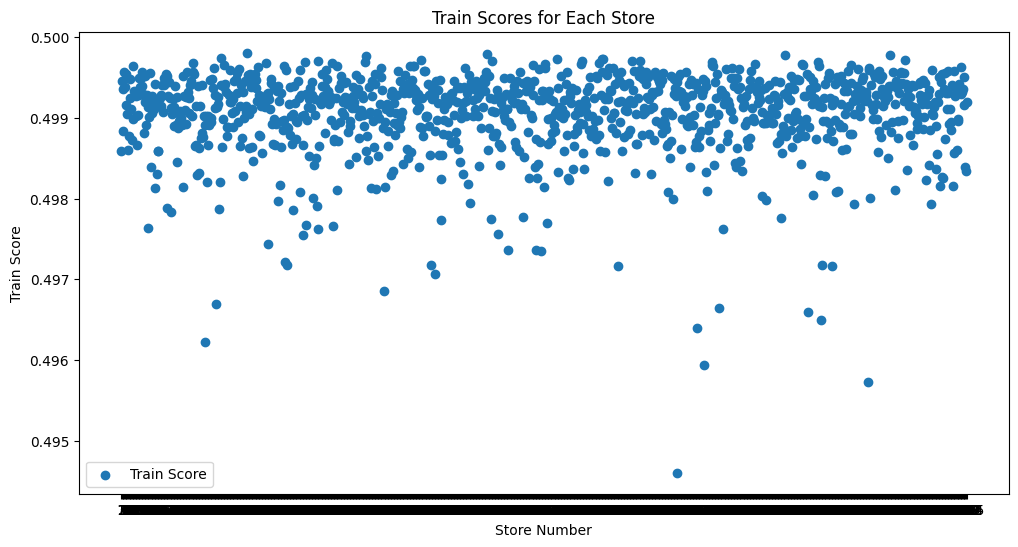

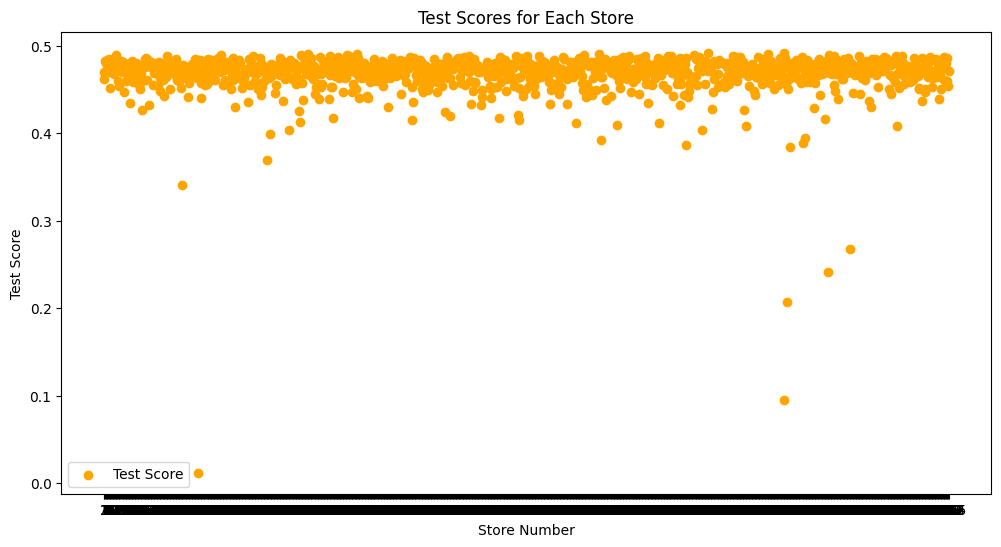

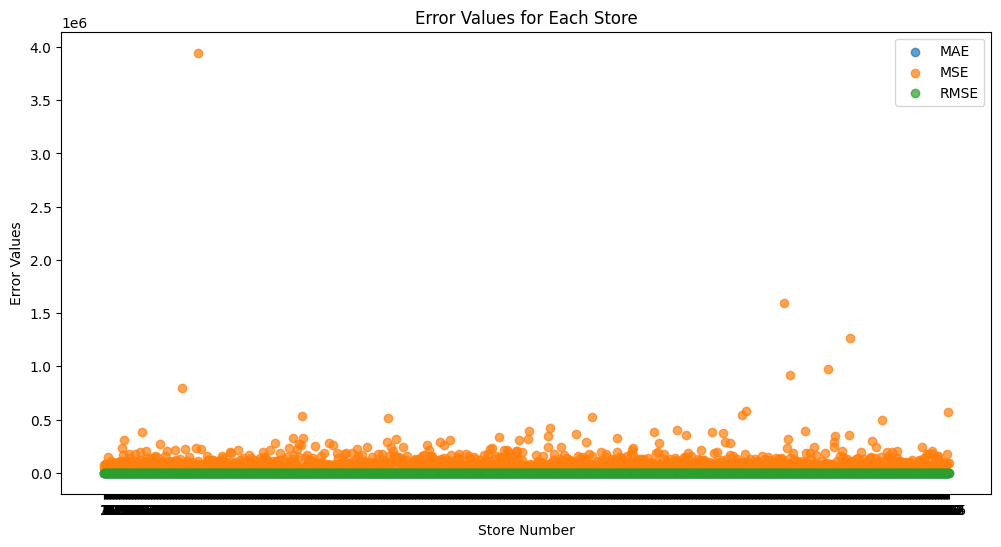

In [ ]:
# Plot train scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, XGB_train_score_list, label='Train Score')
plt.xlabel('Store Number')
plt.ylabel('Train Score')
plt.title('Train Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot test scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, XGB_test_score_list, label='Test Score', color='orange')
plt.xlabel('Store Number')
plt.ylabel('Test Score')
plt.title('Test Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot MAE, MSE, RMSE
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, XGB_mae_list, label='MAE', alpha=0.7)
plt.scatter(store_numbers, XGB_mse_list, label='MSE', alpha=0.7)
plt.scatter(store_numbers, XGB_rmse_list, label='RMSE', alpha=0.7)
plt.xlabel('Store Number')
plt.ylabel('Error Values')
plt.title('Error Values for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

In [ ]:
#Hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
params={'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
folds = 3
param_comb = 10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train_full,y_train_full), verbose=3, random_state=1001 )
random_search.fit(X_train_full, y_train_full)
best_model=random_search.best_estimator_
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



 All results:
{'mean_fit_time': array([ 9.81500006, 24.26077382,  6.0731016 , 34.7417953 , 37.7674257 ,
       11.13789511, 14.52470215, 15.01619291, 17.98203675,  7.94033988]), 'std_fit_time': array([0.23256877, 0.26775116, 0.89120624, 2.00748917, 1.26673581,
       1.2197374 , 0.67789946, 1.12350137, 1.44356172, 2.4278907 ]), 'mean_score_time': array([0.09585373, 0.05990712, 0.0512503 , 0.11409736, 0.07062038,
       0.08040126, 0.07234645, 0.05510974, 0.04460025, 0.05415138]), 'std_score_time': array([0.01361854, 0.02163167, 0.02464682, 0.0314395 , 0.02661555,
       0.02026463, 0.01422063, 0.01021601, 0.02367228, 0.03025255]), 'param_subsample': masked_array(data=[0.8, 0.8, 1.0, 0.8, 0.8, 0.6, 0.6, 0.6, 1.0, 0.6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[50, 200, 50, 200, 200, 50, 100, 100, 200, 50],
             mask=[False

In [ ]:
#Using best parameters

xgb_reg_hp=xgb.XGBRegressor(learning_rate=0.01,subsample=0.8,min_child_weight=5,max_depth=4,gamma=2,colsample_bytree=0.8,objective='reg:linear',seed='123')
xgb_reg_hp.fit(X_train_full,y_train_full)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
y_pred_xgb_hp=xgb_reg_hp.predict(X_test_full)
xgb_hp=metrics(y_test_full,y_pred_xgb_hp)
print(xgb_hp)
print(xgb_reg_hp.score(X_train_full,y_train_full))
print(xgb_reg_hp.score(X_test_full,y_test_full))

MAE:1421.5741630817993
MSE:3790979.752508196
RMSE:1947.0438496624045
[1421.5741630817993, 3790979.752508196, 1947.0438496624045]
0.6077542652073118
0.6077924359343182


In [ ]:
y_target.shape

(982644, 2)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca_reg=PCA(n_components=2)
principal=pca_reg.fit_transform(train_data_upd)
principal_df=pd.DataFrame(principal,columns=['PC1','PC2'])
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(principal_df,y_target,test_size=0.2,random_state=30)



In [ ]:
pca_reg.components_

array([[ 3.23204550e-02, -1.65806333e-03,  9.99475951e-01,
         5.00237870e-04,  3.29645613e-04,  5.24827651e-05,
         8.63705556e-05, -5.59972179e-05, -1.87204702e-05,
        -1.16528675e-05, -4.17096805e-06,  2.79740919e-04,
        -1.03461245e-04],
       [-9.99477556e-01, -1.12208058e-04,  3.23202938e-02,
         3.39041241e-05,  2.22228377e-05,  3.63057978e-06,
         6.14357412e-06, -4.08756389e-06, -1.23819983e-06,
        -8.17810395e-07, -1.18433901e-06,  3.04370343e-06,
        -7.69287403e-06]])

In [ ]:
pca_reg.explained_variance_

array([216717.39946047, 103507.72856421])

In [ ]:
lin_reg_pca= LinearRegression()
lin_reg_pca.fit(X_train_pca,y_train_pca)
y_pred_pca=lin_reg_pca.predict(X_test_pca)
metrics(y_pred_pca,y_test_pca)
print(lin_reg_pca.score(X_train_pca,y_train_pca))
print(lin_reg_pca.score(X_test_pca,y_test_pca))l

SyntaxError: ignored